In [1]:
import pandas as pd 
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

**Table of contents**<a id='toc0_'></a>    
- 1. [Data sets first glance](#toc1_)    
  - 1.1. [Current data set (world)](#toc1_1_)    
  - 1.2. [old dataset(2017 - essentially France)](#toc1_2_)    
  - 1.3. [Wondering if the world data set is an extension of the french one](#toc1_3_)    
  - 1.4. [discovering features really available](#toc1_4_)    
    - 1.4.1. [features and their _tags version](#toc1_4_1_)    
  - 1.5. [Exploration of features_first_selection.txt](#toc1_5_)    
    - 1.5.1. [Some comments](#toc1_5_1_)    
- 2. [Focusing on French products](#toc2_)    
- 3. [Nutriscore, ecoscore, and nova score](#toc3_)    
- 4. [Application idea emerging](#toc4_)    
  - 4.1. [Application needs](#toc4_1_)    
  - 4.2. [Features exploration : features2.txt](#toc4_2_)    
    - 4.2.1. [food groups features exploration](#toc4_2_1_)    
    - 4.2.2. [Nutrients features exploration](#toc4_2_2_)    
    - 4.2.3. [urls exploration.](#toc4_2_3_)    
  - 4.3. [Exploration features3.txt](#toc4_3_)    
    - 4.3.1. [Comments](#toc4_3_1_)    
- 5. [Building a dataframe to begin the cleaning process.](#toc5_)    
  - 5.1. [Features selection (features4.txt)](#toc5_1_)    
  - 5.2. [Handling duplicates on 'code' which should be a unique identifier.](#toc5_2_)    
  - 5.3. [Searching for products with nutrients inconsistency](#toc5_3_)    
    - 5.3.1. [First implementation (slow)](#toc5_3_1_)    
    - 5.3.2. [Second implementation (faster)](#toc5_3_2_)    
  - 5.4. ["Not well-rounded" sugars value exploration, and pnns_groups disillusion.](#toc5_4_)    
  - 5.5. [Tagging products with at least one category for classification & tagging products with sugars value availability.](#toc5_5_)    
  - 5.6. [Tagging nutrients inconsistency](#toc5_6_)    
    - 5.6.1. [Some stats in the remaining data](#toc5_6_1_)    
  - 5.7. [Sugars values (missing or potentially wrong) exploration to design an imputation strategy.](#toc5_7_)    
    - 5.7.1. [Analysis of the top main_category group, 'en:groceries', that seems vague...](#toc5_7_1_)    
    - 5.7.2. [Overcoming the 'en:groceries' vagueness.](#toc5_7_2_)    
- 6. [Restarting data cleansing from scratch (with better categories)](#toc6_)    
  - 6.1. [Extracting products sold in France and dealing with duplicates](#toc6_1_)    
  - 6.2. [Extracting most specific categories from 'categories' in the original data set](#toc6_2_)    
    - 6.2.1. [Adding tags about classifier and sugars availability](#toc6_2_1_)    
  - 6.3. [Nutrients problems](#toc6_3_)    
    - 6.3.1. [Tagging](#toc6_3_1_)    
    - 6.3.2. [Stats](#toc6_3_2_)    
    - 6.3.3. [Visualizations](#toc6_3_3_)    
  - 6.4. [Computing sugars mean values per group.](#toc6_4_)    
    - 6.4.1. [Dealing with split groups (group name appearing in several layers)](#toc6_4_1_)    
      - 6.4.1.1. [First implementation](#toc6_4_1_1_)    
      - 6.4.1.2. [Second implementation (faster)](#toc6_4_1_2_)    
    - 6.4.2. [Final groups for sugars imputation](#toc6_4_2_)    
  - 6.5. [Groups exploration.](#toc6_5_)    
    - 6.5.1. [Food groups properties](#toc6_5_1_)    
    - 6.5.2. [Conclusion : sugars imputation strategy](#toc6_5_2_)    
    - 6.5.3. [Deleting groups with an std lower than 26.](#toc6_5_3_)    
- 7. [Sugars values imputation](#toc7_)    
  - 7.1. [When sugars is just a tiny bit higher than carbohydrates.](#toc7_1_)    
  - 7.2. [For remaining values](#toc7_2_)    
  - 7.3. [Stats on sugars values imputation](#toc7_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1.  [&#9650;](#toc0_) <a id='toc1_'></a>Data sets first glance

## 1.1.  [&#9650;](#toc0_) <a id='toc1_1_'></a>Current data set (world)

In [1]:
# The dataset comes from the website open food facts.
!wc -l 'csv_files/data.csv.gz'

2619077 csv_files/data.csv.gz


In [5]:
# The CSV file is too big to be read at once.
# (2_686_036 rows, 196 columns)
data_en = pd.read_csv('./csv_files/data.csv.gz',
                      compression='gzip',
                      sep='\t',
                      nrows=5)
data_en

code                                                url  \
0        225  http://world-en.openfoodfacts.org/product/0000...   
1  207025004  http://world-en.openfoodfacts.org/product/0000...   
2    3429145  http://world-en.openfoodfacts.org/product/0000...   
3   26772226  http://world-en.openfoodfacts.org/product/0000...   
4         17  http://world-en.openfoodfacts.org/product/0000...   

          creator   created_t      created_datetime  last_modified_t  \
0  nutrinet-sante  1623855208  2021-06-16T14:53:28Z       1623855209   
1         kiliweb  1656948610  2022-07-04T15:30:10Z       1656948613   
2         kiliweb  1630483911  2021-09-01T08:11:51Z       1656488106   
3         kiliweb  1654250311  2022-06-03T09:58:31Z       1654270474   
4         kiliweb  1529059080  2018-06-15T10:38:00Z       1561463718   

  last_modified_datetime      product_name  abbreviated_product_name  \
0   2021-06-16T14:53:29Z    jeunes pousses                       NaN   
1   2022-07-04T15:30:13Z             Andrè                       NaN   
2   2022-06-29T07:35:06Z           L.casei                       NaN   
3   2022-06-03T15:34:34Z              Skyr                       NaN   
4   2019-06-25T11:55:18Z  Vitória crackers                       NaN   

   generic_name  ... carbon-footprint-from-meat-or-fish_100g  \
0           NaN  ...                                     NaN   
1           NaN  ...                                     NaN   
2           NaN  ...                                     NaN   
3           NaN  ...                                     NaN   
4           NaN  ...                                     NaN   

   nutrition-score-fr_100g  nutrition-score-uk_100g  glycemic-index_100g  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                     -5.0                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   water-hardness_100g choline_100g phylloquinone_100g beta-glucan_100g  \
0                  NaN          NaN                NaN              NaN   
1                  NaN          NaN                NaN              NaN   
2                  NaN          NaN                NaN              NaN   
3                  NaN          NaN                NaN              NaN   
4                  NaN          NaN                NaN              NaN   

  inositol_100g carnitine_100g  
0           NaN            NaN  
1           NaN            NaN  
2           NaN            NaN  
3           NaN            NaN  
4           NaN            NaN  

[5 rows x 196 columns]

I want to create a very short list of interesting features found in the [features description](https://world.openfoodfacts.org/data/data-fields.txt) to start with.

- code
- product_name
- categories
- nutrition_grade_fr
- nutrition-score-fr_100g
- main_category
- main_category_fr



In [6]:
features = ['code',
            'product_name',
            'categories',
            'main_category',
            'main_category_fr',
            'nutrition_grade_fr',
            'nutrition-score-fr_100g',
            ]

# selecting only those columns on the first 200_000 products.
data_sel = pd.read_csv('./csv_files/data.csv.gz',
                      compression='gzip',
                      sep='\t',
                      usecols=features,
                      nrows=2e5)


ValueError: Usecols do not match columns, columns expected but not found: ['main_category_fr', 'nutrition_grade_fr']

## 1.2.  [&#9650;](#toc0_) <a id='toc1_2_'></a>old dataset(2017 - essentially France)

In [7]:
# feature_fr seem to not be included. Let's try with another CSV file
# provided in the OpenClassrooms website.
data_fr = pd.read_csv('./csv_files/fr.openfoodfacts.org.products.csv',
                      sep='\t',
                      nrows=5)


In [2]:
!wc -l 'csv_files/fr.openfoodfacts.org.products.csv'

320750 csv_files/fr.openfoodfacts.org.products.csv


In [8]:
data_fr.shape

(5, 162)

In [9]:
# the features list is not the same. (196 != 162)
features_only_fr = data_fr.columns.difference(data_en.columns)
print(features_only_fr)
print(len(features_only_fr))

Index(['additives_fr', 'allergens_fr', 'alpha-linolenic-acid_100g',
       'arachidic-acid_100g', 'arachidonic-acid_100g', 'behenic-acid_100g',
       'butyric-acid_100g', 'capric-acid_100g', 'caproic-acid_100g',
       'caprylic-acid_100g', 'categories_fr', 'cerotic-acid_100g',
       'countries_fr', 'dihomo-gamma-linolenic-acid_100g',
       'docosahexaenoic-acid_100g', 'eicosapentaenoic-acid_100g',
       'elaidic-acid_100g', 'erucic-acid_100g', 'fructose_100g',
       'gamma-linolenic-acid_100g', 'glucose_100g', 'gondoic-acid_100g',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_tags', 'labels_fr',
       'lactose_100g', 'lauric-acid_100g', 'lignoceric-acid_100g',
       'linoleic-acid_100g', 'main_category_fr', 'maltodextrins_100g',
       'maltose_100g', 'mead-acid_100g', 'melis

In [10]:
features_only_en = data_en.columns.difference(data_fr.columns)
print(features_only_en)
print(len(features_only_en))

Index(['-alpha-linolenic-acid_100g', '-arachidic-acid_100g',
       '-arachidonic-acid_100g', '-behenic-acid_100g', '-butyric-acid_100g',
       '-capric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',
       '-cerotic-acid_100g', '-dihomo-gamma-linolenic-acid_100g',
       '-docosahexaenoic-acid_100g', '-eicosapentaenoic-acid_100g',
       '-elaidic-acid_100g', '-erucic-acid_100g', '-fructose_100g',
       '-gamma-linolenic-acid_100g', '-glucose_100g', '-gondoic-acid_100g',
       '-lactose_100g', '-lauric-acid_100g', '-lignoceric-acid_100g',
       '-linoleic-acid_100g', '-maltodextrins_100g', '-maltose_100g',
       '-mead-acid_100g', '-melissic-acid_100g', '-montanic-acid_100g',
       '-myristic-acid_100g', '-nervonic-acid_100g', '-oleic-acid_100g',
       '-palmitic-acid_100g', '-stearic-acid_100g', '-sucrose_100g',
       'abbreviated_product_name', 'additives_en', 'allergens_en',
       'beta-glucan_100g', 'brand_owner',
       'carbon-footprint-from-meat-or-fish_100g'

In [11]:
# More features are common. Need to strip for matching.
features_mod = {feat: feat.lstrip(' -') for feat in data_en.columns}

In [12]:
data_en.rename(columns=features_mod, inplace=True)

In [13]:
features_only_en = data_en.columns.difference(data_fr.columns)
print(features_only_en)
print(len(features_only_en))

Index(['abbreviated_product_name', 'additives_en', 'allergens_en',
       'beta-glucan_100g', 'brand_owner',
       'carbon-footprint-from-meat-or-fish_100g', 'carnitine_100g',
       'categories_en', 'choline_100g', 'completeness', 'countries_en',
       'data_quality_errors_tags', 'ecoscore_grade', 'ecoscore_score',
       'energy-kcal_100g', 'energy-kj_100g', 'food_groups', 'food_groups_en',
       'food_groups_tags', 'fruits-vegetables-nuts-dried_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'fruits-vegetables-nuts-estimate_100g', 'image_ingredients_small_url',
       'image_ingredients_url', 'image_nutrition_small_url',
       'image_nutrition_url', 'ingredients_analysis_tags', 'ingredients_tags',
       'inositol_100g', 'insoluble-fiber_100g', 'labels_en',
       'last_image_datetime', 'last_image_t', 'main_category_en', 'nova_group',
       'nutrient_levels_tags', 'nutriscore_grade', 'nutriscore_score',
       'origins_en', 'owner', 'packaging_en'

In [14]:
features_only_fr = data_fr.columns.difference(data_en.columns)
print(features_only_fr)
print(len(features_only_fr))

Index(['additives_fr', 'allergens_fr', 'categories_fr', 'countries_fr',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_tags', 'labels_fr',
       'main_category_fr', 'nutrition_grade_fr', 'nutrition_grade_uk',
       'states_fr', 'traces_fr'],
      dtype='object')
16


In [15]:
50 - 16 == 196 - 162

True

In [17]:
# From above, I see that nothing important seem to be missing
# in the 'world' data set. Differences are mainly about translation.
# Information about 'palm_oil' (which seem to be missing) are probably
# contained in the feature named 'ecoscore'.
common_features = data_en.columns.intersection(data_fr.columns)
print(len(common_features))

146


## 1.3.  [&#9650;](#toc0_) <a id='toc1_3_'></a>Wondering if the world data set is an extension of the french one

In [ ]:
# Are those really common, or can I find information in one CSV file
# and not in the other?
categories_en = pd.read_csv('./csv_files/data.csv.gz',
                            compression='gzip',
                            usecols=['code','categories'],
                            sep='\t')
categories_fr = pd.read_csv('./csv_files/fr.openfoodfacts.org.products.csv',
                            usecols=['code','categories'],
                            sep='\t')

In [ ]:
print(categories_en.shape)
print(categories_en.isnull().mean())
print(categories_fr.shape)
print(categories_fr.isnull().mean())

(2686036, 2)
code          0.000000
categories    0.586775
dtype: float64
(320772, 2)
code          0.000072
categories    0.736854
dtype: float64


In [ ]:
# The second data set has more missing values in percentage
# (regarding categories).
both_categories = categories_en.join(categories_fr.set_index('code'),
                                     on='code',
                                     how='outer',
                                     rsuffix='_fr')

In [ ]:
both_categories.shape

(2758010, 3)

In [ ]:
both_categories.shape[0]-categories_en.shape[0]

71974

In [ ]:
# If my hypothesis is correct (that the world database was made after
# the french one), quite a lot of products were not copied... Or they
# changed 'code' in between... Thus code is not a good identifier ?
both_categories.columns

Index(['code', 'categories', 'categories_fr'], dtype='object')

In [ ]:
both_categories.head(15)

code  \
0.0        00000000000000225   
1.0   0000000000000207025004   
2.0     00000000000003429145   
3.0     00000000000026772226   
4.0            0000000000017   
5.0            0000000000031   
6.0       000000000003327986   
7.0       000000000004128579   
8.0       000000000004622327   
9.0              00000000001   
10.0           0000000000100   
11.0           0000000000123   
12.0           0000000000178   
13.0           0000000000208   
14.0           0000000000284   

                                             categories categories_fr  
0.0                                                 NaN           NaN  
1.0                                                 NaN           NaN  
2.0                                                 NaN           NaN  
3.0   Produits laitiers, Desserts, Produits fermenté...           NaN  
4.0                                                 NaN           NaN  
5.0                                                 NaN           NaN  
6.0                                                 NaN           NaN  
7.0                                                 NaN           NaN  
8.0                                                 NaN           NaN  
9.0                                                 NaN           NaN  
10.0        en:groceries, Condiments, Sauces, Moutardes           NaN  
11.0                                                NaN           NaN  
12.0                                                NaN           NaN  
13.0                                                NaN           NaN  
14.0                                                NaN           NaN

In [ ]:
diff = (both_categories.
        loc[both_categories.categories 
            != both_categories.categories_fr])
diff.shape

(2757074, 3)

In [ ]:
equal = (both_categories.
         loc[both_categories.categories 
             == both_categories.categories_fr])
equal.shape

(936, 3)

In [ ]:
equal.tail(10)

code                    categories  \
2652343.0  9312726002758                    Hommus Dip   
2652787.0  9314137003263                 Psyllium husk   
2653442.0  9315822010863              Frozen Dumplings   
2653598.0  9316131600592                 Coconut flour   
2653661.0  9316401200460                        Snacks   
2653874.0  9317224401058                   Taco Shells   
2654205.0  9318020601000                  Cherry Juice   
2665406.0       93695152                    Meat Paste   
2666092.0  9400547012114               Canned apricots   
2666134.0  9400550602487  Chocolate covered muesli bar   

                          categories_fr  
2652343.0                    Hommus Dip  
2652787.0                 Psyllium husk  
2653442.0              Frozen Dumplings  
2653598.0                 Coconut flour  
2653661.0                        Snacks  
2653874.0                   Taco Shells  
2654205.0                  Cherry Juice  
2665406.0                    Meat Paste  
2666092.0               Canned apricots  
2666134.0  Chocolate covered muesli bar

<AxesSubplot: >

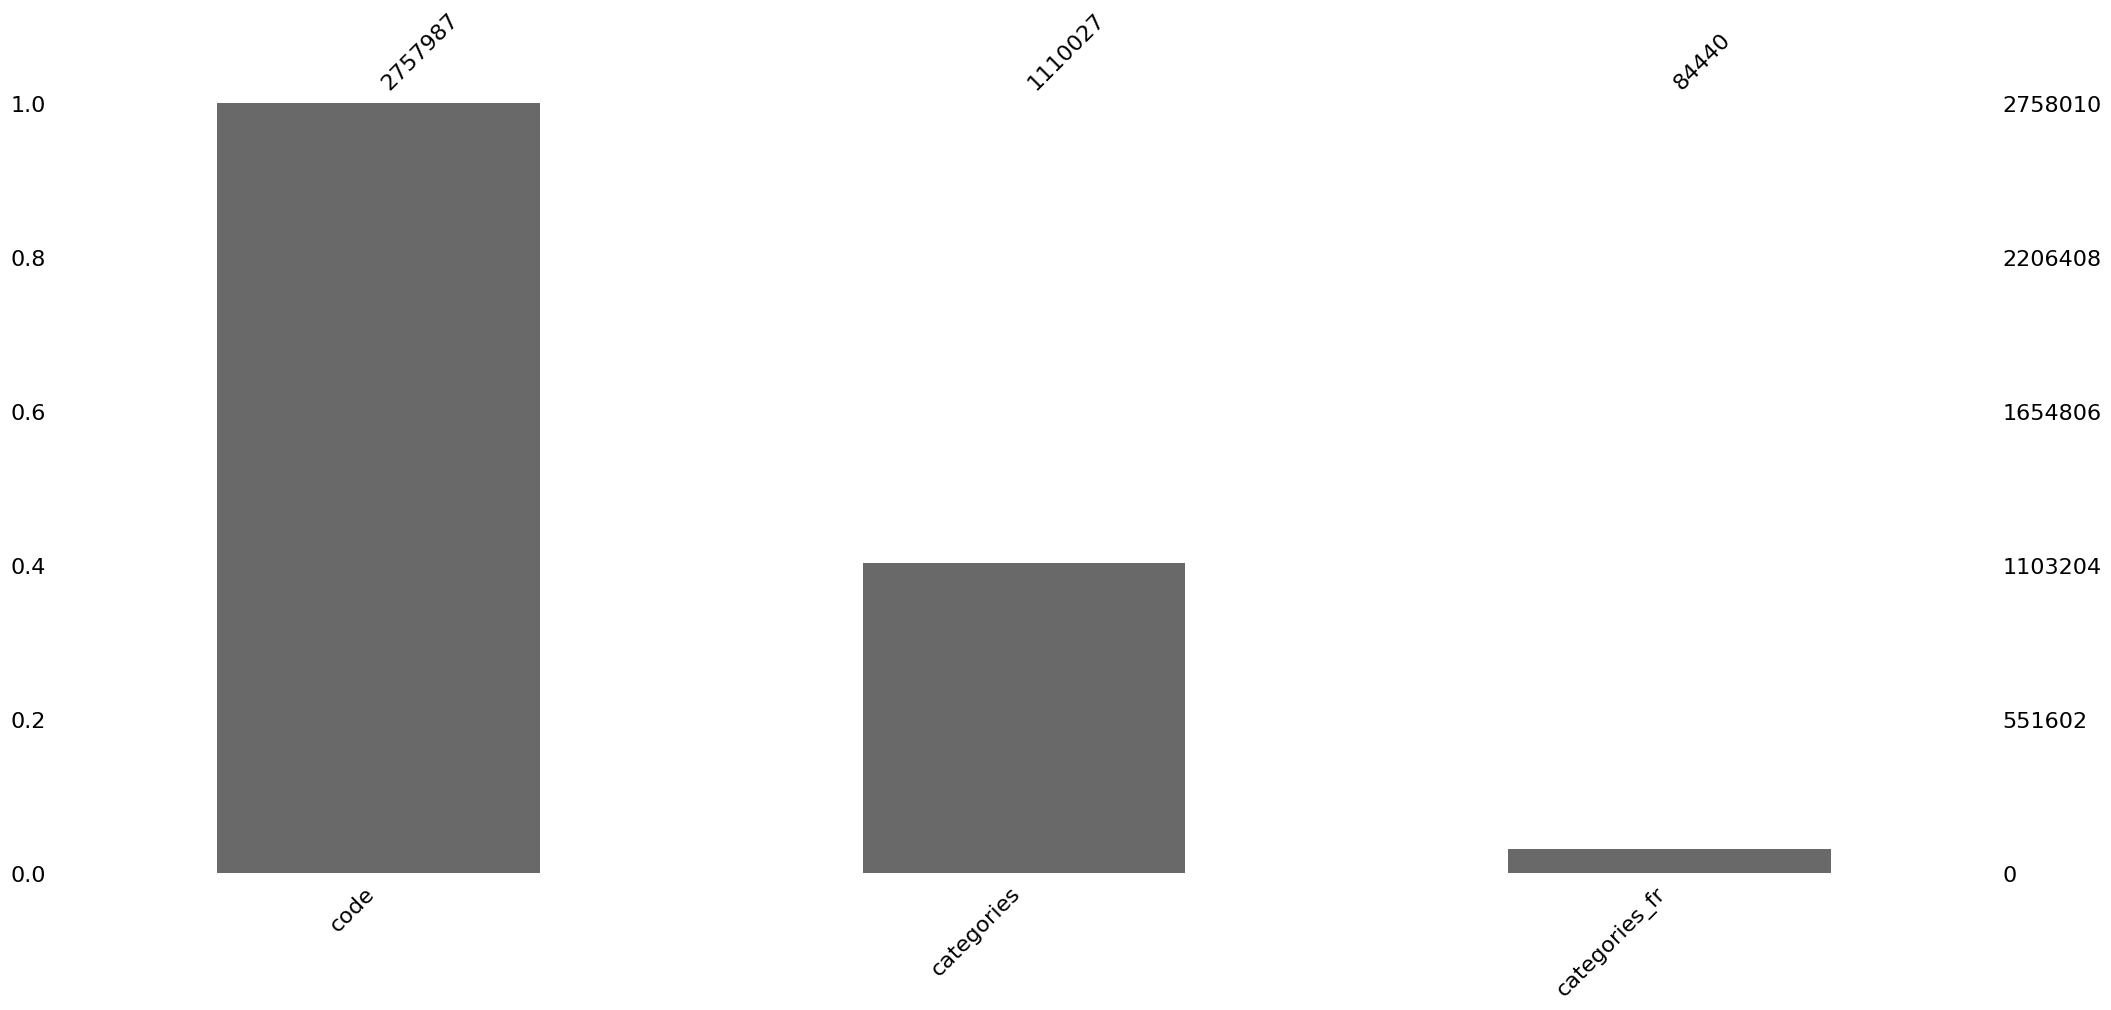

In [ ]:
msno.bar(both_categories)

I'm going to work with the world database (more info) ignoring that I could possibly try to search missing values in the other dataset for time purpose. 

## 1.4.  [&#9650;](#toc0_) <a id='toc1_4_'></a>discovering features really available

As the website does not seem to be updated...

In [18]:
data = pd.read_csv('./csv_files/data.csv.gz',
                   compression='gzip',
                   sep='\t',
                   nrows=1)

In [19]:
for feat in data.columns:
    print(feat)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
abbreviated_product_name
generic_name
quantity
packaging
packaging_tags
packaging_en
packaging_text
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
ingredients_tags
ingredients_analysis_tags
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutriments
additives_n
additives
additives_tags
additives_en
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
food_groups
food_groups_tags
food_groups_en
states
states_tags
states_en
brand_owner
ecoscore_score
ecoscore_grade
nutrient_levels_tags
product_quantity
owner
data_quality_errors_tags
unique_scans_n
popularity_tags
completeness

I copied that in 'features.txt'

### 1.4.1.  [&#9650;](#toc0_) <a id='toc1_4_1_'></a>features and their _tags version
First I want to see the difference between some features and their _tags version.

After that, I will start a list of features to inspect.

In [20]:
mycols = ['packaging',
          'packaging_tags',
          'manufacturing_places',
          'manufacturing_places_tags',
          'countries',
          'countries_tags']

data = pd.read_csv('./csv_files/data.csv.gz',
                   compression='gzip',
                   sep='\t',
                   nrows=20000,
                   usecols=mycols)

In [21]:
data.head(20)

packaging packaging_tags manufacturing_places manufacturing_places_tags  \
0        NaN            NaN                  NaN                       NaN   
1        NaN            NaN                  NaN                       NaN   
2        NaN            NaN                  NaN                       NaN   
3        NaN            NaN                  NaN                       NaN   
4        NaN            NaN                  NaN                       NaN   
5        NaN            NaN                  NaN                       NaN   
6        NaN            NaN                  NaN                       NaN   
7        NaN            NaN                  NaN                       NaN   
8        NaN            NaN                  NaN                       NaN   
9        NaN            NaN                  NaN                       NaN   
10       NaN            NaN                  NaN                       NaN   
11       NaN            NaN                  NaN                       NaN   
12       NaN            NaN                  NaN                       NaN   
13       NaN            NaN                  NaN                       NaN   
14       NaN            NaN                  NaN                       NaN   
15       NaN            NaN                  NaN                       NaN   
16       NaN            NaN                  NaN                       NaN   
17       NaN            NaN                  NaN                       NaN   
18       NaN            NaN                  NaN                       NaN   
19       NaN            NaN                  NaN                       NaN   

           countries    countries_tags  
0          en:france         en:france  
1              en:de        en:germany  
2              Spain          en:spain  
3             France         en:france  
4             France         en:france  
5             France         en:france  
6            Espagne          en:spain  
7              en:es          en:spain  
8              en:es          en:spain  
9   en:United States  en:united-states  
10            France         en:france  
11            France         en:france  
12            France         en:france  
13            France         en:france  
14         en:france         en:france  
15            France         en:france  
16             en:fr         en:france  
17             en:fr         en:france  
18             en:fr         en:france  
19            France         en:france

In [22]:
print(data.countries.value_counts())
print(f'total : {data.countries.value_counts().sum()}\n')
print(data.countries_tags.value_counts())
print(f'total : {data.countries_tags.value_counts().sum()}\n')

United States                                10099
en:us                                         4076
France                                        1003
en:United States                               881
en:fr                                          749
                                             ...  
Royaume-Uni, en:france                           1
Franciaország,Nagy-Britannia,Magyarország        1
en:gi                                            1
República Dominicana                             1
France,Germany,Spain                             1
Name: countries, Length: 291, dtype: int64
total : 19955

en:united-states            15688
en:france                    2202
en:united-kingdom             356
en:spain                      351
en:canada                     282
                            ...  
en:moldova                      1
en:south-africa                 1
en:gibraltar                    1
en:france,en:switzerland        1
en:belgium,en:spain             1
Name: c

In [23]:
print(data.packaging.value_counts())
print(f'total : {data.packaging.value_counts().sum()}\n')
print(data.packaging_tags.value_counts())
print(f'total : {data.packaging_tags.value_counts().sum()}\n')

Plastic                          45
Plastique                        25
Plastique, Sachet                17
Carton                           16
en:card-box                      15
                                 ..
אט                                1
Cartone                           1
Ldpe-bag, Plastic - film          1
Plastique, Boîte en plastique     1
Glass, Paper, Bottle              1
Name: packaging, Length: 440, dtype: int64
total : 846

en:plastic                          83
en:bag                              27
en:plastic,en:bag                   26
en:pet-bottle                       23
en:canned                           20
                                    ..
en:8                                 1
en:אט                                1
en:ldpe-bag,en:plastic-film          1
en:plastic,fr:boite-en-plastique     1
en:glass,en:paper,en:bottle          1
Name: packaging_tags, Length: 360, dtype: int64
total : 846



In [24]:
print(data.manufacturing_places.value_counts())
print(f'total : {data.manufacturing_places.value_counts().sum()}\n')
print(data.manufacturing_places_tags.value_counts())
print(f'total : {data.manufacturing_places_tags.value_counts().sum()}\n')

Royaume-Uni                             30
France                                  17
Italie                                  14
United Kingdom                          13
United States                           12
                                        ..
87500 Saint Yrieix                       1
Ireland                                  1
Good Organics Gmbh                       1
Allemagne                                1
Avery Island,Luisiana,Estados Unidos     1
Name: manufacturing_places, Length: 103, dtype: int64
total : 227

royaume-uni                             31
france                                  19
italie                                  14
united-kingdom                          13
united-states                           12
                                        ..
black-sheep-brewery                      1
ukraine                                  1
87500-saint-yrieix                       1
ireland                                  1
avery-island,luisiana,estados-

_tags version seem to be processed columns with some sort of standardization.

Based on the name, I'd like to have a look at :

- code
- product_name
- generic_name
- quantity
- brands
- categories
- packaging_tags
- origins_tags
- labels_tags
- countries_tags
- ingredients_tags
- ingredients_fr
- nutriscore_score
- nutriscore_grade
- food_groups_tags
- ecoscore_grade
- ecoscore_score
- data_quality_errors_tags
- popularity_tags
- completeness   
- main_category
- additives_n
- additives_tags
- nova_group
- carbon-footprint_100g
- carbon-footprint-from-meat-or-fish_100g
- nutrition-score-fr_100g
- nutrition-score-uk_100g
- glycemic-index_100g

note : nova (how much the product has been modified)

I found a better [description of the data fields ?](https://wiki.openfoodfacts.org/Data_fields)

## 1.5.  [&#9650;](#toc0_) <a id='toc1_5_'></a>Exploration of features_first_selection.txt

In [84]:
with open('./features_first_selection.txt') as fin:
    features = [feat.strip('- \n')for feat in fin]
features

['code',
 'product_name',
 'generic_name',
 'quantity',
 'brands',
 'categories',
 'packaging_tags',
 'origins_tags',
 'labels_tags',
 'countries_tags',
 'ingredients_tags',
 'nutriscore_score',
 'nutriscore_grade',
 'food_groups_tags',
 'ecoscore_grade',
 'ecoscore_score',
 'data_quality_errors_tags',
 'popularity_tags',
 'completeness',
 'main_category',
 'additives_n',
 'additives_tags',
 'nova_group',
 'carbon-footprint_100g',
 'carbon-footprint-from-meat-or-fish_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g',
 'glycemic-index_100g']

In [85]:
# # Opening a sample of products, randomly chosen.
# rows = 2_686_037
# sample_size = int(1e5) 
# # The rows numbers to be skipped (keeping 0 which contains 
# # columns name) :
# skiprows = sorted(random.sample(range(1, rows+1), rows+1-sample_size))

# Skipping rows goes through the whole file. It is not much faster.
# I can keep all lines (no memory problem).
data = pd.read_csv('./csv_files/data.csv.gz',
                   compression='gzip',
                   sep='\t',
                   #skiprows=skiprows,
                   usecols=features,
                   dtype={'code': 'object'})

/tmp/ipykernel_6368/115370535.py:10: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./csv_files/data.csv.gz',


In [86]:
print(data.dtypes)
print(data.shape)

code                                        object
product_name                                object
generic_name                                object
quantity                                    object
packaging_tags                              object
brands                                      object
categories                                  object
origins_tags                                object
labels_tags                                 object
countries_tags                              object
ingredients_tags                            object
additives_n                                float64
additives_tags                              object
nutriscore_score                           float64
nutriscore_grade                            object
nova_group                                 float64
food_groups_tags                            object
ecoscore_score                             float64
ecoscore_grade                              object
data_quality_errors_tags       

<AxesSubplot: >

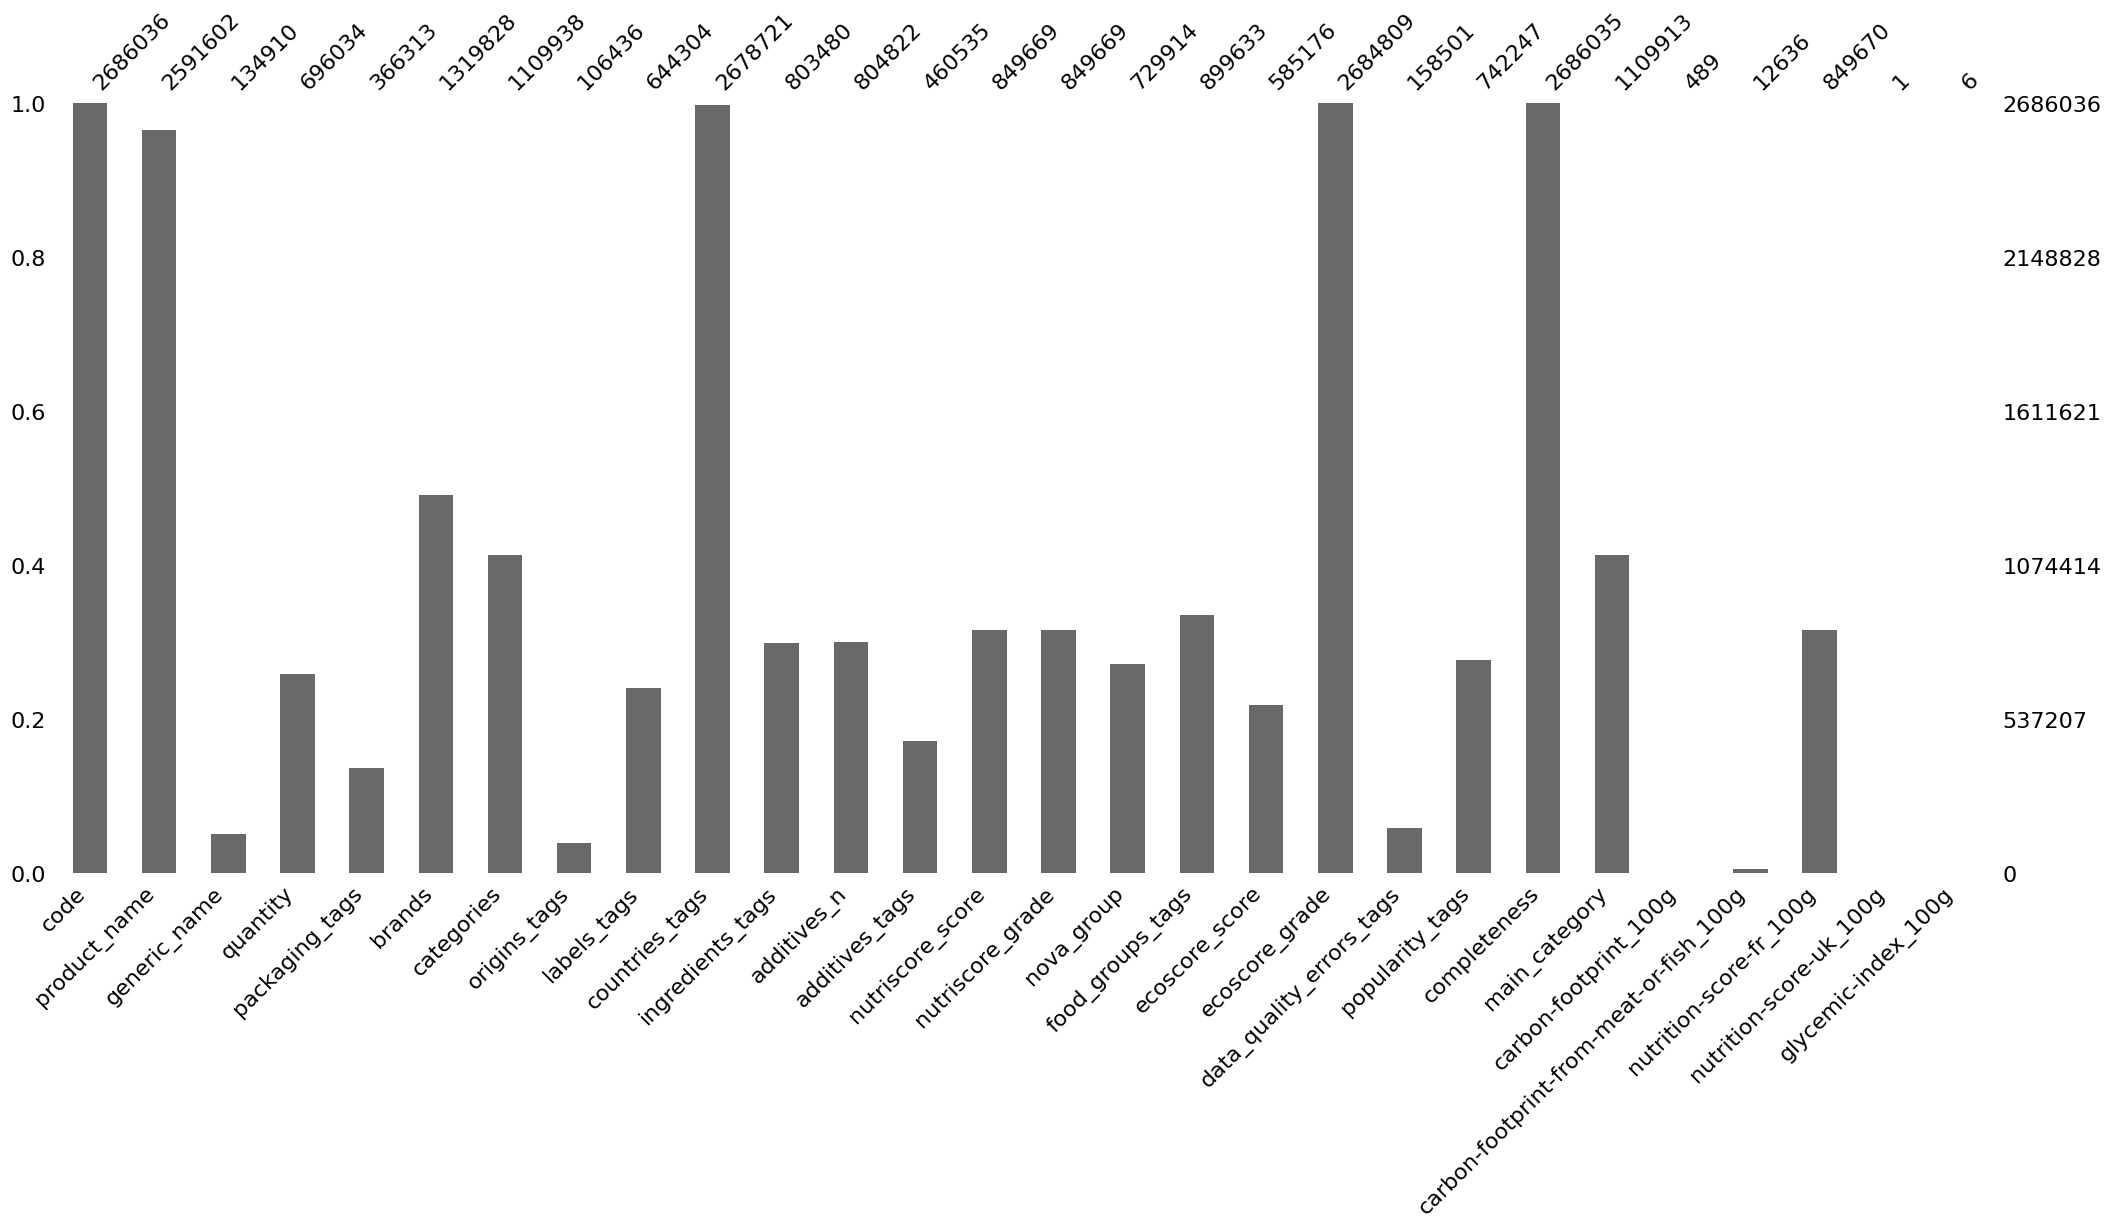

In [26]:
msno.bar(data)

In [27]:
# Are nutriscores any different? 
(data.nutriscore_score == data['nutrition-score-fr_100g']).sum()

849669

In [28]:
data.nutriscore_score.notnull().sum()

849669

In [87]:
# There is no difference between both features, so the last 5 columns
# can be dropped, as other hold almost no information.
features = data.columns[:-5].values
print(features)
data = data.loc[:,features]

['code' 'product_name' 'generic_name' 'quantity' 'packaging_tags' 'brands'
 'categories' 'origins_tags' 'labels_tags' 'countries_tags'
 'ingredients_tags' 'additives_n' 'additives_tags' 'nutriscore_score'
 'nutriscore_grade' 'nova_group' 'food_groups_tags' 'ecoscore_score'
 'ecoscore_grade' 'data_quality_errors_tags' 'popularity_tags'
 'completeness' 'main_category']


In [38]:
def top_values(data,
               col: str,
               print_n: int=10) -> pd.Series:
    ''' Return the first 10 (default)
        values of a series'''
    return (data.loc[:, col]
            .value_counts()
            .sort_values(ascending=False)
            .iloc[:print_n])

------------------------------
CODE :
percentage of data : 100.0 %
30383354190402    2
0071923722898     2
29994696          2
31843340000818    2
3564700673683     2
8760304600357     2
3760331890198     2
2700963001059     2
3700320230572     2
6703501220017     2
Name: code, dtype: int64


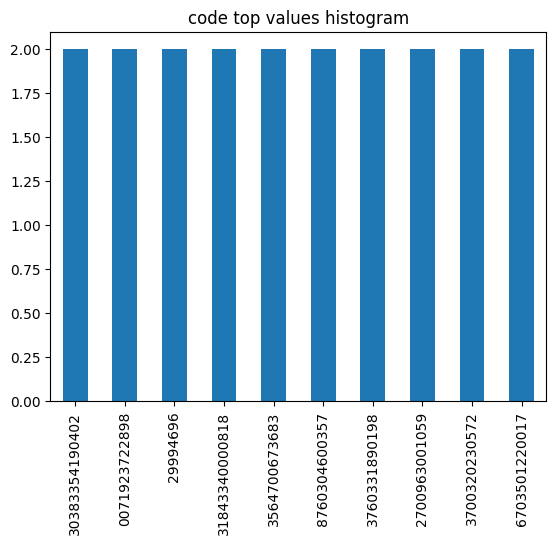


------------------------------
PRODUCT_NAME :
percentage of data : 96.48426156611453 %
Aceite de oliva virgen extra    1557
Miel                            1519
Filet de poulet                 1235
Spaghetti                       1062
Comté                           1058
Mozzarella                      1032
Chocolat                         997
Mayonnaise                       906
Poulet                           881
Ketchup                          879
Name: product_name, dtype: int64


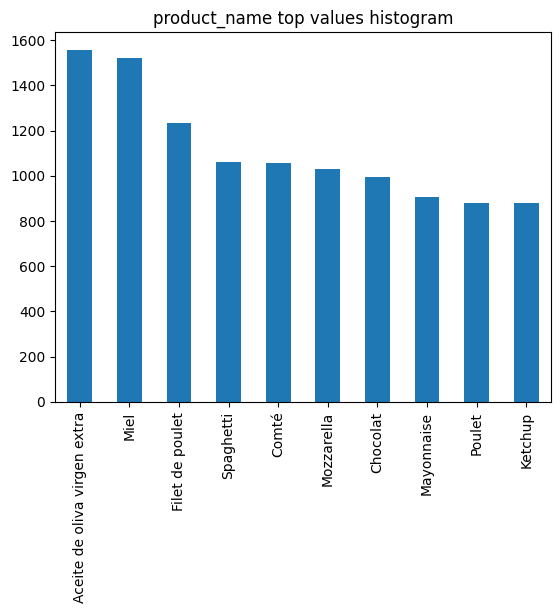


------------------------------
GENERIC_NAME :
percentage of data : 5.022643032334638 %
Pâtes alimentaires de qualité supérieure               323
Ice cream                                              180
Bière                                                  123
Pâtes alimentaires au blé dur de qualité supérieure    122
Beignets fourrés à la purée de framboise               122
Beignets fourrés à la purée de pomme                   113
Jambon cuit supérieur                                  104
Bière blonde                                           101
Fromage au lait pasteurisé                              91
Jus d'orange                                            88
Name: generic_name, dtype: int64


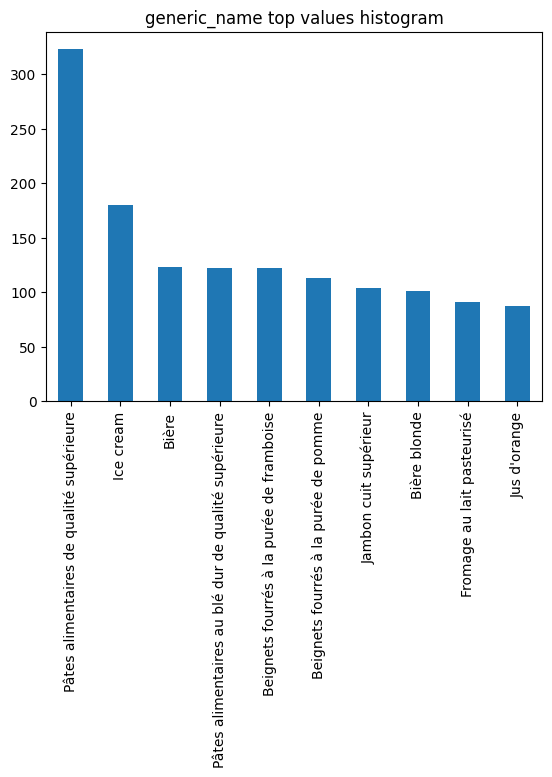


------------------------------
QUANTITY :
percentage of data : 25.913055521221608 %
500 g    26749
250 g    23448
200 g    23351
100 g    17777
1pcs     15781
400 g    15734
300 g    14174
150 g    13920
1 kg     10847
100g     10812
Name: quantity, dtype: int64


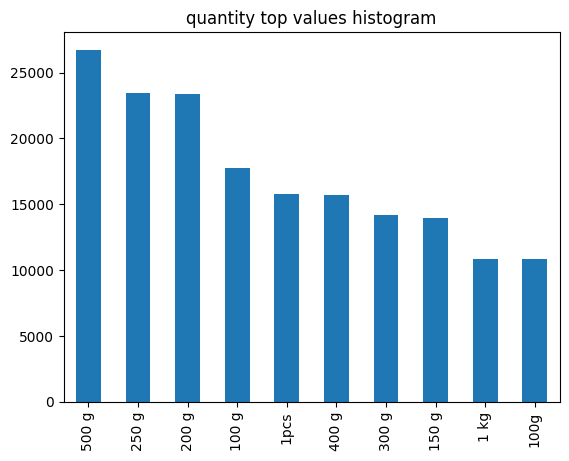


------------------------------
PACKAGING_TAGS :
percentage of data : 13.637680209796146 %
en:plastic                 43732
en:glass                   12066
en:plastic,en:bag          11996
en:bottle                   8826
en:bag                      8761
en:cardboard                6271
en:glass,en:bottle          5735
en:canned                   5084
en:paper                    4938
en:plastic,en:cardboard     4205
Name: packaging_tags, dtype: int64


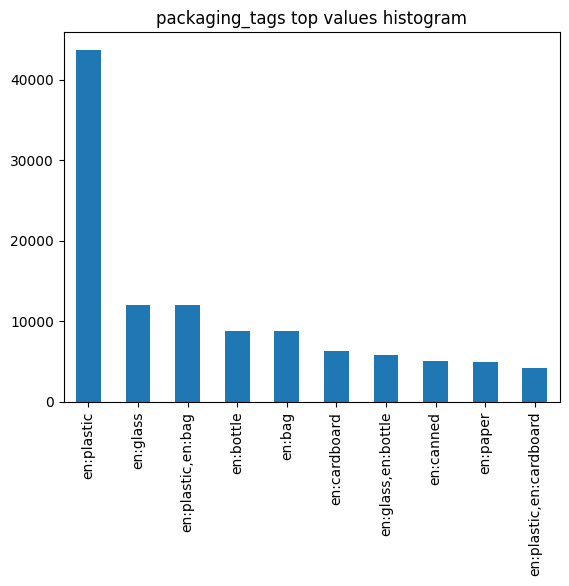


------------------------------
BRANDS :
percentage of data : 49.1366459719825 %
Carrefour    18903
Auchan       14016
Bonarea      10496
Delhaize      7102
Hacendado     7014
U             6798
Coop          6778
Lidl          6347
Nestlé        5863
Tesco         5480
Name: brands, dtype: int64


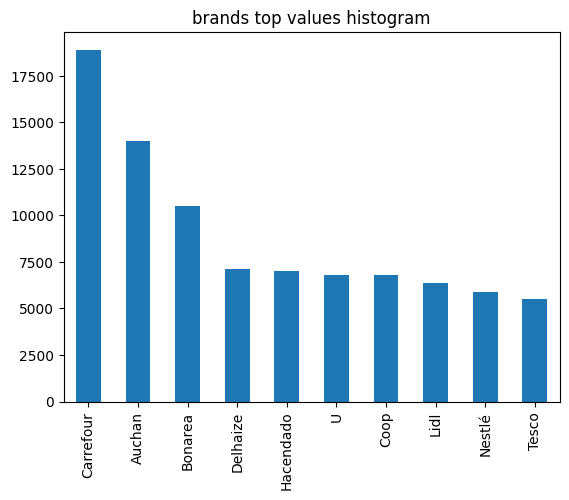


------------------------------
CATEGORIES :
percentage of data : 41.32252881197422 %
Snacks                                                                                                  33831
Snacks, Sweet snacks, Confectioneries                                                                   14683
Groceries, Sauces                                                                                       13465
Dairies, Fermented foods, Fermented milk products, Cheeses                                              11504
Snacks, Sweet snacks, Biscuits and cakes, Biscuits                                                      10667
Desserts, Frozen foods, Frozen desserts                                                                  9084
Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Breads                         7220
Frozen foods                                                                                             6930
Plant-based foods and beverages, P

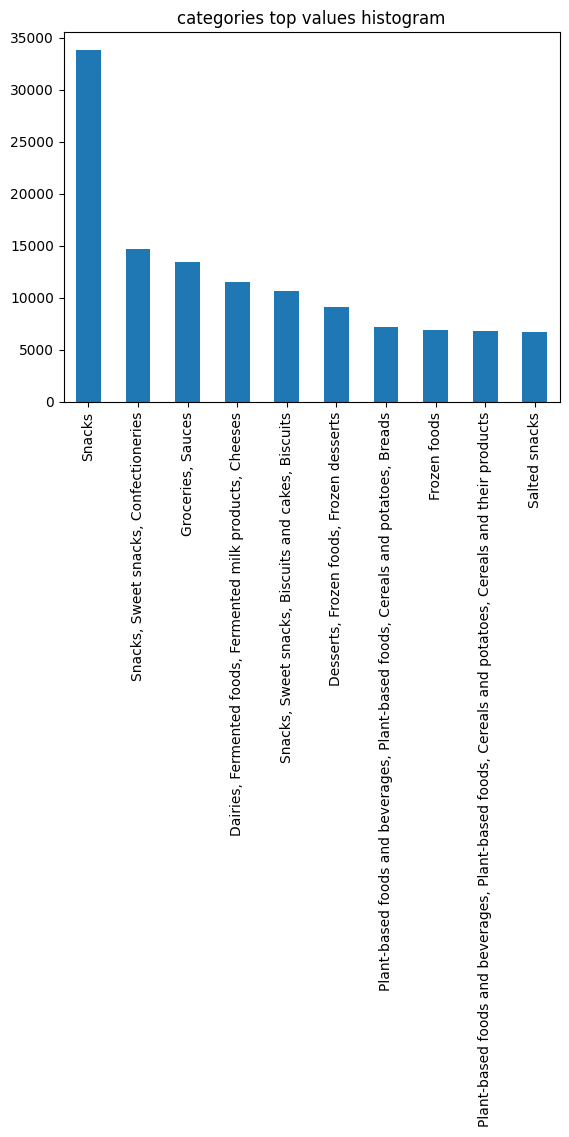


------------------------------
ORIGINS_TAGS :
percentage of data : 3.962567888144463 %
en:france            26485
en:italy              5673
en:european-union     4569
en:spain              4400
en:germany            3113
en:mexico             3034
en:united-states      1887
en:argentina          1375
en:switzerland        1264
en:poland             1233
Name: origins_tags, dtype: int64


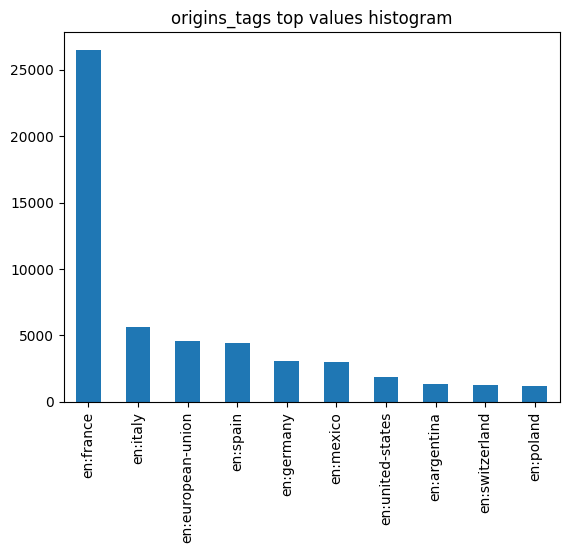


------------------------------
LABELS_TAGS :
percentage of data : 23.987169196540925 %
en:no-gluten                                             49732
en:organic                                               39956
en:vegetarian,en:vegan                                   32568
en:green-dot                                             19742
en:no-preservatives                                      19311
en:organic,en:eu-organic,fr:ab-agriculture-biologique    17619
en:made-in-france                                        13613
en:organic,en:eu-organic                                 10962
en:no-added-sugar                                        10457
en:no-colorings                                           9583
Name: labels_tags, dtype: int64


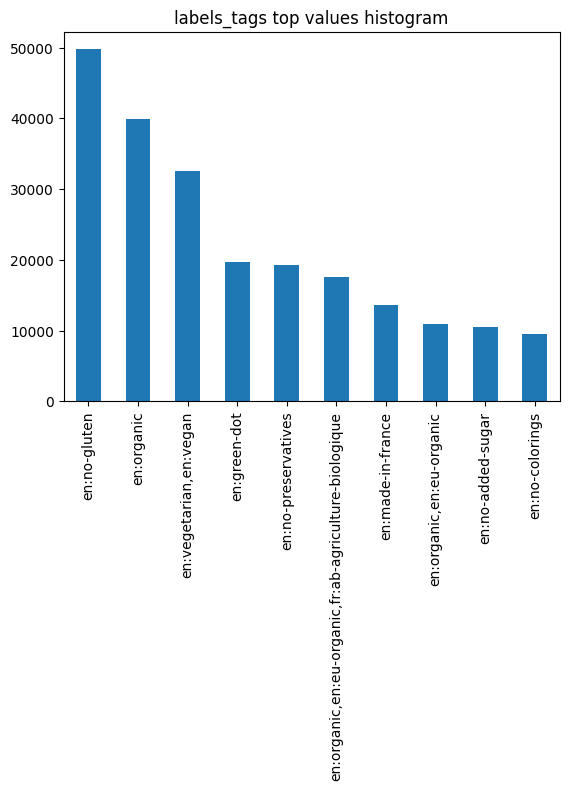


------------------------------
COUNTRIES_TAGS :
percentage of data : 99.72766560090781 %
en:france            864106
en:united-states     551675
en:spain             278102
en:italy             196610
en:germany           137515
en:united-kingdom     82282
en:canada             72052
en:switzerland        65641
en:belgium            65140
en:australia          29977
Name: countries_tags, dtype: int64


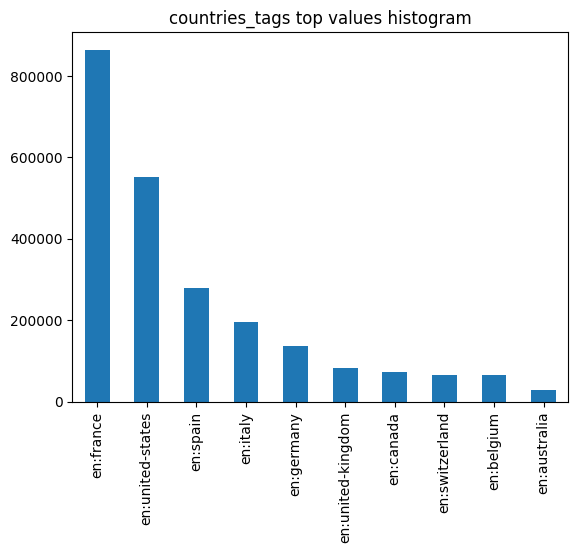


------------------------------
INGREDIENTS_TAGS :
percentage of data : 29.913225288119744 %
en:honey,en:added-sugar                                                                                                1491
en:extra-virgin-olive-oil,en:oil-and-fat,en:vegetable-oil-and-fat,en:vegetable-oil,en:olive-oil,en:virgin-olive-oil    1479
en:durum-wheat-semolina,en:cereal,en:wheat,en:durum-wheat,en:semolina                                                  1336
en:almond,en:nut,en:tree-nut                                                                                            951
en:carbonated-water,en:water,en:natural-flavouring,en:flavouring                                                        904
en:superior-quality-durum-wheat-semolina,en:cereal,en:wheat,en:durum-wheat,en:semolina,en:durum-wheat-semolina          849
en:egg                                                                                                                  761
en:orange-juice,en:fruit,en:citrus-frui

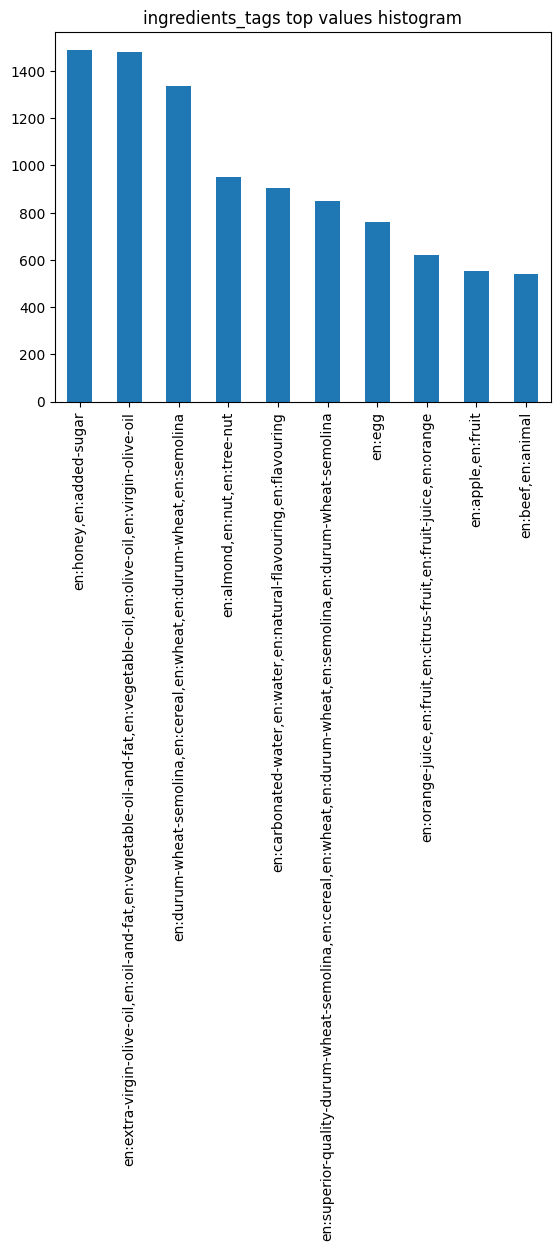


------------------------------
ADDITIVES_N :
percentage of data : 29.96318738840433 %
0.0    344287
1.0    138397
2.0     90093
3.0     63699
4.0     48117
5.0     34558
6.0     24140
7.0     17722
8.0     13248
9.0      8851
Name: additives_n, dtype: int64


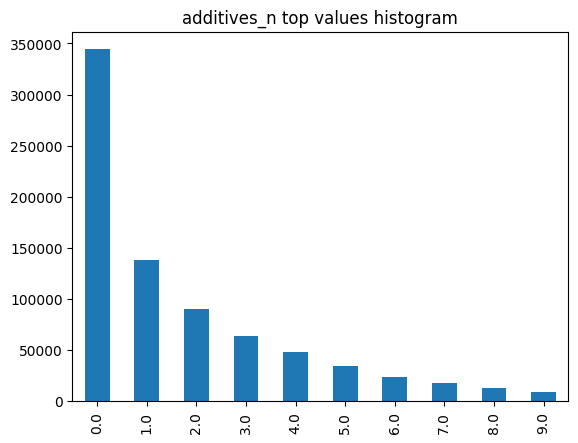


------------------------------
ADDITIVES_TAGS :
percentage of data : 17.145525972101638 %
en:e330              27447
en:e322,en:e322i     19335
en:e440               6964
en:e415               5314
en:e300               5071
en:e14xx              4244
en:e330,en:e440       3500
en:e500,en:e500ii     3360
en:e160b              3183
en:e322               2923
Name: additives_tags, dtype: int64


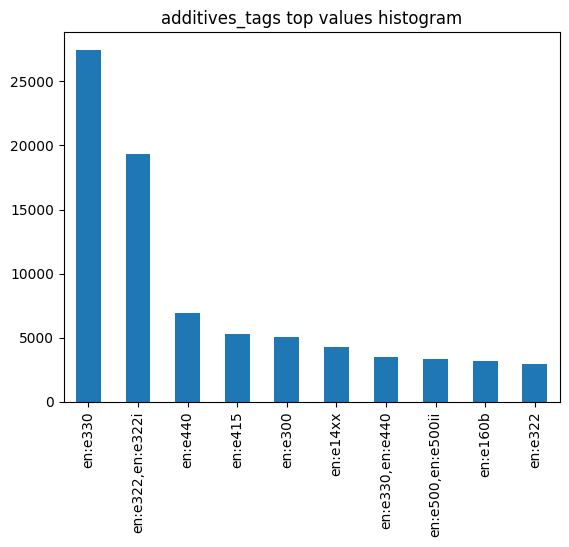


------------------------------
NUTRISCORE_SCORE :
percentage of data : 31.632822493816164 %
 0.0     47085
 14.0    44219
 2.0     39269
 13.0    39222
 11.0    38957
 1.0     38805
 15.0    35348
 12.0    35288
 3.0     34822
-1.0     34080
Name: nutriscore_score, dtype: int64


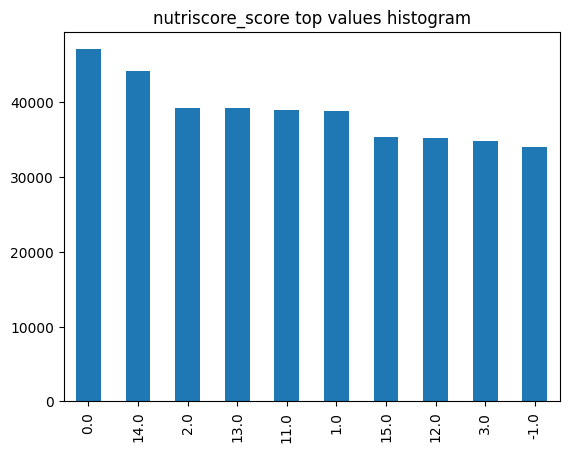


------------------------------
NUTRISCORE_GRADE :
percentage of data : 31.632822493816164 %
d    265340
c    183783
e    158279
a    123294
b    118973
Name: nutriscore_grade, dtype: int64


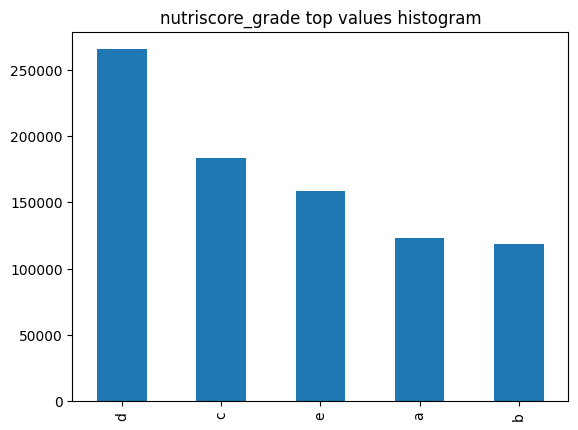


------------------------------
NOVA_GROUP :
percentage of data : 27.17439379070124 %
4.0    467180
3.0    141782
1.0     79484
2.0     41468
Name: nova_group, dtype: int64


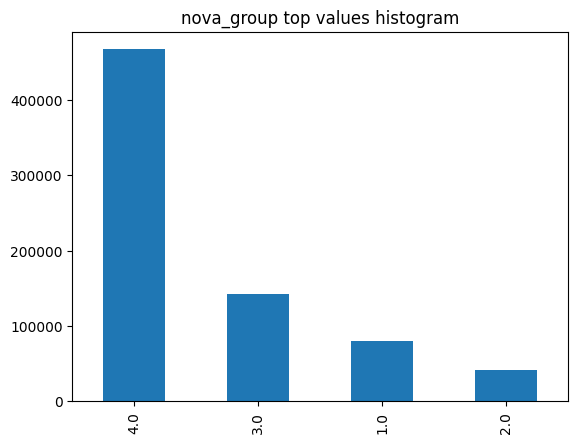


------------------------------
FOOD_GROUPS_TAGS :
percentage of data : 33.49296137505231 %
en:sugary-snacks,en:sweets                       85679
en:sugary-snacks,en:biscuits-and-cakes           72681
en:fats-and-sauces,en:dressings-and-sauces       61633
en:milk-and-dairy-products,en:cheese             54506
en:cereals-and-potatoes,en:cereals               50449
en:composite-foods,en:one-dish-meals             47432
en:fish-meat-eggs,en:processed-meat              45031
en:fruits-and-vegetables,en:vegetables           38622
en:milk-and-dairy-products,en:milk-and-yogurt    37385
en:beverages,en:sweetened-beverages              29200
Name: food_groups_tags, dtype: int64


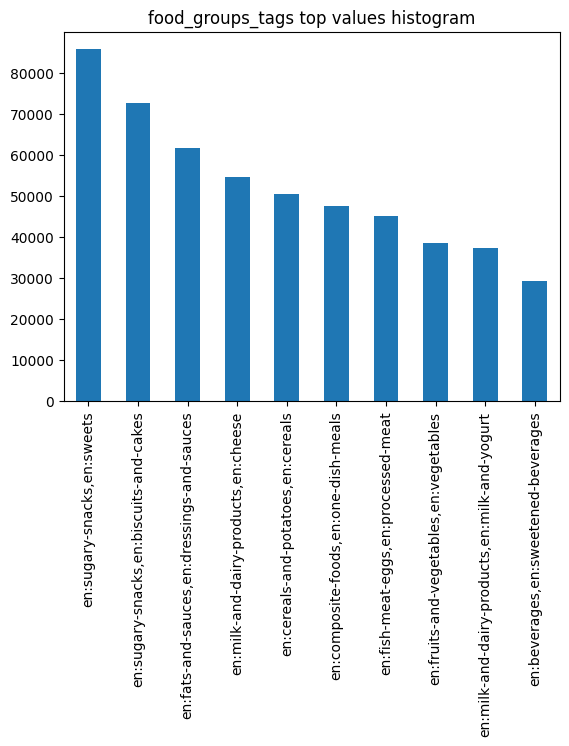


------------------------------
ECOSCORE_SCORE :
percentage of data : 21.78585841738532 %
79.0    41343
34.0    31010
72.0    22474
67.0    17752
49.0    17572
39.0    15747
27.0    15457
21.0    12168
77.0    11577
75.0    11247
Name: ecoscore_score, dtype: int64


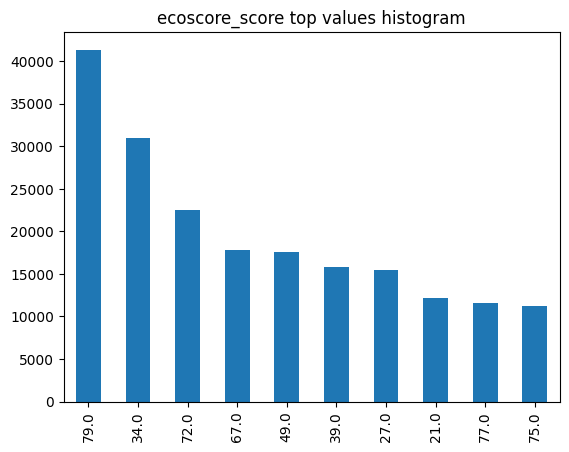


------------------------------
ECOSCORE_GRADE :
percentage of data : 99.95431930175172 %
unknown           2071972
b                  190121
d                  160612
c                  115610
e                   89980
a                   28853
not-applicable      27661
Name: ecoscore_grade, dtype: int64


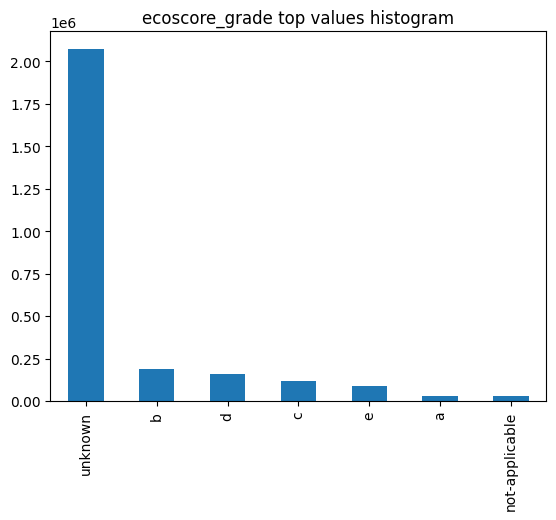


------------------------------
DATA_QUALITY_ERRORS_TAGS :
percentage of data : 5.900926123104828 %
en:energy-value-in-kcal-does-not-match-value-computed-from-other-nutrients                                                                             124433
en:nutrition-value-over-3800-energy,en:energy-value-in-kcal-does-not-match-value-computed-from-other-nutrients                                           4550
en:nutrition-value-total-over-105                                                                                                                        3956
en:nutrition-sugars-plus-starch-greater-than-carbohydrates                                                                                               3331
en:nutrition-saturated-fat-greater-than-fat                                                                                                              3247
en:energy-value-in-kj-does-not-match-value-computed-from-other-nutrients                                      

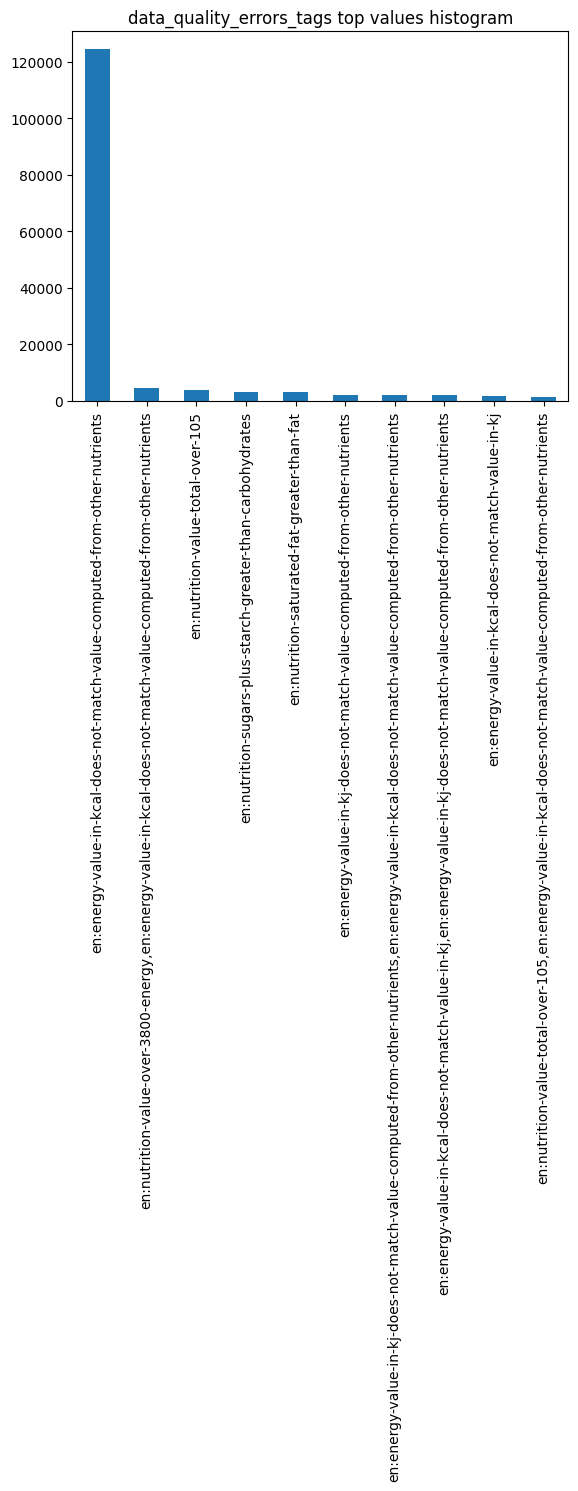


------------------------------
POPULARITY_TAGS :
percentage of data : 27.63354623690822 %
bottom-25-percent-scans-2020,bottom-20-percent-scans-2020,top-85-percent-scans-2020,top-90-percent-scans-2020,top-country-fr-scans-2020                                                                                                                                            25407
bottom-25-percent-scans-2019,bottom-20-percent-scans-2019,top-85-percent-scans-2019,top-90-percent-scans-2019,top-country-fr-scans-2019                                                                                                                                            23471
bottom-25-percent-scans-2021,bottom-20-percent-scans-2021,top-85-percent-scans-2021,top-90-percent-scans-2021,top-country-fr-scans-2021                                                                                                                                            20487
bottom-25-percent-scans-2019,bottom-20-percent-scans-2019,bottom-1

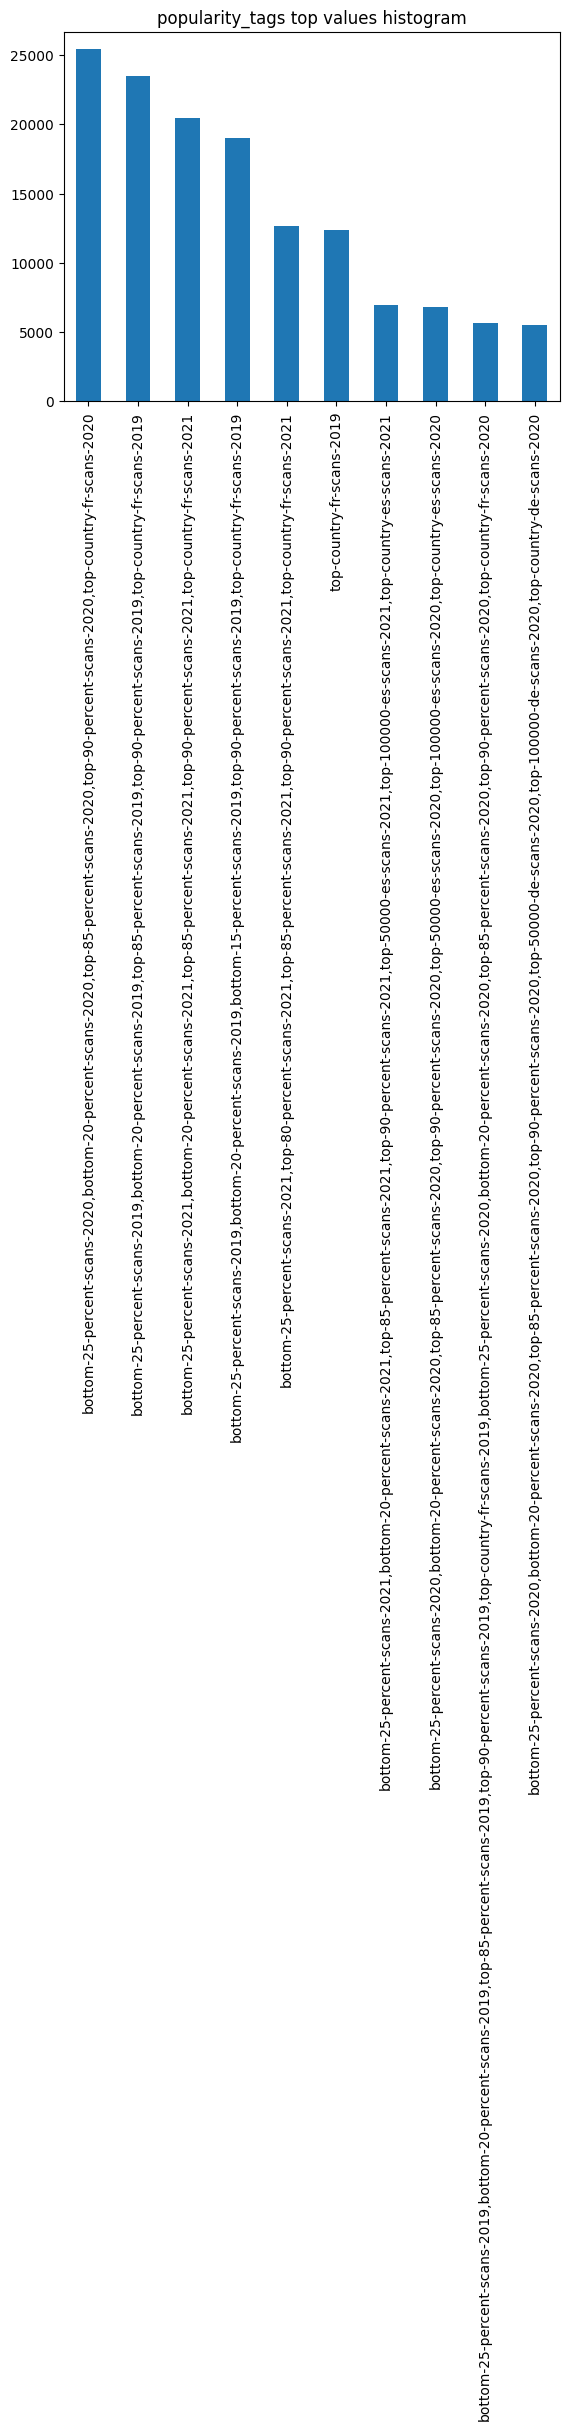


------------------------------
COMPLETENESS :
percentage of data : 99.99996277041707 %
0.2750    580720
0.3750    380473
0.4750    191398
0.4000    143834
0.5000    135708
0.1625    120080
0.2625    101503
0.5750     86276
0.3625     81632
0.7875     78812
Name: completeness, dtype: int64


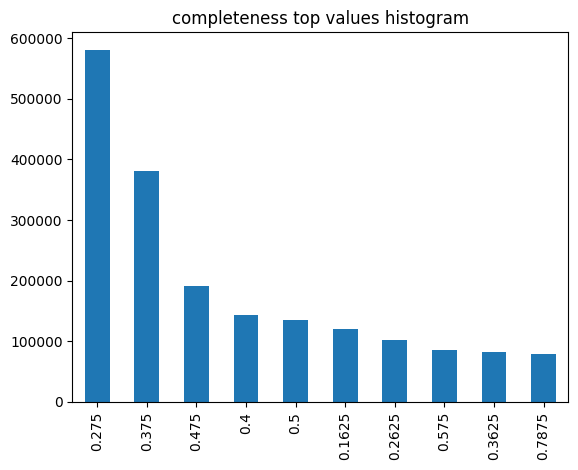


------------------------------
MAIN_CATEGORY :
percentage of data : 41.321598072401116 %
en:groceries                     68698
en:snacks                        34698
en:biscuits                      17298
en:cheeses                       16883
en:confectioneries               16583
en:beverages                     13726
en:breads                        10870
en:frozen-desserts                9638
en:yogurts                        8679
en:cereals-and-their-products     8672
Name: main_category, dtype: int64


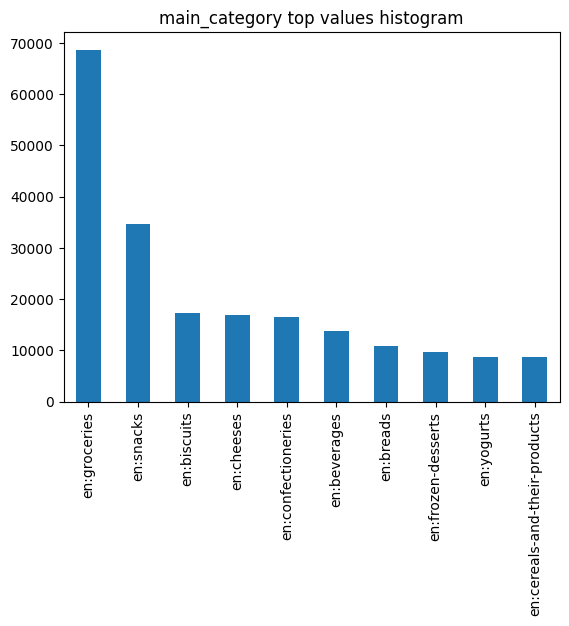

In [37]:
for feat in features:
    print('-'*30)
    print(feat.upper() +' :')
    print(f"percentage of data : {data[feat].notnull().mean()*100} %")
    top = top_values(data, feat)
    print(top)
    top.plot(kind='bar')
    plt.title(f"{feat} top values histogram")
    plt.show()    
    print('')

In [88]:
# data.to_csv('./csv_files/first_data_analyzed.csv.gz',
#             index=False,
#             sep='\t',
#             compression='gzip')
# data = pd.read_csv('./csv_files/first_data_analyzed.csv.gz',
#                    sep='\t',
#                    compression='gzip')

### 1.5.1.  [&#9650;](#toc0_) <a id='toc1_5_1_'></a>Some comments

- code : possible duplicates !

- generic_name : 5%... can be discarded

- One interesting feature is data_quality_errors_tags. 
It is probably a feature generated by processing the information entered by the open food facts app user and controlling if there is consistency in what was provided.

- popularity_tags could be use to anticipate client satisfaction rate. Indeed, we need to be able to provide a high rate of decent results on top scanned products.

- completeness might calculate the ratio of the row not null content?

- nutriscore_score and nutriscore_grade well represented.

- ecoscore_grade : not in interesting in the world (the vast majority is 'unknown')

- ecoscore : Can be interesting.

- are food groups, categories and main_category quite similar?

- some nice label_tags (no-gluten, organic, vegan/vegetarian, made in France, no-added-sugar) for an app?

- brands : appearance of Carrefour, Auchan, U, Lidl. (Could be the start of major brands quality comparison (but are there enough product to be compared?)).

- Nova score (almost same percentage as nutriscore, is it for the same elements?)


# 2.  [&#9650;](#toc0_) <a id='toc2_'></a>Focusing on French products

Now, I want to filter on french products because the application I want to design is for "Santé Publique France" and there are a lot of product indexed.

In [48]:
# Filtering on french products
data = data.loc[data.countries_tags
                .str.contains('france', case=False, na=False),:]
print(data.shape)
display(data.head())

(946118, 23)


code                  product_name generic_name quantity  \
0      00000000000000225                jeunes pousses          NaN      NaN   
3   00000000000026772226                          Skyr          NaN    480 g   
4          0000000000017              Vitória crackers          NaN      NaN   
5          0000000000031                         Cacao          NaN    130 g   
10         0000000000100   moutarde au moût de raisin           NaN     100g   

   packaging_tags         brands  \
0             NaN        endives   
3             NaN         Danone   
4             NaN            NaN   
5             NaN            NaN   
10            NaN  courte paille   

                                           categories origins_tags  \
0                                                 NaN          NaN   
3   Produits laitiers, Desserts, Produits fermenté...          NaN   
4                                                 NaN          NaN   
5                                                 NaN          NaN   
10        en:groceries, Condiments, Sauces, Moutardes          NaN   

         labels_tags countries_tags  ... nutriscore_score  nutriscore_grade  \
0                NaN      en:france  ...              NaN               NaN   
3                NaN      en:france  ...             -5.0                 a   
4                NaN      en:france  ...              NaN               NaN   
5                NaN      en:france  ...              NaN               NaN   
10  fr:delois-france      en:france  ...             18.0                 d   

   nova_group                              food_groups_tags ecoscore_score  \
0         NaN                                           NaN            NaN   
3         NaN  en:milk-and-dairy-products,en:dairy-desserts           34.0   
4         NaN                                           NaN            NaN   
5         NaN                                           NaN            NaN   
10        NaN    en:fats-and-sauces,en:dressings-and-sauces           54.0   

    ecoscore_grade data_quality_errors_tags  popularity_tags completeness  \
0          unknown                      NaN              NaN       0.2000   
3                d                      NaN              NaN       0.5750   
4          unknown                      NaN              NaN       0.2750   
5          unknown                      NaN              NaN       0.2625   
10               c                      NaN              NaN       0.7625   

       main_category  
0                NaN  
3   en:cream-cheeses  
4                NaN  
5                NaN  
10      en:groceries  

[5 rows x 23 columns]

<AxesSubplot: >

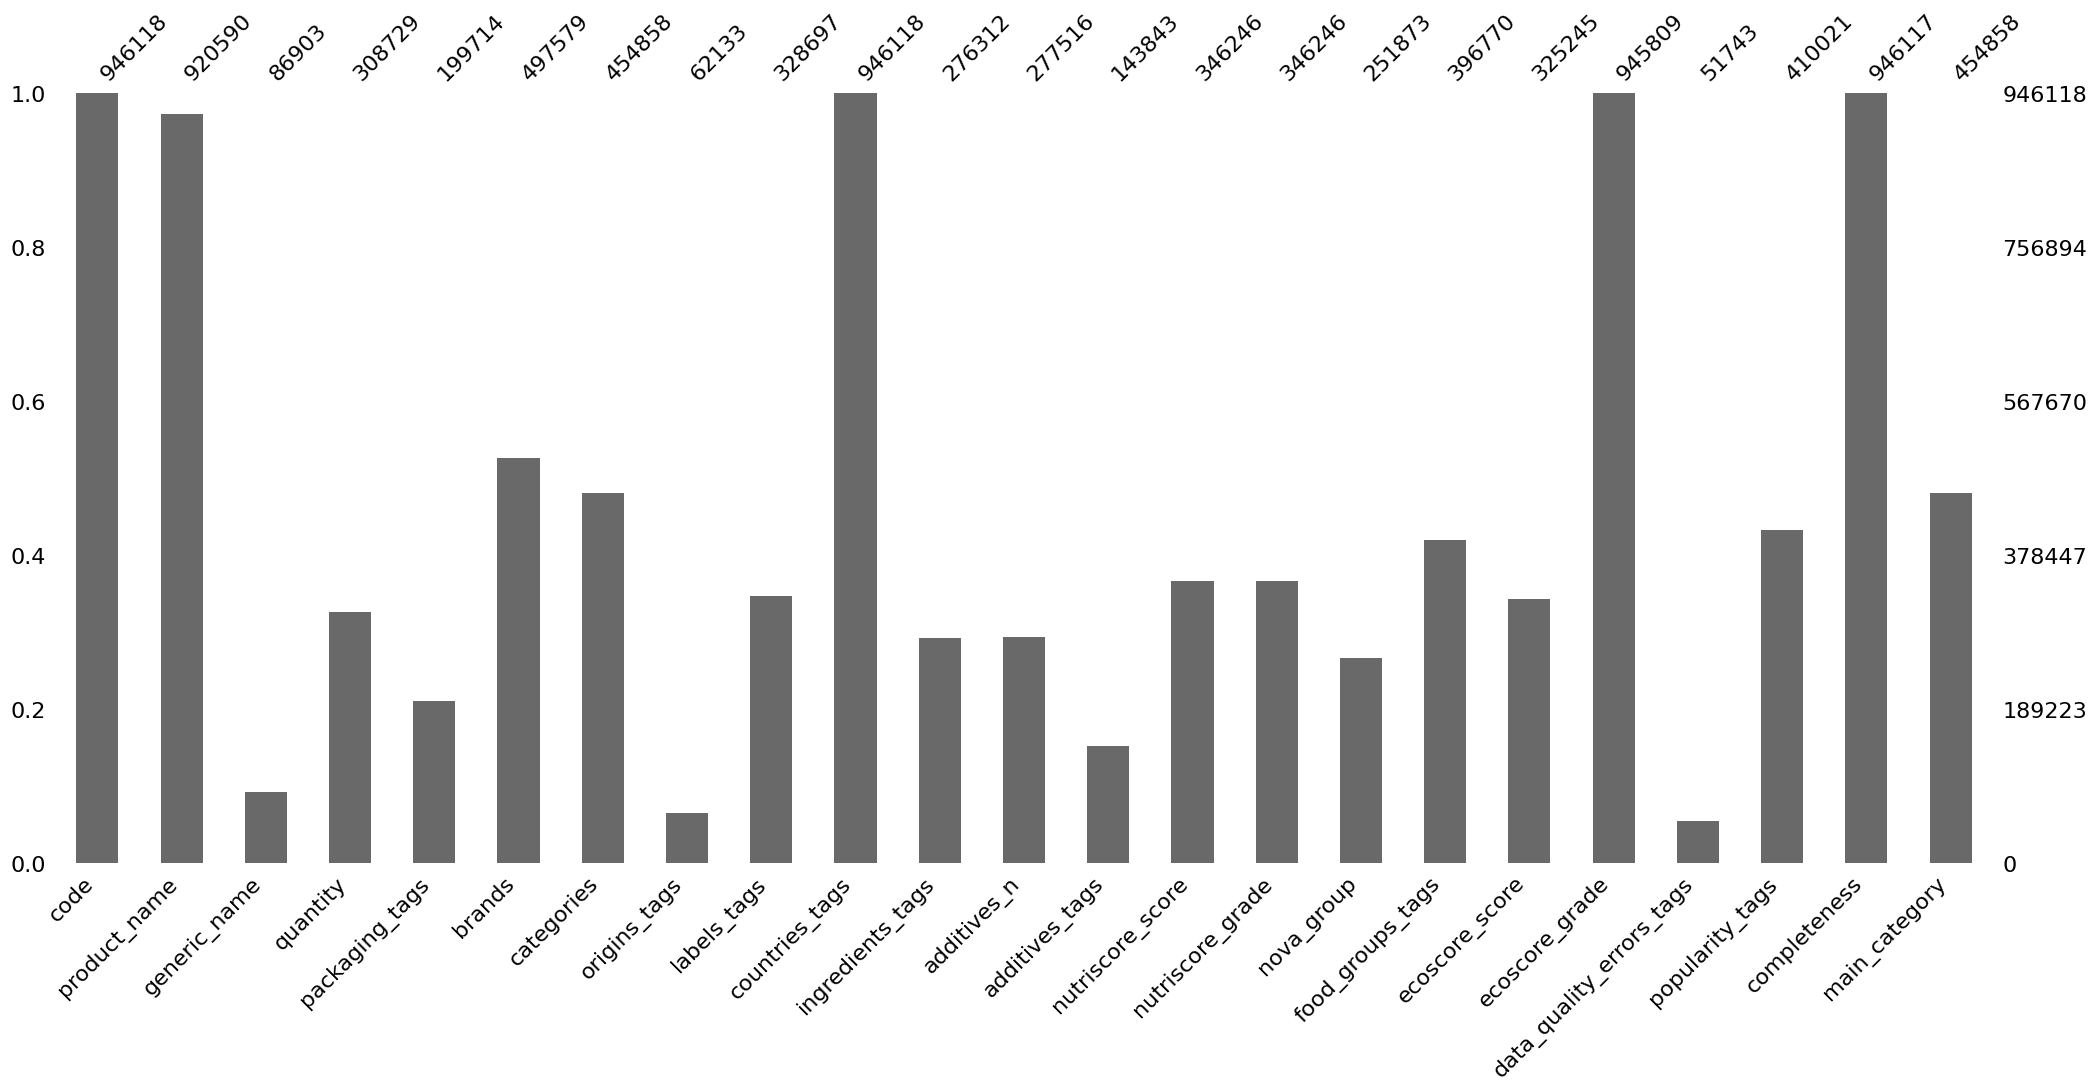

In [43]:
msno.bar(data)

In [28]:
data.describe()

additives_n  nutriscore_score     nova_group  ecoscore_score  \
count  804822.000000     849669.000000  729914.000000   585176.000000   
mean        1.996676          9.256612       3.365446       47.254302   
std         2.862469          8.669236       0.999445       25.687991   
min         0.000000        -15.000000       1.000000      -30.000000   
25%         0.000000          2.000000       3.000000       28.000000   
50%         1.000000         10.000000       4.000000       45.000000   
75%         3.000000         16.000000       4.000000       71.000000   
max        50.000000         40.000000       4.000000      125.000000   

       completeness  
count  2.686035e+06  
mean   4.220682e-01  
std    2.042649e-01  
min    5.000000e-02  
25%    2.750000e-01  
50%    3.750000e-01  
75%    5.000000e-01  
max    1.100000e+00

# 3.  [&#9650;](#toc0_) <a id='toc3_'></a>Nutriscore, ecoscore, and nova score

- nutriscore_score goes from -15 to 40 and
the grade do not have the same amplitude!
Algorithm for computation and process to convert to grades are available
[here](https://nutrition.coeur-herault.fr/sites/default/files/files/fichiers/qr_scientifique_technique_nutriscore-120320.pdf).

     <img src="./images/nutriscore->grade.png"
          width="500"/>

- [ecoscore_score](https://docs.score-environnemental.com/methodologie/fonctionnement-general) ranges from -40 to 135 (with malus bonus) but has it's core between 0 and 100. Beware that ecoscore are estimations based on the mean environmental impact of a *class of product* except if the detailed manufacture process is given by the producer. All chocolates bars for example, have the same ecoscore. It is not computed on each product contrary to nutriscore which depends on the product nutrients.

     <img src="./images/ecoscore->grade.png"
          width="500">

- Nova score : 

     <img src="./images/nova.png"
          width="300">

Hence, this explains in part the results illustrated below with the correlation matrix :
- nova and nutriscore are a bit correlated.
- there is a small anti-correlation between the nutriscore and ecoscore. A negative nutriscore is the best, and and high ecoscore is the best. However, the small value of R is not to be ignored and we are from any generalization. Proof being with next plots.


/tmp/ipykernel_10200/2810548857.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(data.corr()), annot=data.corr(), fmt=".2f", linewidth=.5,


<AxesSubplot: >

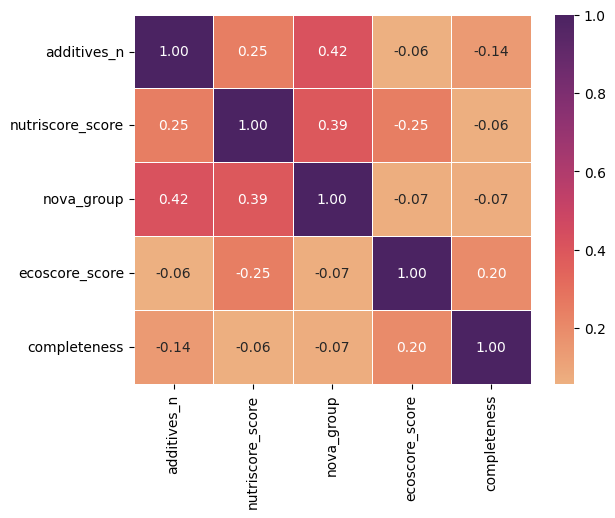

In [19]:
# cmap in abs() but displayed value are signed.
sns.heatmap(abs(data.corr()), annot=data.corr(), fmt=".2f", linewidth=.5,
            cmap='flare', vmax=1)

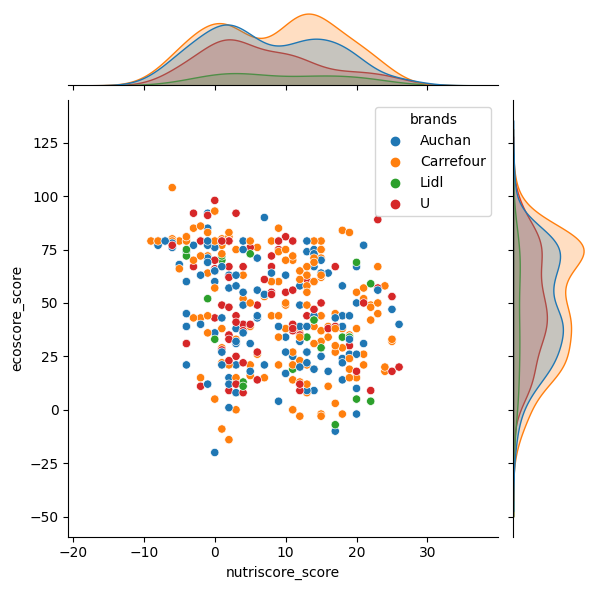

In [22]:
# selecting data with only 4 brands to search
# for any major difference.
data_br4 = data.loc[(data.brands == 'Carrefour')
                    |(data.brands == 'Auchan')
                    |(data.brands == 'U')
                    |(data.brands == 'Lidl'), :]

sns.jointplot(data=data_br4.sample(1000),
              x='nutriscore_score',
              y='ecoscore_score',
              hue='brands')

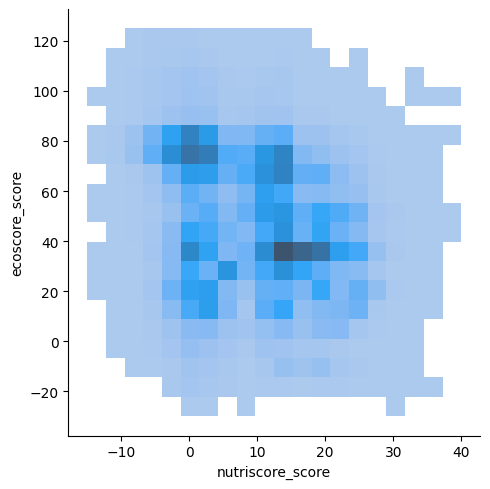

In [21]:
# observing connection between nutri and ecoscore.
sns.displot(data=data,
            x='nutriscore_score',
            y='ecoscore_score',
            bins=20)

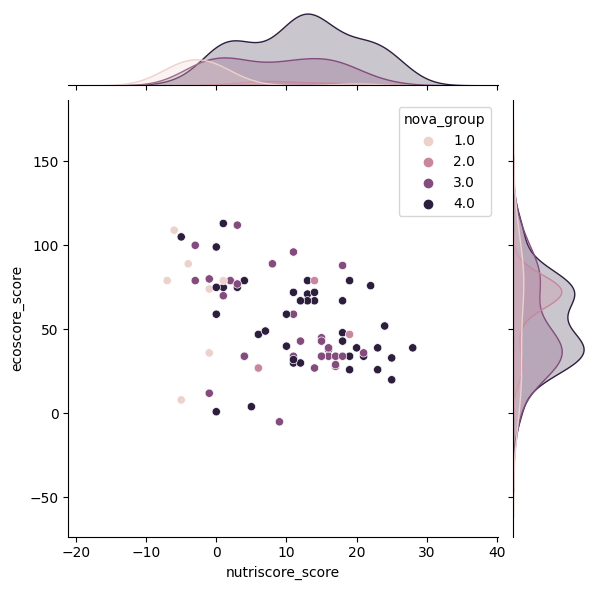

In [27]:
# observing connection between nutri and ecoscore.
sns.jointplot(data=data.sample(1000),
              x='nutriscore_score',
              y='ecoscore_score',
              hue='nova_group')

<AxesSubplot: xlabel='nova_group', ylabel='nutriscore_score'>

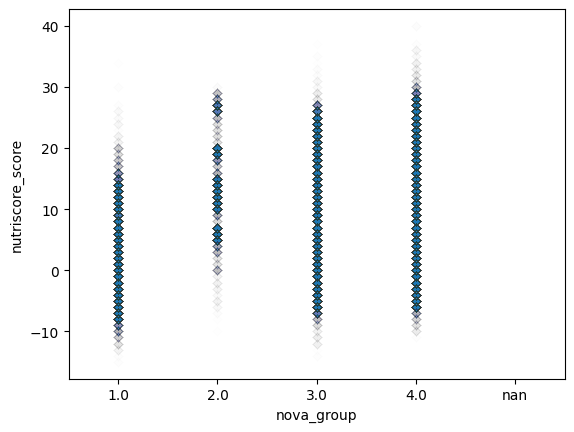

In [72]:
# Plotting eventual connection between nova and nutri
sns.stripplot(data=data,
                y='nutriscore_score',
                x='nova_group',
                jitter=False, s=5, marker="D",
                linewidth=1, alpha=.005)

<AxesSubplot: xlabel='nova_group', ylabel='nutriscore_score'>

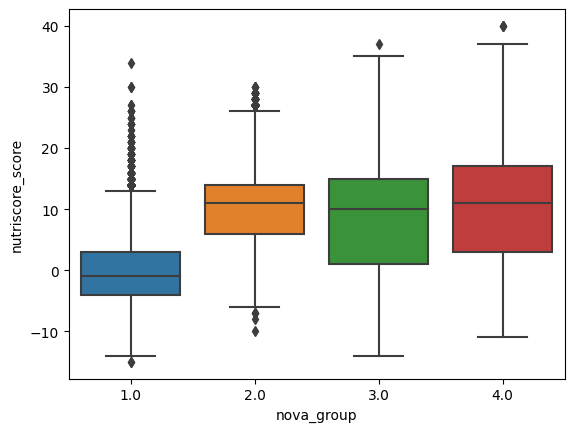

In [71]:
sns.boxplot(data=data, y='nutriscore_score',
            x='nova_group')

# 4.  [&#9650;](#toc0_) <a id='toc4_'></a>Application idea emerging

At that time, I have a better idea of the [application](application_idea.md) I want to build. And it came after visioning this [documentary](https://www.youtube.com/watch?v=xv8EcnyDA2Y)

## 4.1.  [&#9650;](#toc0_) <a id='toc4_1_'></a>Application needs
For that, I need :
- to find the best indicator to classify products into categories.
- nutrient information, especially around sugars.
- a visual for the app for product suggestion, so products images.

So I selected a new set of features to explore in features2.txt and I am going to limit my exploration on products available in France.

remark : 
for later, I will have to think of a process to extend my french database rapidly from the database updates. I will explore datetime to confirm if the database is extended with time, and elements are added at the bottom. If so, it would be great, to recall the last line number until which the database was processed, and compute processing only on the added products. And then concatenate new part of the dataframe with the one already processed.


## 4.2.  [&#9650;](#toc0_) <a id='toc4_2_'></a>Features exploration : features2.txt

In [5]:
countries = pd.read_csv('./csv_files/data.csv.gz',
                        compression='gzip',
                        sep='\t',
                        usecols=['countries_tags'])

# Searching for products sold in France.
fr = countries.loc[countries.countries_tags
                   .str.contains('france', case=False, na=False), :]

print(f"There are {len(fr)} products sold in France in the database.")

There are 946118 products sold in France in the database.


In [6]:
# Rows containing irrelevant information for french customers.
rows_to_skip =  [n 
                 for n in range(countries.shape[0])
                 if n not in fr.index]

# An other features selection (discussed above).
with open('./features2.txt', 'r') as fin:
    features = [feat.strip('\n') for feat in fin]
print(features)

['code', 'url', 'image_url', 'categories', 'food_groups_tags', 'main_category', 'pnns_groups_1', 'pnns_groups_2', 'food_groups_tags', 'nutrient_levels_tags', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']


In [7]:
data = pd.read_csv('./csv_files/data.csv.gz',
                   compression='gzip',
                   sep='\t',
                   skiprows=rows_to_skip,
                   usecols=features,
                   dtype={'code': 'object'})

In [12]:
# data.to_csv('./csv_files/second_exploration.csv',
#             index=False )

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946118 entries, 0 to 946117
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   code                  946118 non-null  object 
 1   url                   946118 non-null  object 
 2   categories            439000 non-null  object 
 3   pnns_groups_1         945936 non-null  object 
 4   pnns_groups_2         945937 non-null  object 
 5   food_groups_tags      380365 non-null  object 
 6   nutrient_levels_tags  355513 non-null  object 
 7   main_category         438997 non-null  object 
 8   image_url             844603 non-null  object 
 9   energy-kcal_100g      696647 non-null  float64
 10  fat_100g              715722 non-null  float64
 11  saturated-fat_100g    716654 non-null  float64
 12  trans-fat_100g        7486 non-null    float64
 13  cholesterol_100g      7744 non-null    float64
 14  carbohydrates_100g    715307 non-null  float64
 15  

<AxesSubplot: >

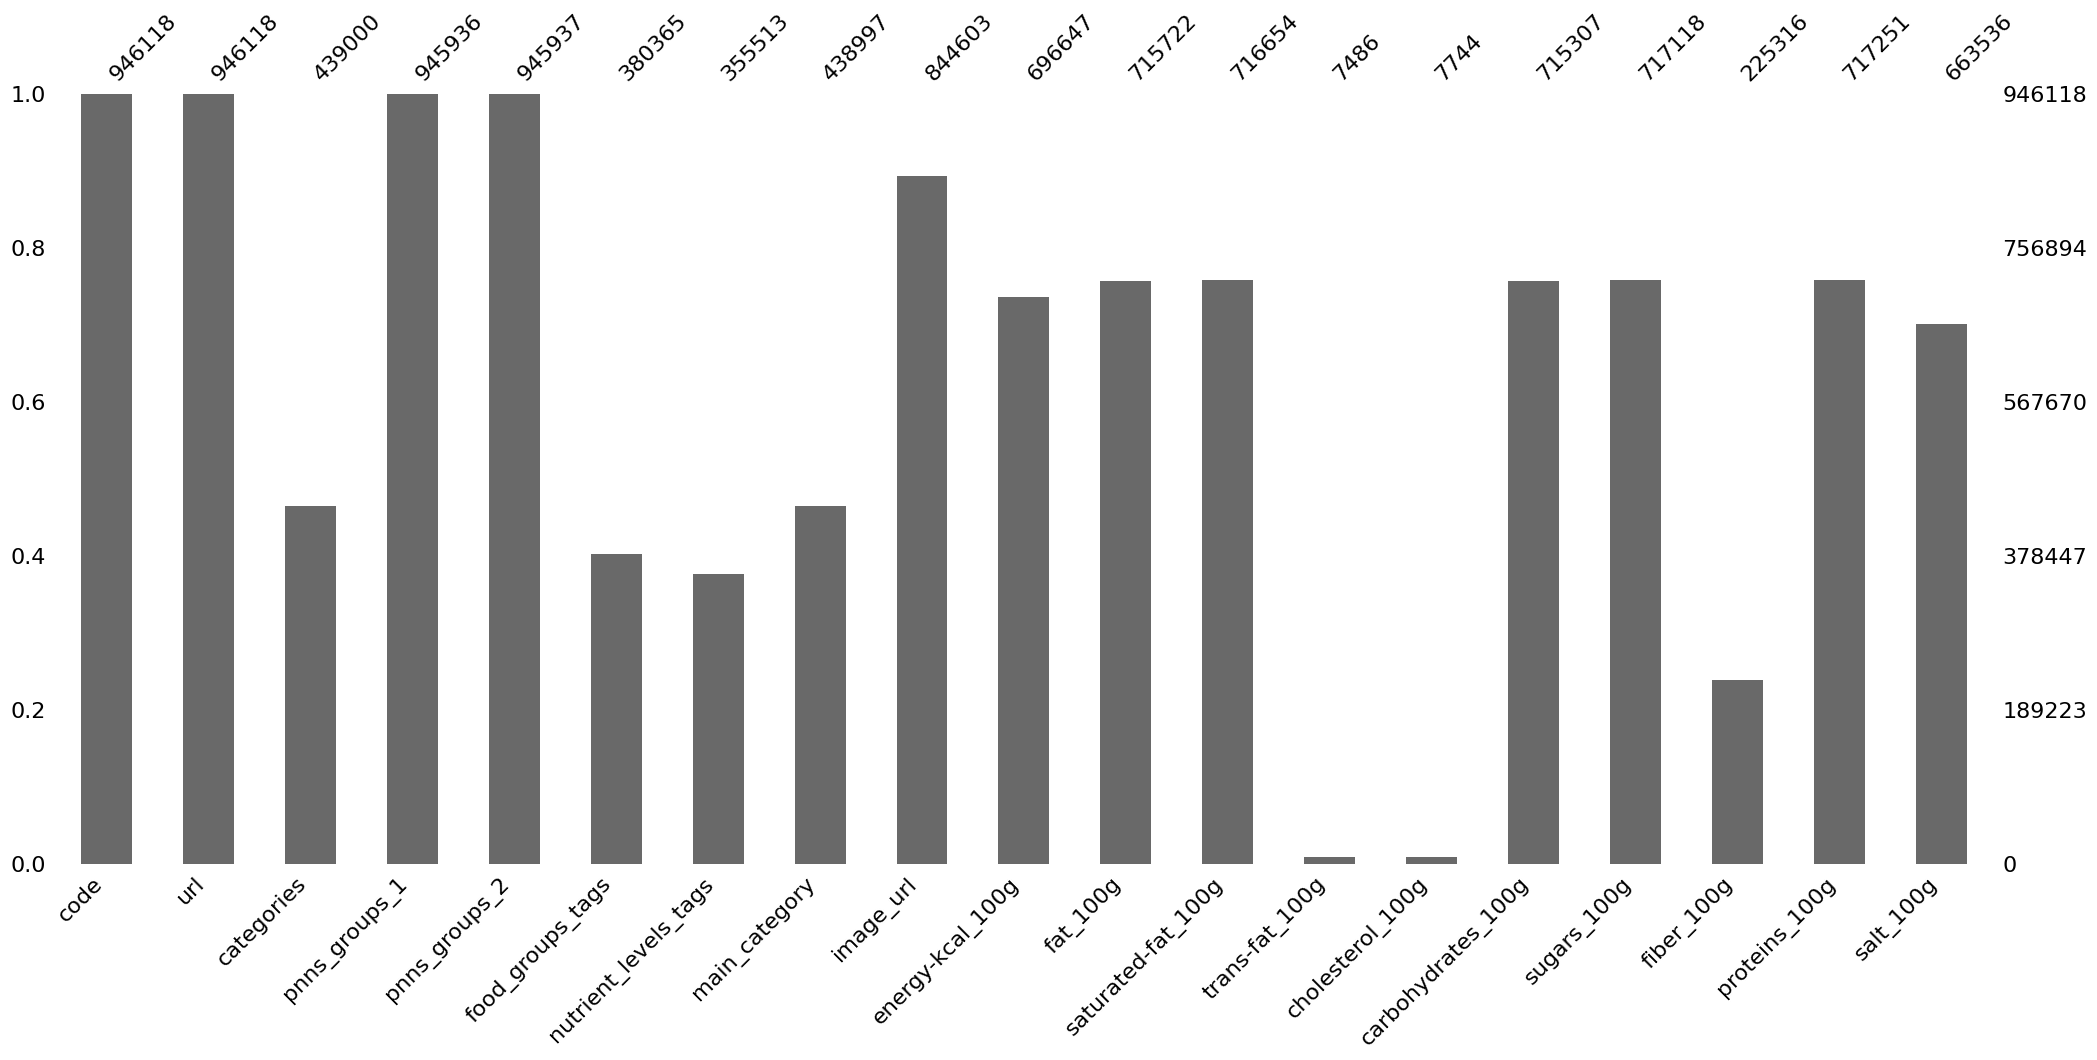

In [15]:
msno.bar(data)

In [8]:
groups_f = ['categories',
          'pnns_groups_1',
          'pnns_groups_2',
          'food_groups_tags',
          'main_category']

nutrients_f = ['nutrient_levels_tags',
             'energy-kcal_100g',
             'fat_100g',
             'saturated-fat_100g',
             'trans-fat_100g',
             'cholesterol_100g', 
             'carbohydrates_100g',
             'sugars_100g',
             'fiber_100g',
             'proteins_100g',
             'salt_100g']

urls_f = ['url', 'image_url']

### 4.2.1.  [&#9650;](#toc0_) <a id='toc4_2_1_'></a>food groups features exploration

------------------------------
CATEGORIES :
percentage of data : 46.400131907436496 %
Viandes, Volailles, Poulets, Filets de poulet                                                                                                                                                                              3780
Boissons                                                                                                                                                                                                                   3026
Viandes, Charcuteries, Jambons, Jambons blancs                                                                                                                                                                             2848
Aliments et boissons à base de végétaux, Aliments d'origine végétale, Matières grasses, Matières grasses végétales, Produits de l'olivier, Huiles, Huiles d'olive, Huiles d'olive vierges, Huiles d'olive vierges extra    1923
Snacks, Snacks suc

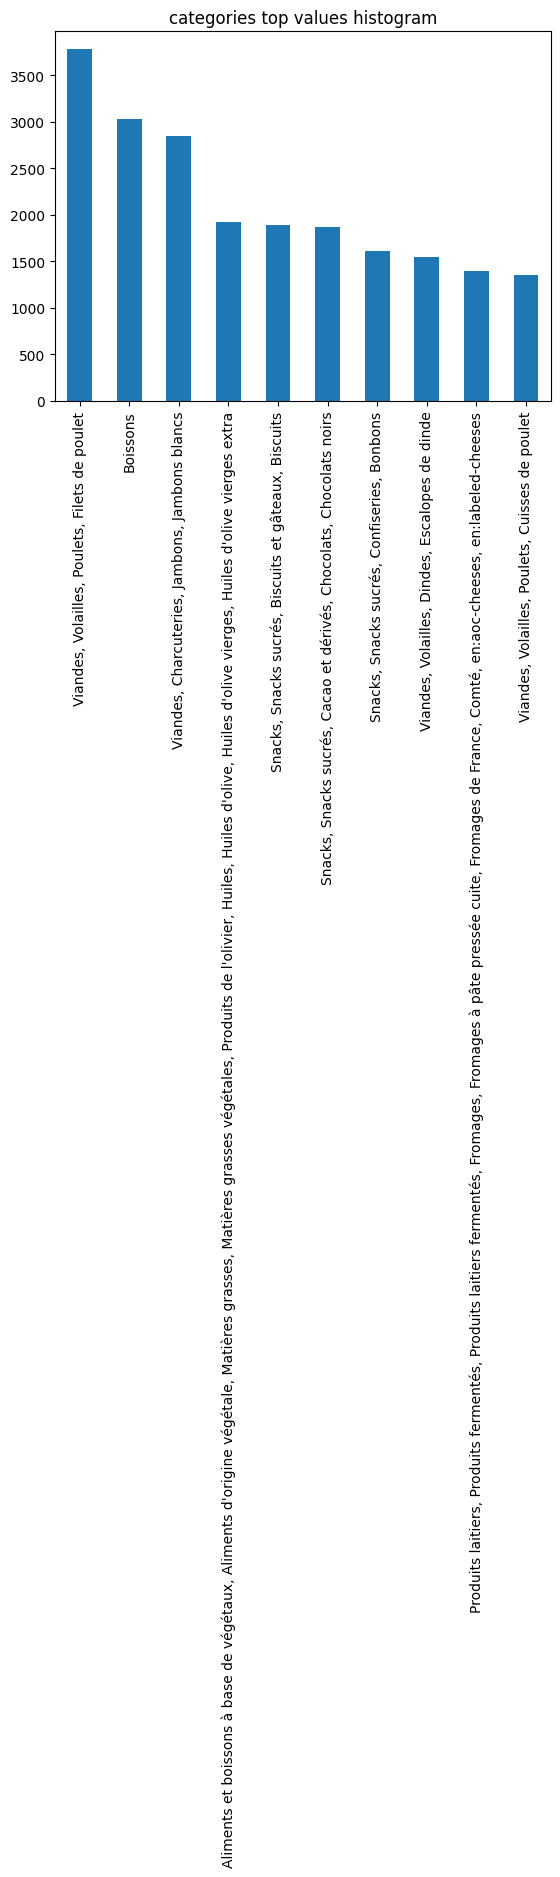


------------------------------
PNNS_GROUPS_1 :
percentage of data : 99.98076349884475 %
unknown                    567278
Sugary snacks               78644
Fish Meat Eggs              65596
Milk and dairy products     44196
Cereals and potatoes        35680
Composite foods             31404
Fruits and vegetables       30458
Beverages                   29211
Fat and sauces              27923
Salty snacks                22863
Name: pnns_groups_1, dtype: int64


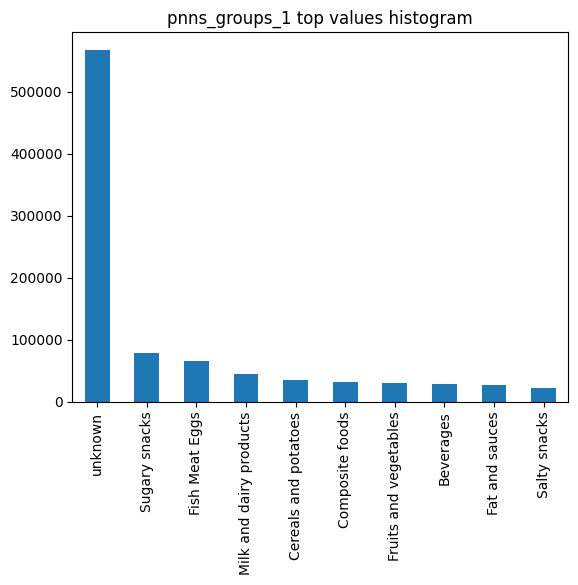


------------------------------
PNNS_GROUPS_2 :
percentage of data : 99.98086919390605 %
unknown                 567278
Sweets                   35463
Biscuits and cakes       28685
Processed meat           24679
One-dish meals           24297
Meat                     23005
Cheese                   22311
Dressings and sauces     18709
Cereals                  16609
Fish and seafood         14563
Name: pnns_groups_2, dtype: int64


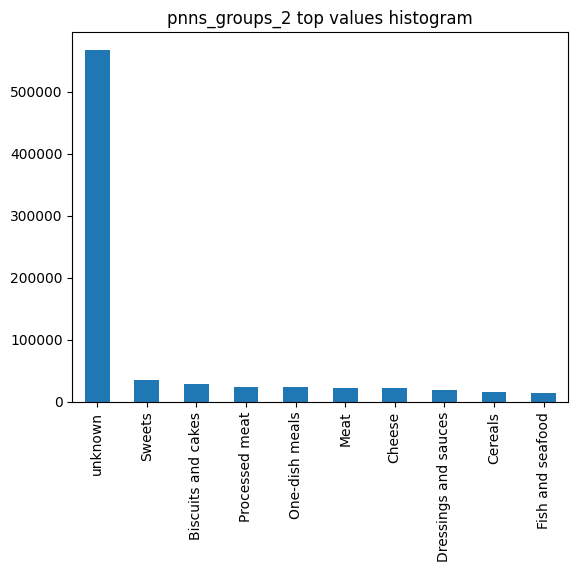


------------------------------
FOOD_GROUPS_TAGS :
percentage of data : 40.202701988546885 %
en:sugary-snacks,en:sweets                    35456
en:sugary-snacks,en:biscuits-and-cakes        28678
en:fish-meat-eggs,en:processed-meat           24302
en:composite-foods,en:one-dish-meals          23246
en:milk-and-dairy-products,en:cheese          22305
en:fats-and-sauces,en:dressings-and-sauces    18690
en:cereals-and-potatoes,en:cereals            16605
en:fish-meat-eggs,en:meat,en:poultry          15227
en:fruits-and-vegetables,en:vegetables        14347
en:alcoholic-beverages                        12627
Name: food_groups_tags, dtype: int64


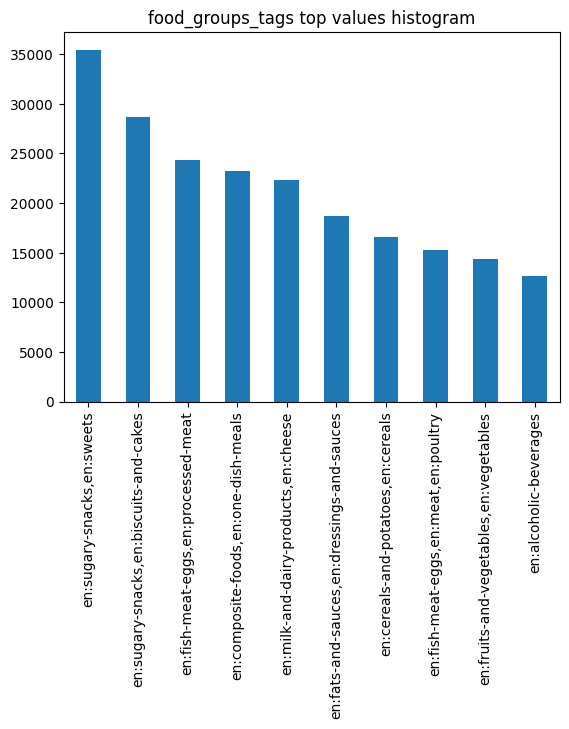


------------------------------
MAIN_CATEGORY :
percentage of data : 46.399814822252615 %
en:groceries                  20987
en:sweetened-beverages         4741
en:beverages                   4130
en:chicken-breasts             4067
en:biscuits                    3399
en:white-hams                  3048
en:extra-virgin-olive-oils     2624
en:candies                     2503
en:dark-chocolates             2417
en:unsweetened-beverages       2317
Name: main_category, dtype: int64


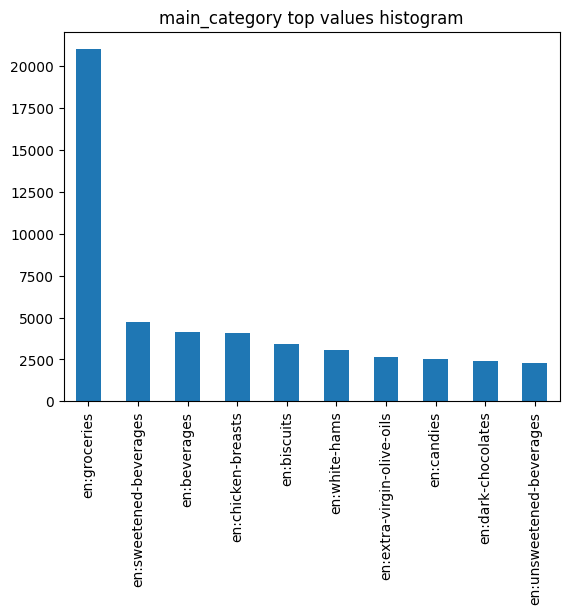

In [23]:
for feat in groups_f:
    print('-'*30)
    print(feat.upper() +' :')
    print(f"percentage of data : {data[feat].notnull().mean()*100} %")
    top = top_values(data, feat)
    print(top)
    top.plot(kind='bar')
    plt.title(f"{feat} top values histogram")
    plt.show()    
    print('')

In [64]:
groups = data.loc[:, groups_f]
urls = data.loc[:, urls_f]
nutrients = data.loc[:, nutrients_f]

<AxesSubplot: >

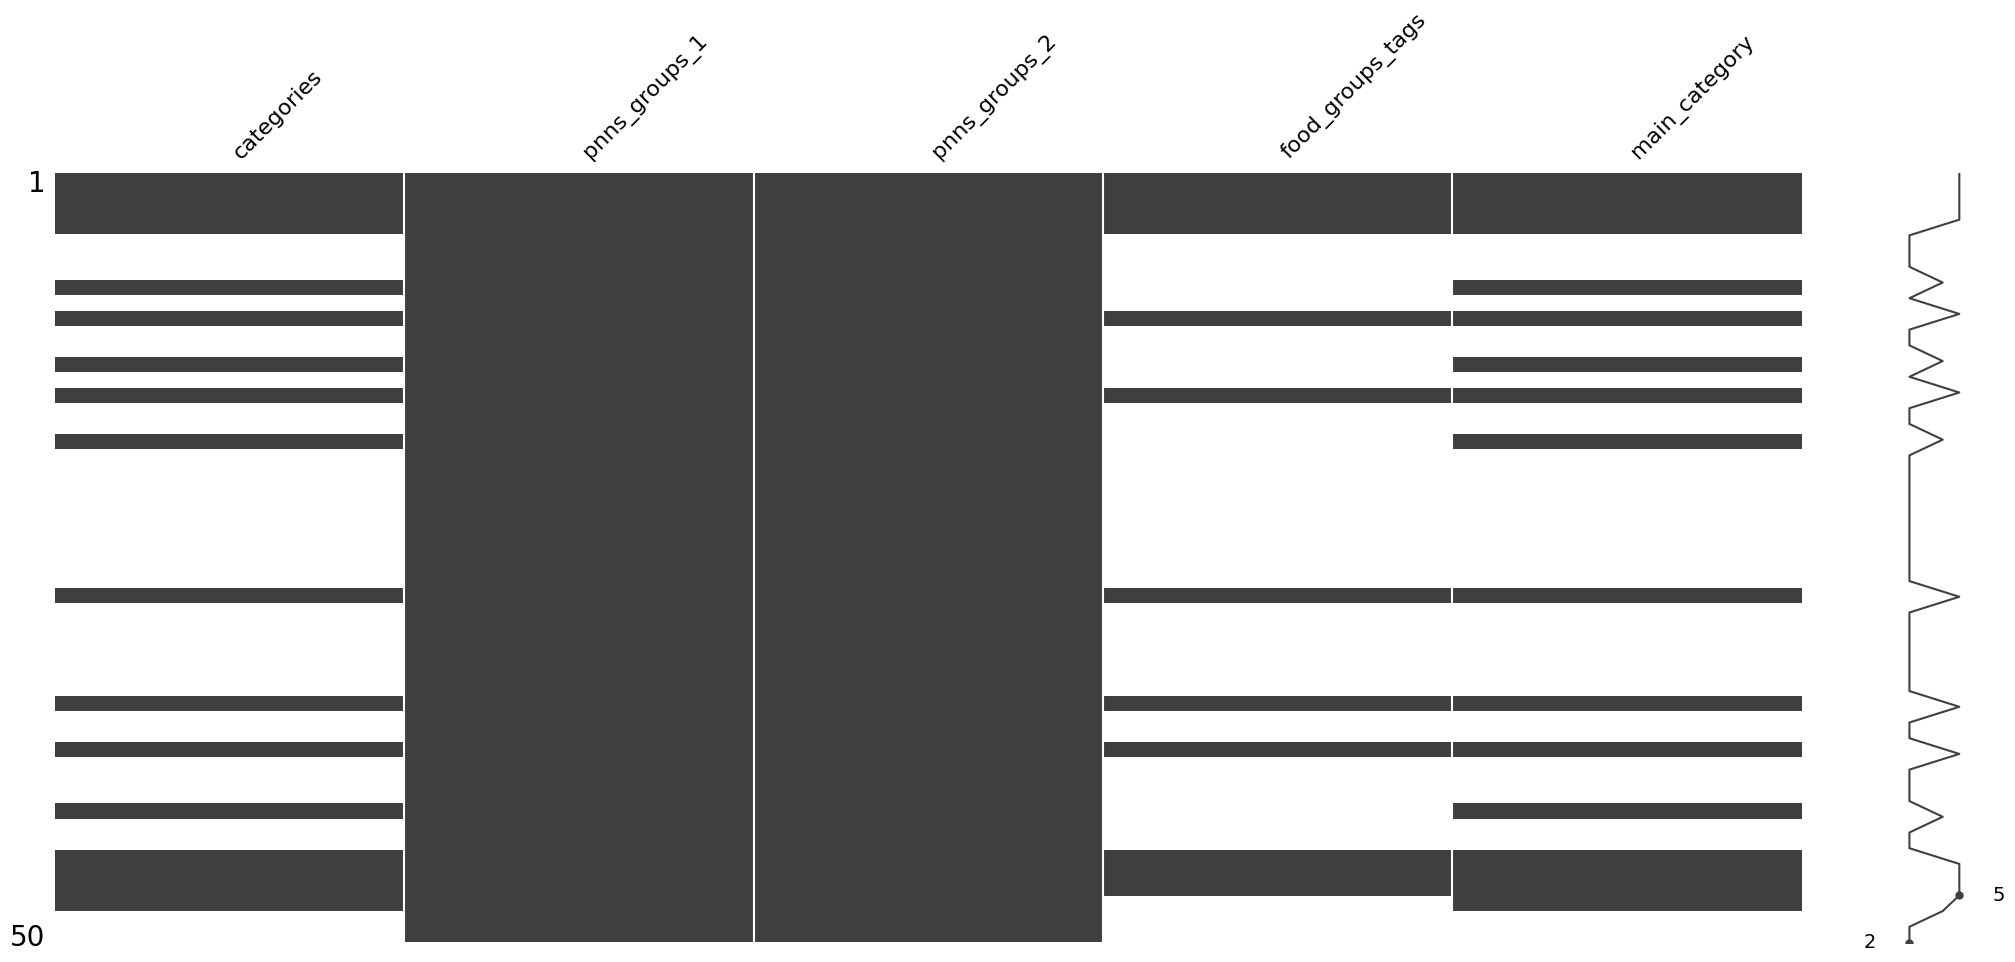

In [65]:
msno.matrix(groups.sample(50))

<AxesSubplot: >

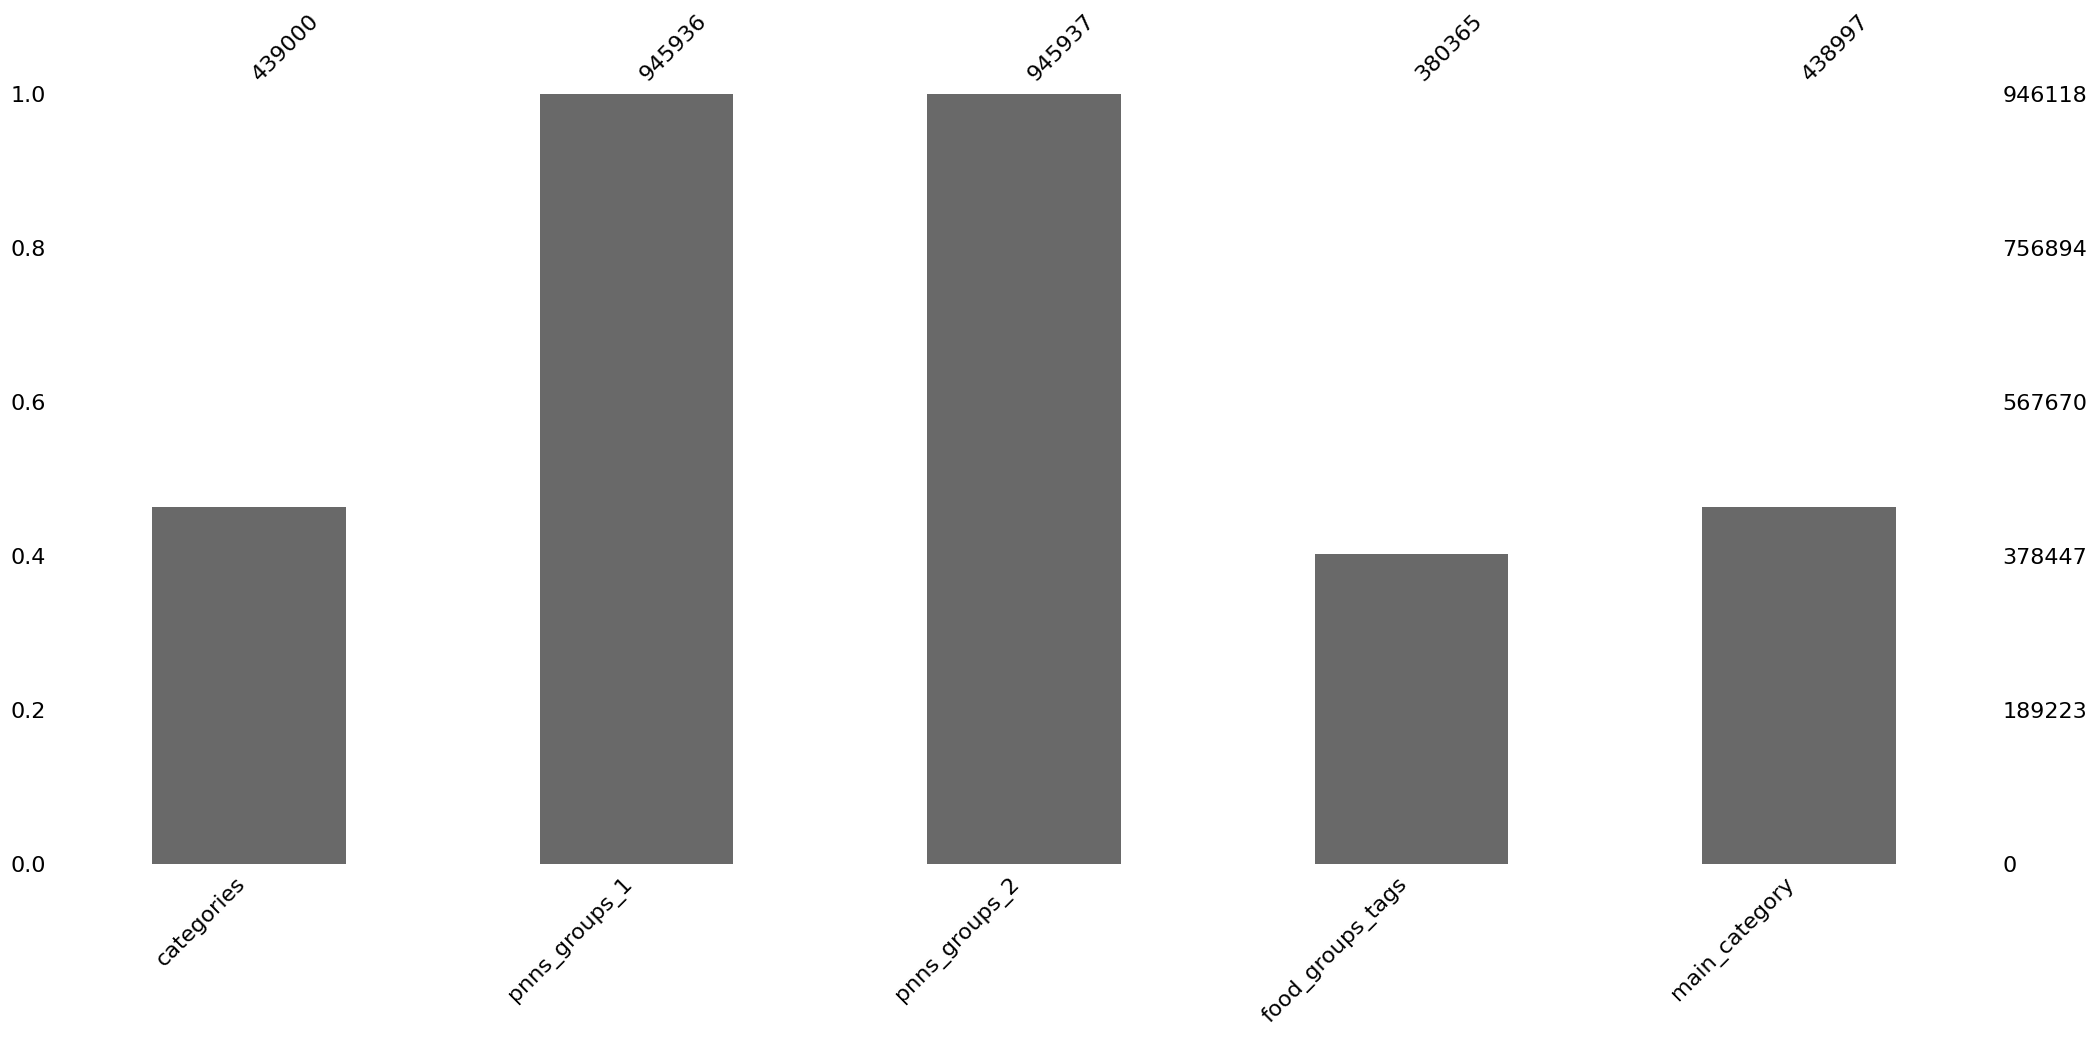

In [30]:
msno.bar(groups)

From what we can see above, categories and main_category are almost
filled identically. And food_groups is also very similar. But with a
bit more of missing values.

In [ ]:
# Observing categories and main_category differences
groups.loc[groups.categories.notnull() & groups.main_category.isnull()]

categories pnns_groups_1 pnns_groups_2 food_groups_tags main_category
790933          ?       unknown       unknown              NaN           NaN
932843          .       unknown       unknown              NaN           NaN
935212          ?       unknown       unknown              NaN           NaN

In [ ]:
# Observing categories and main_category differences
groups.loc[groups.categories.notnull() & groups.main_category.isnull()]

categories pnns_groups_1 pnns_groups_2 food_groups_tags main_category
790933          ?       unknown       unknown              NaN           NaN
932843          .       unknown       unknown              NaN           NaN
935212          ?       unknown       unknown              NaN           NaN

In [32]:
# Observing categories and main_category differences
groups.loc[groups.categories.notnull() & groups.main_category.isnull()]

categories pnns_groups_1 pnns_groups_2 food_groups_tags main_category
790933          ?       unknown       unknown              NaN           NaN
932843          .       unknown       unknown              NaN           NaN
935212          ?       unknown       unknown              NaN           NaN

In [67]:
groups.sample(20)

categories  \
913640                                                NaN   
331267                                  en:dairy-desserts   
347743                                                NaN   
280647               Boissons, Boissons avec sucre ajouté   
637581                                                NaN   
653255  Produits laitiers, Produits fermentés, Produit...   
447806  Boissons, Produits laitiers, Produits fermenté...   
806289                                                NaN   
753935  Aliments et boissons à base de végétaux, Alime...   
540371        Snacks, Snacks sucrés, Confiseries, Bonbons   
922076  Compléments alimentaires, Compléments pour le ...   
39456   Aliments et boissons à base de végétaux, Alime...   
564056                                                NaN   
492966                                                NaN   
452317  Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...   
106476                                                NaN   
454513                                                NaN   
1890                                                  NaN   
711465                                                NaN   
436029                                                NaN   

                  pnns_groups_1        pnns_groups_2  \
913640                  unknown              unknown   
331267  Milk and dairy products       Dairy desserts   
347743                  unknown              unknown   
280647                Beverages  Sweetened beverages   
637581                  unknown              unknown   
653255  Milk and dairy products               Cheese   
447806  Milk and dairy products      Milk and yogurt   
806289                  unknown              unknown   
753935     Cereals and potatoes              Cereals   
540371            Sugary snacks               Sweets   
922076                  unknown              unknown   
39456     Fruits and vegetables               Fruits   
564056                  unknown              unknown   
492966                  unknown              unknown   
452317            Sugary snacks   Biscuits and cakes   
106476                  unknown              unknown   
454513                  unknown              unknown   
1890                    unknown              unknown   
711465                  unknown              unknown   
436029                  unknown              unknown   

                                     food_groups_tags           main_category  
913640                                            NaN                     NaN  
331267   en:milk-and-dairy-products,en:dairy-desserts       en:dairy-desserts  
347743                                            NaN                     NaN  
280647            en:beverages,en:sweetened-beverages  en:sweetened-beverages  
637581                                            NaN                     NaN  
653255           en:milk-and-dairy-products,en:cheese      en:artisan-cheeses  
447806  en:milk-and-dairy-products,en:milk-and-yogurt    en:drinkable-yogurts  
806289                                            NaN                     NaN  
753935             en:cereals-and-potatoes,en:cereals                en:rices  
540371                     en:sugary-snacks,en:sweets              en:candies  
922076                                            NaN         en:protein-bars  
39456              en:fruits-and-vegetables,en:fruits              en:bananas  
564056                                            NaN                     NaN  
492966                                            NaN                     NaN  
452317         en:sugary-snacks,en:biscuits-and-cakes               fr:palets  
106476                                            NaN                     NaN  
454513                                            NaN                     NaN  
1890                                              NaN                     NaN  
711465                                            NaN               

Here I observe that pnns groups are less specific than main_category
and probably than the last item of categories.
I also notice that pnns1 and pnns2 are contained in food_groups_tags



In [69]:
# Creating a new column with the last item of categories for
# easier readability and comparison with main_category.
def get_last_item(categories: str) -> str:
    """ Return the last item of a string filled
        with comma separators.
        
        Example : 'tutu,bar,foo' -> 'foo' 
        
        If a np.nan is provided (type float),
        return np.nan. 
    """
    if type(categories) is str:
        if ',' not in categories:
            return categories
        else: 
            inv_cat = categories[::-1]
            return inv_cat[:inv_cat.find(',')][::-1]
    # For NaN's, which are of type float.
    else:
        return categories

groups['tinniest_category'] = groups.categories.apply(get_last_item)

In [70]:
groups.loc[:,['main_category','tinniest_category']].sample(20)

main_category         tinniest_category
839234         en:canned-tunas         Thons en conserve
652283                     NaN                       NaN
820226                     NaN                       NaN
5587                 en:snacks                    Snacks
589436                     NaN                       NaN
328934       en:cheese-spreads       Fromages à tartiner
365225          en:ratatouille              Ratatouilles
423163  en:dietary-supplements  Compléments alimentaires
809212            en:smoothies                 Smoothies
13574                      NaN                       NaN
398277            en:galantine                 Galantine
712259     en:dehydrated-soups          Dehydrated soups
81515   en:greek-style-yogurts       Greek-style yogurts
290227                     NaN                       NaN
202563     en:young-mimolettes         Mimolettes jeunes
463909       en:sweet-fritters           Beignets sucrés
555084                     NaN                       NaN
873553                     NaN                       NaN
583765     en:country-terrines      Terrines de campagne
669804                     NaN                       NaN

So it appears to mainly be a translation.
Consequently, I could keep pnns_groups 1 and 2 + main_category to create homogeneous groups on which I could compute some indicators.

main_category seem to be already a bit processed, and so
probably easier to work with, although it has the drawback
to be mainly translated to english, which might be a problem
when printing messages in the application.

### 4.2.2.  [&#9650;](#toc0_) <a id='toc4_2_2_'></a>Nutrients features exploration

<AxesSubplot: >

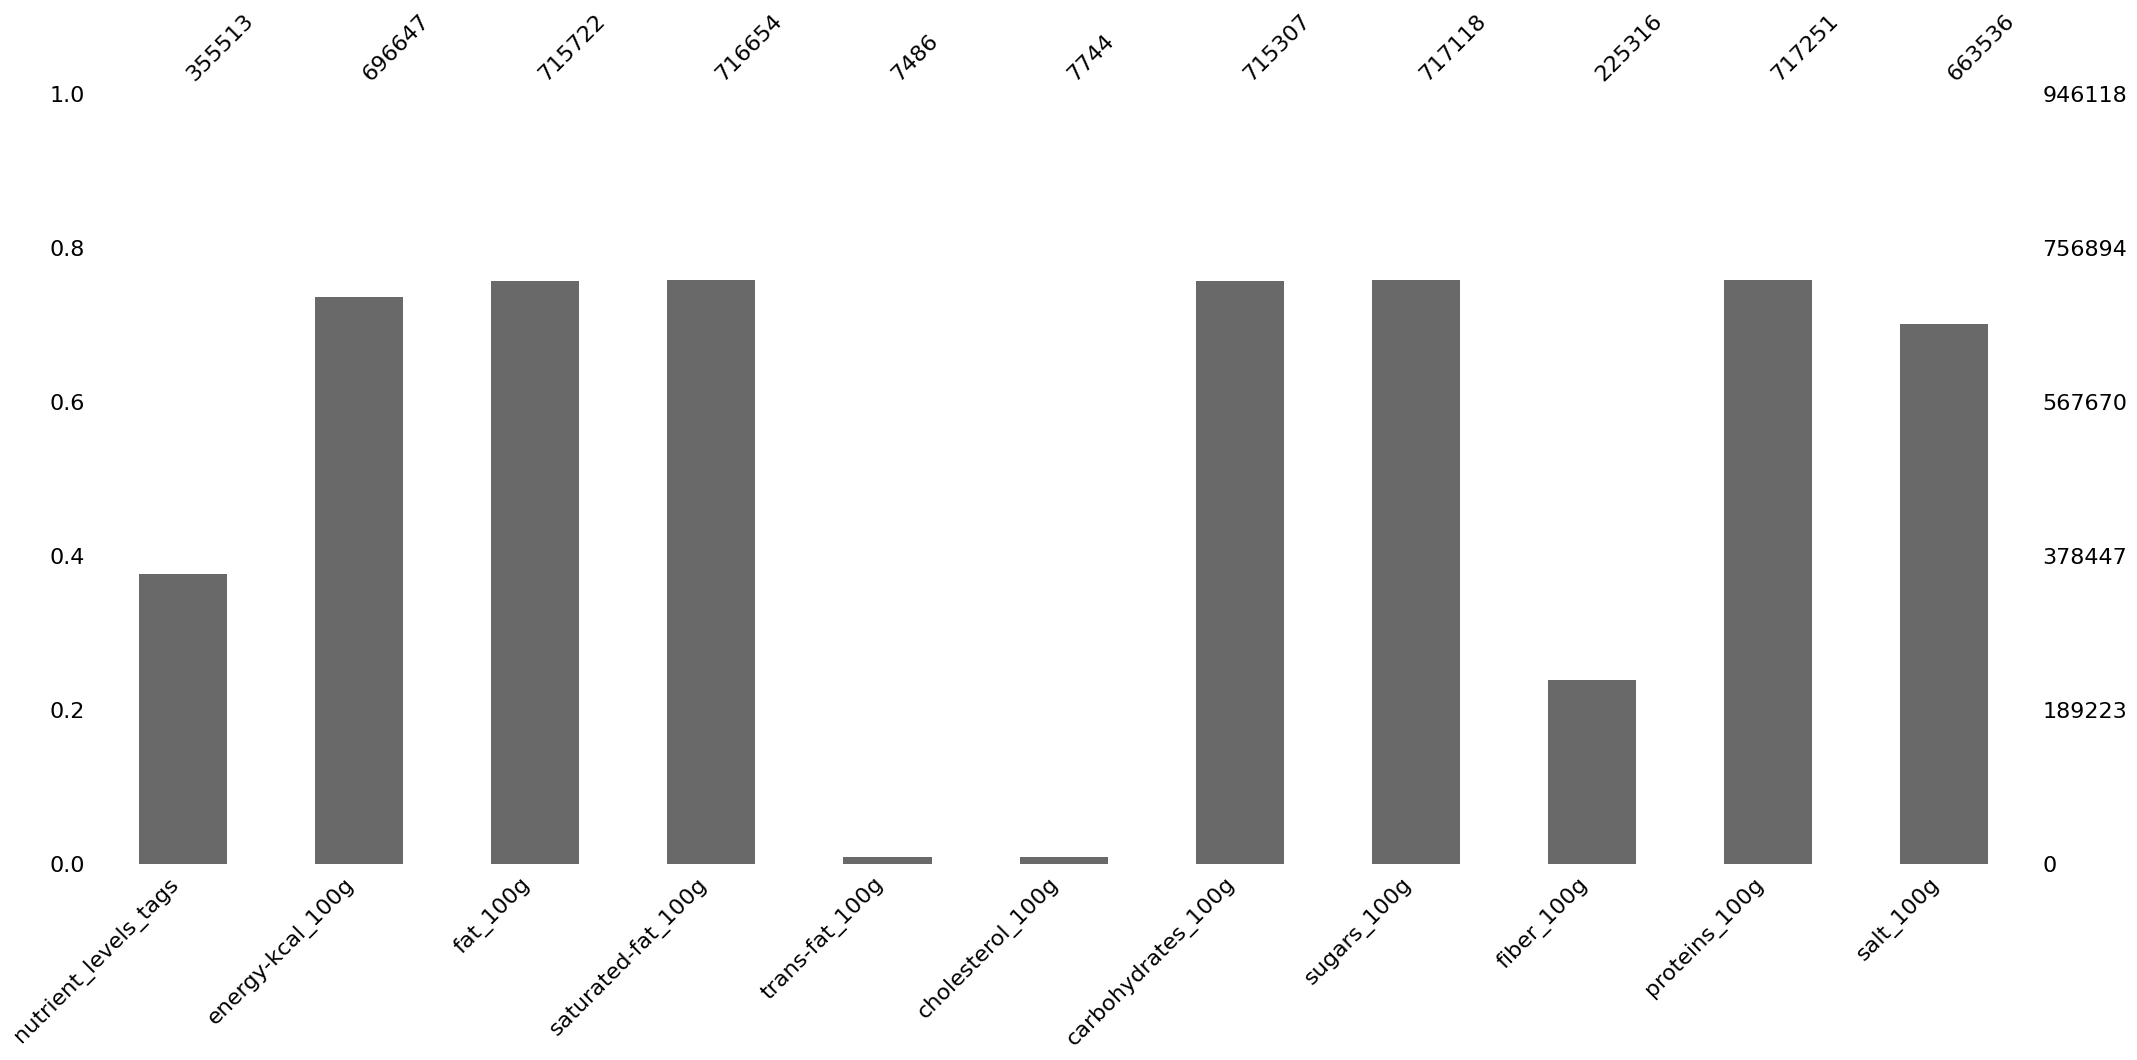

In [71]:
msno.bar(nutrients)

transfat and cholesterol will not be of use because we have almost no information, and it was not useful for the app goal.

In [102]:
nutrients_f = ['nutrient_levels_tags',
             'energy-kcal_100g',
             'fat_100g',
             'saturated-fat_100g',
             'carbohydrates_100g',
             'sugars_100g',
             'fiber_100g',
             'proteins_100g',
             'salt_100g']

nutrients = data.loc[:, nutrients_f]

In [103]:
nutrients.dtypes

nutrient_levels_tags     object
energy-kcal_100g        float64
fat_100g                float64
saturated-fat_100g      float64
carbohydrates_100g      float64
sugars_100g             float64
fiber_100g              float64
proteins_100g           float64
salt_100g               float64
dtype: object

In [74]:
# all numeric except the first one, what's inside?
top_values(nutrients, 'nutrient_levels_tags')

en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-high-quantity,en:salt-in-low-quantity                  36340
en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-low-quantity,en:salt-in-low-quantity                   25695
en:fat-in-moderate-quantity,en:saturated-fat-in-moderate-quantity,en:sugars-in-low-quantity,en:salt-in-moderate-quantity    22428
en:fat-in-high-quantity,en:saturated-fat-in-high-quantity,en:sugars-in-low-quantity,en:salt-in-high-quantity                19809
en:fat-in-high-quantity,en:saturated-fat-in-high-quantity,en:sugars-in-low-quantity,en:salt-in-moderate-quantity            19710
en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-low-quantity,en:salt-in-moderate-quantity              18994
en:fat-in-high-quantity,en:saturated-fat-in-high-quantity,en:sugars-in-high-quantity,en:salt-in-low-quantity                15033
en:fat-in-moderate-quantity,en:saturated-fat-in-moderate-quantity,en:sugars-in-low-quantit

So we could find sugars-in-low|high-quantity tags here.

In [104]:
nutrients.describe()

energy-kcal_100g      fat_100g  saturated-fat_100g  carbohydrates_100g  \
count      6.966470e+05  7.157220e+05       716654.000000       715307.000000   
mean       1.435450e+08  1.536910e+08            5.434885           26.968285   
std        1.198102e+11  1.300231e+11           14.240110           43.315795   
min       -5.300000e+01  0.000000e+00            0.000000            0.000000   
25%        1.120000e+02  1.050000e+00            0.200000            2.500000   
50%        2.610000e+02  8.000000e+00            2.000000           13.800000   
75%        3.990000e+02  2.200000e+01            7.900000           51.200000   
max        1.000000e+14  1.100000e+14         8569.000000        16908.000000   

        sugars_100g    fiber_100g  proteins_100g     salt_100g  
count  7.171180e+05  2.253160e+05   7.172510e+05  6.635360e+05  
mean   1.394471e+08  4.355339e+41   1.538861e+01  1.832777e+01  
std    1.180877e+11  2.067369e+44   5.247679e+03  1.362867e+04  
min   -1.000000e-01  0.000000e+00  -2.000000e+00  0.000000e+00  
25%    6.000000e-01  1.000000e-01   1.600000e+00  7.700000e-02  
50%    3.300000e+00  1.600000e+00   6.300000e+00  5.700000e-01  
75%    1.860000e+01  3.800000e+00   1.300000e+01  1.375000e+00  
max    1.000000e+14  9.813275e+46   4.444222e+06  1.110144e+07

There are definitely some problems here. Max should be of 100 in each column. And min can not be negative...

In [105]:
# Keeping only the numerical part of nutrients.
nutrients = nutrients.loc[:, 'energy-kcal_100g':]

In [106]:
# find negative values.
nutrients.loc[(nutrients < 0).any(axis='columns')]

energy-kcal_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
248972               NaN      30.0                21.0                 0.8   
666000             840.0     100.0                 9.0                 0.0   
683910             -53.0       NaN                 NaN                 NaN   
794794               NaN       NaN                 NaN                 NaN   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  
248972         -0.1         NaN           15.3        1.4  
666000          0.0        40.0           -2.0        0.0  
683910          NaN         NaN            NaN        NaN  
794794          NaN         NaN           -1.0        NaN

In [107]:
# find values exceeding 100g
nutrients_100g = nutrients.loc[:, 'fat_100g':]
nutrients_100g.loc[(nutrients_100g > 100).any(axis='columns')]

fat_100g  saturated-fat_100g  carbohydrates_100g   sugars_100g  \
1579    2.500000e+03         1100.000000         5300.000000  3.200000e+03   
1612    1.000000e+02                 NaN         1400.000000           NaN   
2160    5.555556e+00            0.505051           24.242424  3.030303e+00   
2819    1.000000e+02           44.300000          257.000000  1.860000e+02   
3281    2.870000e+02           25.300000           60.700000  4.130000e+01   
...              ...                 ...                 ...           ...   
943808  2.480000e+01           11.300000           68.700000  5.100000e+00   
944730  1.100000e+14                 NaN                 NaN  1.000000e+14   
944765  1.100000e+02           10.000000          110.000000  1.760000e+02   
945079  8.900000e+01           23.000000            6.000000  5.600000e+01   
945312  9.000000e+00            2.500000            0.000000  0.000000e+00   

        fiber_100g  proteins_100g   salt_100g  
1579         100.0     800.000000         NaN  
1612         600.0     700.000000         NaN  
2160           NaN       4.040404  505.050505  
2819          51.4      10.700000    0.000000  
3281           NaN      17.300000    8.000000  
...            ...            ...         ...  
943808         1.0       0.800000  820.000000  
944730         NaN            NaN         NaN  
944765      1710.0     176.000000         NaN  
945079         9.0     325.000000         NaN  
945312         0.0      17.000000  200.000000  

[395 rows x 7 columns]

In [110]:
# find values exceeding 100g
print(nutrients_100g.shape[0])
nutrients_100g = nutrients.loc[:, 'fat_100g':]
nutrients_100g.loc[(nutrients_100g > 105).any(1)]



946118


/tmp/ipykernel_46772/2635859436.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nutrients_100g.loc[(nutrients_100g > 105).any(1)]


fat_100g  saturated-fat_100g  carbohydrates_100g   sugars_100g  \
1579    2.500000e+03         1100.000000         5300.000000  3.200000e+03   
1612    1.000000e+02                 NaN         1400.000000           NaN   
2160    5.555556e+00            0.505051           24.242424  3.030303e+00   
2819    1.000000e+02           44.300000          257.000000  1.860000e+02   
3281    2.870000e+02           25.300000           60.700000  4.130000e+01   
...              ...                 ...                 ...           ...   
943808  2.480000e+01           11.300000           68.700000  5.100000e+00   
944730  1.100000e+14                 NaN                 NaN  1.000000e+14   
944765  1.100000e+02           10.000000          110.000000  1.760000e+02   
945079  8.900000e+01           23.000000            6.000000  5.600000e+01   
945312  9.000000e+00            2.500000            0.000000  0.000000e+00   

        fiber_100g  proteins_100g   salt_100g  
1579         100.0     800.000000         NaN  
1612         600.0     700.000000         NaN  
2160           NaN       4.040404  505.050505  
2819          51.4      10.700000    0.000000  
3281           NaN      17.300000    8.000000  
...            ...            ...         ...  
943808         1.0       0.800000  820.000000  
944730         NaN            NaN         NaN  
944765      1710.0     176.000000         NaN  
945079         9.0     325.000000         NaN  
945312         0.0      17.000000  200.000000  

[378 rows x 7 columns]

Not to many apparent problems considering the ratio 178/946_118.

I will clean this in a latter dataframe.

### 4.2.3.  [&#9650;](#toc0_) <a id='toc4_2_3_'></a>urls exploration.

<AxesSubplot: >

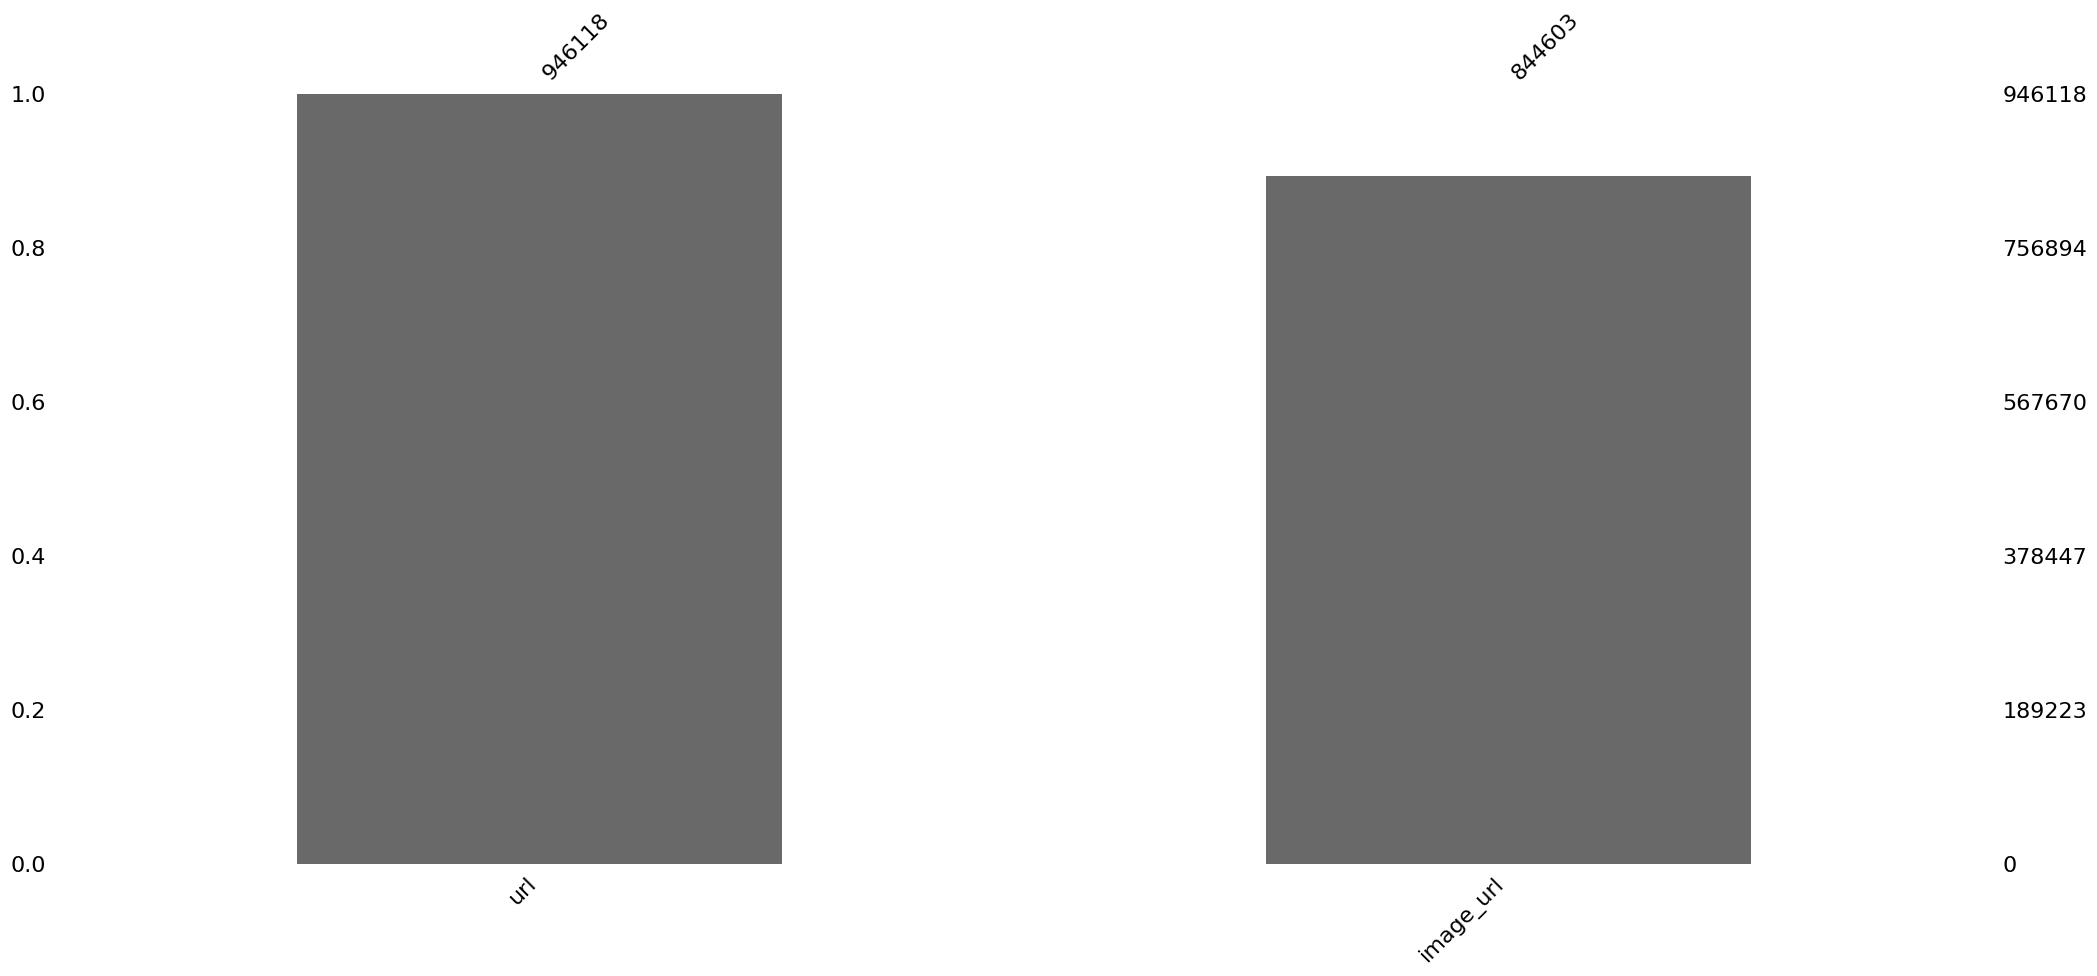

In [111]:
msno.bar(urls)

In [115]:
urls_sample = urls.sample(3)
for i, row in urls_sample.iterrows():
    print(row.values)

['http://world-en.openfoodfacts.org/product/0208928028278/pain-blanc-ble-t65'
 'https://images.openfoodfacts.org/images/products/020/892/802/8278/front_fr.4.400.jpg']
['http://world-en.openfoodfacts.org/product/3770013524172/risotto-curry-et-lait-de-coco-2-pers'
 'https://images.openfoodfacts.org/images/products/377/001/352/4172/front_fr.3.400.jpg']
['http://world-en.openfoodfacts.org/product/8009280002577/saltelli-grissini-integrali'
 'https://images.openfoodfacts.org/images/products/800/928/000/2577/front_it.3.400.jpg']


On those 3 examples, I checked if photos were the same on both urls. And It was. Nevertheless there are more missing image_url. Let's watch what happens in that case.

In [117]:
no_image = urls.loc[urls.image_url.isnull()]
for i, row in no_image.sample(5).iterrows():
    print(row.values)

['http://world-en.openfoodfacts.org/product/0567527009218/creme-fraiche-epaisse-marque-repere-bio-village'
 nan]
['http://world-en.openfoodfacts.org/product/5900857011080/smaragd-26' nan]
['http://world-en.openfoodfacts.org/product/13251212512000261886/kiwi-jaune-cal-33-cat-2-france-bio-x1'
 nan]
['http://world-en.openfoodfacts.org/product/3546691779780/dark-chocolate-nuts-sea-salt-kind-thins'
 nan]
['http://world-en.openfoodfacts.org/product/4901335006087/koikeya-original-premium-japanese-potato-chips-teriyaki'
 nan]


In [119]:
urls.image_url.notnull().mean()

0.8927036585288516

We can conclude that it is likely to find pictures for almost 90 % of the products. I will keep only the image_url for the app designer.

## 4.3.  [&#9650;](#toc0_) <a id='toc4_3_'></a>Exploration features3.txt



In [4]:
countries = pd.read_csv('./csv_files/data.csv.gz',
                        compression='gzip',
                        sep='\t',
                        usecols=['countries_tags'])

# Searching for products sold in France.
fr = countries.loc[countries.countries_tags
                   .str.contains('france', case=False, na=False), :]

print(f"There are {len(fr)} products sold in France in the database.")

# Rows containing irrelevant information for french customers.
rows_to_skip =  [n 
                 for n in range(countries.shape[0])
                 if n not in fr.index]

with open('./features3.txt', 'r') as fin:
    features = [feat.strip('- \n') for feat in fin]
print(features)

There are 946118 products sold in France in the database.
['creator', 'created_t', 'last_modified_t', 'cities_tags', 'purchase_places', 'stores', 'states_tags']


In [5]:
data = pd.read_csv('./csv_files/data.csv.gz',
                   compression='gzip',
                   sep='\t',
                   usecols=features,
                   skiprows=rows_to_skip)

/tmp/ipykernel_4585/1373838388.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./csv_files/data.csv',


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946118 entries, 0 to 946117
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   creator          946116 non-null  object
 1   created_t        946118 non-null  int64 
 2   last_modified_t  946118 non-null  int64 
 3   cities_tags      79676 non-null   object
 4   purchase_places  100980 non-null  object
 5   stores           176043 non-null  object
 6   states_tags      946118 non-null  object
dtypes: int64(2), object(5)
memory usage: 50.5+ MB


<AxesSubplot: >

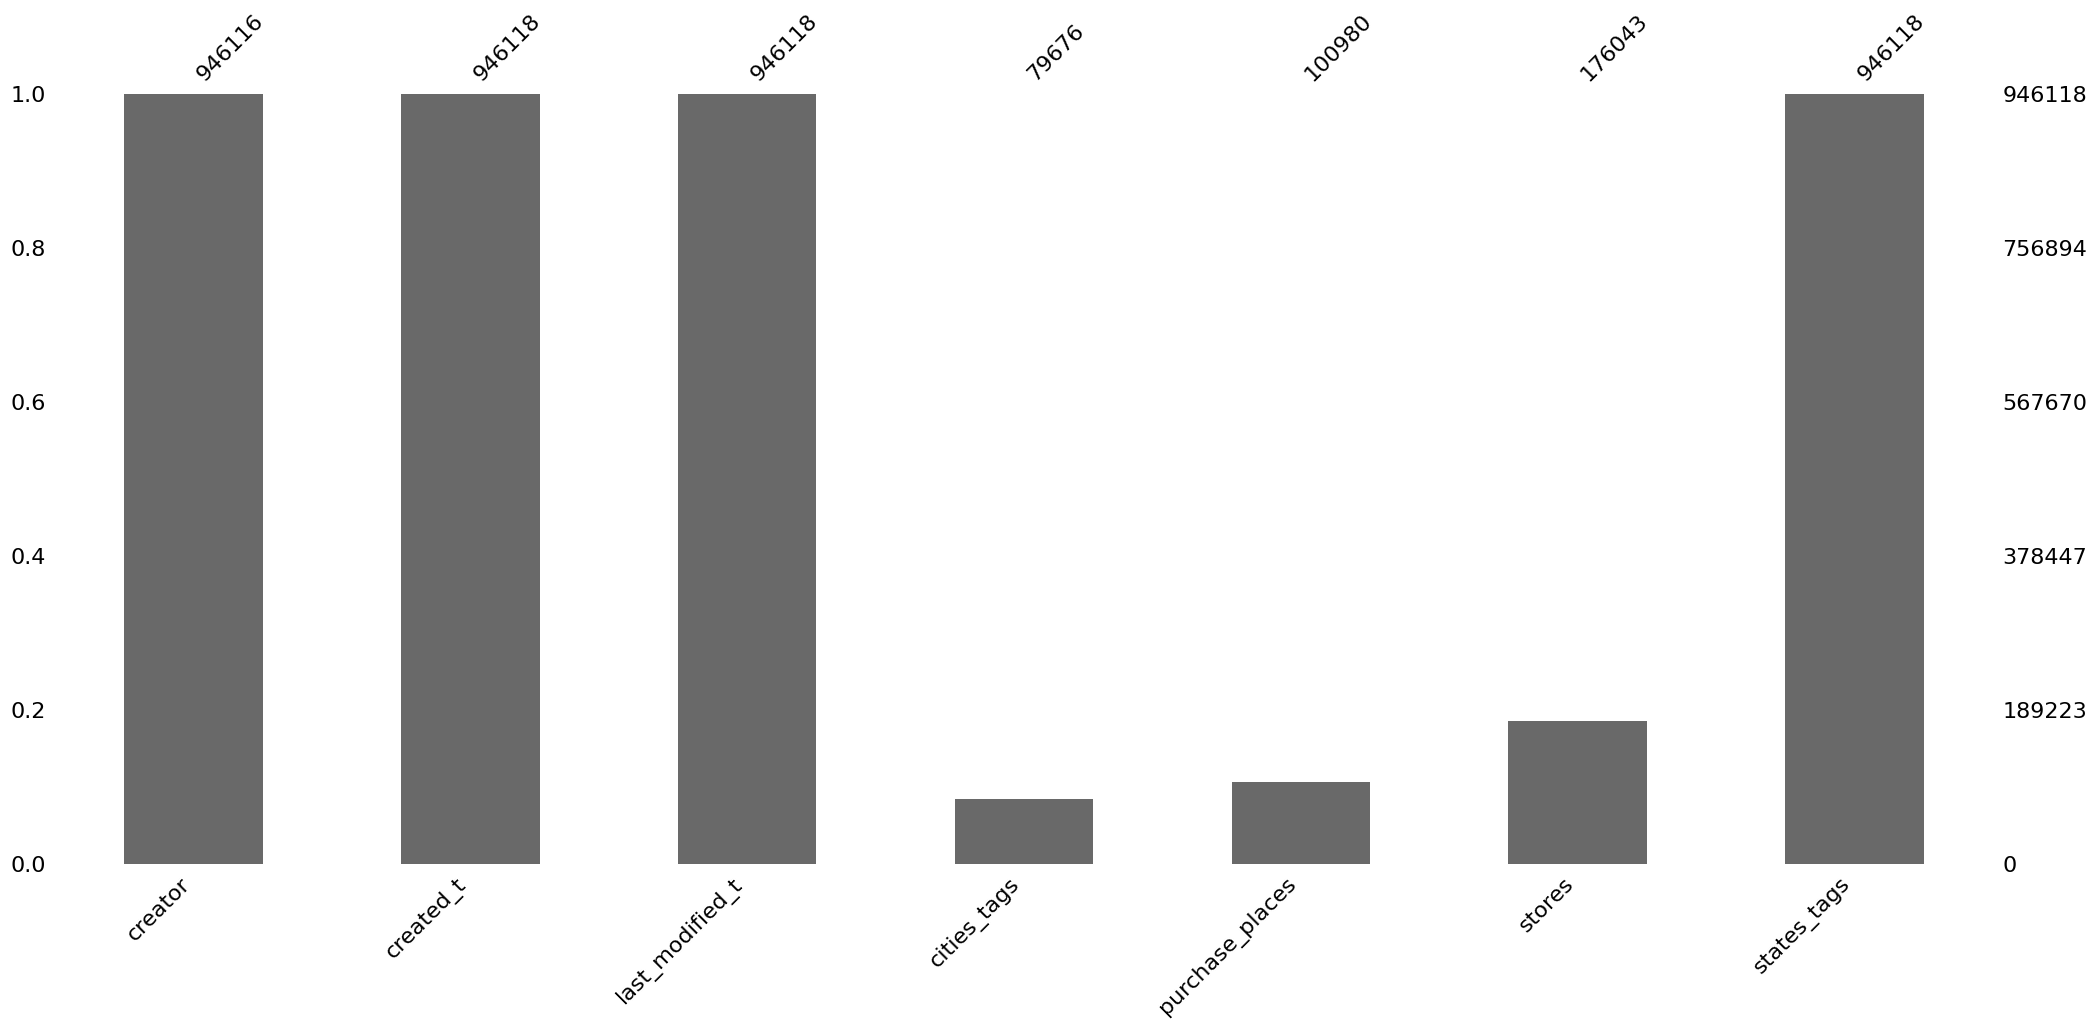

In [124]:
msno.bar(data)

------------------------------
CREATOR :
percentage of data : 99.99978860987741 %
kiliweb                       683819
openfoodfacts-contributors     86798
foodvisor                      20047
date-limite-app                13399
nutrinet-sante                  9676
tacite                          7471
sebleouf                        7442
prepperapp                      6508
elcoco                          5579
usda-ndb-import                 4586
Name: creator, dtype: int64


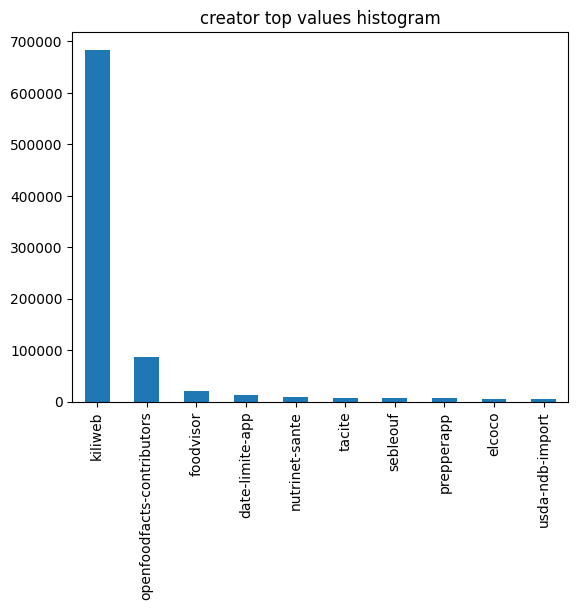


------------------------------
CREATED_T :
percentage of data : 100.0 %
1621521960    18
1621521959    18
1621521958    18
1552319300    18
1621521961    18
1621521956    17
1621521963    17
1621521957    16
1621521962    15
1621412998    14
Name: created_t, dtype: int64


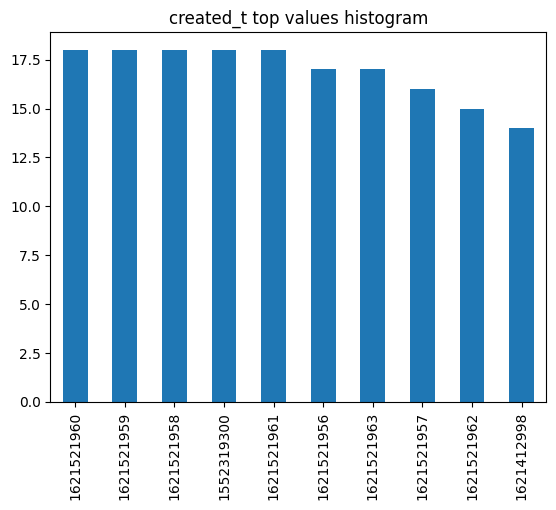


------------------------------
LAST_MODIFIED_T :
percentage of data : 100.0 %
1626000238    112
1671619856    107
1619867762    103
1616577587    102
1626000239    101
1619868555     97
1630147781     97
1616577586     96
1619867761     96
1619874712     95
Name: last_modified_t, dtype: int64


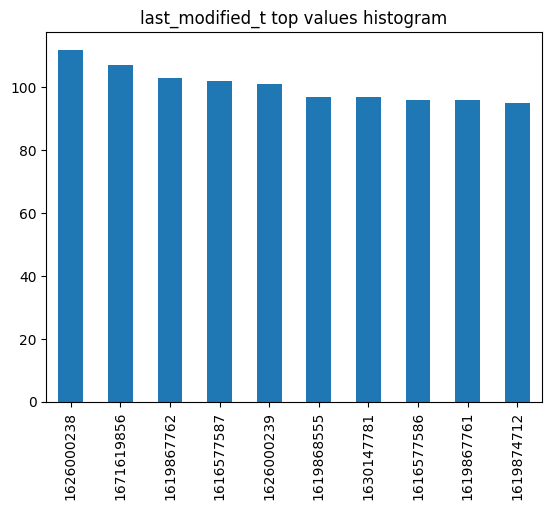


------------------------------
CITIES_TAGS :
percentage of data : 8.421359703546493 %
sable-sur-sarthe-sarthe-france           999
theix-morbihan-france                    531
corbas-rhone-france                      464
saint-evarzec-finistere-france           455
nueil-les-aubiers-deux-sevres-france     428
kervignac-morbihan-france                421
chateaubourg-ille-et-vilaine-france      398
villers-bocage-calvados-france           392
boulogne-sur-mer-pas-de-calais-france    375
douarnenez-finistere-france              372
Name: cities_tags, dtype: int64


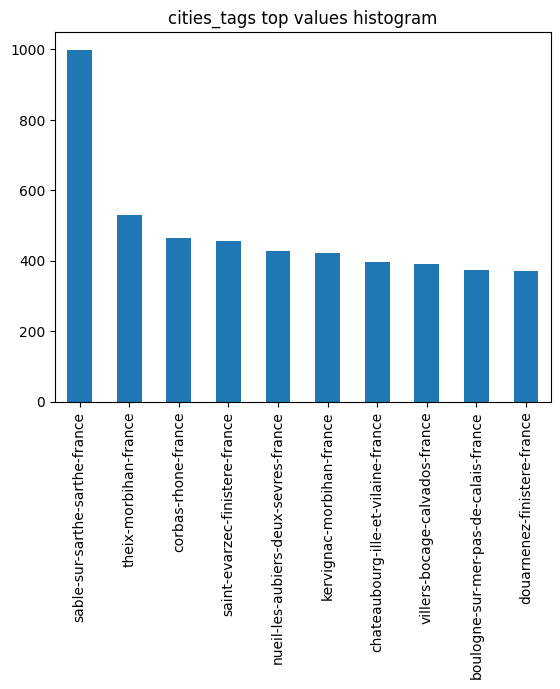


------------------------------
PURCHASE_PLACES :
percentage of data : 10.673087289323318 %
France               40375
Lyon,France           3088
Courrières,France     2222
France,Nantes         2206
Deutschland           2173
Paris,France          1945
Rennes,France         1015
España                1001
France,Trignac         936
Belgique               877
Name: purchase_places, dtype: int64


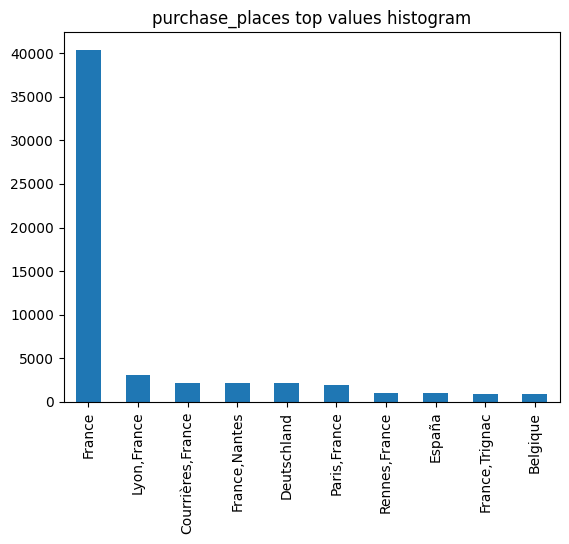


------------------------------
STORES :
percentage of data : 18.606875675127206 %
Auchan          15961
Carrefour       14121
Leclerc         10563
Magasins U       9704
carrefour.fr     7215
Casino           6660
Lidl             6276
Intermarché      5692
Monoprix         5311
Leader Price     4297
Name: stores, dtype: int64


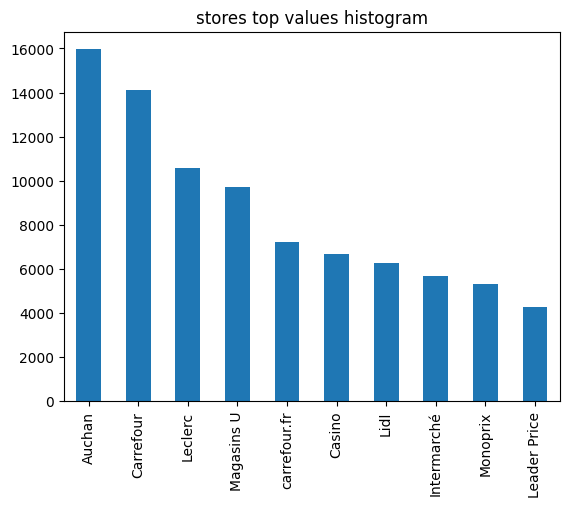


------------------------------
STATES_TAGS :
percentage of data : 100.0 %
en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:origins-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:packaging-photo-to-be-selected,en:nutrition-photo-selected,en:ingredients-photo-to-be-selected,en:front-photo-selected,en:photos-uploaded                119412
en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:origins-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:pac

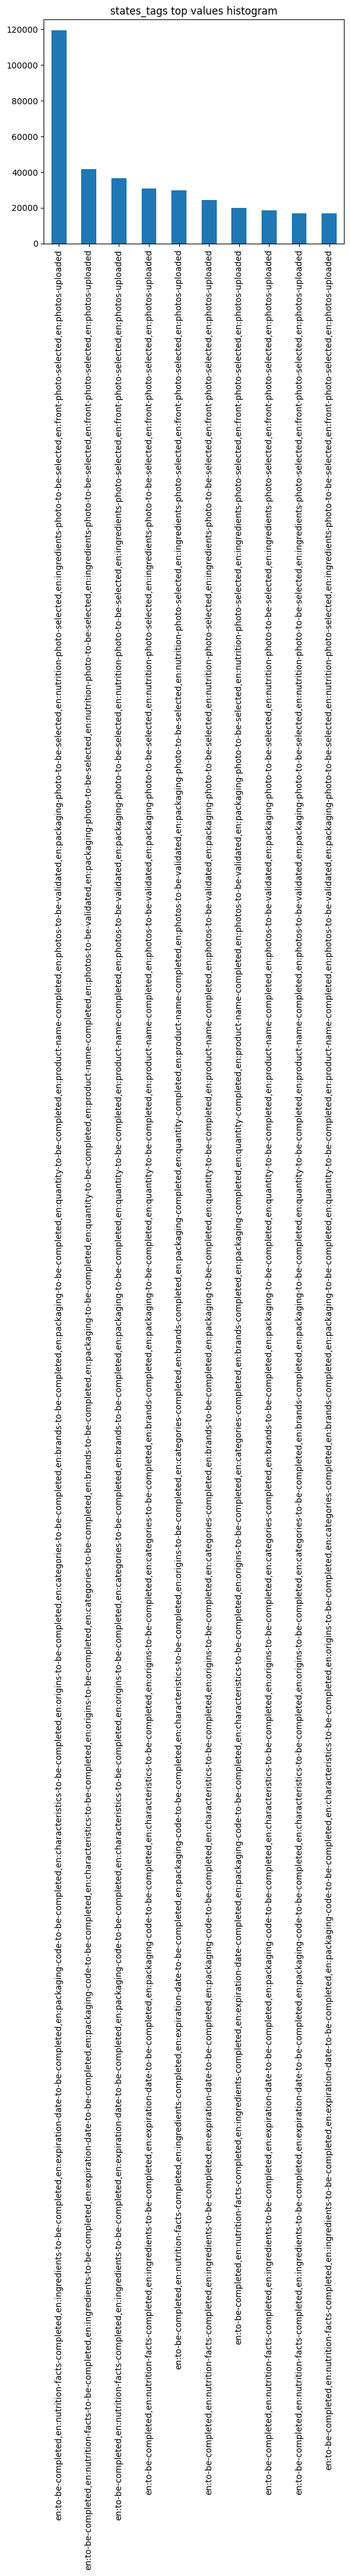

In [123]:
for feat in features:
    print('-'*30)
    print(feat.upper() +' :')
    print(f"percentage of data : {data[feat].notnull().mean()*100} %")
    top = top_values(data, feat)
    print(top)
    top.plot(kind='bar')
    plt.title(f"{feat} top values histogram")
    plt.show()    
    print('')

Stores can be interesting regarding the application (quite a lot of products are known from each important retailers.)

states_tags can be interesting : it tells what is to be done or if a product is fully filled.



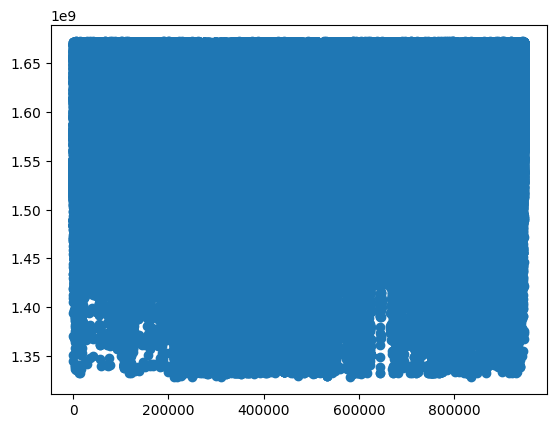

In [10]:
x = range(len(data))
y = data.created_t.values
plt.scatter(x,y)

In [14]:
data.created_t.tail(10)

946108    1621104909
946109    1644074322
946110    1587209487
946111    1659690408
946112    1648705473
946113    1577002381
946114    1572513866
946115    1666599417
946116    1613129728
946117    1587222660
Name: created_t, dtype: int64

In [15]:
data.last_modified_t.tail(10)

946108    1621104926
946109    1644074323
946110    1591133605
946111    1659690413
946112    1650818279
946113    1644568867
946114    1572513866
946115    1666599418
946116    1660330421
946117    1605558295
Name: last_modified_t, dtype: int64

### 4.3.1.  [&#9650;](#toc0_) <a id='toc4_3_1_'></a>Comments
So, the products are not ordered by creation time, neither by last modification time. No smart way to process only the last added elements when the database is updated. At least, via this prism.

# 5.  [&#9650;](#toc0_) <a id='toc5_'></a>Building a dataframe to begin the cleaning process.

## 5.1.  [&#9650;](#toc0_) <a id='toc5_1_'></a>Features selection (features4.txt)

In [119]:
with open('./features4.txt', 'r') as fin:
    features = [feat.strip('\n') for feat in fin]
print(features)

['code', 'product_name', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'nutriscore_score', 'nutriscore_grade', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'image_url', 'stores', 'quantity', 'serving_size', 'serving_quantity', 'labels_tags', 'nutrient_levels_tags', 'creator', 'data_quality_errors_tags']


In [120]:
len(features)

24

In [121]:
data = pd.read_csv('./csv_files/data.csv.gz',
                   compression='gzip',
                   sep='\t',
                   usecols=features,
                   skiprows=rows_to_skip,
                   dtype={'code': 'object'})

In [122]:
data.head(2)

code  creator product_name quantity labels_tags stores  \
0  00000000000003429145  kiliweb      L.casei      NaN         NaN    NaN   
1  00000000000026772226  kiliweb         Skyr    480 g         NaN    NaN   

  serving_size  serving_quantity  nutriscore_score nutriscore_grade  ...  \
0          NaN               NaN               NaN              NaN  ...   
1          NaN               NaN              -5.0                a  ...   

      main_category                                          image_url  \
0               NaN  https://images.openfoodfacts.org/images/produc...   
1  en:cream-cheeses  https://images.openfoodfacts.org/images/produc...   

  energy-kcal_100g fat_100g saturated-fat_100g carbohydrates_100g  \
0              NaN      1.4                0.9                9.8   
1             57.0      0.2                0.1                3.9   

   sugars_100g  fiber_100g  proteins_100g  salt_100g  
0          9.8         NaN            2.7       0.10  
1          3.9         NaN           10.0       0.09  

[2 rows x 24 columns]

In [123]:
# data.to_csv('./csv_files/fr_data.csv.gz',
#             index=False,
#             sep='\t',
#             compression='gzip')

In [158]:
data = pd.read_csv('./csv_files/fr_data.csv.gz',
                   compression='gzip',
                   sep='\t',
                   dtype={'code': 'object'})

In [159]:
data.shape

(946118, 24)

## 5.2.  [&#9650;](#toc0_) <a id='toc5_2_'></a>Handling duplicates on 'code' which should be a unique identifier.

In [160]:
# Creating a df of duplicated based on 'code' which should be unique.
dup = data.loc[data.duplicated('code',keep=False)].copy()
dup.head(10)


code                     creator  \
197045   2700963001059                     kiliweb   
197046   2700963001059                     kiliweb   
220907   3033610080541                     kiliweb   
220908   3033610080541                     kiliweb   
222315  30383354190402  openfoodfacts-contributors   
222316  30383354190402  openfoodfacts-contributors   
240630   3108004000006  openfoodfacts-contributors   
240631   3108004000006  openfoodfacts-contributors   
261958  31843340000818  openfoodfacts-contributors   
261959  31843340000818  openfoodfacts-contributors   

                            product_name quantity  \
197045                    Jardin anglais    105 g   
197046                    Jardin anglais    105 g   
220907  Saupon fumé sauvage du pacifique      NaN   
220908  Saumon fumé sauvage du Pacifique     110g   
222315                           basilic    210 g   
222316                           basilic    210 g   
240630                               NaN      NaN   
240631                               NaN    110 g   
261958              poudre à lever Pural      21g   
261959              poudre à lever Pural      21g   

                                labels_tags   stores serving_size  \
197045                                  NaN      NaN          NaN   
197046                                  NaN      NaN          NaN   
220907                                  NaN      NaN          NaN   
220908                                  NaN      NaN          NaN   
222315  en:nutriscore,en:nutriscore-grade-a      NaN          NaN   
222316  en:nutriscore,en:nutriscore-grade-a      NaN          NaN   
240630                                  NaN      NaN          NaN   
240631                                  NaN      NaN          NaN   
261958                                  NaN  biocoop          NaN   
261959                                  NaN  biocoop          NaN   

        serving_quantity  nutriscore_score nutriscore_grade  ...  \
197045               NaN               NaN              NaN  ...   
197046               NaN               NaN              NaN  ...   
220907               NaN               NaN              NaN  ...   
220908               NaN              11.0                d  ...   
222315               NaN               2.0                b  ...   
222316               NaN              -3.0                a  ...   
240630               NaN               NaN              NaN  ...   
240631               NaN               NaN              NaN  ...   
261958               NaN               NaN              NaN  ...   
261959               NaN               NaN              NaN  ...   

                              main_category  \
197045                                  NaN   
197046                                  NaN   
220907                                  NaN   
220908  en:saumon-fume-sauvage-du-pacifique   
222315                     en:tomato-sauces   
222316                         en:groceries   
240630                                  NaN   
240631                      en:goat-cheeses   
261958                   fr:poudres-a-lever   
261959                   fr:poudres-a-lever   

                                                image_url energy-kcal_100g  \
197045  https://images.openfoodfacts.org/images/produc...              1.0   
197046  https://images.openfoodfacts.org/images/produc...              1.0   
220907  https://images.openfoodfacts.org/images/produc...            123.0   
220908  https://images.openfoodfacts.org/images/produc...            123.0   
222315  https://images.openfoodfacts.org/images/produc...             63.0   
222316  https://images.openfoodfacts.org/images/produc...             63.0   
240630                                                NaN              NaN   
240631  https://images.openfoodfacts.org/images/produc...              NaN   
261958  https://images.openfoodfacts.org/images/produc...              NaN   
261959  https://images.openfoodf

In [161]:
# Counting non-NaN-fields in dup and adding a column with that number
dup.loc[:, 'n'] = dup.count(axis='columns')

# I sort duplicates according to their filling rate.
dup = dup.sort_values(['code','n'])

# Here, globally more info is in last position,
# But it can be possible that one piece of information
# is in the first row and not in the second one.
# So, I groupby 'code' and ffill to propagate that info
# in the last position if the second row is empty and not the first.
# Then I pick up the last value.
dupg = dup.groupby('code').agg(lambda x: x.ffill().iloc[-1])
dupg = dupg.reset_index()

# Dropping those duplicates from the main data
data.drop_duplicates('code', keep=False, inplace=True)

# Adding those retained values to the initial data set.
df = pd.concat([data, dupg], ignore_index=True, axis='rows')
data = df.drop('n', axis=1)

data.tail(20)


code                     creator  \
946084    9999999000041                     kiliweb   
946085    9999999175305                         sil   
946086    9999999910128                     kiliweb   
946087       9999999999                  prepperapp   
946088    9999999999994                     kiliweb   
946089  999999999999999  openfoodfacts-contributors   
946090    2700963001059                     kiliweb   
946091    3033610080541                     kiliweb   
946092   30383354190402  openfoodfacts-contributors   
946093    3108004000006  openfoodfacts-contributors   
946094   31843340000818  openfoodfacts-contributors   
946095    3477610001135  openfoodfacts-contributors   
946096    3560070278831  openfoodfacts-contributors   
946097    3564700673683                     kiliweb   
946098    3700320230572                     kiliweb   
946099    3700439700348  openfoodfacts-contributors   
946100    3760331890198                     kiliweb   
946101    3770008983205                         r-x   
946102    6703501220017                     kiliweb   
946103    8413808001759                     kiliweb   

                                     product_name  quantity  \
946084                       Lenticchie di Ustica       NaN   
946085           Erdbeerkuchen 1019g tiefgefroren  1,019 kg   
946086     Sandwich club Rillette poisson combava       NaN   
946087                            Duschgel - Iris       NaN   
946088                  Light & Free SKYR A BOIRE       NaN   
946089                          Signal Toothpaste       NaN   
946090                             Jardin anglais     105 g   
946091           Saumon fumé sauvage du Pacifique      110g   
946092                                    basilic     210 g   
946093                                        NaN     110 g   
946094                       poudre à lever Pural       21g   
946095                      pâte en croûte  halal   0.500kg   
946096  Pamplemousse rose, 100 % Pur Fruit Pressé       1 l   
946097                            Rosé de Fronton       NaN   
946098                glace artisanale corse coco     450 g   
946099                                        NaN     270 g   
946100                  Confiture de reine-claude       NaN   
946101                      REMYX VODKA Aquatique     70 cl   
946102                                 Farine T45      1 kg   
946103                               Sésame blanc       NaN   

                                              labels_tags  \
946084                           en:organic,en:eu-organic   
946085                                 en:made-in-germany   
946086                                                NaN   
946087                                                NaN   
946088                                                NaN   
946089                                                NaN   
946090                                                NaN   
946091                                                NaN   
946092                en:nutriscore,en:nutriscore-grade-a   
946093                                                NaN   
946094                                                NaN   
946095                                           en:halal   
946096  en:distributor-labels,en:carrefour-quality,en:...   
946097                                                NaN   
946098                                                NaN   
946099                                             en:pdo   
946100              en:organic,en:eu-organic,en:fr-bio-15   
946101                                                NaN   
946102                                                NaN   
946103                                                NaN   

                         stores serving_size  serving_quantity  \
946084                      NaN          NaN               NaN   
946085                      NaN          NaN               NaN   
946086                      NaN          NaN               

In [162]:
# verifying 14 duplicates where dropped.
data.shape

(946104, 24)

In [163]:
data.head(10)

code  creator                  product_name quantity  \
0  00000000000003429145  kiliweb                       L.casei      NaN   
1  00000000000026772226  kiliweb                          Skyr    480 g   
2         0000000000017  kiliweb              Vitória crackers      NaN   
3           00000000001      inf                     hyde icon      NaN   
4         0000000000100    del51   moutarde au moût de raisin      100g   
5         0000000000123  kiliweb         Sauce Sweety chili 0%      NaN   
6         0000000000178  kiliweb                     Mini coco      NaN   
7         0000000000208  kiliweb         Pistou d'ail des ours      NaN   
8         0000000000284  kiliweb                     Pain maïs      NaN   
9         0000000000291  kiliweb                     Mendiants      NaN   

        labels_tags         stores serving_size  serving_quantity  \
0               NaN            NaN          NaN               NaN   
1               NaN            NaN          NaN               NaN   
2               NaN            NaN          NaN               NaN   
3               NaN            NaN          NaN               NaN   
4  fr:delois-france  courte paille          NaN               NaN   
5               NaN            NaN          NaN               NaN   
6               NaN            NaN          NaN               NaN   
7               NaN            NaN          NaN               NaN   
8               NaN            NaN          NaN               NaN   
9               NaN            NaN          NaN               NaN   

   nutriscore_score nutriscore_grade  ...     main_category  \
0               NaN              NaN  ...               NaN   
1              -5.0                a  ...  en:cream-cheeses   
2               NaN              NaN  ...               NaN   
3               NaN              NaN  ...               NaN   
4              18.0                d  ...      en:groceries   
5               NaN              NaN  ...               NaN   
6               NaN              NaN  ...               NaN   
7               NaN              NaN  ...               NaN   
8               NaN              NaN  ...               NaN   
9               NaN              NaN  ...               NaN   

                                           image_url energy-kcal_100g  \
0  https://images.openfoodfacts.org/images/produc...              NaN   
1  https://images.openfoodfacts.org/images/produc...             57.0   
2  https://images.openfoodfacts.org/images/produc...            375.0   
3                                                NaN              NaN   
4  https://images.openfoodfacts.org/images/produc...              NaN   
5  https://images.openfoodfacts.org/images/produc...             21.0   
6  https://images.openfoodfacts.org/images/produc...             60.0   
7  https://images.openfoodfacts.org/images/produc...              NaN   
8  https://images.openfoodfacts.org/images/produc...              NaN   
9  https://images.openfoodfacts.org/images/produc...              NaN   

  fat_100g saturated-fat_100g carbohydrates_100g  sugars_100g  fiber_100g  \
0      1.4               0.90                9.8          9.8         NaN   
1      0.2               0.10                3.9          3.9         NaN   
2      7.0               3.08               70.1         15.0         NaN   
3      NaN                NaN                NaN          NaN         NaN   
4      8.2               2.20               29.0         22.0         0.0   
5      0.0               0.00                4.8          0.4         NaN   
6      3.0               1.00               10.0          3.0         NaN   
7      NaN                NaN                NaN          NaN         NaN   
8      NaN                NaN                NaN          NaN         NaN   
9      NaN                NaN                NaN          NaN         NaN   

   proteins_100g  salt_100g  
0            2.7       0.10  
1           10.0       0.09

<AxesSubplot: >

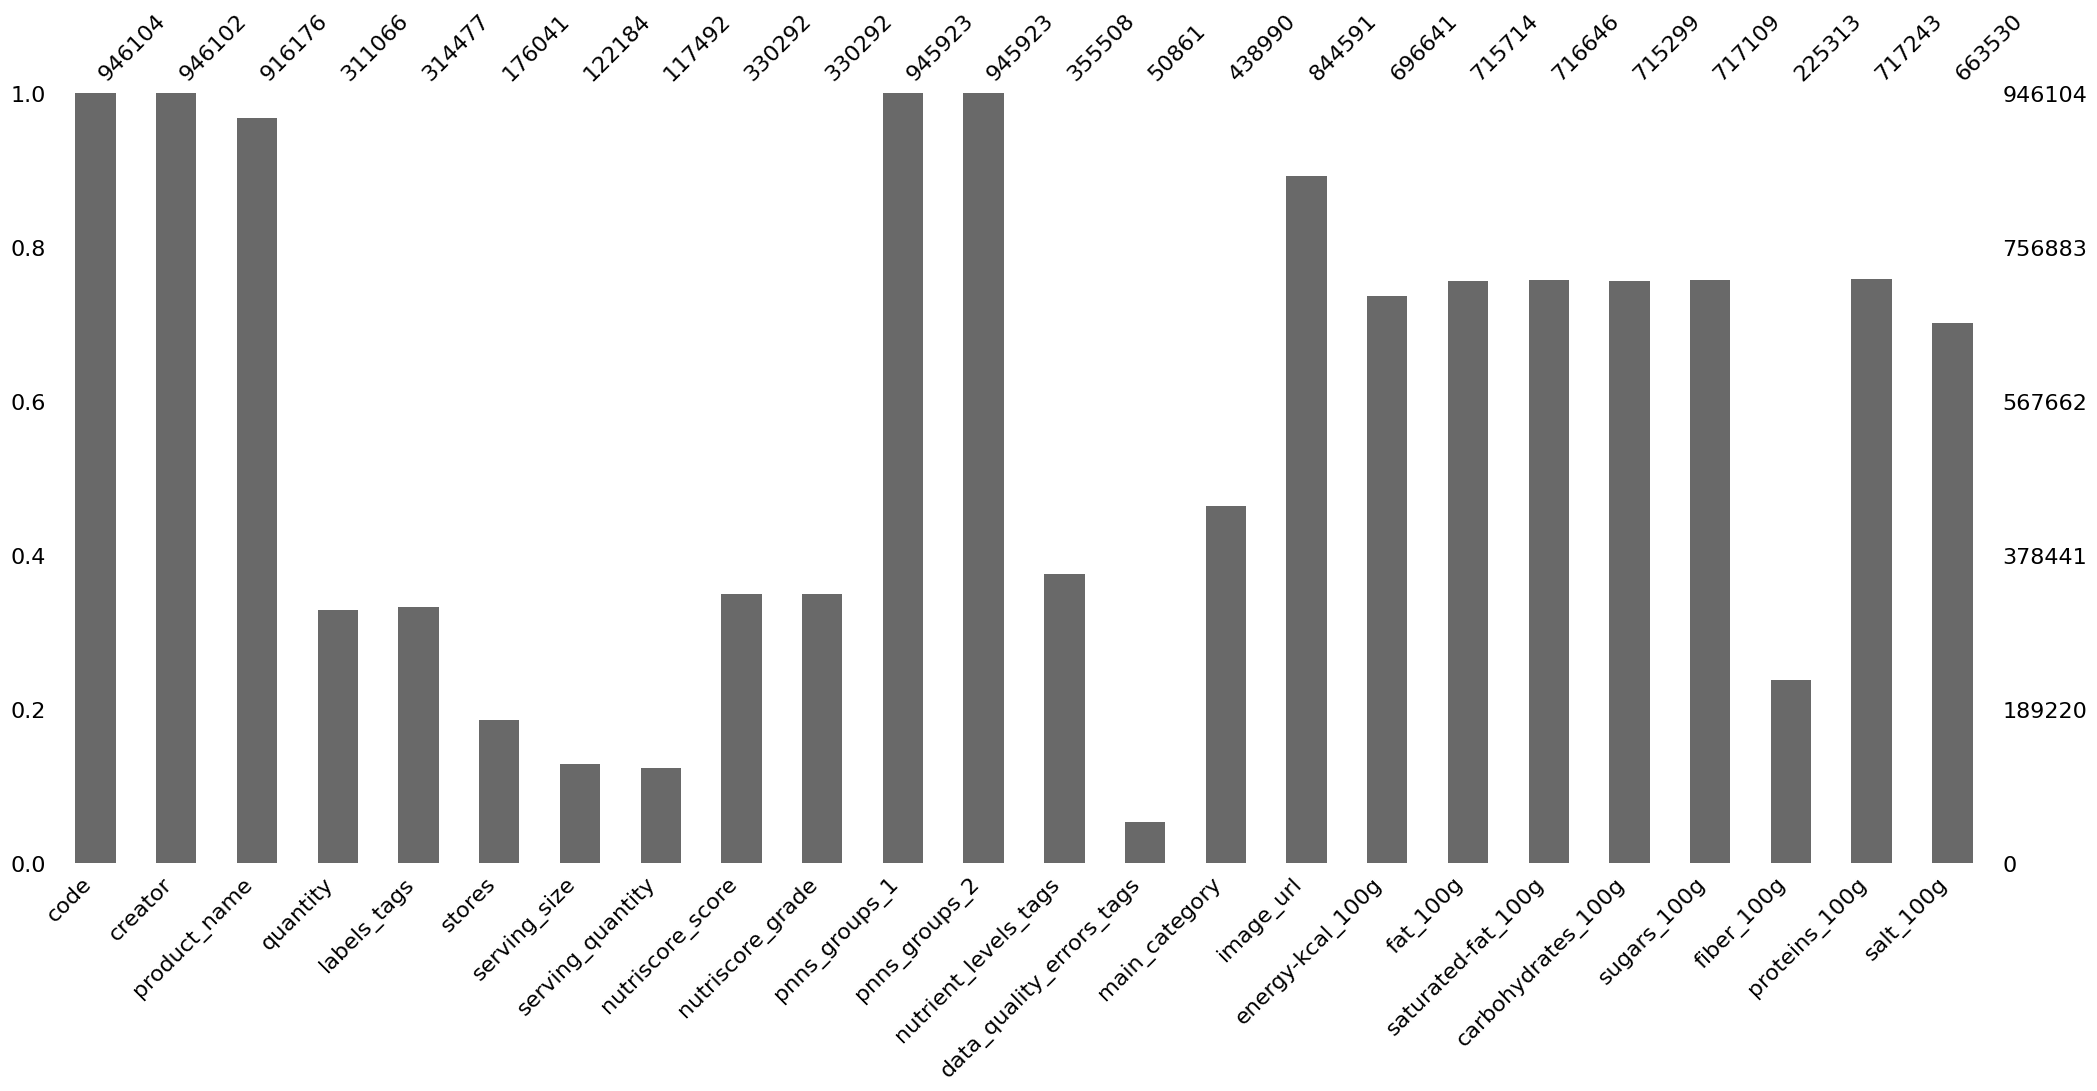

In [164]:
msno.bar(data)

In [165]:
data.dtypes

code                         object
creator                      object
product_name                 object
quantity                     object
labels_tags                  object
stores                       object
serving_size                 object
serving_quantity            float64
nutriscore_score            float64
nutriscore_grade             object
pnns_groups_1                object
pnns_groups_2                object
nutrient_levels_tags         object
data_quality_errors_tags     object
main_category                object
image_url                    object
energy-kcal_100g            float64
fat_100g                    float64
saturated-fat_100g          float64
carbohydrates_100g          float64
sugars_100g                 float64
fiber_100g                  float64
proteins_100g               float64
salt_100g                   float64
dtype: object

To pursue the cleaning process, it has to serve my goals, which is to tell if the sugar quantity is high or not compared to similar products.
I need to work on:
- sugars_100g
- classification (using pnns groups and main_category)

I'm going to work on the 'nutrients' dataframe to try to find inconsistency in values and judge if the product information seem reliable or not. 

What is to be checked :
- any value can not be negative.
- any value can not be greater than 100.
- sugars <= carbohydrates.
- saturated_fat <= fat.
- fat + sugar + fiber + proteins + salt <= 100.


## 5.3.  [&#9650;](#toc0_) <a id='toc5_3_'></a>Searching for products with nutrients inconsistency

### 5.3.1.  [&#9650;](#toc0_) <a id='toc5_3_1_'></a>First implementation (slow)

In [166]:
def are_nutrients_inconsistent(vals: pd.Series) -> bool:
    """ Check nutrients consistency :
        - any value can not be strictly negative.
        - any value can not be strictly greater than 100.
        - sugars <= carbohydrates.
        - saturated_fat <= fat.
        - fat + sugar + fiber + proteins + salt <= 100.
        
        Return True if at least one condition is not satisfied,
        False otherwise.  
        
        Due to rounding, we allow the sum to reach 101g.
    """
    return ((vals < 0).any() 
            | (vals > 100).any()
            | (vals.loc['carbohydrates_100g'] < vals.loc['sugars_100g'])
            | (vals.loc['fat_100g'] < vals.loc['saturated-fat_100g'])
            | ((vals.sum() - vals.loc['sugars_100g'] - vals.loc['saturated-fat_100g']) > 101) 
            )

In [167]:
nutrients_f = ['fat_100g',
               'saturated-fat_100g',
               'carbohydrates_100g',
               'sugars_100g',
               'fiber_100g',
               'proteins_100g',
               'salt_100g']

In [168]:
nutrients = data.loc[:, nutrients_f]

In [169]:
nutrients.iloc[0, :]

fat_100g              1.4
saturated-fat_100g    0.9
carbohydrates_100g    9.8
sugars_100g           9.8
fiber_100g            NaN
proteins_100g         2.7
salt_100g             0.1
Name: 0, dtype: float64

In [170]:
are_nutrients_inconsistent(nutrients.iloc[0, :])

False

In [171]:
are_nutrients_inconsistent(nutrients.loc[(nutrients < 0).any(1)].iloc[0, :])

/tmp/ipykernel_13506/1030416818.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  are_nutrients_inconsistent(nutrients.loc[(nutrients < 0).any(1)].iloc[0, :])


True

In [172]:
# Testing on more data
vals = [[5, 5, 5, 5, 5, 5, 5],
        [20, 20, 20, 20, 20, 20, 20],
        [80, 40, 10, 10, 10, 10, 10],
        [10, 15, 0, 0, 0, 0, 0,],
        [10, 10, 15, 20, 0, 0, 0],
        [47.5, 6.5, 13.8, 4.1, 7.7, 26.9, 0.83],
        [4, 4, 4, 4, 124, 4, 4],
        [5, 6, -5, 0, 0, 0, 0]]


test = pd.DataFrame(vals, columns=nutrients_f)
test

fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0       5.0                 5.0                 5.0          5.0         5.0   
1      20.0                20.0                20.0         20.0        20.0   
2      80.0                40.0                10.0         10.0        10.0   
3      10.0                15.0                 0.0          0.0         0.0   
4      10.0                10.0                15.0         20.0         0.0   
5      47.5                 6.5                13.8          4.1         7.7   
6       4.0                 4.0                 4.0          4.0       124.0   
7       5.0                 6.0                -5.0          0.0         0.0   

   proteins_100g  salt_100g  
0            5.0       5.00  
1           20.0      20.00  
2           10.0      10.00  
3            0.0       0.00  
4            0.0       0.00  
5           26.9       0.83  
6            4.0       4.00  
7            0.0       0.00

In [173]:
flag = test.apply(are_nutrients_inconsistent, axis=1)

In [174]:
flag

0    False
1    False
2     True
3     True
4     True
5    False
6     True
7     True
dtype: bool

In [175]:
# # Finding all products in data with nutrients inconsistency
# data.loc[nutrients.apply(are_nutrients_inconsistent, axis=1)]

It took 9 min to process... 
I was not expecting that, so I want to try another approach.

### 5.3.2.  [&#9650;](#toc0_) <a id='toc5_3_2_'></a>Second implementation (faster)

In [176]:
nutrients.loc[:, 'fat-sat'] = (nutrients.fat_100g 
                               - nutrients['saturated-fat_100g'])

nutrients.loc[:, 'carbo-sug'] = (nutrients.carbohydrates_100g 
                                 - nutrients.sugars_100g)

nutrients.loc[:, 'sum'] = (nutrients.carbohydrates_100g
                           + nutrients.fat_100g
                           + nutrients.fiber_100g
                           + nutrients.proteins_100g
                           + nutrients.salt_100g)

nutri = nutrients.loc[:, nutrients_f]

mask = ((nutri < 0).any(axis=1)
        |(nutri > 100).any(axis=1)
        |(nutrients['fat-sat'] < 0)
        |(nutrients['carbo-sug'] < 0)
        |(nutrients['sum'] > 101))

In [177]:
feats = ['creator']
feats.extend(nutrients_f)
print(feats)

nutri_prob = data.loc[mask]
nutri_creator = nutri_prob.loc[:, feats]
nutri_prob100 = nutri_prob.loc[:, nutrients_f]
display(nutri_creator.sample(30))

print(nutri_prob.shape[0])

['creator', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']


creator   fat_100g  saturated-fat_100g  \
940991                   foodvisor   2.800000            8.200000   
196987                     kiliweb   0.000000            0.000000   
524613                     kiliweb   0.000000            0.000000   
509577             date-limite-app  50.000000            3.800000   
605538                     kiliweb   1.600000            1.000000   
862793                     kiliweb   7.840000            2.740000   
225111                     kiliweb   1.500000            0.280000   
567727                     kiliweb  56.000000            5.500000   
675521                     kiliweb   1.000000           22.600000   
274268                     kiliweb  25.000000           16.000000   
666945                        skim  55.600000            7.700000   
81902                      kiliweb  48.000000           43.000000   
733770                      val974   0.060000            0.100000   
80830                      kiliweb   8.888900            6.666700   
790081                     kiliweb  13.000000            2.700000   
186140                     kiliweb  27.000000           11.000000   
894892                     kiliweb  21.000000            5.800000   
78176                      kiliweb  18.421053           13.157895   
435595                  ballooonnn  21.000000           17.000000   
530741                     kiliweb   2.500000            0.000000   
82364            org-database-usda  43.330005           26.670001   
246088  openfoodfacts-contributors   0.100000            0.010000   
936100                     kiliweb  29.000000           18.000000   
663648                smoothie-app   0.000000            0.000000   
77577   openfoodfacts-contributors  47.370000           31.580000   
713967                     kiliweb   0.000000            0.000000   
685022                     kiliweb  12.000000            1.200000   
624501                     kiliweb   8.000000            1.000000   
737712                   foodvisor  27.826087           15.217391   
19066                      kiliweb  43.333333           16.666667   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g   salt_100g  
940991            0.200000     3.600000         NaN      10.600000         NaN  
196987            0.000000     0.200000    0.000000       0.100000    0.000000  
524613            0.000000     0.200000    0.000000       0.100000    0.000000  
509577           21.000000     4.200000   12.000000      21.000000    0.000000  
605538           49.000000    49.000000    0.000000       3.300000  100.000000  
862793           79.540000     3.120000    2.740000      11.920000    0.780000  
225111           82.900000     5.700000    4.000000      13.000000    0.040000  
567727            4.900000     4.600000   14.000000      27.000000    0.060000  
675521            7.000000    53.300000         NaN       0.030000    0.313000  
274268           68.000000    39.000000    2.500000       6.500000    0.000000  
666945           14.800000     5.600000    8.600000      26.200000    1.300000  
81902            42.000000     5.500000   32.000000       4.700000    0.100000  
733770            0.100000     0.060000         NaN            NaN    0.005000  
80830            80.000000     6.666700   22.222200       0.000000    0.527778  
790081           65.000000    27.000000    6.500000       8.900000    8.900000  
186140           69.000000    29.000000    6.000000       6.400000    0.600000  
894892            5.400000     0.800000    4.200000      69.400000    1.700000  
78176            68.421053    26.315789   21.052632       5.263158    0.000000  
435595           71.000000    66.000000    5.300000       4.300000    0.100000  
530741           95.250000    52.500000    0.000000       2.500000    1.512500  
82364            46.670001    30.000000   10.000000      10.000000    0.084700  
246088            2.300000     2.700000    2.200000       1.000000    0.500000  
936100           50.0000

6751


## 5.4.  [&#9650;](#toc0_) <a id='toc5_4_'></a>"Not well-rounded" sugars value exploration, and pnns_groups disillusion.

In [178]:
# This approach was very much faster (around 1 sec).

# I notice that some values are not 'rounded' and does not come
# from image detection. It is probably some indicators calculated.
# Let's try to identify those products.

# Finding rows with not well rounded values (more than 3 digits in the
# decimal part) for all values.
mask = (np.modf(nutri_prob100 * 1000)[0]
        .replace(np.NaN,value=0.0) != 0).all(axis=1)

long_vals = nutri_creator.loc[mask]
long_vals.head(10)

creator   fat_100g  saturated-fat_100g  \
1416                     kiliweb  41.935484           29.032258   
1434                     kiliweb  14.754098            8.196721   
1442                     kiliweb  13.636364           10.227273   
1683                     kiliweb  39.285714           17.857143   
1965                     kiliweb  15.384615            1.923077   
3083             usda-ndb-import  46.428571            5.357143   
3099  openfoodfacts-contributors  46.428571            5.357143   
3837                     kiliweb  48.148148           12.962963   
3894                     kiliweb  12.068966            3.448276   
3927                     kiliweb   4.838710            3.225806   

      carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
1416           19.354839     6.451613    9.677419      32.258065   0.806452  
1434           40.983607     8.196721   19.672131      32.786885   0.553279  
1442           38.636364    11.363636   15.909091      34.090909   1.363636  
1683           53.571429    46.428571    3.571429       7.142857   0.491071  
1965           69.230769    38.461538   15.384615       7.692308   1.201923  
3083           28.571429     7.142857   10.714286      21.428571   0.580357  
3099           28.571429     7.142857   10.714286      21.428571   1.205357  
3837           37.037037    18.518519    7.407407      14.814815   0.648148  
3894           75.862069    27.586207    6.896552       6.896552   0.991379  
3927           48.387097    25.806452   12.903226      35.483871   1.008065

In [179]:
long_vals.creator.value_counts()

kiliweb                       204
openfoodfacts-contributors     18
org-database-usda               7
foodvisor                       6
usda-ndb-import                 4
yskyflyer                       1
tacinte                         1
lpmat                           1
thomasghenry                    1
inf                             1
Name: creator, dtype: int64

In [180]:
a = data.loc[long_vals.index, ['product_name','main_category','pnns_groups_2']]
a

product_name main_category  \
1416                        Proti keto bar salted caramel           NaN   
1434                                Lemonade protein bars           NaN   
1442    Weight Loss Remix Toffee Pretzel Peanut Protei...           NaN   
1683                   Milk chocolate almond toffe crunch           NaN   
1965                           Slimfast original choclate           NaN   
...                                                   ...           ...   
940926                                    Fruit Pastilles           NaN   
941784                                         ToffeePops           NaN   
942790                              Soft and chewy cookie           NaN   
945258                                               deez           NaN   
945829                Organic Raisin Bran Clusters Cereal           NaN   

       pnns_groups_2  
1416         unknown  
1434         unknown  
1442         unknown  
1683         unknown  
1965         unknown  
...              ...  
940926       unknown  
941784       unknown  
942790       unknown  
945258       unknown  
945829       unknown  

[244 rows x 3 columns]

<AxesSubplot: >

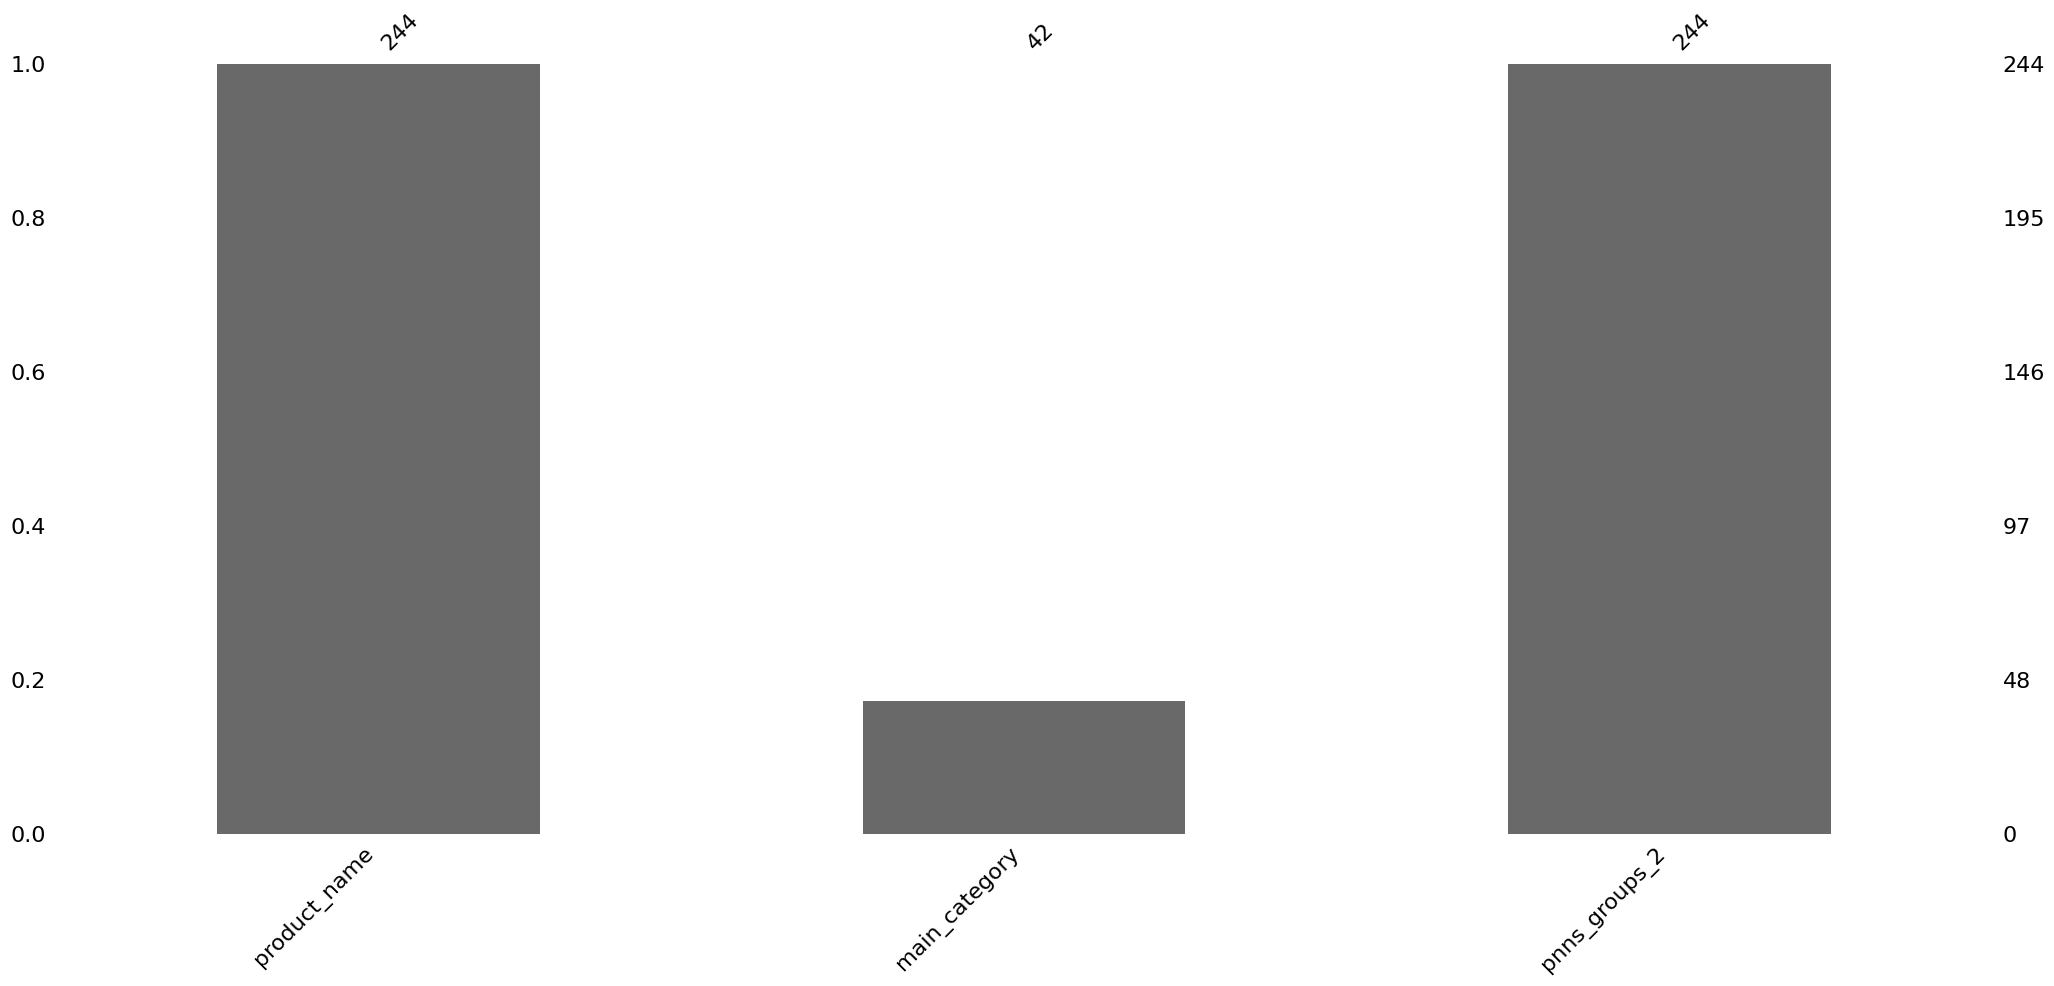

In [181]:
msno.bar(a)

In [182]:
a.pnns_groups_2.value_counts()

unknown                216
Biscuits and cakes       9
Breakfast cereals        5
Cereals                  5
Sweets                   3
Fats                     3
Bread                    1
Legumes                  1
Sweetened beverages      1
Name: pnns_groups_2, dtype: int64

In [183]:
a.main_category.value_counts()

en:snacks                                                                                                                                                                                       6
en:cereals-and-their-products                                                                                                                                                                   5
en:biscuits                                                                                                                                                                                     5
en:breakfast-cereals                                                                                                                                                                            4
en:oatmeal-cookies                                                                                                                                                                              2
en:dehydrated-beverages       

In [184]:
nutri_prob.pnns_groups_2.value_counts().head(15)

unknown                 4480
Biscuits and cakes       341
Cereals                  264
Sweets                   262
Appetizers               147
Fats                     134
Chocolate products       128
Nuts                     127
Breakfast cereals         98
Legumes                   88
Dried fruits              80
Vegetables                68
Dressings and sauces      63
One-dish meals            60
Bread                     59
Name: pnns_groups_2, dtype: int64

In [185]:
nutri_prob.pnns_groups_1.value_counts().head(15)

unknown                    4480
Sugary snacks               739
Cereals and potatoes        512
Salty snacks                291
Fat and sauces              197
Fruits and vegetables       168
Fish Meat Eggs              104
Beverages                   103
Composite foods              73
Milk and dairy products      70
Alcoholic beverages          14
Name: pnns_groups_1, dtype: int64

In [186]:
nutri_prob.main_category.value_counts().head(15)

en:snacks                        262
en:biscuits                      118
en:cereals-and-their-products    106
en:groceries                      97
en:teas                           61
en:breakfast-cereals              58
en:dark-chocolates                53
en:chocolate-candies              45
en:confectioneries                43
en:vegetable-fats                 39
en:crackers                       39
en:peanut-butters                 38
en:beverages                      38
en:biscuits-and-cakes             29
en:extra-virgin-olive-oils        22
Name: main_category, dtype: int64

<AxesSubplot: >

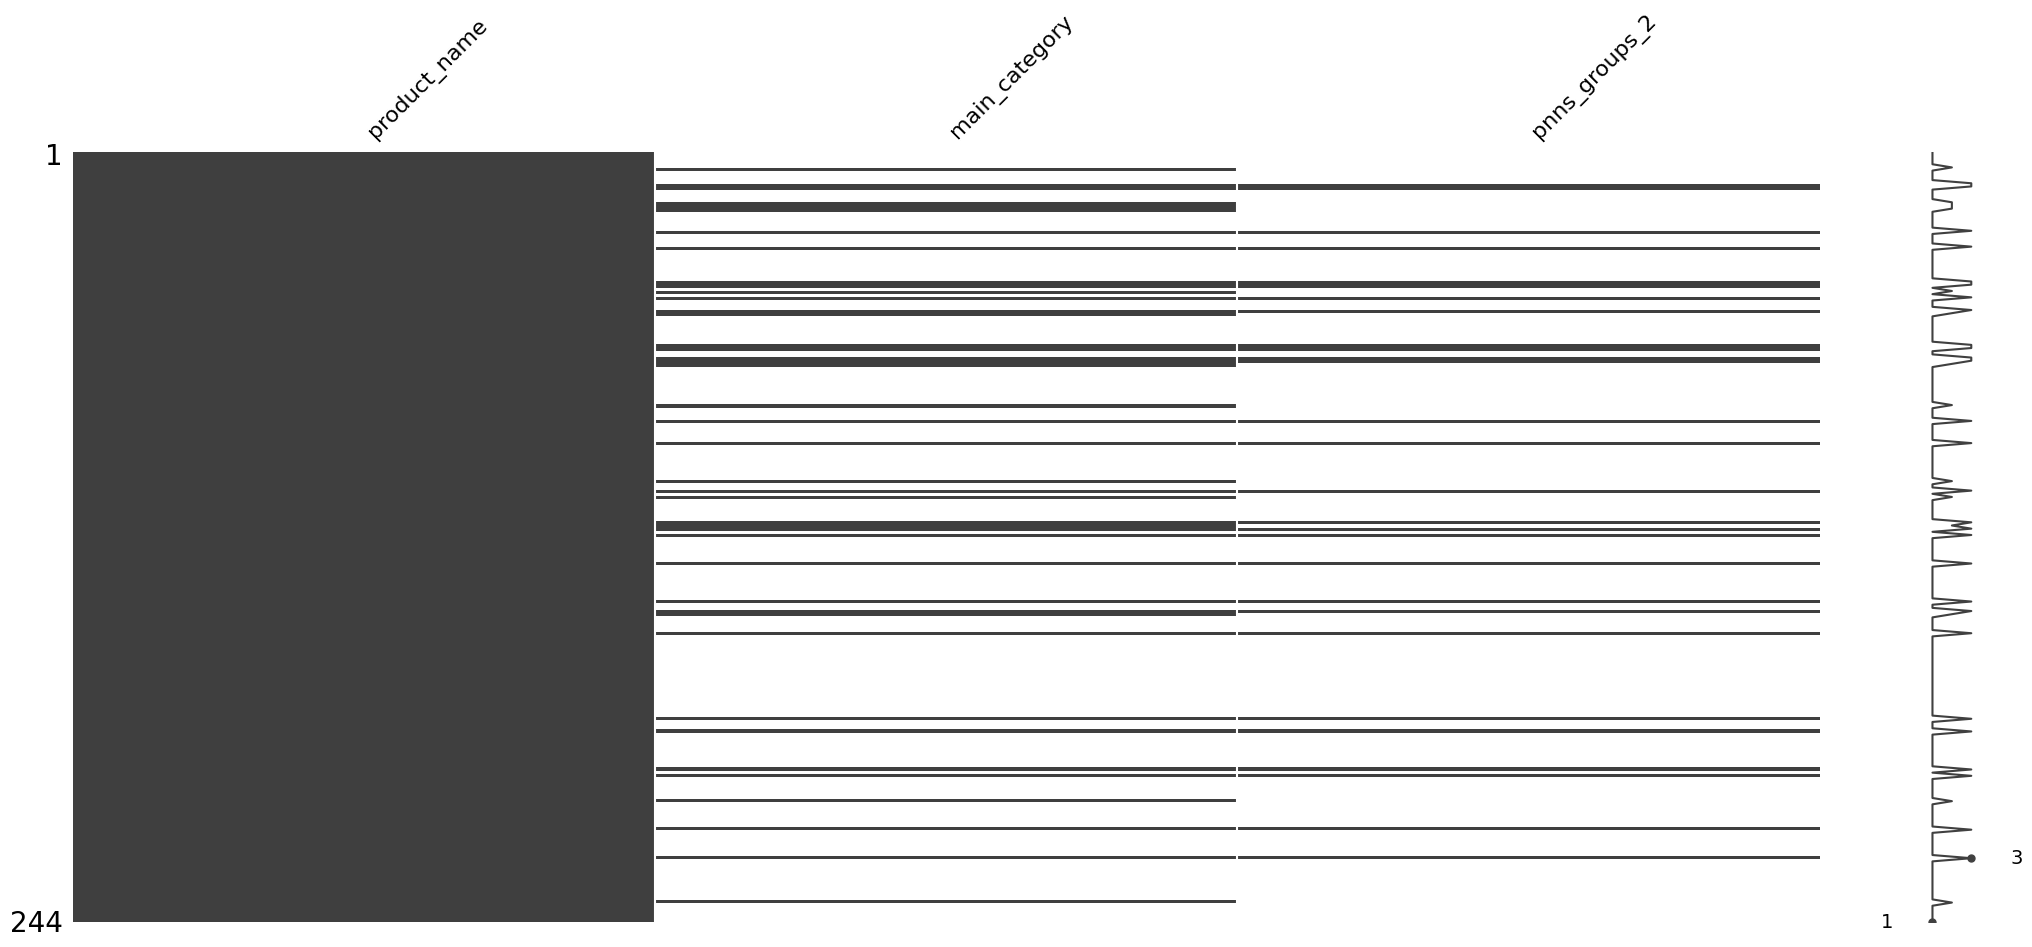

In [187]:
a.pnns_groups_2.replace('unknown', value=np.nan, inplace=True)
msno.matrix(a)

<AxesSubplot: >

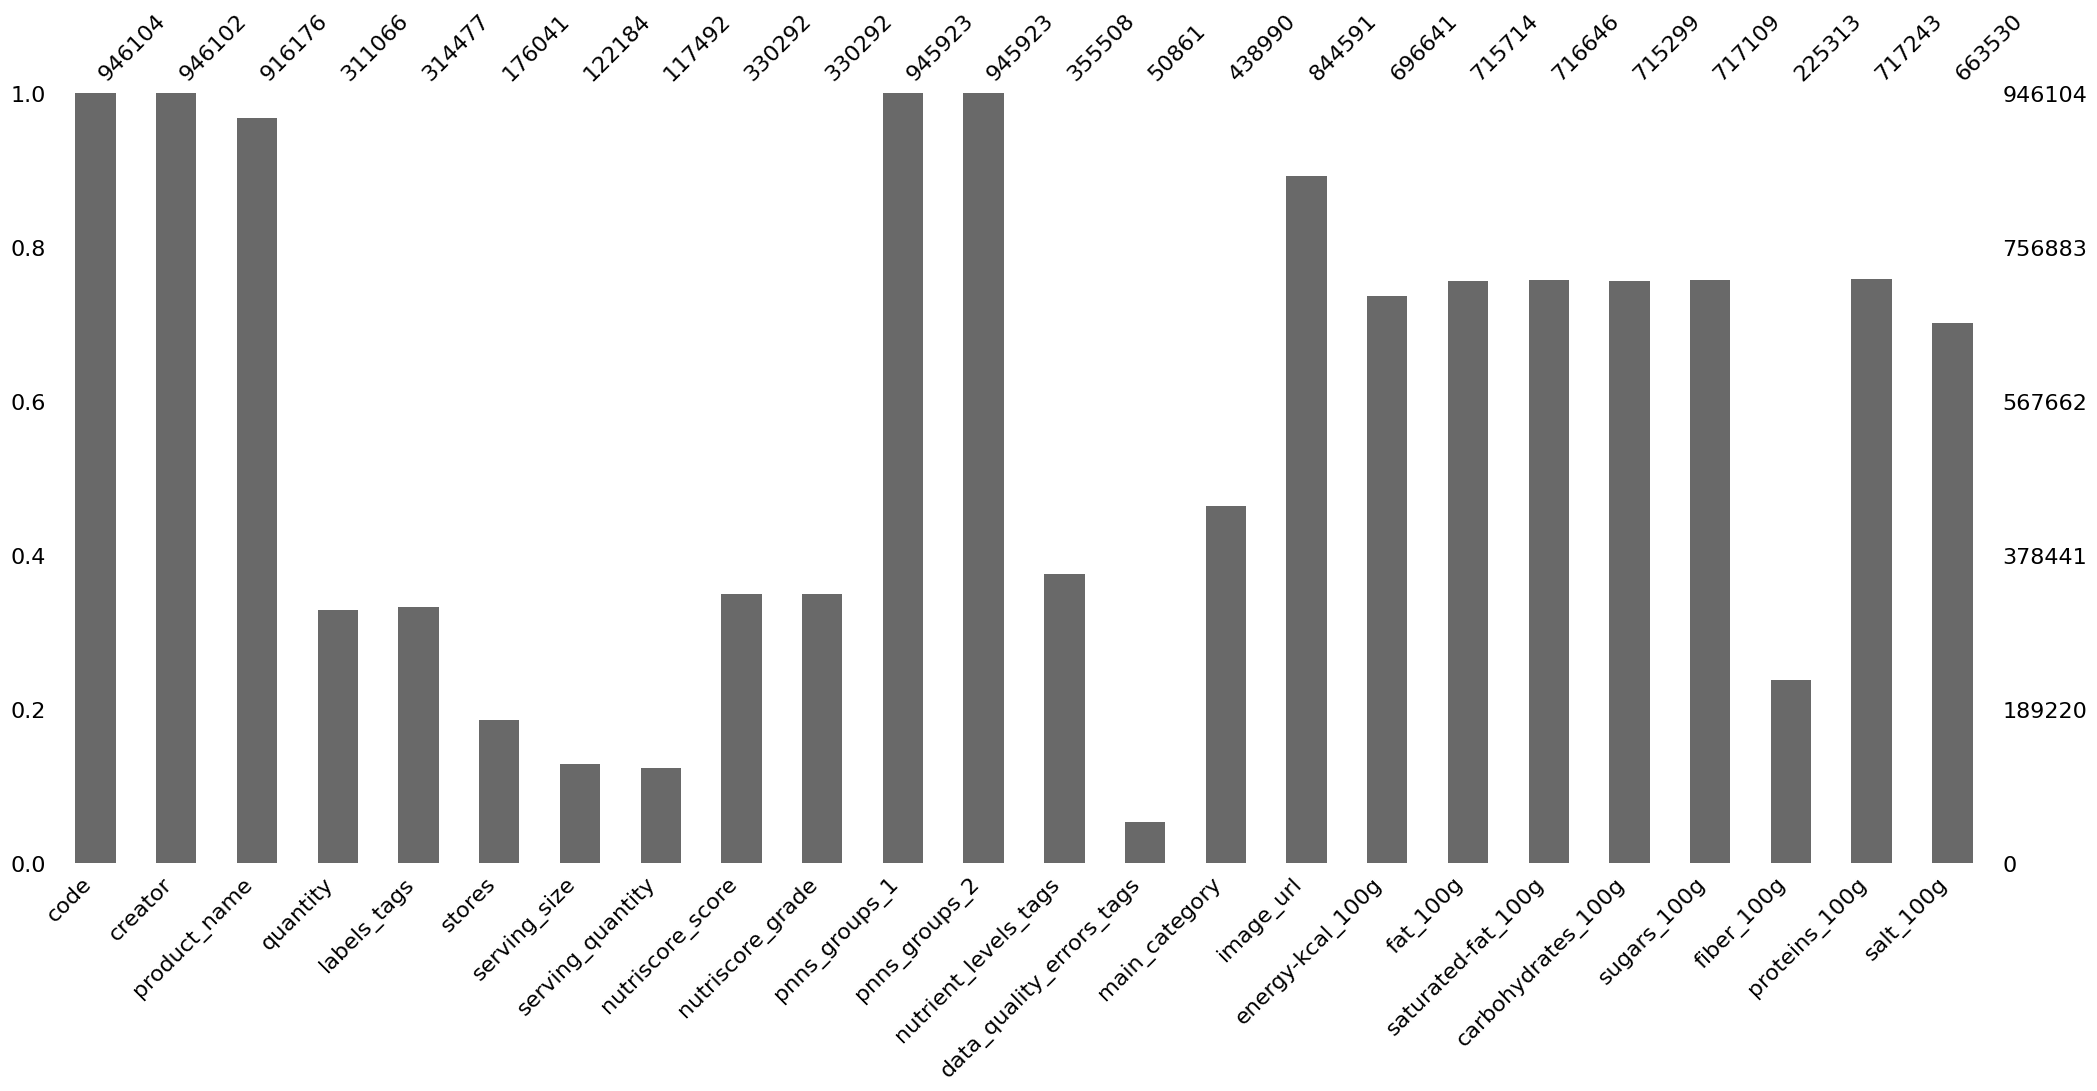

In [188]:
# Apparently, there is a tiny bit more info in main_category when there
# is the problem of not rounded values in nutrients.

# Working on pnns_groups
msno.bar(data)

In [189]:
pnns_f = ['pnns_groups_1', 'pnns_groups_2']

pnns_groups_1         pnns_groups_2
0                  unknown               unknown
1  Milk and dairy products        Dairy desserts
2                  unknown               unknown
3                  unknown               unknown
4           Fat and sauces  Dressings and sauces

pnns_groups_1         pnns_groups_2
0                     <NA>                  <NA>
1  Milk and dairy products        Dairy desserts
2                     <NA>                  <NA>
3                     <NA>                  <NA>
4           Fat and sauces  Dressings and sauces

<AxesSubplot: >

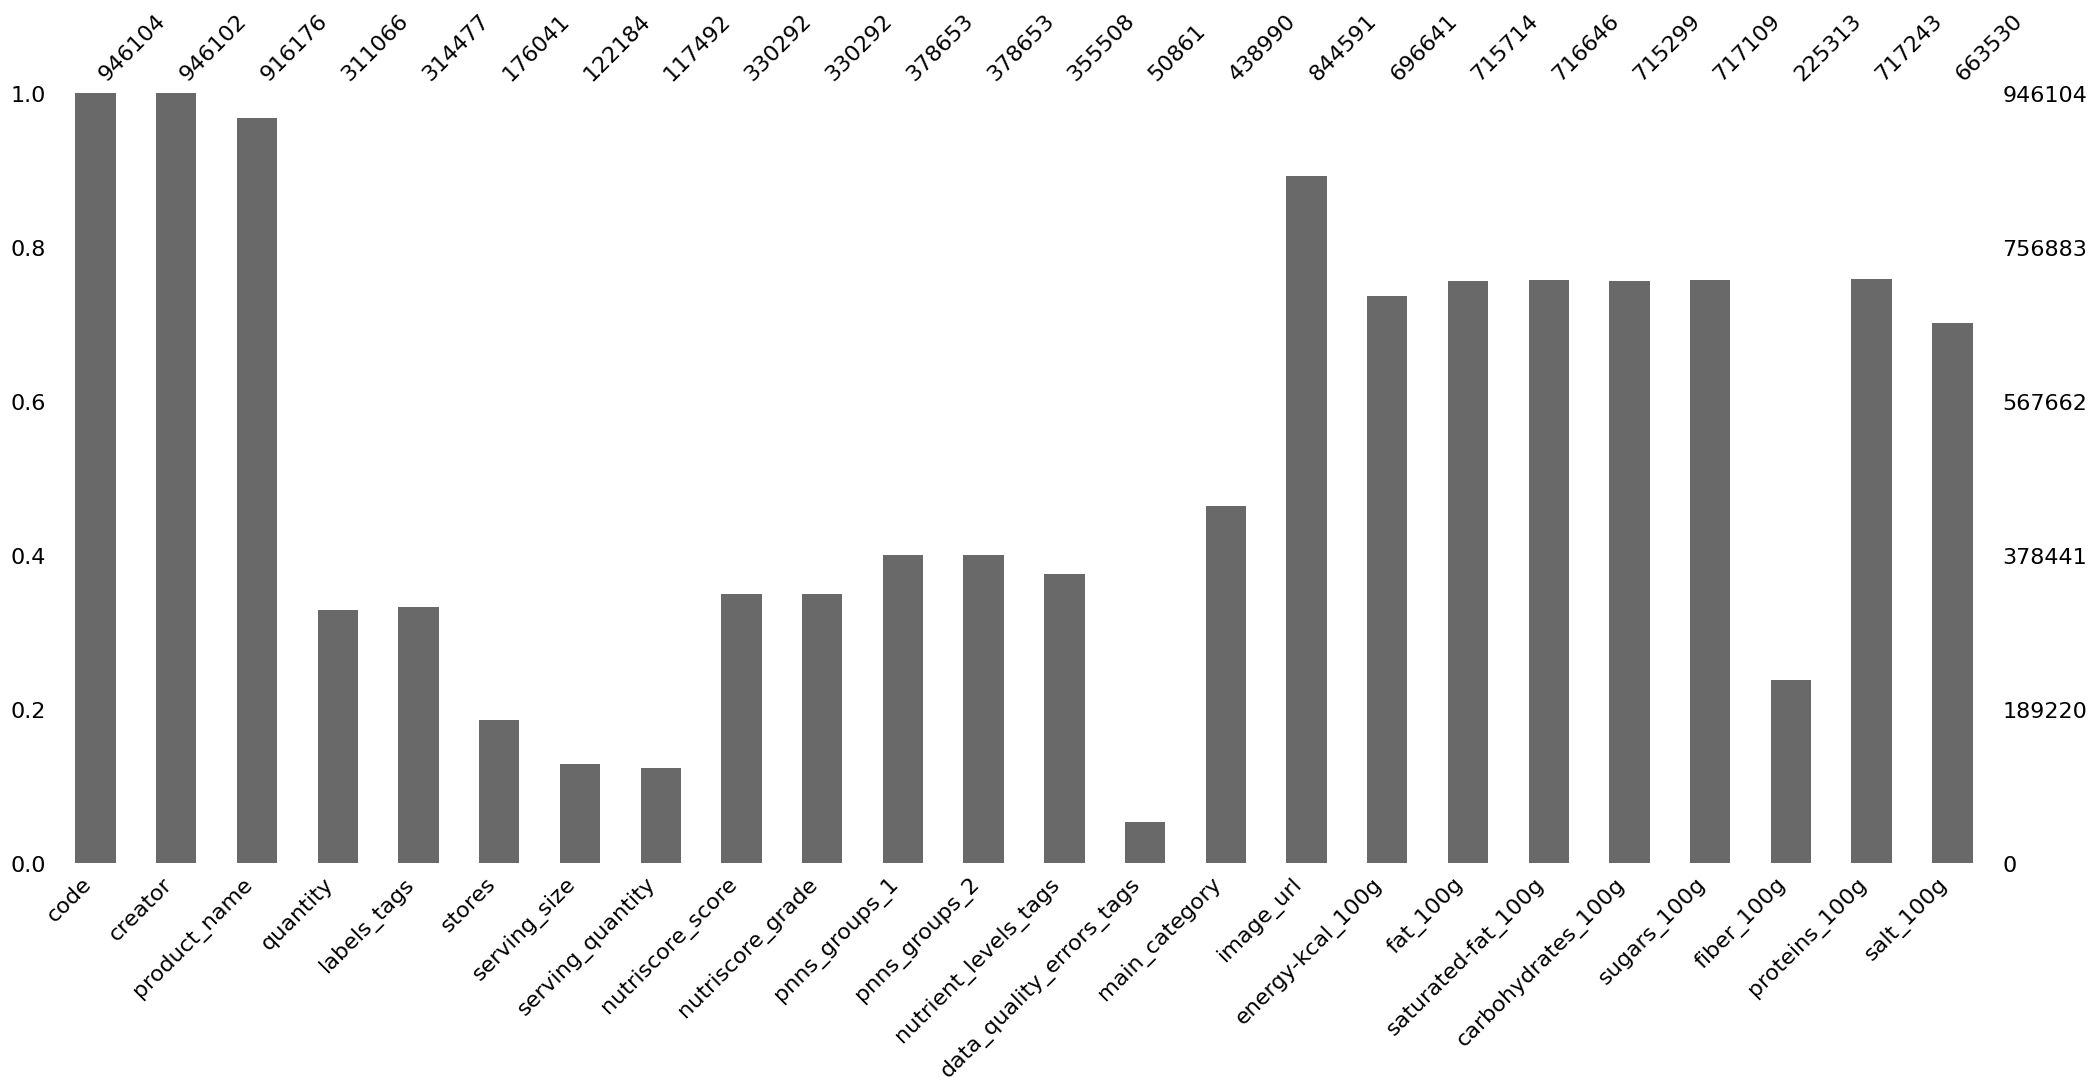

In [190]:
pnns = data.loc[:, pnns_f]
display(pnns.head())
pnns.replace('unknown', value=pd.NA, inplace=True)
display(pnns.head())
data.loc[:, pnns_f] = pnns
msno.bar(data)

At that point, I can not try to rectify the nutrients of a product if I have no clue of the group it belongs to.

I am seeing that pnns_groups are finally provided for ~ 40 % of products. And main_category not much more.

I want to tag products with at least one classification feature, so to say, pnns groups or main_category.

I want to tag products with sugars_100g info.

And then, I will try to address the nutrients problems on those products having at least one of those tags.

## 5.5.  [&#9650;](#toc0_) <a id='toc5_5_'></a>Tagging products with at least one category for classification & tagging products with sugars value availability.

In [191]:
classification_f = pnns_f
classification_f.append('main_category')
print(classification_f)

classification = data.loc[:, classification_f]
for feat in classification_f:
    print(classification[feat].notnull().mean())
    display(classification[feat].value_counts().head(30))

['pnns_groups_1', 'pnns_groups_2', 'main_category']
0.4002234426659226


Sugary snacks              78643
Fish Meat Eggs             65595
Milk and dairy products    44196
Cereals and potatoes       35679
Composite foods            31404
Fruits and vegetables      30458
Beverages                  29210
Fat and sauces             27922
Salty snacks               22863
Alcoholic beverages        12682
sugary-snacks                  1
Name: pnns_groups_1, dtype: int64

0.4002234426659226


Sweets                              35462
Biscuits and cakes                  28685
Processed meat                      24678
One-dish meals                      24297
Meat                                23005
Cheese                              22311
Dressings and sauces                18708
Cereals                             16608
Fish and seafood                    14563
Vegetables                          14431
Alcoholic beverages                 12682
Milk and yogurt                     11221
Salty and fatty products            11093
Sweetened beverages                  9674
Chocolate products                   9463
Fruits                               9450
Fats                                 9214
Bread                                8161
Appetizers                           7259
Fruit juices                         6506
Dairy desserts                       5988
Breakfast cereals                    5118
Unsweetened beverages                5063
Pastries                          

0.4639976154841328


en:groceries                  20987
en:sweetened-beverages         4741
en:beverages                   4130
en:chicken-breasts             4067
en:biscuits                    3399
en:white-hams                  3048
en:extra-virgin-olive-oils     2624
en:candies                     2503
en:dark-chocolates             2417
en:unsweetened-beverages       2317
en:salads                      2032
en:labeled-cheeses             1956
en:teas                        1882
en:honeys                      1846
en:cheeses                     1777
en:turkey-cutlets              1634
en:confectioneries             1497
en:chicken-thighs              1425
en:breads                      1369
en:smoked-salmons              1327
en:protein-powders             1293
en:strawberry-jams             1255
fr:saucissons-secs             1238
en:milk-chocolates             1225
en:crackers                    1198
en:raw-cured-ham               1173
en:yogurts                     1146
en:snacks                   

In [192]:
# Creating the tag for classifier.
data.loc[:, 'classifier_available'] = (classification
                                       .notnull()
                                       .any(axis=1))

# Creating the tag for sugars_100 info.
data.loc[:, 'sugars_available'] = data.sugars_100g.notnull()

# I discard products without at least one of this information.
mask = data.classifier_available | data.sugars_available
data = data.loc[mask]
data.shape

(796533, 26)

<AxesSubplot: >

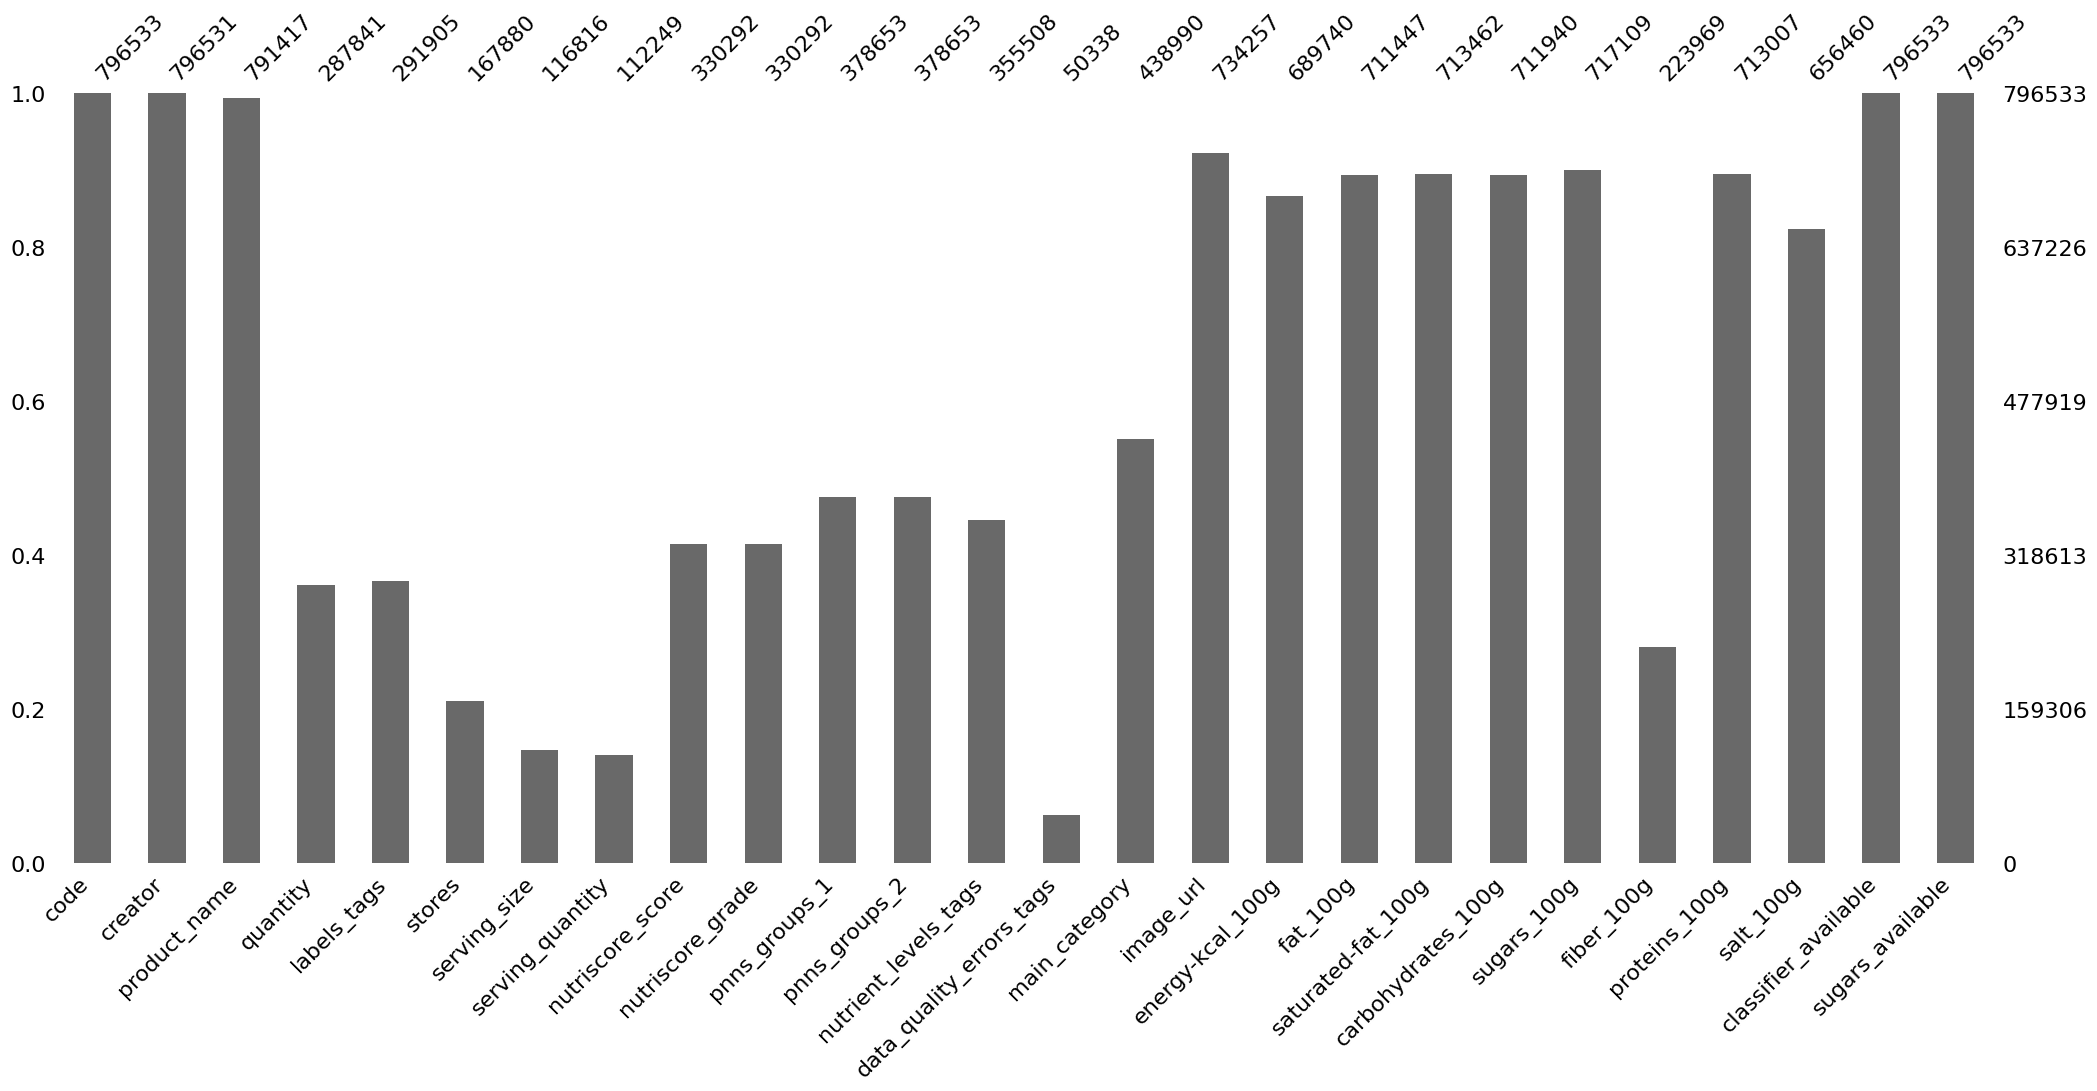

In [193]:
msno.bar(data)

For all those products, I should be able to estimate the sugars when missing, based on the sugars group distribution.

I shall remember that I did not adress nutrients problem at that point. 
Before that, I want to tag products with nutrients problems tags.

## 5.6.  [&#9650;](#toc0_) <a id='toc5_6_'></a>Tagging nutrients inconsistency

In [194]:
nutrients_f = ['fat_100g',
               'saturated-fat_100g',
               'carbohydrates_100g',
               'sugars_100g',
               'fiber_100g',
               'proteins_100g',
               'salt_100g']


In [195]:
# Creating tags for nutrients problems.
sat_fat = 'more_saturated_fat_than_fat'
sug_carbo = 'more_sugars_than_carbohydrates'
nutsum_101 = 'nutrients_sum_over_101'
neg = 'negative_value'
over100 = 'value_over_100'
nutprob = 'initial_nutrients_problem' # At least one of the above problems.

data.loc[:, sat_fat] = (data.fat_100g 
                        - data['saturated-fat_100g']) < 0

data.loc[:, sug_carbo ] = (data.carbohydrates_100g 
                           - data.sugars_100g) < 0

data.loc[:, nutsum_101] = (data.carbohydrates_100g
                           + data.fat_100g
                           + data.fiber_100g
                           + data.proteins_100g
                           + data.salt_100g) >= 101

data.loc[:, neg] = (data.loc[:, nutrients_f] < 0).any(axis=1)

data.loc[:, over100] = (data.loc[:, nutrients_f] > 100).any(axis=1)

data.loc[:, nutprob] = data.loc[:, sat_fat:over100].any(axis=1)

# And creating one last tag, which will show sugars value
# has been assessed at some point.
data.loc[:, 'sugars_assessed'] = False

In [196]:
# A preview
data.loc[data.loc[:, sat_fat:].any(axis=1)].sample(10)

code            creator  \
4034    0018627703273            kiliweb   
74984   0444444388063    usda-ndb-import   
199841          28087            kiliweb   
937653       90311062            kiliweb   
512910  3585810083643            kiliweb   
719876  5011386072746            kiliweb   
592538  3760077532558            tacinte   
87855   0813926003426  org-database-usda   
8094    0040000539551            kiliweb   
843212  8006287001213            kiliweb   

                                  product_name quantity  \
4034         Kashi Golean Cereal Crunch 13.8oz      NaN   
74984              Flave!, Hot & Spicy Peanuts      NaN   
199841                        4life nutrastart      NaN   
937653                    L’INFUSION DE MADAME      NaN   
512910                          Allons Rooibos      NaN   
719876                                  Alcolo      NaN   
592538                        Amaretti morbidi    250 g   
87855   Vanilla cake protein bar, vanilla cake      NaN   
8094          Minis peanut chocolate candy bar      NaN   
843212             Grissimo Della Valpolicella      NaN   

                                              labels_tags stores  \
4034                                                  NaN    NaN   
74984                                                 NaN    NaN   
199841                                                NaN    NaN   
937653  en:organic,en:eu-organic,en:fr-bio-01,en:made-...    NaN   
512910                                         en:organic    NaN   
719876                                                NaN    NaN   
592538  en:green-dot,en:incorrect-data-on-label,en:inc...    NaN   
87855                                                 NaN    NaN   
8094                                 en:pure-cocoa-butter    NaN   
843212                                                NaN    NaN   

           serving_size  serving_quantity  nutriscore_score nutriscore_grade  \
4034     3/4 Cup (53 g)              53.0               6.0                c   
74984   0.25 cup (28 g)              28.0              19.0                e   
199841              NaN               NaN               NaN              NaN   
937653              NaN               NaN               NaN              NaN   
512910              NaN               NaN               NaN              NaN   
719876              NaN               NaN               NaN              NaN   
592538              NaN               NaN              18.0                d   
87855      1 BAR (60 g)              60.0              -2.0                a   
8094    0.25 BAR (28 g)              28.0              23.0                e   
843212              NaN               NaN               NaN              NaN   

        ... salt_100g classifier_available sugars_available  \
4034    ...  0.465000                 True             True   
74984   ...  1.697500                 True             True   
199841  ...  1.176471                False             True   
937653  ...  0.000000                False             True   
512910  ...  0.000000                False             True   
719876  ...  6.000000                False             True   
592538  ...  0.030000                 True             True   
87855   ...  1.167500                 True             True   
8094    ...  0.178571                 True             True   
843212  ...  2.100000                False             True   

       more_saturated_fat_than_fat more_sugars_than_carbohydrates  \
4034                         False                          False   
74984                        False                          False   
199841                       False                          False   
937653                       False                           True   
512910                       False                           True   
719876                       False                          False   
592538                       False                           True   
87855 

In [197]:
# data.to_csv('./csv_files/fr_data_no_dup_tagged.csv.gz',
#             index=False,
#             sep='\t',
#             compression='gzip')

### 5.6.1.  [&#9650;](#toc0_) <a id='toc5_6_1_'></a>Some stats in the remaining data

In [198]:
print(data.shape[0])
print(f"nutrients_pbs : {data.initial_nutrients_problem.sum()}")
print(f"{nutsum_101} : {data.nutrients_sum_over_101.sum()}")
print(f"{neg} : {data.negative_value.sum()}")
print(f"{over100} : {data.value_over_100.sum()}")
print(f"{sat_fat} : {data.more_saturated_fat_than_fat.sum()}")
print(f"{sug_carbo} : {data.more_sugars_than_carbohydrates.sum()}")
pct = data.initial_nutrients_problem.sum() * 100 / data.shape[0]
print(f"percentage of suspected products : {pct}")

796533
nutrients_pbs : 6692
nutrients_sum_over_101 : 5060
negative_value : 3
value_over_100 : 308
more_saturated_fat_than_fat : 438
more_sugars_than_carbohydrates : 1073
percentage of suspected products : 0.8401409608892538


So it is not too bad, less than 1% of the dataset seems to be illogical.
I could ignore it, or I can group by type of products (if available) and try to give it a nice assessment.

It will be the same treatment for missing sugar values and for wrong sugar values as long as the pnns_groups_2 or main_category is known.

In [199]:
print(data.main_category.value_counts().shape)
print((data.main_category.value_counts() < 10).sum())
print(data.pnns_groups_1.value_counts().shape)
print(data.pnns_groups_2.value_counts().shape)

(22241,)
18388
(11,)
(40,)


I see that many of the categories in main_categories do not have a lot of products (18 388 categories out of 22 241 have less than 10 elements). **It would be much better to assess a value based on pnns2 when the size of category in main category is too little.** Let's say under 10.

In [200]:
data.pnns_groups_2.value_counts()

Sweets                              35462
Biscuits and cakes                  28685
Processed meat                      24678
One-dish meals                      24297
Meat                                23005
Cheese                              22311
Dressings and sauces                18708
Cereals                             16608
Fish and seafood                    14563
Vegetables                          14431
Alcoholic beverages                 12682
Milk and yogurt                     11221
Salty and fatty products            11093
Sweetened beverages                  9674
Chocolate products                   9463
Fruits                               9450
Fats                                 9214
Bread                                8161
Appetizers                           7259
Fruit juices                         6506
Dairy desserts                       5988
Breakfast cereals                    5118
Unsweetened beverages                5063
Pastries                          

pnns_groups_2 give nice groups to make stats on and assess missing values of sugars. We just have to regroup pastries to be ready for that.

In [201]:
data.loc[data.pnns_groups_2 == 'pastries', 'pnns_groups_2'] = 'Pastries'

## 5.7.  [&#9650;](#toc0_) <a id='toc5_7_'></a>Sugars values (missing or potentially wrong) exploration to design an imputation strategy.

In [202]:
mask = (((~data.sugars_available) | data.initial_nutrients_problem ) 
        & data.classifier_available)

sugars_pb = data.loc[mask, classification_f]
sugars_pb

pnns_groups_1        pnns_groups_2  \
13                Sugary snacks               Sweets   
35               Fish Meat Eggs                 Meat   
42                Sugary snacks               Sweets   
61                    Beverages  Sweetened beverages   
75      Milk and dairy products               Cheese   
...                         ...                  ...   
946089                     <NA>                 <NA>   
946093  Milk and dairy products               Cheese   
946095           Fish Meat Eggs       Processed meat   
946099            Sugary snacks               Sweets   
946101      Alcoholic beverages  Alcoholic beverages   

                    main_category  
13                en:almond-paste  
35      fr:aiguillettes-de-poulet  
42                   en:milk-jams  
61             en:apricot-nectars  
75                     en:cheeses  
...                           ...  
946089              en:toothpaste  
946093            en:goat-cheeses  
946095           en:pate-in-crust  
946099        en:honey-of-corsica  
946101                   en:vodka  

[82609 rows x 3 columns]

<AxesSubplot: >

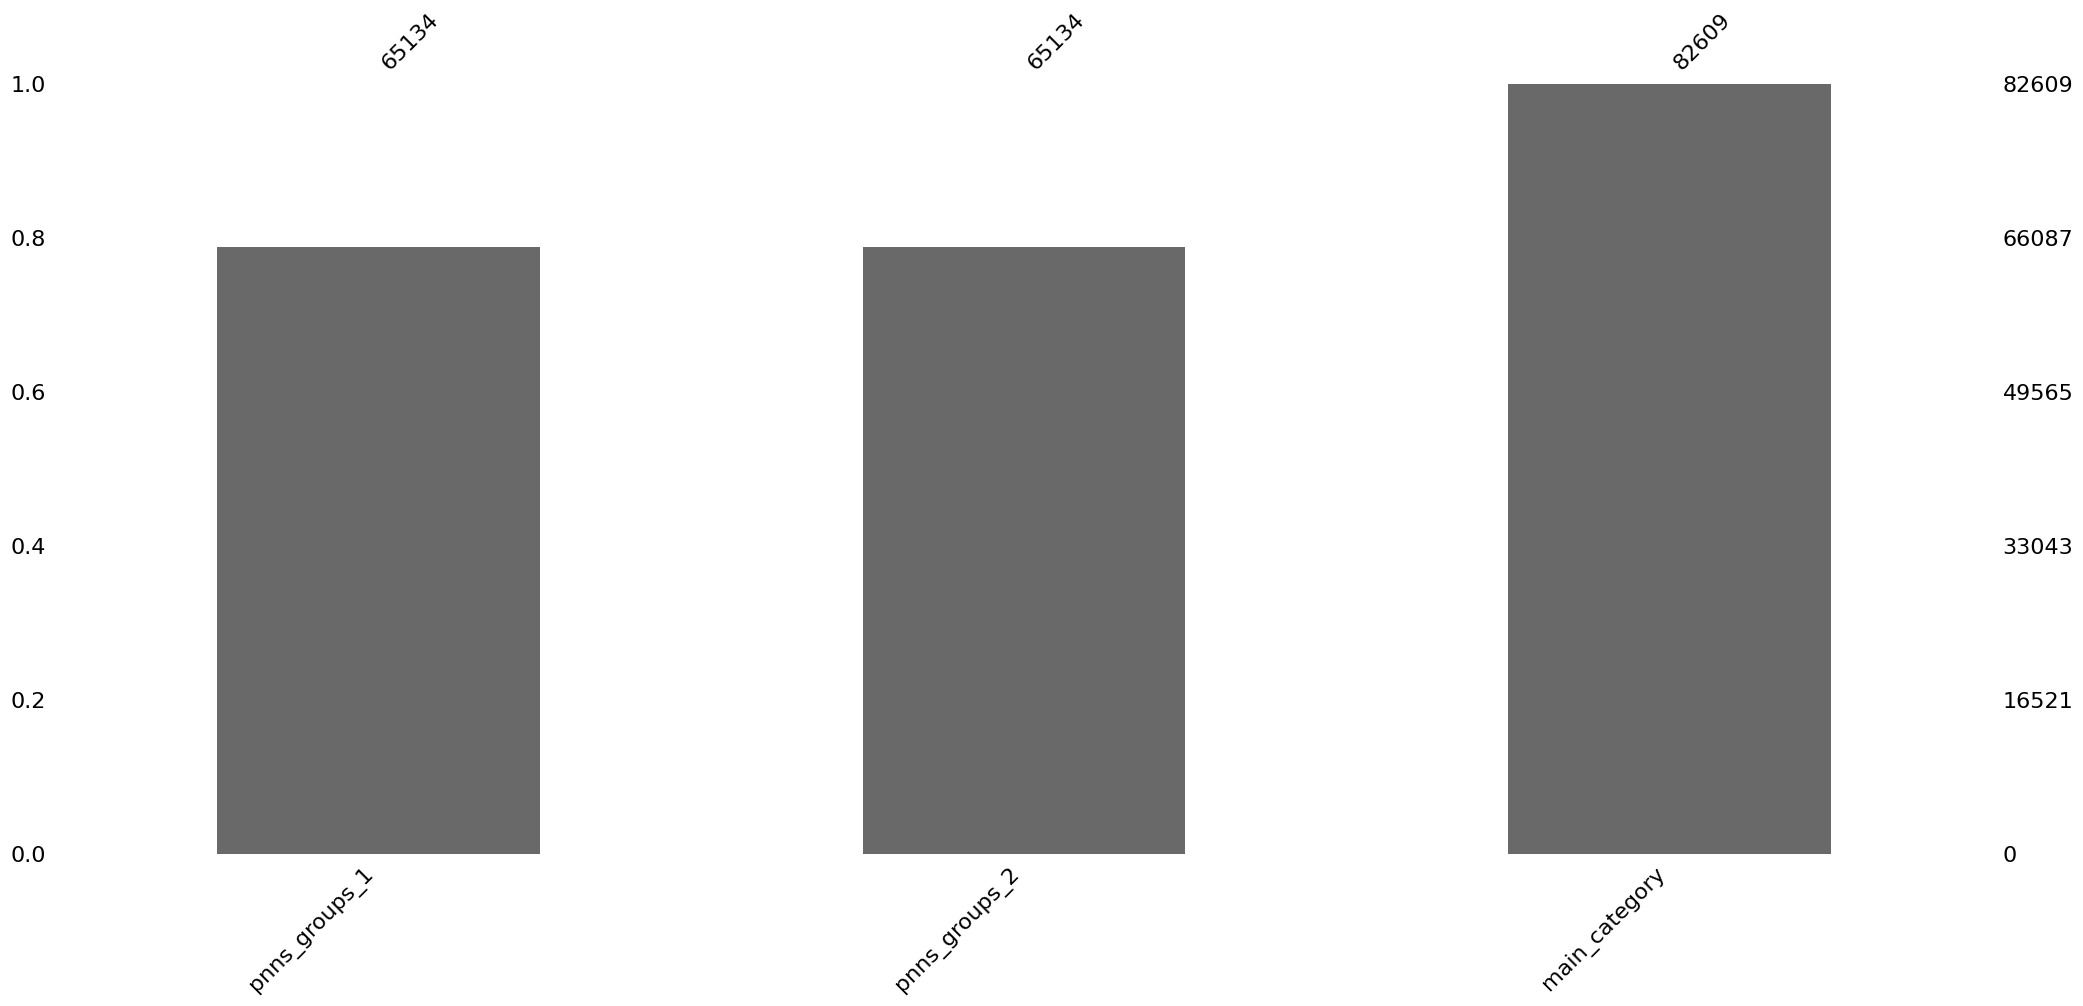

In [203]:
msno.bar(sugars_pb)

We always have a category. 

To assess the sugars value per 100 g, my idea is to look at the category size. If it is > to 20; I will use the mean of sugars_100g in the category to assess the product quantity. Else, and if we know it, I will use the median of pnns_group_2.

If it does not meet these conditions, the product will remain unchanged. (Or may be will I try to assess pnns_group_2 with some clustering techniques?)

In [204]:
grouped_by_pnns_groups_2 = (data
                            .groupby('pnns_groups_2')['sugars_100g']
                            .agg([len, np.mean, np.std]))


grouped_by_pnns_groups_2.rename(columns={'len': 'pnns_groups_2_cardinal',
                                         'mean': 'sugars_100g_mean'},
                                inplace=True)

grouped_by_pnns_groups_2.sort_values('sugars_100g_mean',
                                     ascending=False,
                                     inplace=True)

grouped_by_pnns_groups_2.head(20)

pnns_groups_2_cardinal  sugars_100g_mean  \
pnns_groups_2                                                                
Sweets                                             35462         49.567834   
Dried fruits                                        4398         42.866177   
Chocolate products                                  9463         40.007741   
Biscuits and cakes                                 28685         29.758758   
Ice cream                                           4676         23.308279   
Sweetened beverages                                 9674         23.056843   
Fruits                                              9450         21.544367   
Pastries                                            5034         16.696321   
Breakfast cereals                                   5118         16.446148   
Dairy desserts                                      5988         12.018156   
Fruit nectars                                        946         10.353474   
Pizza pies and quiches                              5029          9.809199   
Fruit juices                                        6506          9.776405   
Milk and yogurt                                    11221          8.677589   
Dressings and sauces                               18708          8.442335   
Nuts                                                4511          6.512460   
Teas and herbal teas and coffees                     811          6.441303   
Unsweetened beverages                               5063          6.234777   
Vegetables                                         14431          4.613075   
Plant-based milk substitutes                        1838          4.361235   

                                        std  
pnns_groups_2                                
Sweets                            23.464133  
Dried fruits                      20.498370  
Chocolate products                14.638103  
Biscuits and cakes                13.081593  
Ice cream                          5.555785  
Sweetened beverages               27.848517  
Fruits                            27.698360  
Pastries                           7.931371  
Breakfast cereals                  9.887527  
Dairy desserts                     7.535728  
Fruit nectars                      3.963843  
Pizza pies and quiches            11.704655  
Fruit juices                       4.304634  
Milk and yogurt                    6.571727  
Dressings and sauces              12.383979  
Nuts                               6.904589  
Teas and herbal teas and coffees  11.514920  
Unsweetened beverages             11.918251  
Vegetables                         8.801362  
Plant-based milk substitutes       5.093483

In [205]:
grouped_by_category = (data
                       .groupby('main_category')['sugars_100g']
                       .agg([len, np.mean, np.std]))

grouped_by_category.rename(columns={'len': 'category_cardinal',
                                    'mean': 'sugars_100g_mean'},
                           inplace=True)

grouped_by_category.sort_values('category_cardinal',
                                ascending=False,
                                inplace=True)

print(grouped_by_category.shape)

# Keeping categories with more than 10 elements
# so the mean 'means' something decent.
grouped_by_category = grouped_by_category.loc[(grouped_by_category
                                               .category_cardinal >= 10),
                                              :]

print(grouped_by_category.shape)

grouped_by_category.head(20)

(22241, 3)
(3853, 3)


category_cardinal  sugars_100g_mean        std
main_category                                                             
en:groceries                            20987          8.631996  12.632830
en:sweetened-beverages                   4741         19.357833  25.073664
en:beverages                             4130         10.171094  16.758709
en:chicken-breasts                       4067          0.405399   1.990171
en:biscuits                              3399         26.699037  11.949161
en:white-hams                            3048          0.656909   1.640651
en:extra-virgin-olive-oils               2624          0.036688   0.501125
en:candies                               2503         54.863330  27.685565
en:dark-chocolates                       2417         29.437904  12.831259
en:unsweetened-beverages                 2317          9.843817  18.871500
en:salads                                2032          2.488232   2.253923
en:labeled-cheeses                       1956          0.332328   0.957597
en:teas                                  1882          3.493506  14.356568
en:honeys                                1846         47.516821  37.433806
en:cheeses                               1777          1.608858   2.998328
en:turkey-cutlets                        1634          0.341564   1.613405
en:confectioneries                       1497         50.652318  22.979104
en:chicken-thighs                        1425          0.219307   0.660640
en:breads                                1369          4.040795   5.389362
en:smoked-salmons                        1327          0.412857   0.849518

In [206]:
a = classification.loc[classification.main_category == 'en:candies',
                       'pnns_groups_2'].value_counts()
a

Sweets                 2490
Biscuits and cakes        7
Chocolate products        4
Sweetened beverages       2
Name: pnns_groups_2, dtype: int64

This shows that a product with category candies is categorized in pnns groups mainly as sweets (very normal), but sometimes not.

In [207]:
grouped_by_pnns_groups_2.loc[(grouped_by_pnns_groups_2.index).isin(a.index.values)]

pnns_groups_2_cardinal  sugars_100g_mean        std
pnns_groups_2                                                           
Sweets                                35462         49.567834  23.464133
Chocolate products                     9463         40.007741  14.638103
Biscuits and cakes                    28685         29.758758  13.081593
Sweetened beverages                    9674         23.056843  27.848517

candies sugars mean is 55 (with an high std deviation of 27)

If the group was too small, I would have use pnns_groups_2 to assess the quantity, thus arriving in one of the four groups above.

There is a very high 'probability' that the product labeled 'candies' is also in 'sweets' and so the mean difference would be small. But it could be possible, (very low probability) that the product was labeled 'candies' and belongs to pnns_groups_2 'sweetened beverages' where the difference of means would have been very important 55 - 23...

It is nothing like a proof, but I chose a random element to illustrate that my plan for assigning sugars values seems reasonable.

Plus, in the case I assign a value, I will add a tag so the app designer can mention that reliability is not at its best to the app user.

Let's do the same thing another time : with a product labeled 'white-hams'

In [208]:
a = classification.loc[classification.main_category == 'en:white-hams',
                       'pnns_groups_2'].value_counts()
a

Processed meat    3046
Cheese               2
Name: pnns_groups_2, dtype: int64

In [209]:
grouped_by_pnns_groups_2.loc[(grouped_by_pnns_groups_2.index).isin(a.index.values)]

pnns_groups_2_cardinal  sugars_100g_mean       std
pnns_groups_2                                                     
Cheese                           22311          0.897431  2.382924
Processed meat                   24678          0.884092  1.386819

sugars mean in white-hams was 0.6	with small deviation : 1.640651

If I had no idea of the category, I would have chosen the pnns_groups_2 thus assigning around 0.9 

Perfectly fine.

what with dark-chocolates?

In [210]:
a = classification.loc[classification.main_category == 'en:dark-chocolates',
                       'pnns_groups_2'].value_counts()
a

Chocolate products    2417
Name: pnns_groups_2, dtype: int64

In [211]:
grouped_by_pnns_groups_2.loc[(grouped_by_pnns_groups_2.index).isin(a.index.values)]

pnns_groups_2_cardinal  sugars_100g_mean        std
pnns_groups_2                                                          
Chocolate products                    9463         40.007741  14.638103

for dark-chocolates : mean = 29 and std deviation = 12.831259

If I had no idea of the main_category, it would have been tagged Chocolate products with an higher value of mean (40) with the same kind of deviation.

So, not perfect... But better than random...

### 5.7.1.  [&#9650;](#toc0_) <a id='toc5_7_1_'></a>Analysis of the top main_category group, 'en:groceries', that seems vague...

In [212]:
a = classification.loc[classification.main_category == 'en:groceries',
                       'pnns_groups_2'].value_counts()

grouped_by_pnns_groups_2.loc[(grouped_by_pnns_groups_2.index).isin(a.index.values)]


pnns_groups_2_cardinal  sugars_100g_mean  \
pnns_groups_2                                                                
Sweets                                             35462         49.567834   
Dried fruits                                        4398         42.866177   
Chocolate products                                  9463         40.007741   
Biscuits and cakes                                 28685         29.758758   
Ice cream                                           4676         23.308279   
Sweetened beverages                                 9674         23.056843   
Fruits                                              9450         21.544367   
Breakfast cereals                                   5118         16.446148   
Dairy desserts                                      5988         12.018156   
Fruit juices                                        6506          9.776405   
Milk and yogurt                                    11221          8.677589   
Dressings and sauces                               18708          8.442335   
Nuts                                                4511          6.512460   
Teas and herbal teas and coffees                     811          6.441303   
Unsweetened beverages                               5063          6.234777   
Vegetables                                         14431          4.613075   
Bread                                               8161          4.250236   
Alcoholic beverages                                12682          4.100729   
Artificially sweetened beverages                    2425          4.070077   
Appetizers                                          7259          3.897269   
Cereals                                            16608          3.278480   
Legumes                                             3739          2.880865   
One-dish meals                                     24297          2.425120   
Soups                                               2179          2.377523   
Eggs                                                2067          1.272478   
Salty and fatty products                           11093          1.214526   
Cheese                                             22311          0.897431   
Processed meat                                     24678          0.884092   
Meat                                               23005          0.734272   
Fish and seafood                                   14563          0.694323   
Fats                                                9214          0.573266   

                                        std  
pnns_groups_2                                
Sweets                            23.464133  
Dried fruits                      20.498370  
Chocolate products                14.638103  
Biscuits and cakes                13.081593  
Ice cream                          5.555785  
Sweetened beverages               27.848517  
Fruits                            27.698360  
Breakfast cereals                  9.887527  
Dairy desserts                     7.535728  
Fruit juices                       4.304634  
Milk and yogurt                    6.571727  
Dressings and sauces              12.383979  
Nuts                               6.904589  
Teas and herbal teas and coffees  11.514920  
Unsweetened beverages             11.918251  
Vegetables                         8.801362  
Bread                              4.519206  
Alcoholic beverages               40.096461  
Artificially sweetened beverages   8.664880  
Appetizers                         5.927831  
Cereals                            6.066298  
Legumes                            4.197732  
One-dish meals                     3.497038  
Soups                              3.231073  
Eggs                               6.596840  
Salty and fatty products           2.358550  
Cheese                             2.382924  
Processed meat                     1.386819  
Meat                               2.300615  
Fish and seafood                 

So 'groceries' as main category is a poor classifier to assess sugars.
And that is a bad news because it is the most used main category...

Is that way of tagging linked to one contributor ?

In [213]:
data.loc[data.main_category == 'en:groceries', 'creator'].value_counts()

kiliweb                       12037
openfoodfacts-contributors     2599
date-limite-app                 679
usda-ndb-import                 535
sebleouf                        477
                              ...  
atom                              1
magneto                           1
frenchredfrog                     1
professeurkiwi                    1
leong0                            1
Name: creator, Length: 1013, dtype: int64

Do we often have a pnns_groups_2 classifier when main_category is groceries ?

In [214]:
a = data.loc[data.main_category == 'en:groceries', 'pnns_groups_2']
b = a.value_counts()
display(b.head(10))
print(f'percentage with no pnns_groups_2 : {a.isna().mean()*100}')

Dressings and sauces        13363
Vegetables                   1278
Fruits                         63
Salty and fatty products       56
One-dish meals                 30
Fish and seafood               30
Unsweetened beverages          28
Bread                          27
Cereals                        21
Sweets                         14
Name: pnns_groups_2, dtype: int64

percentage with no pnns_groups_2 : 28.47477009577357


In [215]:
0.28 * len(a)

5876.360000000001

About 6000 products would remain without an accurate group...

I remember the last item of 'categories' was quite similar to 'main_category'. May be it is different than 'groceries' and I could get some information there.

### 5.7.2.  [&#9650;](#toc0_) <a id='toc5_7_2_'></a>Overcoming the 'en:groceries' vagueness.

In [216]:
# Getting the products' codes of 'groceries' without pnns_groups_2.
mask = ((data.main_category == 'en:groceries')
        & (data.pnns_groups_2.isna()))
        
groceries_code = data.loc[mask, 'code']
groceries_code.shape

(5976,)

In [217]:
categories = pd.read_csv('./csv_files/first_data_analyzed.csv.gz',
                         compression='gzip',
                         sep='\t',
                         usecols=['code','categories','main_category'],
                         dtype={'code': 'object'})

In [218]:
categories.head()

code                                         categories  \
0       00000000000000225                                                NaN   
1  0000000000000207025004                                                NaN   
2    00000000000003429145                                                NaN   
3    00000000000026772226  Produits laitiers, Desserts, Produits fermenté...   
4           0000000000017                                                NaN   

      main_category  
0               NaN  
1               NaN  
2               NaN  
3  en:cream-cheeses  
4               NaN

In [219]:
groceries = categories.loc[categories.code.isin(groceries_code), :]
print(groceries.shape)
print(groceries.categories.isnull().sum())

(5976, 3)
0


No missing values in categories for those products!

In [220]:
def get_last_item(categories: str) -> str:
    """ Return the last item of a string filled
        with comma separators.
        
        Example : 'tutu,bar,foo' -> 'foo' 
        
        If a np.nan is provided (type float),
        return np.nan. 
    """
    if type(categories) is str:
        if ',' not in categories:
            return categories
        else: 
            inv_cat = categories[::-1]
            return inv_cat[:inv_cat.find(',')][::-1]
    # For NaN's, which are of type float.
    else:
        return categories
    
a = groceries.categories.value_counts().reset_index()
a.loc[:, 'index']= a.loc[:, 'index'].apply(get_last_item)
display(a.head(50))
a.sum()

index  categories
0                              Epices         281
1                        en:groceries         229
2                   Mélanges d'épices         222
3                       Fleurs de sel         185
4                          Condiments         181
5                       en:seasonings         171
6                          Condiments         155
7                  Crèmes de vinaigre         115
8                   Poivre noir moulu         113
9                  Cannelle en poudre         106
10                               Sels          94
11                 Herbes de Provence          82
12                  Curcuma en poudre          81
13                   Clous de girofle          79
14                   Sels de Guérande          72
15                            Basilic          66
16                      Ras el hanout          63
17                Piments d'Espelette          62
18                        Sels marins          58
19              Poivre noir en grains          57
20                              Curry          55
21                          Gingembre          54
22                  Bouillons de bœuf          53
23          Fleurs de sel de Guérande          51
24                               Thym          49
25                    Cumin en poudre          47
26                 Herbes aromatiques          46
27                Gingembre en poudre          46
28                      Poivres noirs          44
29              Bouillons de volaille          43
30                         Condiments          42
31   Bouillons de légumes déshydratés          40
32                    Bouillons cubes          38
33                            Piments          38
34                 Gousses de vanille          36
35                 en:Gingembre moulu          35
36                 Poivre blanc moulu          33
37                            Paprika          33
38                          Groceries          33
39                          Sels fins          33
40                             Persil          33
41              Bouillons de volaille          32
42                          Salicorne          32
43                             Spices          30
44                          Bouillons          29
45                            Poivres          29
46                       Gewürzmittel          28
47                 Piments de Cayenne          28
48      Crèmes de vinaigre balsamique          27
49              Bouillons déshydratés          26

index          Epicesen:groceries Mélanges d'épices Fleurs d...
categories                                                 5976
dtype: object

So I could replace main_category by the last item of categories for products where main_category is 'en:groceries' or is null.

Only 229 groceries would remain out of 6000 and I could gain possible classifiers.

Then this would have to be done as a first step of the cleaning process. On the french product dataframe with no duplicates. 

***
Or even better, may be I should classify products with a three-layer-classification. (layer 3 being the most accurate)

layer 1 : pnns_groups_2
layer_2 : main_category
layer_3 : last_item_of_categories.

And then, I group by layer3, if the group is too little, I group the product according to its main_category (if available, not too little, and not equal to 'en:groceries' ), else I group according to pnns_groups_2.

# 6.  [&#9650;](#toc0_) <a id='toc6_'></a>Restarting data cleansing from scratch (with better categories)

## 6.1.  [&#9650;](#toc0_) <a id='toc6_1_'></a>Extracting products sold in France and dealing with duplicates

In [221]:
with open('./features5.txt', 'r') as fin:
    features = [feat.strip('\n') for feat in fin]
print(features)

# Loading the csv file with previous features only
data = pd.read_csv('./csv_files/data.csv.gz',
                   compression='gzip',
                   sep='\t',
                   usecols=features,
                   dtype={'code': 'object'})

# Filtering on countries, keeping products sold in France
data = data.loc[data.countries_tags
                .str.contains('france', case=False, na=False), :]

### Duplicates handling

# Creating a df of duplicated based on 'code' which should be unique.
dup = data.loc[data.duplicated('code',keep=False)].copy()

# Counting non-NaN-fields in dup and adding a column with that number
dup.loc[:, 'n'] = dup.count(axis='columns')

# I sort duplicates according to their filling rate.
dup = dup.sort_values(['code','n'])

# Here, globally more info is in last position,
# But it can be possible that one piece of information
# is in the first row and not in the second one.
# So, I groupby 'code' and ffill to propagate that info
# in the last position if the second row is empty and not the first.
# Then I pick up the last value.
dupg = dup.groupby('code').agg(lambda x: x.ffill().iloc[-1])
dupg = dupg.reset_index()

# Dropping all duplicates from the main data
data.drop_duplicates('code', keep=False, inplace=True)

# Adding retained values to the initial data set.
df = pd.concat([data, dupg], ignore_index=True, axis='rows')
data = df.drop('n', axis=1)

['code', 'countries_tags', 'product_name', 'pnns_groups_1', 'pnns_groups_2', 'categories', 'main_category', 'nutriscore_score', 'nutriscore_grade', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'image_url', 'stores', 'quantity', 'serving_size', 'serving_quantity', 'labels_tags', 'nutrient_levels_tags', 'creator', 'data_quality_errors_tags']


In [222]:
data.shape

(946102, 26)

In [223]:
# data.to_csv('./csv_files/fr_products_no_duplicates.csv.gz',
#             index=False,
#             compression='gzip',
#             sep='\t')

## 6.2.  [&#9650;](#toc0_) <a id='toc6_2_'></a>Extracting most specific categories from 'categories' in the original data set

In [224]:
# Splitting categories into different layer.
categories = (data.categories
              .str.split(',', expand=True))

categories.sample(20)

0                             1   \
666268                                      NaN                           NaN   
292836                                  Viandes                  Charcuteries   
679617                                      NaN                           NaN   
402324  Aliments et boissons à base de végétaux   Aliments d'origine végétale   
794377                    Additifs alimentaires           Exhausteurs de goût   
464204                           Plats préparés     Plats préparés au poisson   
113353                                      NaN                           NaN   
561368  Aliments et boissons à base de végétaux                      Boissons   
454123                                   Snacks                 Snacks sucrés   
553074  Aliments et boissons à base de végétaux                      Boissons   
255356                                   Snacks                      Desserts   
863297  Aliments et boissons à base de végétaux                      Boissons   
750371  Aliments et boissons à base de végétaux                      Boissons   
907490          Plant-based foods and beverages             Plant-based foods   
536750                                      NaN                           NaN   
8849                                        NaN                           NaN   
334116                    en:non-dairy-desserts                          None   
124503                                      NaN                           NaN   
536245                             en:groceries                        Sauces   
245889  Aliments et boissons à base de végétaux                      Boissons   

                                              2   \
666268                                       NaN   
292836                                Saucissons   
679617                                       NaN   
402324   Aliments à base de fruits et de légumes   
794377                     Glutamate monosodique   
464204                       Plats à base de riz   
113353                                       NaN   
561368                          Boissons chaudes   
454123                          Cacao et dérivés   
553074                          Boissons chaudes   
255356                             Snacks sucrés   
863297               Boissons à base de végétaux   
750371                          Boissons chaudes   
907490                      Cereals and potatoes   
536750                                       NaN   
8849                                         NaN   
334116                                      None   
124503                                       NaN   
536245                           Sauces barbecue   
245889               Boissons à base de végétaux   

                                  3                            4   \
666268                           NaN                          NaN   
292836               Saucissons secs                         None   
679617                           NaN                          NaN   
402324           Produits à tartiner              Petit-déjeuners   
794377                          None                         None   
464204                          None                         None   
113353                           NaN                          NaN   
561368   Boissons à base de végétaux          Boissons aux fruits   
454123                   Confiseries                    Chocolats   
553074   Boissons à base de végétaux                         Thés   
255356           Biscuits et gâteaux                     Biscuits   
863297           Boissons aux fruits       Boissons à l'aloe-vera   
750371   Boissons à base de végétaux                         Thés   
907490                    Breakfasts   Cereals and their products   
536750                           NaN                          NaN   
8849                             NaN                          NaN   
334116                          None                         None   
124503  

In [225]:
### Keeping in memory the 2 most specific groups.

# Creating columns in the df
categories_name = ['second_most_specific_category',
                   'most_specific_category']

data.loc[:, categories_name[0] ] = pd.NA
data.loc[:, categories_name[1]] = pd.NA

# Remembering last valid index to access the category
# before last category.
last_index = categories.apply(lambda x: x.last_valid_index(), axis=1)

# Dropping where categories was missing and where less than two columns
# were filled.
last_index.dropna(inplace=True)
last_index = last_index.loc[last_index.values >= 2]

In [226]:
for indr, indc in last_index.items():
    # Assigning the before last category with a loop
    data.loc[indr, categories_name[0]] = categories.loc[indr, indc-1]

In [227]:
# Going faster propagating last non null value for the most specific
# category and using the last column
data.loc[:, categories_name[-1]] = categories.ffill(axis=1).iloc[:, -1]

In [228]:
display(data.loc[:5, categories_name])
display(categories.loc[:5, :])

second_most_specific_category most_specific_category
0                          <NA>                    NaN
1           Fromages à la crème                en:skyr
2                          <NA>                    NaN
3                          <NA>                    NaN
4                        Sauces              Moutardes
5                          <NA>                    NaN

0            1                    2   \
0                NaN          NaN                  NaN   
1  Produits laitiers     Desserts   Produits fermentés   
2                NaN          NaN                  NaN   
3                NaN          NaN                  NaN   
4       en:groceries   Condiments               Sauces   
5                NaN          NaN                  NaN   

                             3          4                 5   \
0                           NaN        NaN               NaN   
1   Produits laitiers fermentés   Fromages   Desserts lactés   
2                           NaN        NaN               NaN   
3                           NaN        NaN               NaN   
4                     Moutardes       None              None   
5                           NaN        NaN               NaN   

                     6         7     8     9   ...    24    25    26    27  \
0                   NaN       NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
1   Fromages à la crème   en:skyr  None  None  ...  None  None  None  None   
2                   NaN       NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
3                   NaN       NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
4                  None      None  None  None  ...  None  None  None  None   
5                   NaN       NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   

     28    29    30    31    32    33  
0   NaN   NaN   NaN   NaN   NaN   NaN  
1  None  None  None  None  None  None  
2   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN  
4  None  None  None  None  None  None  
5   NaN   NaN   NaN   NaN   NaN   NaN  

[6 rows x 34 columns]

In [229]:
data.drop(columns='categories', inplace=True)

In [2]:
# data.to_csv('./csv_files/fr_data_no_dup_with_categories.csv.gz',
#             index=False,
#             sep='\t',
#             compression='gzip')
data = pd.read_csv('./csv_files/fr_data_no_dup_with_categories.csv.gz',
                   compression='gzip',
                   sep='\t',
                   dtype={'code': 'object'})

In [3]:
data.shape

(946102, 27)

### 6.2.1.  [&#9650;](#toc0_) <a id='toc6_2_1_'></a>Adding tags about classifier and sugars availability

I recall I first need to replace unknown values in pnns_groups to NaN. There also is a little problem with pastries and sugary snacks.

In [4]:
# Replacing 'unknown' by nan in pnns groups.
pnns_f = ['pnns_groups_1', 'pnns_groups_2']
pnns = data.loc[:, pnns_f].copy()
display(pnns.head(3))
pnns.replace('unknown', value=np.nan, inplace=True)
display(pnns.head(3))
data.loc[:, pnns_f] = pnns

### Adressing pnns-groups classification small problems
# grouping the singleton identified in the first part.
data.loc[data.pnns_groups_2 == 'pastries', 'pnns_groups_2'] = 'Pastries'
data.loc[data.pnns_groups_1 == 'sugary-snacks', 'pnns_groups_1'] = 'Sugary snacks'

# Creating the tag for classifier.
classification_f = ['pnns_groups_1',
                    'pnns_groups_2',
                    'main_category',
                    'most_specific_category',
                    'second_most_specific_category']

classification = data.loc[:, classification_f]

data.loc[:, 'classifier_available'] = (classification
                                       .notnull()
                                       .any(axis=1))

# String formatting 
for f in classification_f:
    data.loc[:, f] = (data.loc[:, f]
                      .str.casefold()
                      .str.strip()
                      )

# Creating the tag for sugars_100 info.
data.loc[:, 'sugars_available'] = data.sugars_100g.notnull()

print(data.shape)
display(data.loc[:, classification_f].sample(10))


pnns_groups_1   pnns_groups_2
0                  unknown         unknown
1  Milk and dairy products  Dairy desserts
2                  unknown         unknown

pnns_groups_1   pnns_groups_2
0                      NaN             NaN
1  Milk and dairy products  Dairy desserts
2                      NaN             NaN

(946102, 29)


pnns_groups_1       pnns_groups_2  \
902918            NaN                 NaN   
641810            NaN                 NaN   
806111  sugary snacks  chocolate products   
644588            NaN                 NaN   
945251            NaN                 NaN   
685726            NaN                 NaN   
358928            NaN                 NaN   
591244            NaN                 NaN   
908988            NaN                 NaN   
110359            NaN                 NaN   

                                 main_category        most_specific_category  \
902918                         en:protein-bars             barres protéinées   
641810                                     NaN                           NaN   
806111  en:white-chocolate-with-coconut-pieces  weisse schokoladen mit kokos   
644588                                     NaN                           NaN   
945251                                     NaN                           NaN   
685726                                     NaN                           NaN   
358928                                     NaN                           NaN   
591244                                     NaN                           NaN   
908988                                     NaN                           NaN   
110359                                     NaN                           NaN   

           second_most_specific_category  
902918  compléments pour le bodybuilding  
641810                               NaN  
806111                weisse schokoladen  
644588                               NaN  
945251                               NaN  
685726                               NaN  
358928                               NaN  
591244                               NaN  
908988                               NaN  
110359                               NaN

## 6.3.  [&#9650;](#toc0_) <a id='toc6_3_'></a>Nutrients problems

### 6.3.1.  [&#9650;](#toc0_) <a id='toc6_3_1_'></a>Tagging

In [5]:
# Creating tags for nutrients problems.
sat_fat = 'more_saturated_fat_than_fat'
sug_carbo = 'more_sugars_than_carbohydrates'
nutsum_101 = 'nutrients_sum_over_101'
neg = 'negative_value'
over100 = 'value_over_100'
nutprob = 'initial_nutrients_problem' # At least one of the above problems.
no_nut ='no_nutrients_information'

data.loc[:, sat_fat] = (data.fat_100g 
                        - data['saturated-fat_100g']) < 0

data.loc[:, sug_carbo ] = (data.carbohydrates_100g 
                           - data.sugars_100g) < 0

data.loc[:, nutsum_101] = (data.carbohydrates_100g
                           + data.fat_100g
                           + data.fiber_100g
                           + data.proteins_100g
                           + data.salt_100g) >= 101

nutrients_f = ['fat_100g',
               'saturated-fat_100g',
               'carbohydrates_100g',
               'sugars_100g',
               'fiber_100g',
               'proteins_100g',
               'salt_100g']

data.loc[:, neg] = (data.loc[:, nutrients_f] < 0).any(axis=1)

data.loc[:, over100] = (data.loc[:, nutrients_f] > 100).any(axis=1)

data.loc[:, no_nut] = (data.loc[:, nutrients_f].isnull()).all(axis=1)

data.loc[:, nutprob] = data.loc[:, sat_fat:over100].any(axis=1)

# And creating one last tag, which will show sugars value
# has been assessed at some point.
data.loc[:, 'sugars_imputed'] = False

### 6.3.2.  [&#9650;](#toc0_) <a id='toc6_3_2_'></a>Stats

Stats in the global dataframe

In [6]:
pbs = [nutprob,
       sat_fat,
       sug_carbo,
       over100,
       neg,
       no_nut,
       nutsum_101]

print(data.shape)
print(f"                 pbs             number     pct")
print('-'*50)
for pb in pbs:
       col = data.loc[:, pb]
       print(f"{pb:>30} {col.sum():>8}{(col.mean()*100).round(3):>8}")

(946102, 37)
                 pbs             number     pct
--------------------------------------------------
     initial_nutrients_problem     4977   0.526
   more_saturated_fat_than_fat      341   0.036
more_sugars_than_carbohydrates      871   0.092
                value_over_100      123   0.013
                negative_value        6   0.001
      no_nutrients_information   202197  21.372
        nutrients_sum_over_101     3715   0.393


In [7]:
# data.to_csv('./csv_files/fr_data_no_dup_with_categories_and_tags.csv.gz',
#             index=False,
#             sep='\t',
#             compression='gzip')

# data = pd.read_csv('./csv_files/fr_data_no_dup_with_categories_and_tags.csv.gz',
#                    sep='\t',
#                    compression='gzip',
#                    dtype={'code': 'object'})

At the end, I want to impute as many nutrients values as possible. For that :
- I will keep original consistent values.
- I will impute values knowing the group :
    - starting with the sugar imputation by groups.


But it does not seem reasonable to impute values of products with no nutrients and no groups. Henceforth, I will work on data with a classifier available, or having initial nutrients values.

In [8]:
mask = data.classifier_available | (~data[no_nut])
data = data.loc[mask, :]
data.shape 

(817484, 37)

In [9]:
pbs = [nutprob,
       sat_fat,
       sug_carbo,
       over100,
       neg,
       no_nut,
       nutsum_101]

print(data.shape)
print(f"                 pbs             number     pct")
print('-'*50)
for pb in pbs:
       col = data.loc[:, pb]
       print(f"{pb:>30} {col.sum():>8}{(col.mean()*100).round(3):>8}")

(817484, 37)
                 pbs             number     pct
--------------------------------------------------
     initial_nutrients_problem     4977   0.609
   more_saturated_fat_than_fat      341   0.042
more_sugars_than_carbohydrates      871   0.107
                value_over_100      123   0.015
                negative_value        6   0.001
      no_nutrients_information    73579   9.001
        nutrients_sum_over_101     3715   0.454


### 6.3.3.  [&#9650;](#toc0_) <a id='toc6_3_3_'></a>Visualizations

In [10]:
data.loc[:, nutrients_f].describe()

fat_100g  saturated-fat_100g  carbohydrates_100g    sugars_100g  \
count  724398.000000       729363.000000       724464.000000  729053.000000   
mean       14.217794            5.399340           26.993619      13.572162   
std        17.808790           12.898044           28.614226      20.511088   
min        -2.000000            0.000000            0.000000      -0.100000   
25%         1.000000            0.200000            2.600000       0.600000   
50%         8.000000            2.000000           14.000000       3.400000   
75%        22.000000            8.000000           52.000000      19.000000   
max      1405.000000         8569.000000         6000.000000    3750.000000   

          fiber_100g  proteins_100g      salt_100g  
count  211147.000000  726264.000000  688957.000000  
mean        3.207311       8.894941       1.313091  
std        19.854912      10.358987      11.820276  
min         0.000000     -19.000000       0.000000  
25%         0.100000       1.500000       0.070000  
50%         1.600000       6.200000       0.540000  
75%         3.700000      13.000000       1.300000  
max      8665.000000    2080.000000    5666.000000

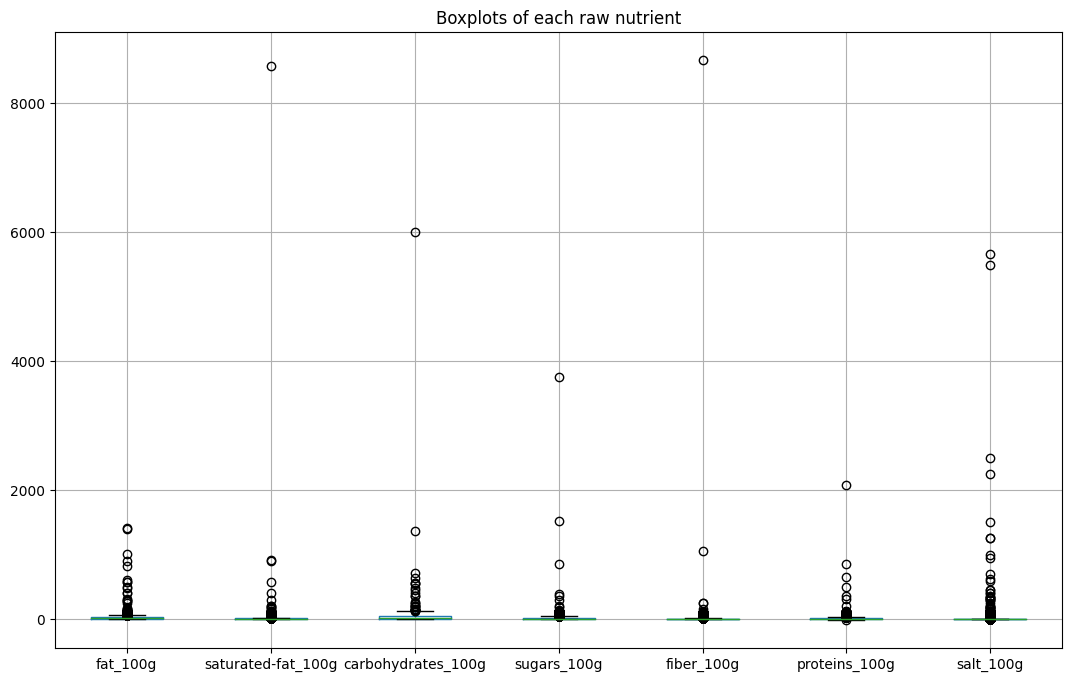

In [11]:
plt.figure(figsize=(13,8))
data.loc[:, nutrients_f].boxplot()
plt.title('Boxplots of each raw nutrient')
plt.show()

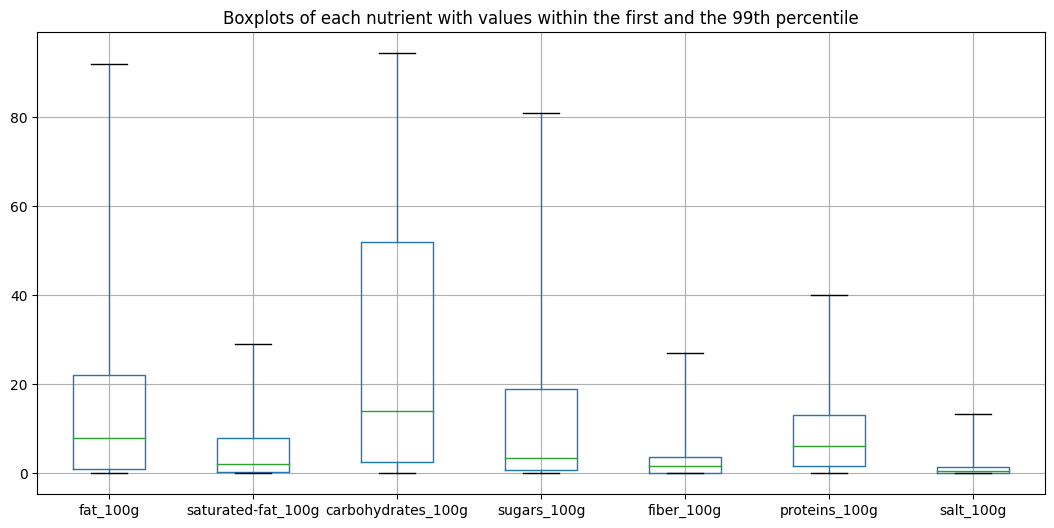

In [12]:
plt.figure(figsize=(13,6))
data.loc[:, nutrients_f].boxplot(showfliers=False, whis=(1,99))
plt.title('Boxplots of each nutrient with values within the first and the 99th percentile')
plt.show()

This confirm what we saw numerically right before. The quantity of nutrients outliers is very small regarding independent values. The main problem remains in missing values. 

Nevertheless, some inconsistency can be plotted. Let's draw some scatterplots to preview problems such as sugars > carbohydrates and saturated fat > fat. They will appear as being beyond the line $y=x$

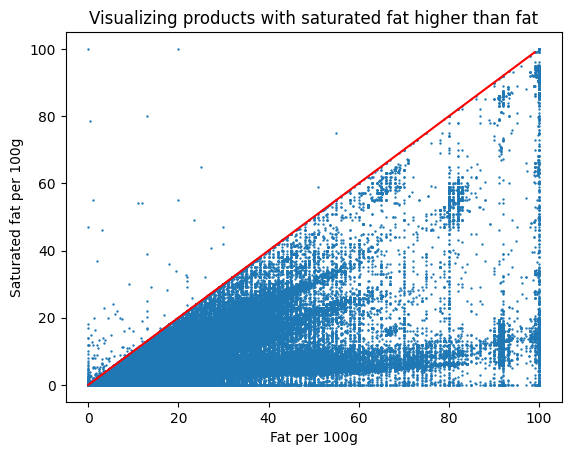

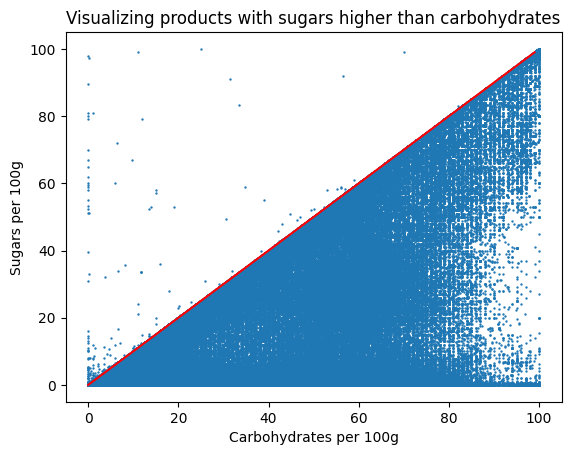

In [13]:
# Limiting the values between 0 and 100g
mask = ((data.fat_100g <= 100) 
        & (data.fat_100g >= 0)
        & (data['saturated-fat_100g'] <= 100)
        & (data['saturated-fat_100g'] >= 0))

x = data.loc[mask, 'fat_100g']
y = data.loc[mask, 'saturated-fat_100g']
plt.scatter(x=x, y=y, s=0.5)
plt.plot(np.arange(0,100), c='red', ms=0.2)
plt.title('Visualizing products with saturated fat higher than fat')
plt.xlabel('Fat per 100g')
plt.ylabel('Saturated fat per 100g')
plt.show()

mask = ((data.sugars_100g <= 100) 
        & (data.sugars_100g >= 0)
        & (data['carbohydrates_100g'] <= 100)
        & (data['carbohydrates_100g'] >= 0))

x = data.loc[mask, 'carbohydrates_100g']
y = data.loc[mask, 'sugars_100g']
plt.scatter(x=x, y=y, s=0.5)
plt.plot(np.arange(0,100), c='red', ms=0.2)
plt.title('Visualizing products with sugars higher than carbohydrates')
plt.xlabel('Carbohydrates per 100g')
plt.ylabel('Sugars per 100g')
plt.show()

## 6.4.  [&#9650;](#toc0_) <a id='toc6_4_'></a>Computing sugars mean values per group.

In [14]:
# From now on, I define 5 layers of classification.
cat_map = {'layer1': 'pnns_groups_1',
           'layer2': 'pnns_groups_2',
           'layer3': 'main_category',
           'layer4': 'second_most_specific_category',
           'layer5': 'most_specific_category'}

layers = ['layer' + str(i) for i in range(1,6)]

# And I group products by their different group layers
# computing the sugars_100g mean and the std, and keeping
# the group cardinal in memory.

# To avoid inconsistent sugars mean values (not robust to outliers),
# I compute the mean on products with no initial nutrients problems.

# Selecting products with no initial nutrients problems detected
# and sugars value available.
data_c = data.loc[(~data.initial_nutrients_problem) 
                  & data.sugars_available]

print(data_c.shape)

# Preparing the list of grouped_by dataframes for a later concat.
all_groups = []

for layer in layers:
    # Creating the grouped_by_layer_i dataframe
    df_name = 'grouped_by_' + layer
    exec(df_name
         + ' = data_c.groupby("' + cat_map[layer] + '")["sugars_100g"]'
         + '.agg([len, np.mean, np.std])')
    
    exec(df_name 
         + '''.rename(columns={'len': 'cardinal',
                               'mean': 'sugars_100g_mean'},
                      inplace=True)''')        
    
    exec(df_name
         + '''.sort_values('cardinal',
                           ascending=False,
                           inplace=True)''')
    
    # Resetting index with the same name 'category'
    # for all dataframe in a ephemera df so I can concatenate 
    # them in one unique dataframe containing all possible groups
    df = eval(df_name).copy()
    df.reset_index(inplace=True)
    df.rename(columns={cat_map[layer]: 'category'}, inplace=True)
    all_groups.append(df)
    display(eval(df_name).head(10))

(724107, 37)


cardinal  sugars_100g_mean        std
pnns_groups_1                                                 
sugary snacks               68990         38.122492  20.901868
fish meat eggs              54630          0.822458   2.072724
milk and dairy products     40612          6.914463   8.870788
cereals and potatoes        33194          5.307421   7.716672
composite foods             30287          3.700298   6.315448
beverages                   27077         12.478909  19.417165
fat and sauces              26140          5.775425  10.513655
fruits and vegetables       24256         15.509487  20.807590
salty snacks                21591          3.096405   5.194719
alcoholic beverages          1738          2.470689   7.566370

cardinal  sugars_100g_mean        std
pnns_groups_2                                              
biscuits and cakes       27755         29.816876  13.064919
sweets                   27370         49.516108  23.792114
one-dish meals           23424          2.406549   3.477119
processed meat           22939          0.882782   1.388553
cheese                   20119          0.871988   2.252623
dressings and sauces     17570          8.338952  11.785523
meat                     16047          0.765385   2.443267
cereals                  15640          3.075250   5.594645
fish and seafood         13184          0.671452   1.643100
vegetables               11237          4.628483   8.873222

cardinal  sugars_100g_mean        std
main_category                                                    
en:groceries                   17426          8.657822  12.599205
en:sweetened-beverages          4976         19.242245  24.934469
en:beverages                    3917          9.997307  16.200821
en:white-hams                   2876          0.661359   1.616470
en:biscuits                     2876         26.615066  11.693749
en:extra-virgin-olive-oils      2695          0.047652   1.275914
en:chicken-breasts              2470          0.423738   2.136295
en:candies                      2451         55.315586  27.917932
en:dark-chocolates              2362         29.388512  13.047081
en:unsweetened-beverages        1992          9.341364  18.064996

cardinal  sugars_100g_mean        std
second_most_specific_category                                       
sauces                             6428          7.443868  10.663105
poulets                            4153          0.395769   1.799402
chocolats                          3694         37.501083  14.749201
gâteaux                            3681         26.473622   8.949145
biscuits                           3529         28.568157  11.498760
biscuits et gâteaux                3367         29.904727  12.395369
confiseries                        3171         51.767025  28.514078
pains                              3165          3.994712   4.413134
jambons                            3152          0.666273   1.558131
pâtisseries                        2804         33.116479  20.793176

cardinal  sugars_100g_mean        std
most_specific_category                                             
boissons avec sucre ajouté        4352         20.172346  25.549902
boissons                          3651         10.110562  16.395228
jambons blancs                    2792          0.658942   1.638729
biscuits                          2532         27.004581  11.703739
huiles d'olive vierges extra      2440          0.066894   1.574585
filets de poulet                  2377          0.419282   2.136565
chocolats noirs                   2075         29.525491  12.845763
bonbons                           2019         54.987064  27.861901
en:labeled-cheeses                1882          0.328180   0.941368
boissons sans sucre ajouté        1780          9.750025  18.468871

In [15]:
grouped_by_layer5.head(30)

cardinal  sugars_100g_mean  \
most_specific_category                                                   
boissons avec sucre ajouté                      4352         20.172346   
boissons                                        3651         10.110562   
jambons blancs                                  2792          0.658942   
biscuits                                        2532         27.004581   
huiles d'olive vierges extra                    2440          0.066894   
filets de poulet                                2377          0.419282   
chocolats noirs                                 2075         29.525491   
bonbons                                         2019         54.987064   
en:labeled-cheeses                              1882          0.328180   
boissons sans sucre ajouté                      1780          9.750025   
protéines en poudre                             1235          3.598077   
en:raw-cured-ham                                1217          0.468744   
surgelés                                        1140         12.919895   
saumons fumés                                   1126          0.435898   
saucissons secs                                 1124          1.454537   
sauces                                          1108         10.114382   
confitures de fraises                           1089         49.592705   
moutardes                                       1067          5.199935   
madeleines                                      1067         26.694701   
rôtis de porc                                   1059          0.626449   
en:preparations-made-from-fish-meat             1050          1.660171   
chocolats au lait                               1024         48.183954   
biscuits apéritifs                               990          5.612774   
fromages                                         987          1.646703   
cuisses de poulet                                970          0.216532   
chipolatas                                       928          0.700783   
plats préparés à réchauffer au micro-ondes       923          1.914321   
panettone                                        870         26.007377   
mayonnaises                                      837          1.411488   
confitures d'abricot                             821         49.708371   

                                                  std  
most_specific_category                                 
boissons avec sucre ajouté                  25.549902  
boissons                                    16.395228  
jambons blancs                               1.638729  
biscuits                                    11.703739  
huiles d'olive vierges extra                 1.574585  
filets de poulet                             2.136565  
chocolats noirs                             12.845763  
bonbons                                     27.861901  
en:labeled-cheeses                           0.941368  
boissons sans sucre ajouté                  18.468871  
protéines en poudre                          3.510927  
en:raw-cured-ham                             0.485454  
surgelés                                    18.617166  
saumons fumés                                1.057583  
saucissons secs                              2.070897  
sauces                                      12.887274  
confitures de fraises                       12.566753  
moutardes                                    6.217297  
madeleines                                   6.334201  
rôtis de porc                                0.686378  
en:preparations-made-from-fish-meat          1.613774  
chocolats au lait                            8.860256  
biscuits apéritifs                           7.070481  
fromages                                     3.401186  
cuisses de poulet                            0.650925  
chipolatas                                   1.138085  
plats préparés à réchauffer au micro-ondes   1.596705  
panettone                                    5.2956

Nice information were extracted from the last column of the initial feature 'categories'!

(54550, 4)


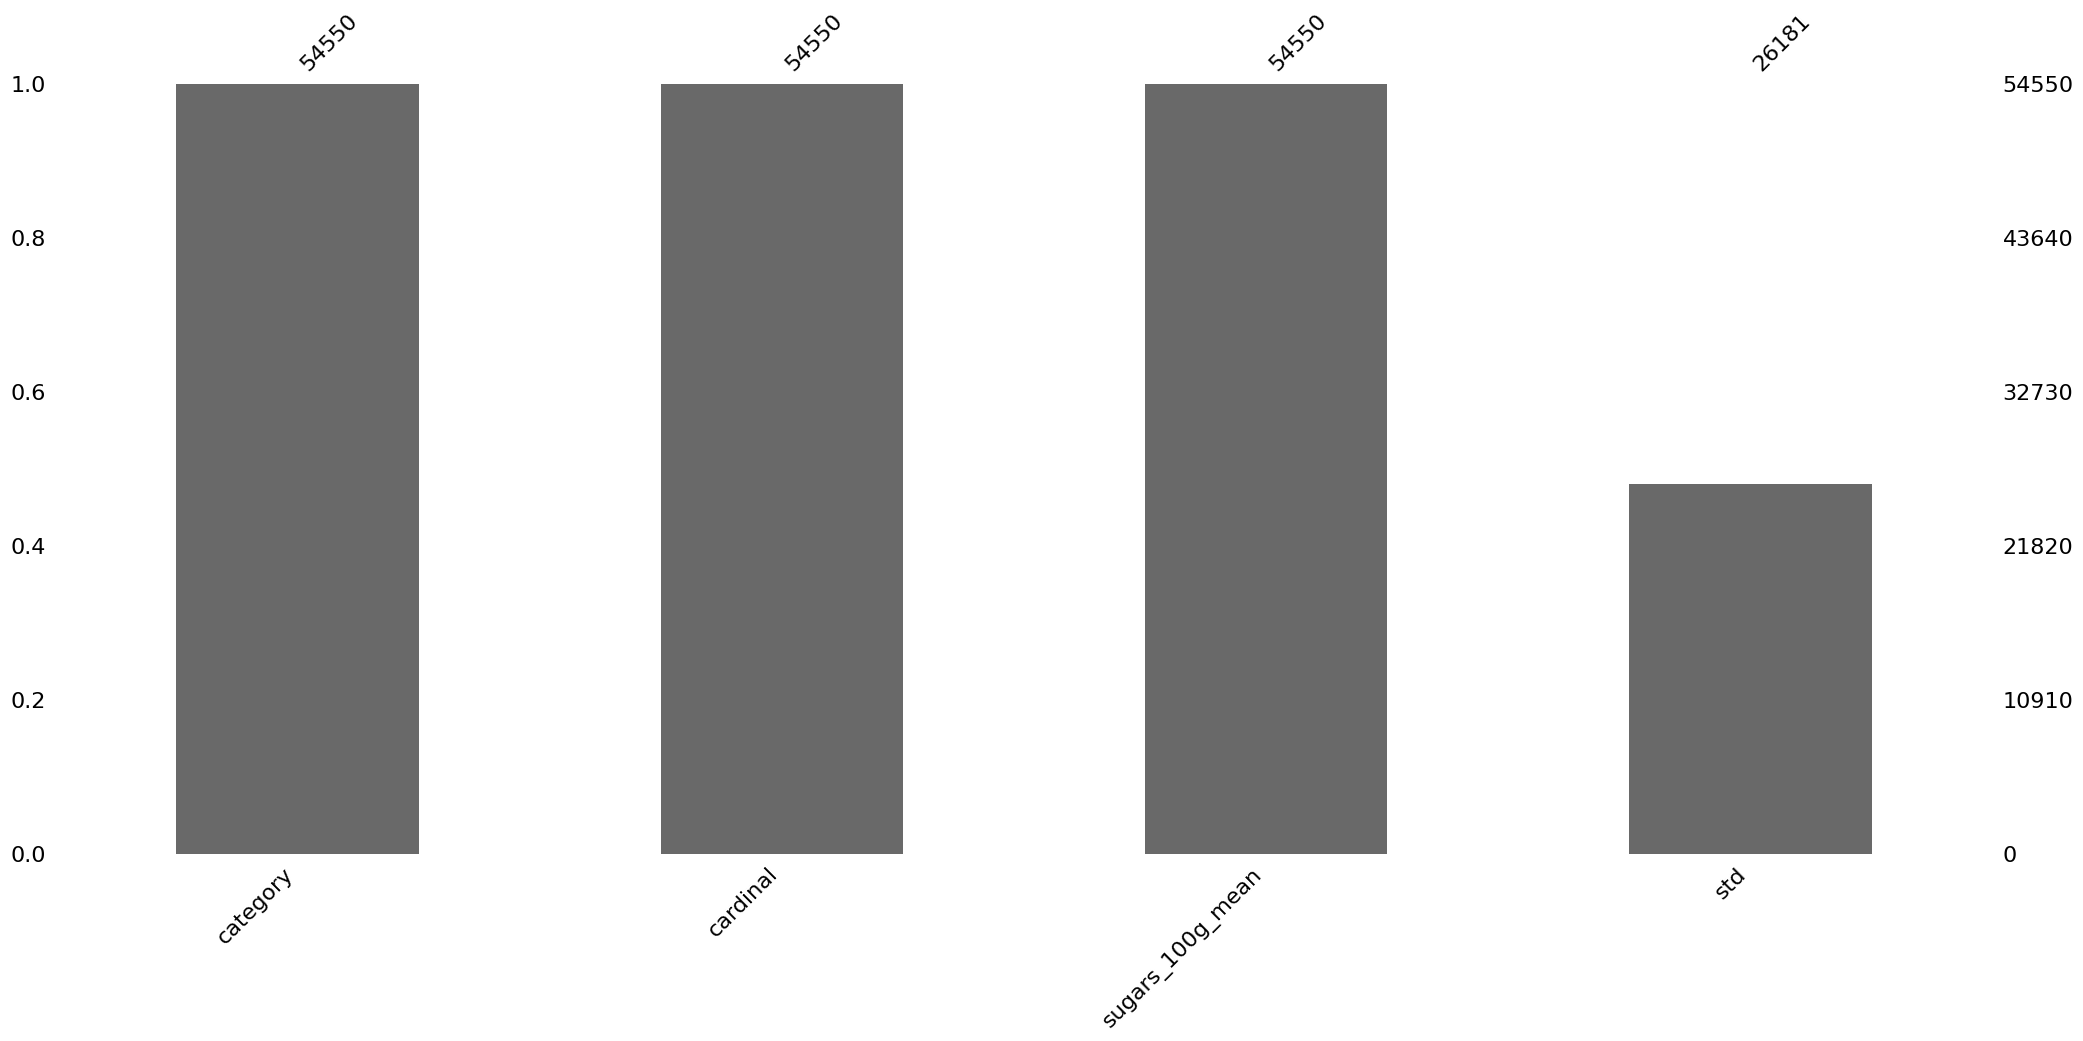

In [16]:
# Creating one dataframe with all groups from all layers.
food_groups = pd.concat(all_groups, axis='index', ignore_index=True) 
msno.bar(food_groups)
print(food_groups.shape)

In [17]:
food_groups.cardinal.value_counts()

1        28369
2         6255
3         3194
4         2079
5         1432
         ...  
1322         1
1323         1
1355         1
1413         1
68990        1
Name: cardinal, Length: 757, dtype: int64

- I see lots of groups with a low cardinal. 
- Some groups though, occurs more than once (duplicates). Thus, they could be merged.
- Many NaN in std because no value were returned for singletons.

### 6.4.1.  [&#9650;](#toc0_) <a id='toc6_4_1_'></a>Dealing with split groups (group name appearing in several layers)

In [18]:
# Copying duplicates for processing.
dup = food_groups.loc[food_groups
                      .duplicated('category', keep=False)].copy()
dup = dup.sort_values('category')
print(dup.shape)
dup.head(20)

(19399, 4)


category  cardinal  sugars_100g_mean        std
20863      100 % légumes         5          2.360000   0.973653
32261      100 % légumes        12          2.998333   1.346388
20823       aamiaismurot         5         10.100000   5.319774
35769       aamiaismurot         4         18.275000  12.045850
24250     aardappelchips         1          3.300000        NaN
48332     aardappelchips         1          0.600000        NaN
24234        ab 8. monat         1          8.300000        NaN
48326        ab 8. monat         1         14.800000        NaN
31267              abats        20          2.035000   4.333016
19231              abats        17          0.428824   0.616136
24216         abdijkazen         1          0.000000        NaN
38507         abdijkazen         2          0.050000   0.070711
18850           abricots        26         33.796154  16.733140
31676           abricots        16         30.893750  18.599587
29888  abricots au sirop        56         13.958750   3.132228
23682  abricots au sirop         2         13.000000   1.414214
28643      abricots secs       525         44.899905  12.078838
19029      abricots secs        21         36.076190   9.275824
32049     accompagnement        13          1.900000   1.469127
24375     accompagnement         1          3.500000        NaN

In [19]:
dup.tail(10)

category  cardinal  sugars_100g_mean        std
23892                тёмный шоколад         1          0.000000        NaN
38451                тёмный шоколад         2         22.500000  31.819805
21650  ферментирали млечни продукти         3          3.700000   1.044031
41343  ферментирали млечни продукти         1          2.400000        NaN
23823                          хляб         1          1.800000        NaN
37052                          хляб         3          1.980000   0.034641
23691                      шоколади         2         38.850000   5.444722
37000                      шоколади         3         51.100000   2.475884
38461                        بسكويت         2         10.500000   3.535534
21649                        بسكويت         3         26.976667  14.093851

In [20]:
dup.category.value_counts().head()

alcoholic beverages                 4
en:tortillas                        3
fr:saucissons-secs                  3
en:asparagus                        3
en:frozen-pre-fried-potato-cubes    3
Name: category, dtype: int64

In [21]:
(dup.category.value_counts() == 3).sum()

301

In [22]:
(dup.category.value_counts() == 2).sum()

9246

In [23]:
dup.isnull().mean()

category            0.000000
cardinal            0.000000
sugars_100g_mean    0.000000
std                 0.288572
dtype: float64

Among split groups: 

- There are :
    - 9246 groups split in 2;
    - 301 groups split in 3;
    - 1 group split in 4.
- NaN in std are for singletons. So there are 26% of singletons
- We see that duplicates often have a quite similar mean. 
  Lets group them by computing a weighted mean of duplicates and compute the population standard deviation of the group.

  Things are not that trivial for the latter :

  The formulae is given below (where $\mu_d$, $N_d$ and $\sigma_d$ are known and are characteristics of subgroups to be grouped).The proof can be found [here](https://stats.stackexchange.com/questions/25848/how-to-sum-a-standard-deviation)

  <img src="./images/formulae-std.png">

  I will use the same formulae substituting "N-1" by N when it occurs because I computed population standard deviation, and not the sample estimate. Proof remains correct and mostly the same.

  Let's illustrate that on 2 simple groups :

In [24]:
# Defining and computing mean and std on 2 groups 'a' and 'b'
a = np.array([0, 1, 5])
b = np.array([2, 10, -1, 3])
print(a)
print(b)

mu_a = a.mean()
mu_b = b.mean()
sig_a = a.std()
sig_b = b.std()
print(mu_a)
print(mu_b)
print(sig_a)
print(sig_b)

[0 1 5]
[ 2 10 -1  3]
2.0
3.5
2.160246899469287
4.031128874149275


In [25]:
# Grouping 
c = np.concatenate([a,b])
print(c)
mu_c = c.mean()
sig_c = c.std()
print(mu_c)
print(sig_c)


[ 0  1  5  2 10 -1  3]
2.857142857142857
3.4404555939406554


In [26]:
# Computing MU_calc and SIG_calc without knowing elements of a and b
# but having access to means and stds.
n_a = len(a)
n_b = len(b)
N = len(c)

MU_calc = (n_a*mu_a + n_b*mu_b) / (n_a+n_b)
print(MU_calc)
print(mu_c)

### 
def subgroup_contrib(n, mu, sig, MU):
    """ Compute the subgroup contribution in the sum
        under the square root, in the formulae to compute
        the standard deviation of a group made by concatenation
        knowing all parameters.
        
        n : subgroup cardinal
        mu : subgroup mean
        sig : subgroup standard deviation
        MU : group mean after concatenation.
        
    """
    return n * (sig**2 + (mu - MU)**2)

SIG_calc = np.sqrt((subgroup_contrib(n_a, mu_a, sig_a, mu_c)
                    + subgroup_contrib(n_b, mu_b, sig_b, mu_c))
                   / N)

print(SIG_calc)
print(sig_c)

2.857142857142857
2.857142857142857
3.4404555939406554
3.4404555939406554


I was convinced by the demonstration, and am even more convinced after the application.

I have a doubt of it working when one of the group only have one element, and thus a std of 0. 
Let's do the same with a group of cardinal 5 and a singleton.

In [27]:
a = np.arange(1,6)
b = np.array([3])
print(a)
print(b)

mu_a = a.mean()
mu_b = b.mean()
sig_a = a.std()
sig_b = b.std()
print(mu_a)
print(mu_b)
print(sig_a)
print(sig_b)

[1 2 3 4 5]
[3]
3.0
3.0
1.4142135623730951
0.0


In [28]:
c = np.concatenate([a,b])
print(c)
mu_c = c.mean()
sig_c = c.std()

# Computing MU_calc and SIG_calc without knowing elements of a and b
# but having access to means and stds.
n_a = len(a)
n_b = len(b)
N = len(c)

MU_calc = (n_a*mu_a + n_b*mu_b) / (n_a+n_b)
print(MU_calc)
print(mu_c)

SIG_calc = np.sqrt((subgroup_contrib(n_a, mu_a, sig_a, mu_c)
                    + subgroup_contrib(n_b, mu_b, sig_b, mu_c))
                   / N)

print(SIG_calc)
print(sig_c)

[1 2 3 4 5 3]
3.0
3.0
1.2909944487358058
1.2909944487358056


It also works perfectly, so I can impute NaN in std as 0 and do the maths!

In [29]:
dup.fillna(0, inplace=True)
dup.head(8)

category  cardinal  sugars_100g_mean        std
20863   100 % légumes         5          2.360000   0.973653
32261   100 % légumes        12          2.998333   1.346388
20823    aamiaismurot         5         10.100000   5.319774
35769    aamiaismurot         4         18.275000  12.045850
24250  aardappelchips         1          3.300000   0.000000
48332  aardappelchips         1          0.600000   0.000000
24234     ab 8. monat         1          8.300000   0.000000
48326     ab 8. monat         1         14.800000   0.000000

#### 6.4.1.1.  [&#9650;](#toc0_) <a id='toc6_4_1_1_'></a>First implementation

In [30]:
def subgroup_contrib(n, mu, sig, MU):
    """ Compute the subgroup contribution in the sum
        under the square root, in the formulae to compute
        the standard deviation of a group made by concatenation
        knowing all parameters.
        
        n : subgroup cardinal
        mu : subgroup mean
        sig : subgroup standard deviation
        MU : group mean after concatenation.
        
    """
    return n * (sig**2 + (mu - MU)**2)

feats = ['cardinal', 'sugars_100g_mean', 'std']
# Creating lists which will end having the same length
# as the number of groups in dup.
N = []
MU = []
SIG = [] 
names = []
for name, group in dup.groupby('category'):
    names.append(name)
    # Group cardinal
    N.append(group.cardinal.sum())
    # Weighted mean in the group
    MU.append((group.cardinal * group.sugars_100g_mean).sum() / N[-1])
    # Computing standard deviation of the group 
    numerator = 0
    for ind, row in group.iterrows():
        numerator += subgroup_contrib(*row[feats], MU[-1])
    SIG.append(np.sqrt((numerator) / N[-1]))

In [31]:
dup_processed = pd.DataFrame({
                              'cardinal': N,
                              'sugars_100g_mean': MU,
                              'std': SIG
                              },
                             index=names)

cardinal  sugars_100g_mean       std
100 % légumes         17          2.810588  1.281801
aamiaismurot           9         13.733333  9.834308
aardappelchips         2          1.950000  1.350000
ab 8. monat            2         11.550000  3.250000
abats                 37          1.297027  3.311162

(9548, 3)


category  cardinal  sugars_100g_mean        std
20863   100 % légumes         5          2.360000   0.973653
32261   100 % légumes        12          2.998333   1.346388
20823    aamiaismurot         5         10.100000   5.319774
35769    aamiaismurot         4         18.275000  12.045850
24250  aardappelchips         1          3.300000   0.000000
48332  aardappelchips         1          0.600000   0.000000
24234     ab 8. monat         1          8.300000   0.000000
48326     ab 8. monat         1         14.800000   0.000000
31267           abats        20          2.035000   4.333016
19231           abats        17          0.428824   0.616136

(19399, 4)


<AxesSubplot: >

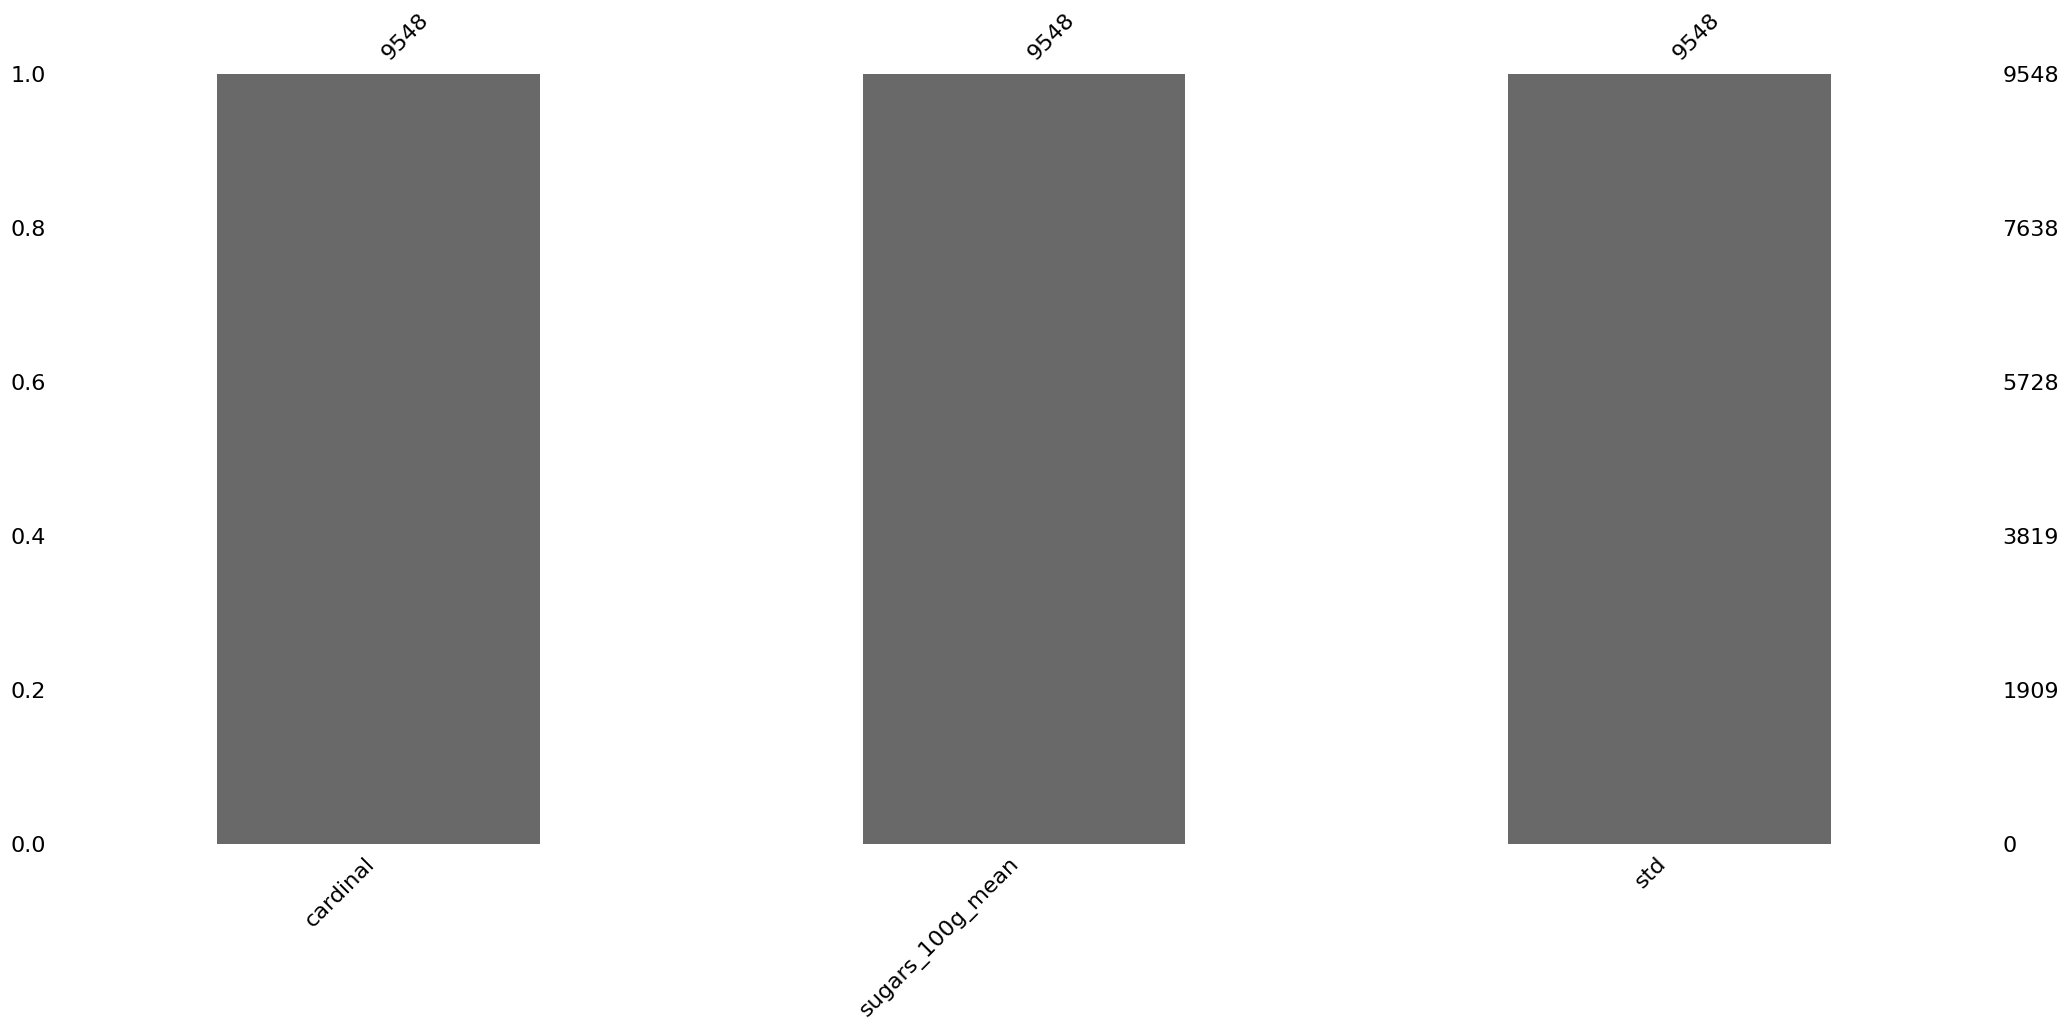

In [32]:
# Verifying :
display(dup_processed.head())
print(dup_processed.shape)
display(dup.head(10))
print(dup.shape)
msno.bar(dup_processed)

#### 6.4.1.2.  [&#9650;](#toc0_) <a id='toc6_4_1_2_'></a>Second implementation (faster)

In [33]:
### Trying to reach same info as before but working on columns 
# for faster computation time.

# Convention : UPPER case are indicators for the group stemming from
# concatenation of subgroups. 
# n : card;
# mu : mean;
# sig : population standard deviation. 

# Creating a function for weighted mean.
wm = lambda x : np.average(x, weights=dup2.loc[x.index, "cardinal"]).round(2)

# Computing N and MU
myagg = {'cardinal': ('cardinal','sum'),
         'sugars_100g_mean': ('sugars_100g_mean', wm)}
         
dup2 = dup.copy()
dup_g = dup2.groupby('category').agg(**myagg)
dup_g.head()

# Returning the info in dup2 with a map using a Series. 
dup2.loc[: , 'N'] = dup2.category.map(dup_g.cardinal)
dup2.loc[: , 'MU'] = dup2.category.map(dup_g.sugars_100g_mean)
display(dup2.head())

# Simple operations on dup2 columns
dup2.loc[:, 'sig_sq'] = dup2['std'] * dup2['std']
dup2.loc[:, 'MU-mu'] = dup2['MU'] - dup2['sugars_100g_mean']
dup2.loc[:, 'Mu-mu_sq'] = dup2['MU-mu'] * dup2['MU-mu']
dup2.loc[:, 'subgroup_contrib'] = dup2['cardinal'] * (dup2['sig_sq']
                                                      + dup2['Mu-mu_sq'])

# Returning to dup_g for subgroup contribution summing.
dup_g.loc[:, 'num_SIG'] = (dup2.groupby('category')['subgroup_contrib']
                           .sum())
dup_g.loc[:, 'std'] = np.sqrt((dup_g.num_SIG / dup_g.cardinal)).round(2)
dup_g.drop('num_SIG', axis=1, inplace=True)
display(dup_g.head())
print(dup_g.shape)

category  cardinal  sugars_100g_mean        std   N     MU
20863   100 % légumes         5          2.360000   0.973653  17   2.81
32261   100 % légumes        12          2.998333   1.346388  17   2.81
20823    aamiaismurot         5         10.100000   5.319774   9  13.73
35769    aamiaismurot         4         18.275000  12.045850   9  13.73
24250  aardappelchips         1          3.300000   0.000000   2   1.95

cardinal  sugars_100g_mean   std
category                                        
100 % légumes         17              2.81  1.28
aamiaismurot           9             13.73  9.83
aardappelchips         2              1.95  1.35
ab 8. monat            2             11.55  3.25
abats                 37              1.30  3.31

(9548, 3)


In [34]:
display(dup_processed.head())
print(dup_processed.shape)

cardinal  sugars_100g_mean       std
100 % légumes         17          2.810588  1.281801
aamiaismurot           9         13.733333  9.834308
aardappelchips         2          1.950000  1.350000
ab 8. monat            2         11.550000  3.250000
abats                 37          1.297027  3.311162

(9548, 3)


This second method was 4/5 times faster, but the first piece of code results better in readability according to me...


### 6.4.2.  [&#9650;](#toc0_) <a id='toc6_4_2_'></a>Final groups for sugars imputation

In [35]:
display(food_groups.head(2))
display(dup_g.head(2))

category  cardinal  sugars_100g_mean        std
0   sugary snacks     68990         38.122492  20.901868
1  fish meat eggs     54630          0.822458   2.072724

cardinal  sugars_100g_mean   std
category                                       
100 % légumes        17              2.81  1.28
aamiaismurot          9             13.73  9.83

In [36]:
# Same columns before concat.
dup_g = dup_g.reset_index()
display(dup_g.head(2))

category  cardinal  sugars_100g_mean   std
0  100 % légumes        17              2.81  1.28
1   aamiaismurot         9             13.73  9.83

In [37]:
# Substituting duplicates with processed duplicates
print(food_groups.shape)
food_groups = food_groups.drop_duplicates('category', keep=False)
print(food_groups.shape)
food_groups = pd.concat([food_groups, dup_g], axis=0)
print(food_groups.shape)
food_groups.head()

(54550, 4)
(35151, 4)
(44699, 4)


category  cardinal  sugars_100g_mean        std
0            sugary snacks     68990         38.122492  20.901868
1           fish meat eggs     54630          0.822458   2.072724
2  milk and dairy products     40612          6.914463   8.870788
4          composite foods     30287          3.700298   6.315448
6           fat and sauces     26140          5.775425  10.513655

<AxesSubplot: >

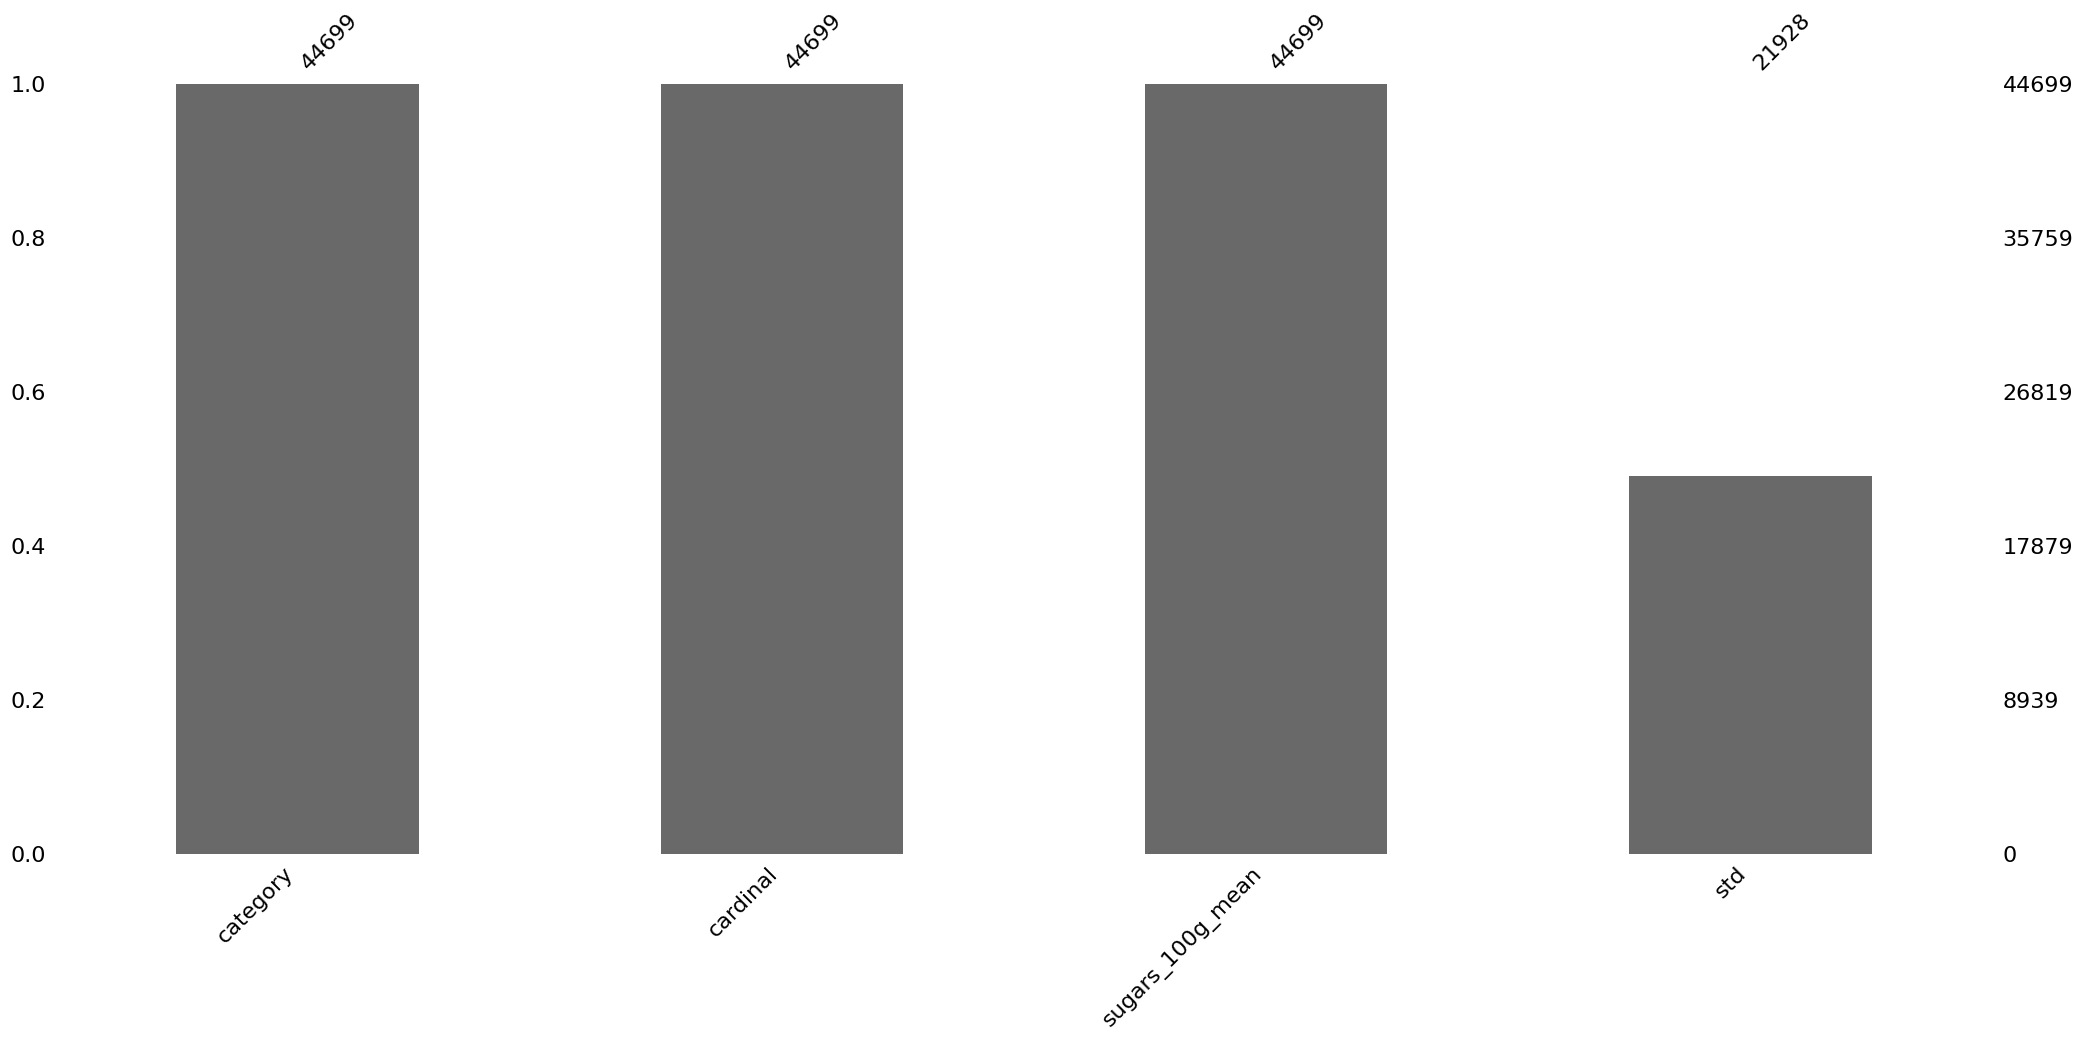

In [38]:
msno.bar(food_groups)

Now, there is no more split groups but there are still some very small groups. 

In [39]:
food_groups.cardinal.value_counts().head(10)

1     22771
2      5348
3      2500
4      1684
5      1192
6       867
7       731
8       562
9       478
10      388
Name: cardinal, dtype: int64

In [40]:
# Discarding very little groups
food_groups = food_groups.loc[food_groups.cardinal >= 3]
print(food_groups.shape)

# Rounding
food_groups.sugars_100g_mean = food_groups.sugars_100g_mean.round(2)
food_groups['std'] = food_groups['std'].round(2)

food_groups.to_csv('./csv_files/retained_food_groups.csv.gz',
                   index=False,
                   sep='\t',
                   compression='gzip')

(16580, 4)


In [41]:
food_groups = pd.read_csv('./csv_files/retained_food_groups.csv.gz',
                          sep='\t',
                          compression='gzip')

food_groups.set_index('category', inplace=True)

## 6.5.  [&#9650;](#toc0_) <a id='toc6_5_'></a>Groups exploration.

In this part, I try to understand groups better.

For that, I will watch what is inside groups with :
- std > 45
- std > 25 and card <20;
- cardinal > 5000
- cardinal > 20 and std>20.
- a name in pnns_group2 and high std

Those values were picked thanks to the following food groups properties overview.

### 6.5.1.  [&#9650;](#toc0_) <a id='toc6_5_1_'></a>Food groups properties

In [42]:
food_groups.head(50)

cardinal  sugars_100g_mean  \
category                                                                      
sugary snacks                                       68990             38.12   
fish meat eggs                                      54630              0.82   
milk and dairy products                             40612              6.91   
composite foods                                     30287              3.70   
fat and sauces                                      26140              5.78   
fruits and vegetables                               24256             15.51   
one-dish meals                                      23424              2.41   
processed meat                                      22939              0.88   
cheese                                              20119              0.87   
dressings and sauces                                17570              8.34   
meat                                                16047              0.77   
cereals                                             15640              3.08   
fish and seafood                                    13184              0.67   
vegetables                                          11237              4.63   
salty and fatty products                            10308              1.20   
milk and yogurt                                     10235              8.69   
chocolate products                                   9212             40.12   
bread                                                7234              4.17   
pizza pies and quiches                               4779             10.19   
ice cream                                            4507             23.33   
plant-based milk substitutes                         1866              4.22   
waters and flavored waters                           1213              0.39   
teas and herbal teas and coffees                      803              6.66   
fr:jambons-cuits-a-l-ancienne                         619              0.50   
en:duck-breasts                                       568              0.72   
en:bilberries-jams                                    514             49.77   
en:coconut-oils                                       454              0.16   
en:cherry-jams                                        454             50.78   
en:bars-covered-with-chocolate                        431             43.66   
en:tabbouleh                                          394              3.22   
en:salty-snacks-made-from-potato                      385              3.70   
en:chestnut-spreads                                   382             46.63   
en:ratatouille                                        345              3.95   
en:dry-biscuits                                       332             25.11   
en:vegetarian-patties                                 314              2.45   
en:fondants                                           313             77.83   
en:seasoned-grated-carrots                            308              5.27   
en:frozen-cakes-and-pastries                          307             26.53   
en:milk-chocolates-with-hazelnuts                     295             43.40   
en:lemon-juice                                        286              1.85   
en:maple-syrups                                       285             55.93   
en:marinated-anchovy-fillets-with-vegetable-oil       281              0.33   
en:devilled-pork-shoulder-in-mustard-sauce            268              0.51   
en:sunflower-seeds                                    264              2.93   
en:extruded-crispbreads                               258              4.80   
en:puff-pastry-sheets                                 255              1.79   
en:mixed-fruit-jams                                   253             48.93   
en:vanilla-ice-cream-tubs                             250             21.04   
en:dried-bananas                                      248             21.06   
en:filled-cereals   

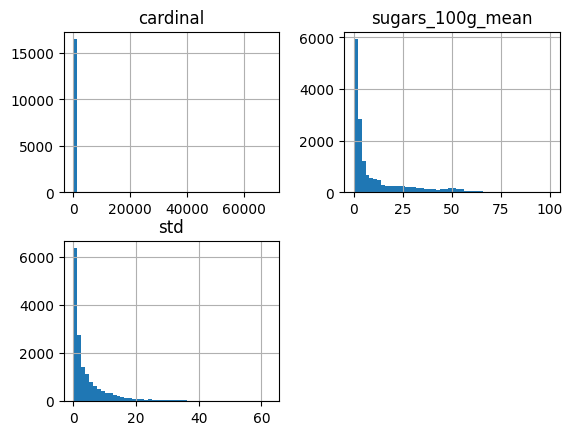

In [43]:
food_groups.hist(bins=50)
plt.show()

A very large majority of small groups

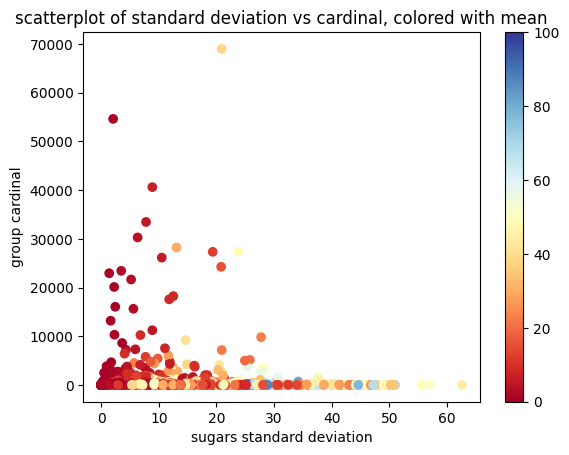

In [44]:
cm = plt.cm.get_cmap('RdYlBu')
sug = food_groups.sugars_100g_mean
dev = food_groups['std']
card = food_groups.cardinal
sc = plt.scatter(dev, card, c=sug, cmap=cm)
plt.colorbar(sc)
plt.xlabel('sugars standard deviation')
plt.ylabel('group cardinal')
plt.title('scatterplot of standard deviation vs cardinal, colored with mean')
plt.show()

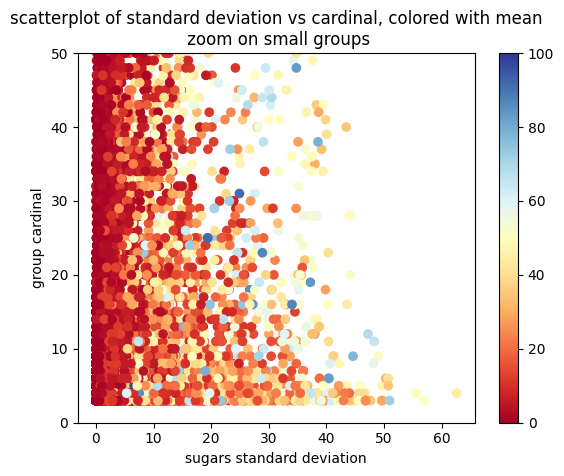

In [45]:
sc = plt.scatter(dev, card, c=sug, cmap=cm)
plt.ylim(ymax = 50, ymin = 0)
plt.colorbar(sc)
plt.title('scatterplot of standard deviation vs cardinal, colored with mean\n zoom on small groups')
plt.xlabel('sugars standard deviation')
plt.ylabel('group cardinal')
plt.show()

In [46]:
food_groups.sort_values('std', ascending=False).head(20)

cardinal  sugars_100g_mean    std
category                                                   
es:saborizantes                  4             44.25  62.58
siropes                          3             51.23  56.93
gelierzucker                     4             48.87  55.57
en:sucre                         3             72.57  50.95
miels du jura                    5             34.82  50.74
miels de tournesol               6             40.58  50.71
menthe poivrée                   6             32.27  50.29
gelatin                          3             28.70  49.62
thickeners                       3             28.70  49.62
flower honeys                    5             47.00  49.61
pastilles à la menthe            9             51.66  49.02
en:fructose                     11             65.27  48.27
fr:pastilles-a-la-menthe         8             58.10  48.16
fr:arômes pâtisserie             3             34.27  47.66
fructose                        12             68.17  47.20
en:inverted-sugar-syrups         3             27.00  46.77
es:miels-espagnols               3             25.00  46.77
sucres invertis                  3             27.00  46.77
en:sunflower-honeys              4             40.38  46.64
fr:miels-de-normandie            3             55.33  46.19

cardinal  sugars_100g_mean    std
category                                                   
en:fructose                     11             65.27  48.27
fr:pastilles-a-la-menthe         8             58.10  48.16
thickeners                       3             28.70  49.62
pastilles à la menthe            9             51.66  49.02
gelierzucker                     4             48.87  55.57
gelatin                          3             28.70  49.62
en:sucre                         3             72.57  50.95
es:saborizantes                  4             44.25  62.58
flower honeys                    5             47.00  49.61
menthe poivrée                   6             32.27  50.29
miels de tournesol               6             40.58  50.71
miels du jura                    5             34.82  50.74
siropes                          3             51.23  56.93

product_name pnns_groups_1          pnns_groups_2  \
20021                       NaN           NaN                    NaN   
102466                 Fructose           NaN                    NaN   
348728        Sirop d'agave bio           NaN                    NaN   
380813     Fructose cristallisé           NaN                    NaN   
380814  Fructose fin cristalisé           NaN                    NaN   
412601                 Fructose           NaN                    NaN   
470095                Délisucré           NaN                    NaN   
546383                 FRUCTOSE           NaN                    NaN   
726035  Super Smoothie Energise     beverages  unsweetened beverages   
728843                 Fructose           NaN                    NaN   
748008                 Fructose           NaN                    NaN   

       main_category second_most_specific_category most_specific_category  \
20021    en:fructose          édulcorants naturels               fructose   
102466   en:fructose          édulcorants naturels               fructose   
348728   en:fructose                sirops d'agave               fructose   
380813   en:fructose          édulcorants naturels               fructose   
380814   en:fructose          édulcorants naturels               fructose   
412601   en:fructose          édulcorants naturels               fructose   
470095   en:fructose          édulcorants naturels               fructose   
546383   en:fructose          édulcorants naturels               fructose   
726035   en:fructose                     smoothies               fructose   
728843   en:fructose          édulcorants naturels               fructose   
748008   en:fructose          édulcorants naturels               fructose   

        fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
20021        0.0                0.00               100.0        100.0   
102466       0.0                0.00               100.0        100.0   
348728       0.0                0.00                76.0          0.0   
380813       0.0                0.00               100.0        100.0   
380814       0.0                0.00               100.0        100.0   
412601       0.0                0.00               100.0        100.0   
470095       0.1                0.00                70.0          0.0   
546383       0.0                0.00               100.0        100.0   
726035       0.9                0.13                12.0         10.0   
728843       0.0                0.00               100.0        100.0   
748008       0.0                0.00                 8.0          8.0   

        fiber_100g  proteins_100g  salt_100g  
20021          0.0            0.0       0.00  
102466         0.0            0.0       0.00  
348728         NaN            0.0       0.00  
380813         NaN            0.0       0.00  
380814         0.0            0.0       0.00  
412601         0.0            0.0       0.00  
470095         0.0            0.0       0.40  
546383         0.0            0.0       0.00  
726035         0.5            0.6       0.00  
728843         NaN            0.0       0.01  
748008         0.0            0.0       0.00

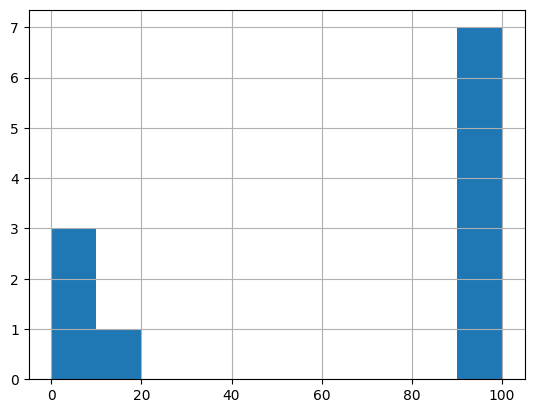

product_name  pnns_groups_1  \
94954                              Freedent mints  sugary snacks   
227257                      Pastilles à la menthe  sugary snacks   
515880                    Pastilles VALDA 115 ans            NaN   
716746                                Miel-Citron  sugary snacks   
827446  Tic tac menthe t4 t(33x4) pack de 4 etuis  sugary snacks   
827555        Tic Tac menthe x200 pastilles - 98g  sugary snacks   
841656               Tic Tac Menthe Extra Fraîche  sugary snacks   
893243                                   Natu-Hit  sugary snacks   

       pnns_groups_2             main_category second_most_specific_category  \
94954         sweets  fr:pastilles-a-la-menthe       chewing-gum sans sucres   
227257        sweets  fr:pastilles-a-la-menthe                       bonbons   
515880           NaN  fr:pastilles-a-la-menthe                           NaN   
716746        sweets  fr:pastilles-a-la-menthe                       bonbons   
827446        sweets  fr:pastilles-a-la-menthe                       bonbons   
827555        sweets  fr:pastilles-a-la-menthe                       bonbons   
841656        sweets  fr:pastilles-a-la-menthe                       bonbons   
893243        sweets  fr:pastilles-a-la-menthe                       bonbons   

       most_specific_category  fat_100g  saturated-fat_100g  \
94954   pastilles à la menthe       0.8                0.80   
227257  pastilles à la menthe       0.5                0.50   
515880  pastilles à la menthe       0.6                0.16   
716746  pastilles à la menthe       1.3                1.28   
827446  pastilles à la menthe       0.5                0.50   
827555  pastilles à la menthe       0.5                0.50   
841656  pastilles à la menthe       0.4                0.40   
893243  pastilles à la menthe       0.5                0.50   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
94954                96.70          0.0         NaN          0.000      0.000  
227257               96.00         88.0        0.60          0.000      0.075  
515880               39.70          0.0       46.20          0.900      0.080  
716746               95.31          0.1        1.47          0.004      0.001  
827446               97.50         94.5        0.00          0.100      0.028  
827555               97.50         94.5        0.00          0.100      0.028  
841656               97.00         90.7        0.00          0.100      0.022  
893243               98.00         97.0         NaN          0.500      0.050

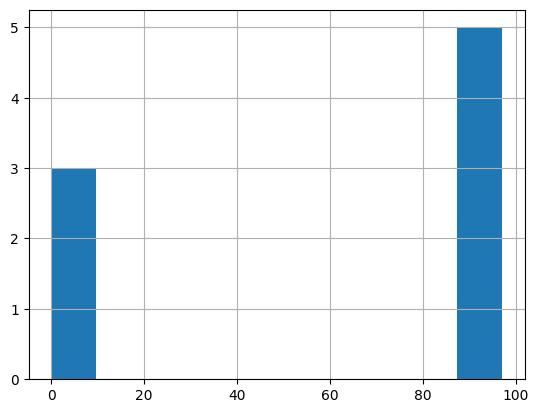

product_name pnns_groups_1 pnns_groups_2 main_category  \
8860     Jell-O Cherry           NaN           NaN    en:gelatin   
258356        gelatine           NaN           NaN    en:gelatin   
902827  Yaprak Jelatin           NaN           NaN    en:gelatin   

       second_most_specific_category most_specific_category  fat_100g  \
8860                      thickeners                gelatin       0.0   
258356                    thickeners                gelatin       0.1   
902827                    thickeners                gelatin       0.0   

        saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
8860                   0.0                86.0         86.0         NaN   
258356                 0.1                 0.1          0.1         0.1   
902827                 0.0                 0.0          0.0         NaN   

        proteins_100g  salt_100g  
8860              9.0        4.0  
258356           86.9        0.0  
902827           86.0        0.5

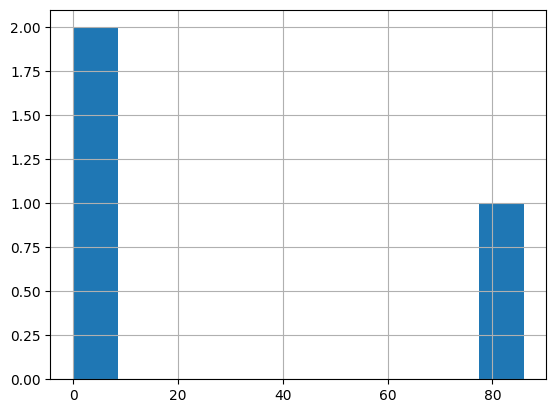

product_name  pnns_groups_1  \
10357                 Sugar free clear mint drops  sugary snacks   
94954                              Freedent mints  sugary snacks   
227257                      Pastilles à la menthe  sugary snacks   
515880                    Pastilles VALDA 115 ans            NaN   
716746                                Miel-Citron  sugary snacks   
827446  Tic tac menthe t4 t(33x4) pack de 4 etuis  sugary snacks   
827555        Tic Tac menthe x200 pastilles - 98g  sugary snacks   
841656               Tic Tac Menthe Extra Fraîche  sugary snacks   
893243                                   Natu-Hit  sugary snacks   

       pnns_groups_2             main_category second_most_specific_category  \
10357         sweets  en:pastilles-a-la-menthe                       candies   
94954         sweets  fr:pastilles-a-la-menthe       chewing-gum sans sucres   
227257        sweets  fr:pastilles-a-la-menthe                       bonbons   
515880           NaN  fr:pastilles-a-la-menthe                           NaN   
716746        sweets  fr:pastilles-a-la-menthe                       bonbons   
827446        sweets  fr:pastilles-a-la-menthe                       bonbons   
827555        sweets  fr:pastilles-a-la-menthe                       bonbons   
841656        sweets  fr:pastilles-a-la-menthe                       bonbons   
893243        sweets  fr:pastilles-a-la-menthe                       bonbons   

       most_specific_category  fat_100g  saturated-fat_100g  \
10357   pastilles à la menthe       0.0                0.00   
94954   pastilles à la menthe       0.8                0.80   
227257  pastilles à la menthe       0.5                0.50   
515880  pastilles à la menthe       0.6                0.16   
716746  pastilles à la menthe       1.3                1.28   
827446  pastilles à la menthe       0.5                0.50   
827555  pastilles à la menthe       0.5                0.50   
841656  pastilles à la menthe       0.4                0.40   
893243  pastilles à la menthe       0.5                0.50   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
10357                95.10          0.1        0.00          0.000      0.000  
94954                96.70          0.0         NaN          0.000      0.000  
227257               96.00         88.0        0.60          0.000      0.075  
515880               39.70          0.0       46.20          0.900      0.080  
716746               95.31          0.1        1.47          0.004      0.001  
827446               97.50         94.5        0.00          0.100      0.028  
827555               97.50         94.5        0.00          0.100      0.028  
841656               97.00         90.7        0.00          0.100      0.022  
893243               98.00         97.0         NaN          0.500      0.050

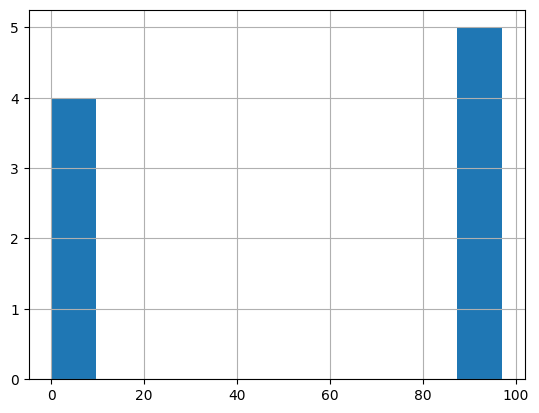

product_name  pnns_groups_1 pnns_groups_2  \
670292  Zucker - Gelierzucker 3:1  sugary snacks        sweets   
676100           3:1 Gelierzucker  sugary snacks        sweets   
699999           3:1 Gelierxucker  sugary snacks        sweets   
700001               Gelierzucker  sugary snacks        sweets   

              main_category second_most_specific_category  \
670292  fr:sucres-gelifiant                        zucker   
676100  fr:sucres-gelifiant                        zucker   
699999  fr:sucres-gelifiant                        zucker   
700001  fr:sucres-gelifiant                        zucker   

       most_specific_category  fat_100g  saturated-fat_100g  \
670292           gelierzucker       0.3                 NaN   
676100           gelierzucker       0.5                 0.1   
699999           gelierzucker       0.0                 0.0   
700001           gelierzucker       0.0                 0.0   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
670292                97.0         97.0         NaN            NaN        NaN  
676100                97.0         97.0         NaN            0.0       0.08  
699999                97.0          0.9         NaN            0.0        NaN  
700001                98.0          0.6         NaN            0.0        NaN

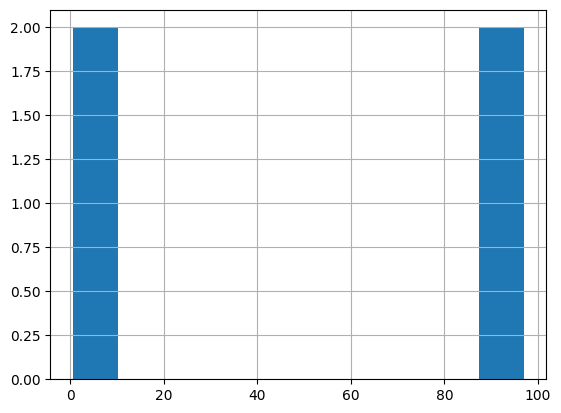

product_name pnns_groups_1 pnns_groups_2 main_category  \
8860     Jell-O Cherry           NaN           NaN    en:gelatin   
258356        gelatine           NaN           NaN    en:gelatin   
902827  Yaprak Jelatin           NaN           NaN    en:gelatin   

       second_most_specific_category most_specific_category  fat_100g  \
8860                      thickeners                gelatin       0.0   
258356                    thickeners                gelatin       0.1   
902827                    thickeners                gelatin       0.0   

        saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
8860                   0.0                86.0         86.0         NaN   
258356                 0.1                 0.1          0.1         0.1   
902827                 0.0                 0.0          0.0         NaN   

        proteins_100g  salt_100g  
8860              9.0        4.0  
258356           86.9        0.0  
902827           86.0        0.5

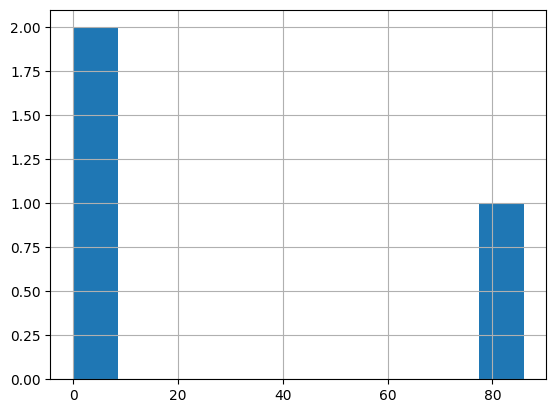

product_name pnns_groups_1 pnns_groups_2 main_category  \
430057  Pétillant pomme framboise           NaN           NaN      en:sucre   
910902                        NaN           NaN           NaN      en:sucre   

       second_most_specific_category most_specific_category  fat_100g  \
430057                   en:boissons               en:sucré       0.0   
910902                           NaN               en:sucre       0.0   

        saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
430057                 0.0                19.8         18.1         0.5   
910902                 0.0                99.8         99.8         NaN   

        proteins_100g  salt_100g  
430057            1.0        0.0  
910902            0.0        0.0

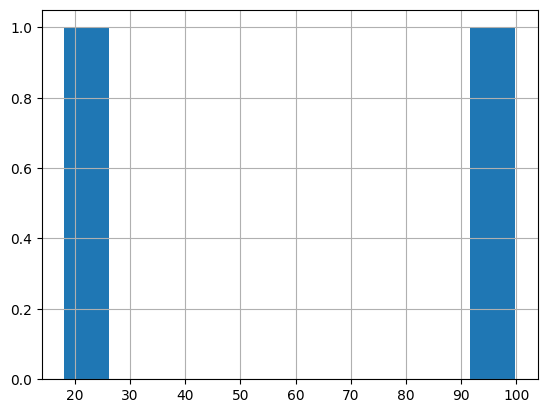

product_name pnns_groups_1 pnns_groups_2    main_category  \
669159  Erdbeer Geschmack           NaN           NaN  es:saborizantes   
767409                H2O           NaN           NaN  es:saborizantes   

       second_most_specific_category most_specific_category  fat_100g  \
669159                           NaN        es:saborizantes       0.0   
767409                           NaN        es:saborizantes       0.0   

        saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
669159                 0.0                93.0         88.5         NaN   
767409                 0.0                 0.0          0.0         0.0   

        proteins_100g  salt_100g  
669159            0.0        0.0  
767409            0.0        0.0

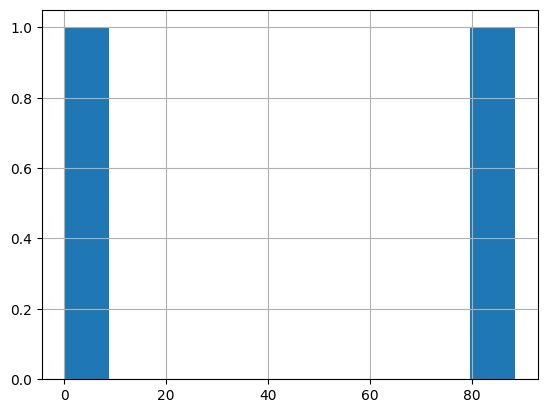

product_name  pnns_groups_1 pnns_groups_2  \
112687                              Miel liquide  sugary snacks        sweets   
126718  Salat Box Hänchenbrust mit Senf Dressing  sugary snacks        sweets   
470136                    Miel de fleurs crémeux  sugary snacks        sweets   
750387                     Miel de fleurs - Meli  sugary snacks        sweets   
915160                    Miel toutes fleurs Bio  sugary snacks        sweets   

             main_category second_most_specific_category  \
112687    en:liquid-honeys                 flower honeys   
126718  es:miels-espagnols                 flower honeys   
470136    en:flower-honeys                        honeys   
750387    en:flower-honeys                        honeys   
915160    en:flower-honeys                        honeys   

       most_specific_category  fat_100g  saturated-fat_100g  \
112687          liquid honeys       0.1                 0.1   
126718     es:miels-espagnols       6.8                 0.0   
470136          flower honeys       NaN                 NaN   
750387          flower honeys       0.1                 0.0   
915160          flower honeys       0.0                 0.0   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
112687                75.1         75.1         0.2            0.4      0.010  
126718                 8.5          0.0         0.0            3.8      0.000  
470136                 NaN          0.1         0.1            NaN        NaN  
750387                79.3         79.3         NaN            0.5      0.015  
915160                80.5         80.5         NaN            0.4      0.000

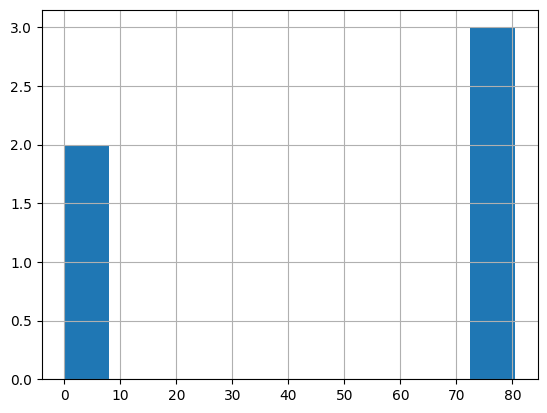

product_name  pnns_groups_1 pnns_groups_2  \
595670               Menthe poivrée            NaN           NaN   
636448  Infusion Bio Menthe Poivrée            NaN           NaN   
777668   Peppermint menthe infusion            NaN           NaN   
813205           Larry's peppermint            NaN           NaN   
909003                    Pepermunt  sugary snacks        sweets   
926415                DF peppermint            NaN           NaN   

        main_category second_most_specific_category most_specific_category  \
595670   en:groceries                        menthe         menthe poivrée   
636448   en:groceries          infusions en sachets         menthe poivrée   
777668   en:groceries                menthe poivrée        thés en sachets   
813205   en:groceries                        menthe         menthe poivrée   
909003  en:peppermint                        menthe         menthe poivrée   
926415   en:groceries                        menthe         menthe poivrée   

        fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
595670       0.1                 0.1                 0.1          0.1   
636448       0.0                 0.0                 0.2          0.0   
777668       0.0                 0.0                 0.0          0.0   
813205       1.0                 1.0                98.0          0.5   
909003       0.6                 0.6                99.0         99.0   
926415       0.0                 0.0                94.0         94.0   

        fiber_100g  proteins_100g  salt_100g  
595670         NaN            0.1        0.1  
636448         0.0            0.1        0.0  
777668         NaN            0.0        NaN  
813205         NaN            0.5        0.1  
909003         0.0            0.0        0.0  
926415         0.0            0.6        0.0

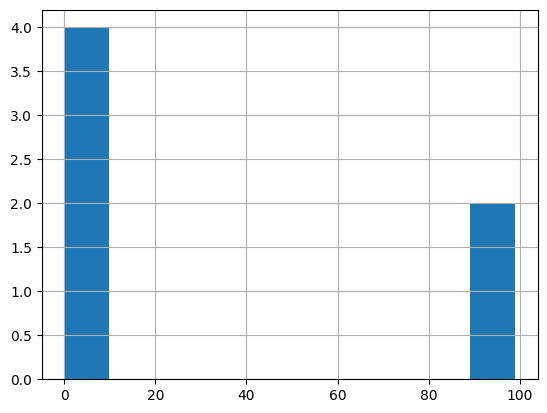

product_name  pnns_groups_1 pnns_groups_2  \
458625                 Miel Tournesol  sugary snacks        sweets   
600750     - Miel Cremeux (Tournesol)  sugary snacks        sweets   
644677  Miel de tournesol de touraine  sugary snacks        sweets   
654487              Miel de tournesol  sugary snacks        sweets   
663005              miel de tournesol  sugary snacks        sweets   
849393                 Miel Tournesol  sugary snacks        sweets   

              main_category second_most_specific_category  \
458625  en:sunflower-honeys                         miels   
600750     fr:miels-cremeux            miels de tournesol   
644677  en:sunflower-honeys                         miels   
654487  en:sunflower-honeys                         miels   
663005     fr:miel-d-ariege            miels de tournesol   
849393  en:sunflower-honeys                         miels   

       most_specific_category  fat_100g  saturated-fat_100g  \
458625     miels de tournesol       0.0                 0.0   
600750          miels crémeux       3.0                 3.0   
644677     miels de tournesol       NaN                 0.0   
654487     miels de tournesol       NaN                 0.0   
663005          miel-d-ariege       0.0                 0.0   
849393     miels de tournesol       0.0                 0.0   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
458625                81.0         79.0         NaN            0.0       0.01  
600750                32.0          0.0         0.0           32.0       0.00  
644677                 NaN          0.0         NaN            NaN        NaN  
654487                 NaN          0.0         NaN            NaN        NaN  
663005                82.0         82.0         0.2            0.3       4.00  
849393                82.5         82.5         0.0            0.3       0.00

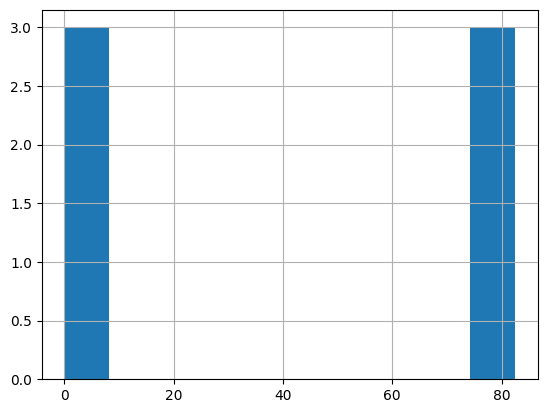

product_name  pnns_groups_1 pnns_groups_2  \
465800                    Miel du Jura  sugary snacks        sweets   
509169  Miel fleurs montagne Haut Jura  sugary snacks        sweets   
521241           Miel de sapin du Jura  sugary snacks        sweets   
603140                    Miel du Jura  sugary snacks        sweets   
813311           Miel du Jura Francais  sugary snacks        sweets   

                       main_category second_most_specific_category  \
465800  en:honeys-from-the-mountains                 miels du jura   
509169  en:honeys-from-the-mountains                 miels du jura   
521241                 en:fir-honeys                 miels du jura   
603140           en:honeys-from-jura                miels français   
813311           en:honeys-from-jura                miels français   

       most_specific_category  fat_100g  saturated-fat_100g  \
465800      miels de montagne       1.0                1.00   
509169      miels de montagne       0.0                0.00   
521241         miels de sapin       0.0                0.00   
603140          miels du jura       NaN                0.00   
813311          miels du jura       0.5                0.12   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
465800                 1.0         0.00         NaN            1.0        NaN  
509169                82.4        10.00         NaN            0.3        0.0  
521241                82.4        82.12         NaN            0.3        0.0  
603140                 NaN         0.00         NaN            NaN        NaN  
813311                82.0        82.00         0.0            0.5        0.0

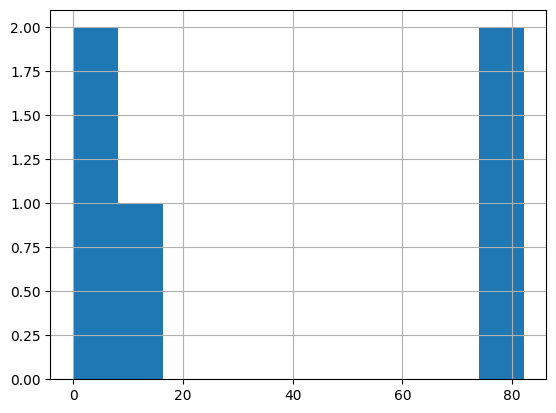

product_name pnns_groups_1 pnns_groups_2            main_category  \
161099    Sirope de coco           NaN           NaN                en:syrups   
767256  Maple syrup zero           NaN           NaN                en:syrups   
880867             menta           NaN           NaN  es:sirops-traditionnels   

       second_most_specific_category most_specific_category  fat_100g  \
161099                           NaN                siropes       0.1   
767256                           NaN                siropes       0.0   
880867                       siropes   sirops traditionnels       0.0   

        saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
161099                 0.0               100.0        100.0         0.0   
767256                 0.0                 5.3          1.4         NaN   
880867                 0.0                52.3         52.3         NaN   

        proteins_100g  salt_100g  
161099            0.0       0.00  
767256            0.0       0.22  
880867            0.0       0.03

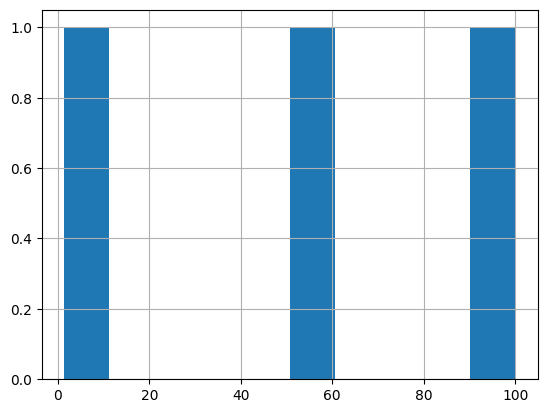

In [47]:
# Displaying dfs and histograms of high std groups 
# to investigate the problems.
high_std = food_groups.loc[food_groups['std'] > 48]
display(high_std)

groups_f = ['pnns_groups_1',
            'pnns_groups_2',
            'main_category',
            'second_most_specific_category',
            'most_specific_category']

nutrients_f = ['fat_100g',
               'saturated-fat_100g',
               'carbohydrates_100g',
               'sugars_100g',
               'fiber_100g',
               'proteins_100g',
               'salt_100g']

feats = ['product_name']
feats.extend(groups_f)
feats.extend(nutrients_f)

all_layers = data_c[groups_f]
for name in high_std.index:
    df = data_c[feats].loc[(all_layers == name).any(axis=1)]
    display(df)
    df.sugars_100g.hist()
    plt.show()

Those groups are mainly evoking sugars, sugar-derivatives, and honeys (or sweets). 

- May be I went too specific at some point and it could be interesting to delete specific groups with low cardinal and high std. The product will hopefully fall in a category in a less specific layers with a lower std.

- I see many products with the sum of nutrients close to 0... that is a problem I had not thought of when labeling nutrients problems.
Though, water for example as no nutrients such as fat, carbohydrates, fiber etc...
As a solution, I could filter in categories instead of doing something general, applying the following rules: 
    - I sum the 5 principal nutrients for all products.
    - within a group, I search for outliers on that sum.
    - I mark the product as having a nutrient problem or a category problem

- Indeed : "an outlier can have the right nutrients values but can be in the wrong categories..." example : 

(35, 3)


cardinal  sugars_100g_mean    std
category                                                   
sweetened beverages           9813             22.85  27.75
vegetables                   11237              4.63   8.87
salty and fatty products     10308              1.20   2.30
fish and seafood             13184              0.67   1.64
salty snacks                 21656              3.10   5.19
appetizers                    7315              3.92   5.92
bread                         7234              4.17   4.31
processed meat               22939              0.88   1.39
fats                          8609              0.57   3.63
cereals                      15640              3.08   5.59

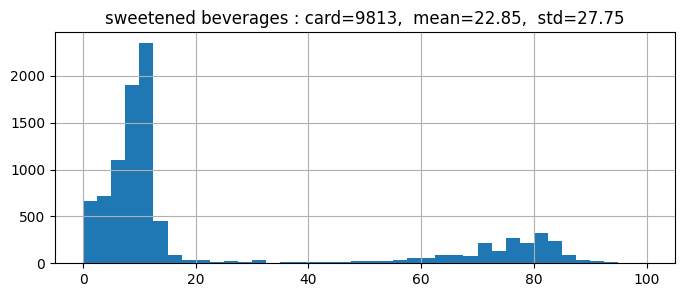

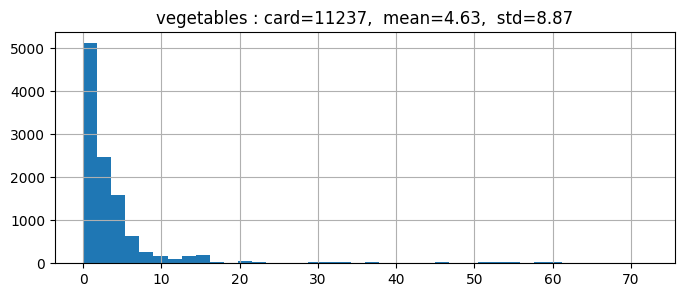

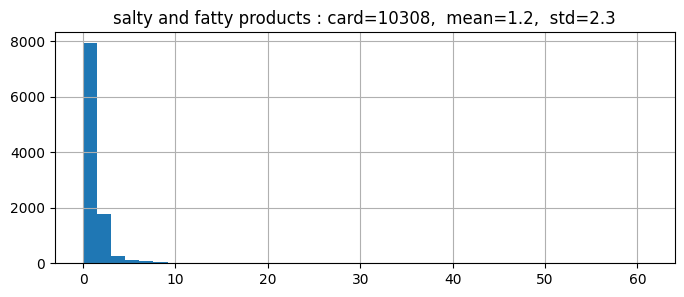

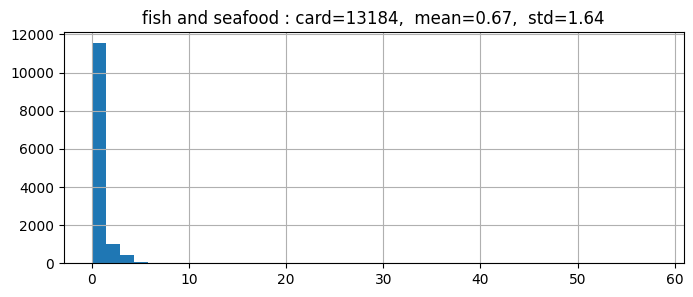

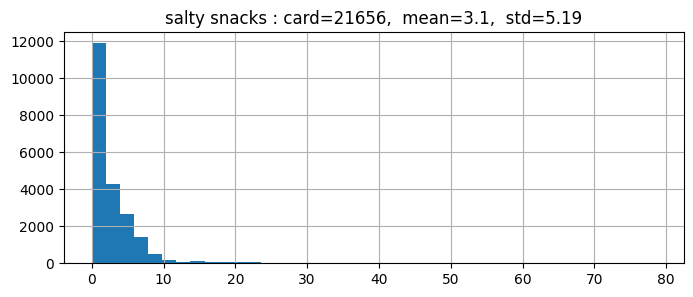

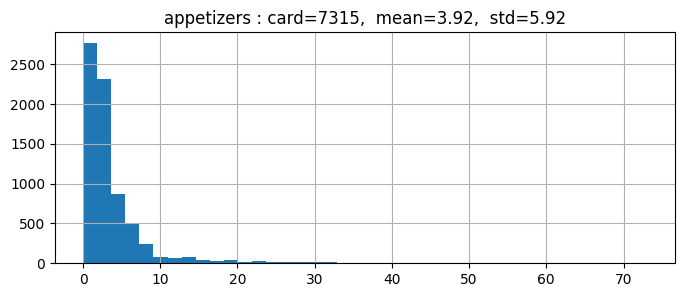

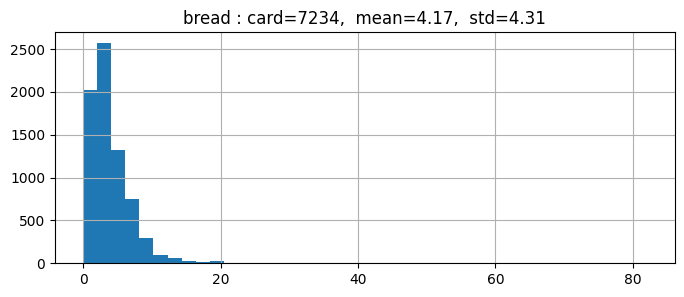

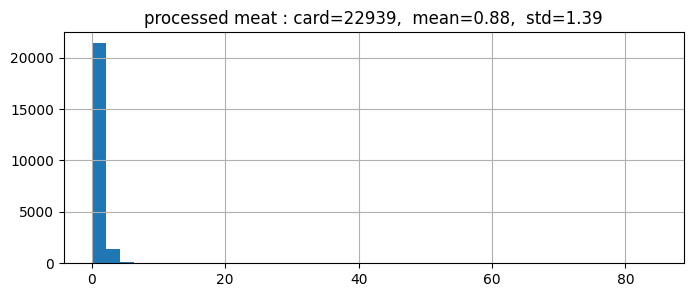

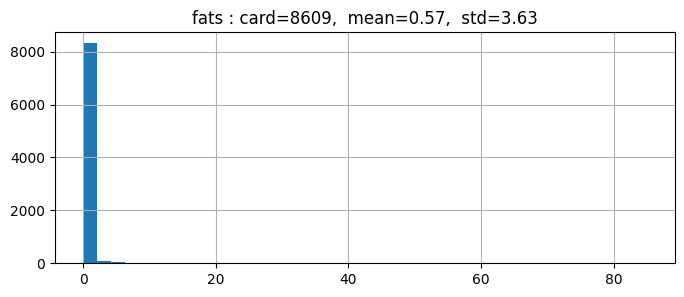

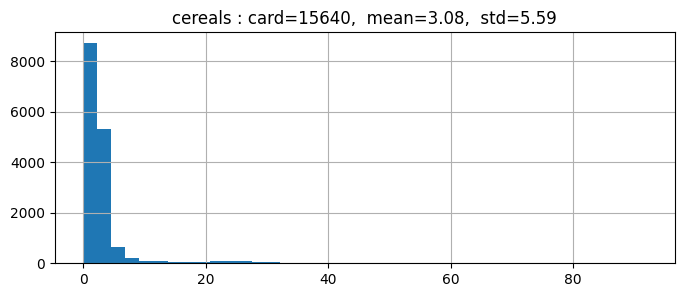

In [48]:
# Plotting hist in groups with high cardinals

# Choosing randomly 10 groups with a cardinal > 5000
high_card = food_groups.loc[food_groups['cardinal'] > 5000]
print(high_card.shape)
high_card = high_card.sample(10)
display(high_card)

for name in high_card.index:
    df = data_c[feats].loc[(all_layers == name).any(axis=1)]
    #display(df)
    plt.figure(figsize=(8,3))
    df.sugars_100g.hist(bins=40)
    plt.title(
                f'{name} :'
                f' card={high_card.loc[name, "cardinal"]}, '
                f' mean={high_card.loc[name, "sugars_100g_mean"].round(2)}, '
                f' std={high_card.loc[name, "std"].round(2)}'
              )

    plt.show()


(189, 3)
Index(['en:maple-syrups', 'en:plant-based-pates', 'en:strawberry-syrups',
       'en:lemon-syrups', 'en:caster-sugars', 'en:chestnut-honey',
       'en:sugary-cooking-helpers', 'en:honeys-from-the-mountains',
       'en:peach-syrups', 'fr:bonbons-a-la-menthe',
       ...
       'syrups', 'süsswaren', 'thés au citron', 'vermicelles', 'xylitol',
       'zucker', 'édulcorants', 'édulcorants artificiels',
       'édulcorants de table', 'édulcorants naturels'],
      dtype='object', name='category', length=189)


cardinal  sugars_100g_mean    std
category                                                 
en:cane-sugar                133             89.30  27.91
miels d'agrumes               78             52.01  36.30
en:licensed-products         406             38.06  26.61
en:blackcurrant-syrups        57             62.74  30.97
miels d'eucalyptus            28             55.68  35.99
vermicelles                   35             47.18  36.32
sirops d'orange               52             54.74  29.61
miels de montagne             82             38.43  39.83
en:acacia-honeys             187             47.68  37.61
en:food-decorations           38             66.42  29.07

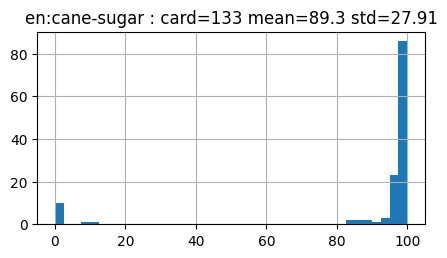

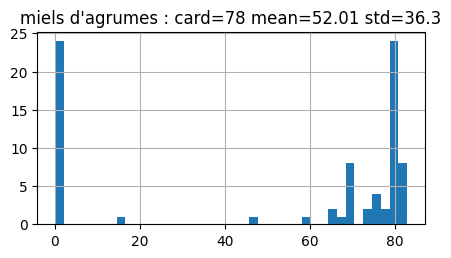

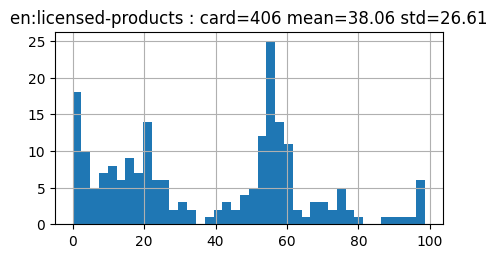

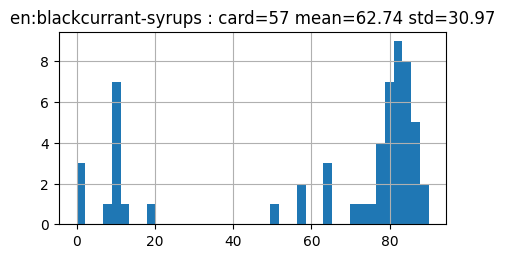

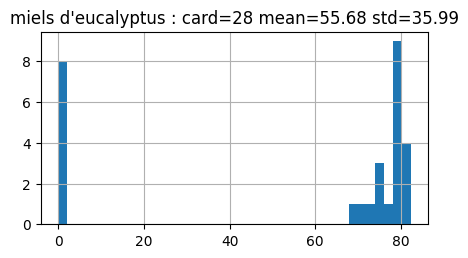

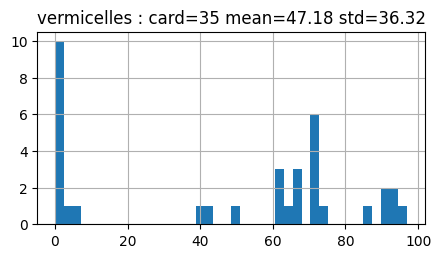

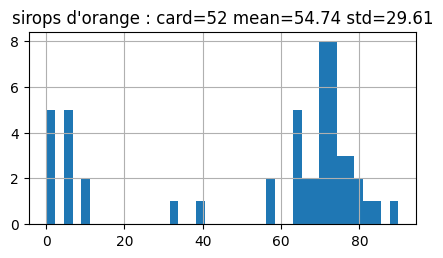

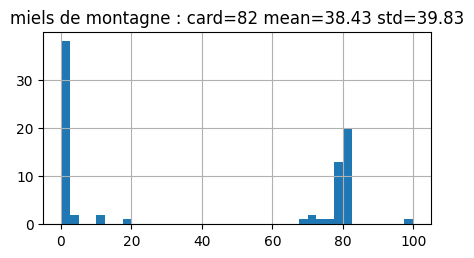

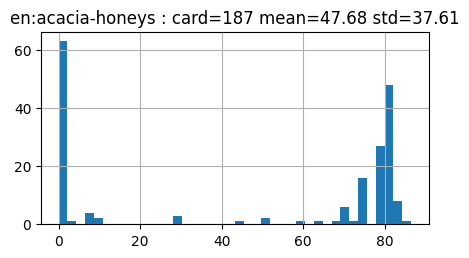

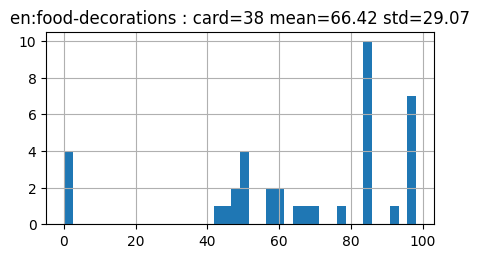

In [49]:
# Plotting hist in groups with card > 20 and std > 25

# Choosing randomly 10 groups. 
mydf = food_groups.loc[(food_groups['cardinal'] > 20) 
                       & (food_groups['std'] > 25)]
print(mydf.shape)
print(mydf.index)
mydf = mydf.sample(10)
display(mydf)

for name in mydf.index:
    df = data_c[feats].loc[(all_layers == name).any(axis=1)]
    #display(df)
    plt.figure(figsize=(5,2.5))
    df.sugars_100g.hist(bins=40)
    plt.title(
                f'{name} :'
                f' card={mydf.loc[name, "cardinal"]}'
                f' mean={mydf.loc[name, "sugars_100g_mean"].round(2)}'
                f' std={mydf.loc[name, "std"].round(2)}'
              )

    plt.show()

(329, 3)
['en:vanillin-sugars', 'en:mixes-for-dessert-creams', 'en:edulcorants', 'en:natural-sugar-substitutes', 'en:muskmelons', 'en:cocoa-powder-for-beverages-with-sugar', 'en:syrups-with-fruits', 'en:mint-teas', 'fr:pastilles', 'en:pates-a-tartiner-vegetales', 'en:mojito-syrups', 'fr:sirops-de-coquelicot', 'en:dried-plant-based-foods', 'en:fir-honeys', 'fr:miels-de-provence', 'en:blueberry-syrups', 'fr:preparations-pour-desserts-lactes', 'fr:sucres-gelifiant', 'fr:aromes-patisserie', 'fr:entremets', 'en:heather-honeys', 'fr:concentres', 'en:fructose', 'en:syrup-with-sugar-to-be-diluted', 'en:honey-of-corsica', 'en:mango-syrups', 'fr:miels-du-gatinais', 'fr:sirops-de-coco', 'fr:sirops-de-concombre', 'fr:sirops-de-litchi', 'fr:miels-des-pyrenees', 'en:kumquats', 'fr:sirops-de-cannelle', 'en:dietary-drink-for-sport', 'fr:pastilles-a-la-menthe', 'en:bee-products', 'en:whey-powder', 'fr:coulis', 'en:nutritional-yeast', 'en:amber-maple-syrups', 'fr:puree-de-piment-rouge', 'nl:plantbased-g

cardinal  sugars_100g_mean    std
category                                                     
aufstrich                          3             17.00  25.65
en:sirops-de-grenadine             5             30.70  36.71
fr:miels-de-normandie              3             55.33  46.19
en:bee-products                    8             57.22  33.25
es:saborizantes                    4             44.25  62.58
pastilles à la menthe              9             51.66  49.02
en:crystallized-ginger             7             70.01  29.73
frucht-sirup                       4             58.75  38.06
miels de garrigue                 19             50.34  35.58
en:dietary-drink-for-sport         8             14.16  27.88

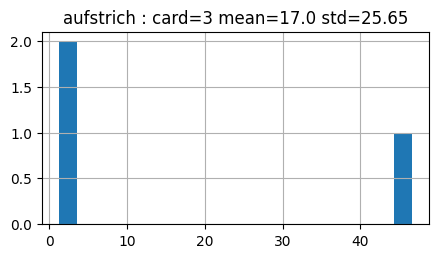

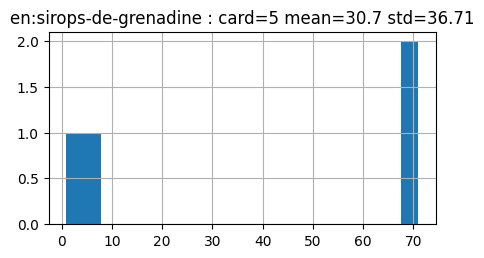

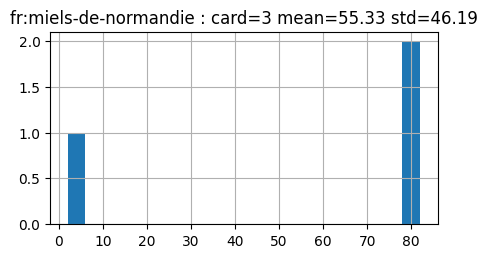

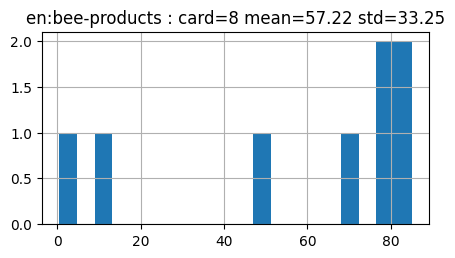

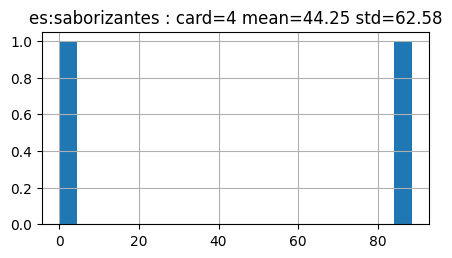

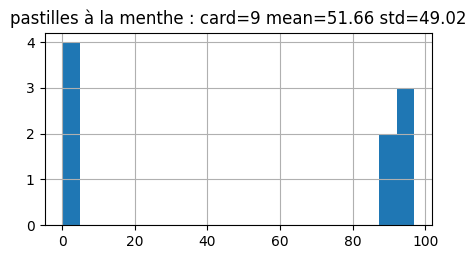

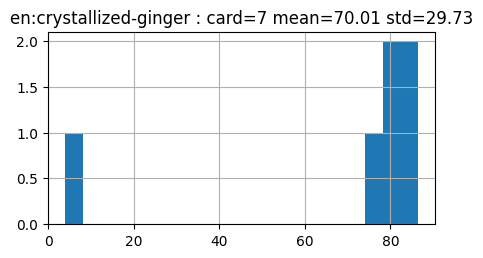

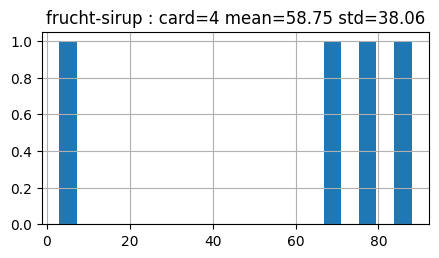

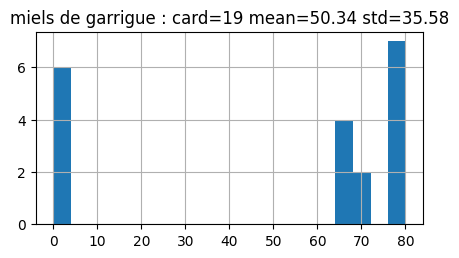

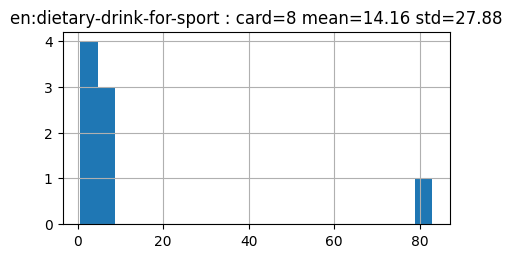

In [52]:
# Plotting hist in groups with card < 20 and std > 25

# Choosing randomly 10 groups. 
mydf = food_groups.loc[(food_groups['cardinal'] < 20) 
                       & (food_groups['std'] > 25)]
print(mydf.shape)
print(list(mydf.index))
mydf = mydf.sample(10)
display(mydf)

for name in mydf.index:
    df = data_c[feats].loc[(all_layers == name).any(axis=1)]
    #display(df)
    plt.figure(figsize=(5,2.5))
    df.sugars_100g.hist(bins=20)
    plt.title(
                f'{name} :'
                f' card={mydf.loc[name, "cardinal"]}'
                f' mean={mydf.loc[name, "sugars_100g_mean"].round(2)}'
                f' std={mydf.loc[name, "std"].round(2)}'
              )

    plt.show()

In small groups with high standard deviation, there are some problem. But it would take some time to deal with it, and some researches. For example, Honeys are usually around 80g of sugars per 100g. Those at 0 are outliers. It is probably the same for syrups. So generally, no low sugars should be found in those categories, except for sugar free products which have a sugar replacement such as stevia or whatever...

In [53]:
# Plotting hist in pnns_groups_2
grouped_by_layer2.head()

cardinal  sugars_100g_mean        std
pnns_groups_2                                            
biscuits and cakes     27755         29.816876  13.064919
sweets                 27370         49.516108  23.792114
one-dish meals         23424          2.406549   3.477119
processed meat         22939          0.882782   1.388553
cheese                 20119          0.871988   2.252623

cardinal  sugars_100g_mean        std
pnns_groups_2                                                          
biscuits and cakes                   27755         29.816876  13.064919
sweets                               27370         49.516108  23.792114
dressings and sauces                 17570          8.338952  11.785523
sweetened beverages                   9411         23.199227  27.945601
chocolate products                    9212         40.115398  14.643005
fruits                                6755         21.227794  20.575320
pizza pies and quiches                4779         10.187973  11.905129
unsweetened beverages                 4177          6.214195  11.836877
dried fruits                          4079         43.067816  20.477842
teas and herbal teas and coffees       803          6.663286  12.169696

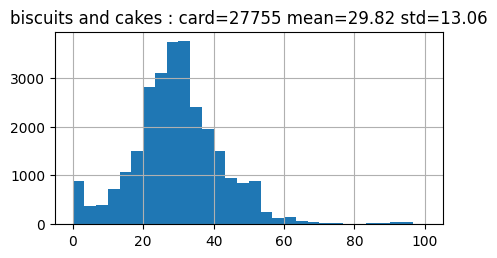

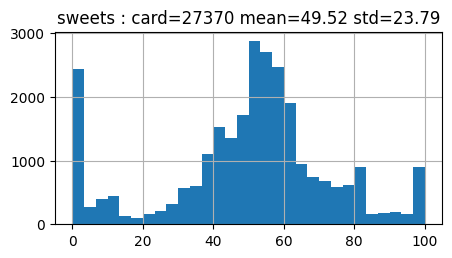

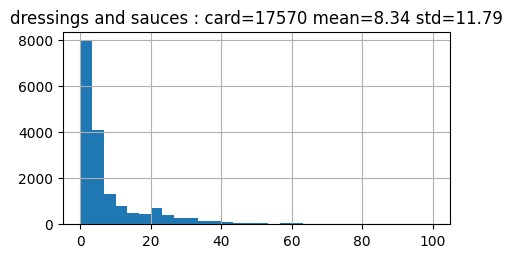

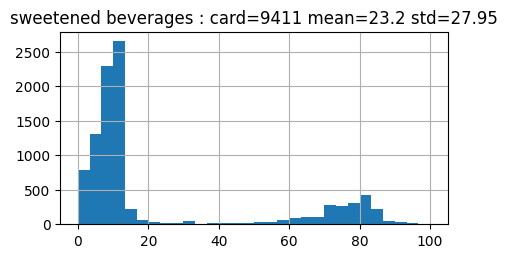

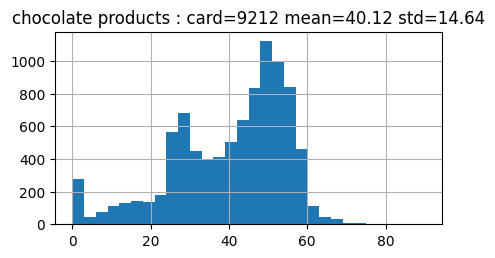

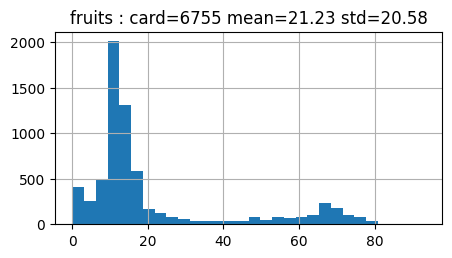

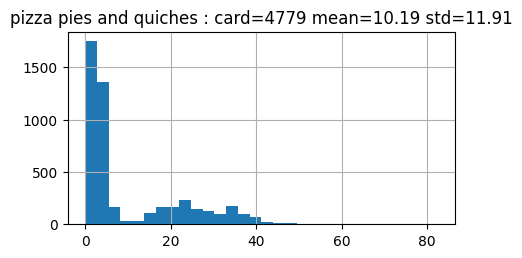

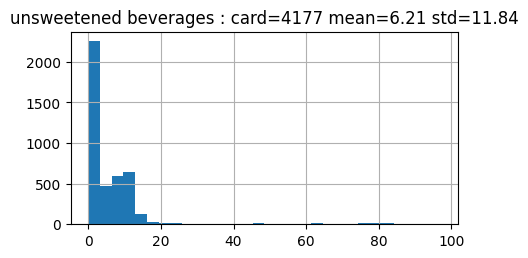

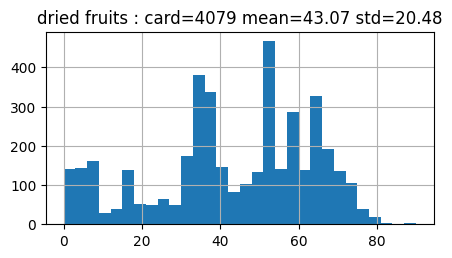

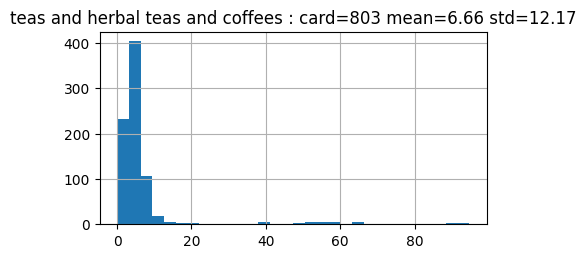

In [54]:
# Plotting hist in pnns_groups_2 with high std
high_pnns = grouped_by_layer2.loc[grouped_by_layer2['std'] >10]
# Choosing randomly 10 groups with a cardinal > 300
display(high_pnns)

for name in high_pnns.index:
    df = data_c[feats].loc[(all_layers == name).any(axis=1)]
    #display(df)
    plt.figure(figsize=(5,2.5))
    df.sugars_100g.hist(bins=30)
    plt.title(
                f'{name} :'
                f' card={high_pnns.loc[name, "cardinal"]}'
                f' mean={high_pnns.loc[name, "sugars_100g_mean"].round(2)}'
                f' std={high_pnns.loc[name, "std"].round(2)}'
              )

    plt.show()

In huge groups such as PNNS GROUPS, the distributions tend to be composed of gaussians (multiple) when the mean is not close to 0.

When the mean is close to 0, it is more of an exponential distribution. 

We see that std remains under 26. 

### 6.5.2.  [&#9650;](#toc0_) <a id='toc6_5_2_'></a>Conclusion : sugars imputation strategy

I could refine a strategy to better assess values of sugars by identifying main outliers products type (such as honeys, sugars...) 

But as a first decent approach, I am just going to use groups means (of groups with an std lower than 26, because it is a criterion that keeps all pnns groups) to input sugars values to product with :
- a group
- and no initial sugars value or an initial nutrients problem.

However, we saw in the section where we looked at products with sugars > carbohydrates that many of those problems where very close to the acceptable border. So for those products, I will do something different and map the sugars value to the carbohydrates value.

### 6.5.3.  [&#9650;](#toc0_) <a id='toc6_5_3_'></a>Deleting groups with an std lower than 26.

In [55]:
print(food_groups.shape)
food_groups = food_groups.loc[food_groups['std'] < 26, :]
print(food_groups.shape)

(16580, 3)
(16107, 3)


In [56]:
food_groups.to_csv('./csv_files/retained_food_groups_low_std.csv.gz',
                   index=False,
                   sep='\t',
                   compression='gzip')

# 7.  [&#9650;](#toc0_) <a id='toc7_'></a>Sugars values imputation

In [58]:
print(data.columns)
print(data.shape)

Index(['code', 'creator', 'product_name', 'quantity', 'labels_tags', 'stores',
       'countries_tags', 'serving_size', 'serving_quantity',
       'nutriscore_score', 'nutriscore_grade', 'pnns_groups_1',
       'pnns_groups_2', 'nutrient_levels_tags', 'data_quality_errors_tags',
       'main_category', 'image_url', 'energy-kcal_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'second_most_specific_category',
       'most_specific_category', 'classifier_available', 'sugars_available',
       'more_saturated_fat_than_fat', 'more_sugars_than_carbohydrates',
       'nutrients_sum_over_101', 'negative_value', 'value_over_100',
       'no_nutrients_information', 'initial_nutrients_problem',
       'sugars_imputed'],
      dtype='object')
(817484, 37)


## 7.1.  [&#9650;](#toc0_) <a id='toc7_1_'></a>When sugars is just a tiny bit higher than carbohydrates.

In [59]:
# Only sugars > carbo
mask = (data.more_sugars_than_carbohydrates 
        & (~data.value_over_100))

feats = ['carbohydrates_100g', 'sugars_100g']

sug_carbo = data.loc[mask, feats]
print(sug_carbo.shape)
sug_carbo.head()

(864, 2)


carbohydrates_100g  sugars_100g
1076                 0.0          0.2
1167                 0.0          0.2
3694                 1.5         10.9
4078                 0.0          0.2
4887                 0.0          0.2

<AxesSubplot: >

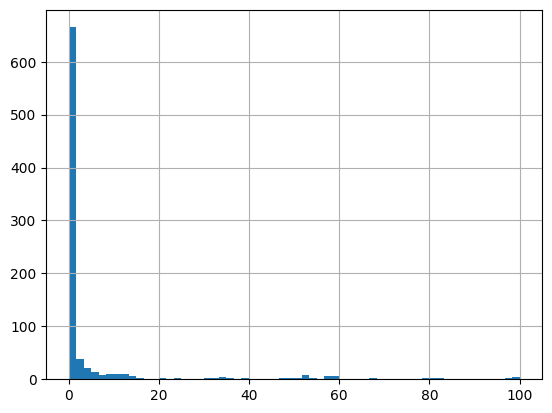

In [60]:
sug_carbo.sugars_100g.hist(bins=60)

In [61]:
# Searching for products close to the acceptable border y=x
sug_carbo.loc[: ,'sug-carbo'] = (sug_carbo.sugars_100g
                                 - sug_carbo.carbohydrates_100g)

sug_carbo.head()

carbohydrates_100g  sugars_100g  sug-carbo
1076                 0.0          0.2        0.2
1167                 0.0          0.2        0.2
3694                 1.5         10.9        9.4
4078                 0.0          0.2        0.2
4887                 0.0          0.2        0.2

In [62]:
low_diff = sug_carbo.loc[sug_carbo['sug-carbo'] < 1]
low_diff.head(10)

carbohydrates_100g  sugars_100g  sug-carbo
1076                  0.0          0.2        0.2
1167                  0.0          0.2        0.2
4078                  0.0          0.2        0.2
4887                  0.0          0.2        0.2
6421                  5.5          5.6        0.1
6719                  0.0          0.2        0.2
8949                  0.0          0.5        0.5
10438                 0.0          0.2        0.2
10462                 0.0          0.2        0.2
14535                 0.0          0.2        0.2

In [63]:
# Tolerating little differences (< 1g).
# Thus Marking the product as imputed.
data.loc[low_diff.index, 'sugars_imputed'] = True
data.sugars_imputed.sum()


704

## 7.2.  [&#9650;](#toc0_) <a id='toc7_2_'></a>For remaining values

In [96]:
# selecting remaining sugars values to be imputed
mask = (((data.initial_nutrients_problem) | (~data.sugars_available))
        & data.classifier_available
        & (~data.sugars_imputed))
        

feats = ['sugars_100g']
sug_carbo = data.loc[mask, feats]
print(sug_carbo.shape)
sug_carbo.head(10)

(82369, 1)


sugars_100g
13           NaN
35           NaN
42           NaN
61           NaN
75           NaN
76           NaN
79           NaN
89           NaN
117          NaN
128          NaN

In [97]:
# Inspecting categories of those products
classifiers = data.loc[sug_carbo.index, classification_f]
classifiers.head(10)

pnns_groups_1        pnns_groups_2              main_category  \
13             sugary snacks               sweets            en:almond-paste   
35            fish meat eggs                 meat  fr:aiguillettes-de-poulet   
42             sugary snacks               sweets               en:milk-jams   
61                 beverages  sweetened beverages         en:apricot-nectars   
75   milk and dairy products               cheese                 en:cheeses   
76             sugary snacks               sweets            en:thyme-honeys   
79            fish meat eggs     fish and seafood           en:salmon-steaks   
89             sugary snacks               sweets      fr:miels-de-printemps   
117    fruits and vegetables         dried fruits      en:dried-mixed-fruits   
128                      NaN                  NaN          fr:filet-de-boeuf   

      most_specific_category second_most_specific_category  
13            pâtes d'amande                           NaN  
35    aiguillettes de poulet                       poulets  
42        confitures de lait    produits à tartiner sucrés  
61         nectars d'abricot             nectars de fruits  
75                  fromages   produits laitiers fermentés  
76             miels de thym                         miels  
79           pavés de saumon                       saumons  
89        miels de printemps                         miels  
117  mélanges de fruits secs                   fruits secs  
128            filet de bœuf                           NaN

In [98]:
classifiers.notnull().mean()

pnns_groups_1                    0.807780
pnns_groups_2                    0.807792
main_category                    1.000000
most_specific_category           0.999612
second_most_specific_category    0.871481
dtype: float64

In [99]:
# Defining two functions to extract the most specific
# category retained in food_groups for those remaining products
def first_food_groups_category(cat_names):
    """Return the first category name encountered in food_groups.
    If no category is encountered, return np.nan
    
    Entry : a Series or list of strings.
    """
    i = 0
    for cat in cat_names:
         if cat in food_groups.index:
             return cat 
         else:
             i += 1  
             if i >= 5:
                 return np.NaN   
             
def products_to_categories(products_index):
    """Return a Series mapping each product with
    its most specific category encountered in food_groups.
    """
    classification_f = ['most_specific_category',
                        'second_most_specific_category',
                        'main_category',
                        'pnns_groups_2',
                        'pnns_groups_1']
    
    cat = []
    products = data.loc[products_index, classification_f]
    for ind, row in products.iterrows():
        cat.append(first_food_groups_category(row))
    return cat
        
# Extracting the most specific relevant category
sug_carbo.loc[:, 'category'] = products_to_categories(sug_carbo.index)

In [100]:
# Verifying 
display(classifiers.head(20))
display(sug_carbo.head(20))

pnns_groups_1        pnns_groups_2  \
13             sugary snacks               sweets   
35            fish meat eggs                 meat   
42             sugary snacks               sweets   
61                 beverages  sweetened beverages   
75   milk and dairy products               cheese   
76             sugary snacks               sweets   
79            fish meat eggs     fish and seafood   
89             sugary snacks               sweets   
117    fruits and vegetables         dried fruits   
128                      NaN                  NaN   
148            sugary snacks   biscuits and cakes   
157                      NaN                  NaN   
164            sugary snacks               sweets   
165            sugary snacks               sweets   
181           fat and sauces                 fats   
193            sugary snacks               sweets   
211  milk and dairy products               cheese   
242     cereals and potatoes              legumes   
243    fruits and vegetables         dried fruits   
251            sugary snacks   biscuits and cakes   

                      main_category      most_specific_category  \
13                  en:almond-paste              pâtes d'amande   
35        fr:aiguillettes-de-poulet      aiguillettes de poulet   
42                     en:milk-jams          confitures de lait   
61               en:apricot-nectars           nectars d'abricot   
75                       en:cheeses                    fromages   
76                  en:thyme-honeys               miels de thym   
79                 en:salmon-steaks             pavés de saumon   
89            fr:miels-de-printemps          miels de printemps   
117           en:dried-mixed-fruits     mélanges de fruits secs   
128               fr:filet-de-boeuf               filet de bœuf   
148  en:bars-covered-with-chocolate           en:chocolate-bars   
157                         en:teas                     en:teas   
164                       en:honeys                       miels   
165             en:honey-of-corsica              miels de corse   
181         en:flavoured-olive-oils  huiles d'olive aromatisées   
193               en:heather-honeys            miels de bruyère   
211                  en:gorgonzolas              en:gorgonzolas   
242                en:green-lentils            lentilles vertes   
243                en:dried-mangoes             mangues séchées   
251           en:shortbread-cookies             biscuits sablés   

    second_most_specific_category  
13                            NaN  
35                        poulets  
42     produits à tartiner sucrés  
61              nectars de fruits  
75    produits laitiers fermentés  
76                          miels  
79                        saumons  
89                          miels  
117                   fruits secs  
128                           NaN  
148       confiseries chocolatées  
157                           NaN  
164                   édulcorants  
165                miels français  
181                        huiles  
193                         miels  
211                           NaN  
242                     lentilles  
243                   fruits secs  
251                      biscuits

sugars_100g                    category
13           NaN              pâtes d'amande
35           NaN      aiguillettes de poulet
42           NaN          confitures de lait
61           NaN           nectars d'abricot
75           NaN                    fromages
76           NaN                      sweets
79           NaN             pavés de saumon
89           NaN                      sweets
117          NaN     mélanges de fruits secs
128          NaN                         NaN
148          NaN           en:chocolate-bars
157          NaN                     en:teas
164          NaN                      sweets
165          NaN                      sweets
181          NaN  huiles d'olive aromatisées
193          NaN                      sweets
211          NaN              en:gorgonzolas
242          NaN            lentilles vertes
243          NaN             mangues séchées
251          NaN             biscuits sablés

In [101]:
# Mapping the extracted category to the sugars mean value
# Be careful with NaN category, what will happen?
sug_carbo.loc[:, 'sugars_group'] = (sug_carbo.category
                                    .map(food_groups.sugars_100g_mean))

verif = sug_carbo.sample(5)
verif

sugars_100g            category  sugars_group
78279           NaN         fricadelles          1.07
399757          NaN              sweets         49.51
23502           NaN      en:young-gouda          0.13
646816          NaN              sweets         49.51
788124          NaN  cannelle en poudre          1.98

In [102]:
# Verifying the mapping was done correctly
for ind, row in verif.iterrows():
    print(food_groups.loc[row.category, :])

cardinal            30.00
sugars_100g_mean     1.07
std                  0.59
Name: fricadelles, dtype: float64
cardinal            27374.00
sugars_100g_mean       49.51
std                    23.79
Name: sweets, dtype: float64
cardinal            110.00
sugars_100g_mean      0.13
std                   0.22
Name: en:young-gouda, dtype: float64
cardinal            27374.00
sugars_100g_mean       49.51
std                    23.79
Name: sweets, dtype: float64
cardinal            32.00
sugars_100g_mean     1.98
std                  4.94
Name: cannelle en poudre, dtype: float64


In [106]:
# Mapping effect on NaN
sug_carbo.loc[128,:]

sugars_100g     NaN
category        NaN
sugars_group    NaN
Name: 128, dtype: object

In [104]:
# Imputing the values in the original dataframe
data.loc[sug_carbo.index, 'sugars_100g'] = sug_carbo.sugars_group
# Tagging the imputed values.
data.loc[sug_carbo.index, 'sugars_imputed'] = True

## 7.3.  [&#9650;](#toc0_) <a id='toc7_3_'></a>Stats on sugars values imputation

In [105]:
data.sugars_imputed.sum()

83073

So 83 073 products got a sugars value imputation. 

Some still might have NaN values : those with a category which was not convincing and was not retained in food_groups.

Let's evaluate the current state of sugars values :

In [110]:
# Among imputed values, remaining NaN
imp = data.loc[data.sugars_imputed, :]
print(imp.shape)
print(imp.sugars_100g.isnull().sum())
print(imp.sugars_100g.isnull().mean())

(83073, 37)
2245
0.02702442430151794


In [112]:
mask = imp.initial_nutrients_problem & imp.sugars_100g.isnull()
a = imp.loc[mask, :]
a.shape

(57, 37)

Among all sugars values I tried to impute thanks to groups (83 000), only 2 245 remains at NaN (about 2.7%). 

There was about 6 000 products with an initial nutrients inconsistency and among those, we almost imputed all values. 57 remains.

In [115]:
print(data.sugars_100g.notnull().mean())
print(data.shape)
print(data.sugars_100g.notnull().sum())

0.9867508110250476
(817484, 37)
806653


The initial data set of 946k french products was processed so roughly 806k products have now a decent sugars values assessment.